# Machine Learning Modelling of Covid-19 Using First Principles
## Data is collected from :
###  https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
## There are 3 files 
### 1) Global Confirmed
### 2) Global Recovered
### 3) Global Deaths


###  Each file consist of 192 countries and their corresponding cases of each day 



## Loading the data

In [1]:


import numpy as np
import pandas as pd
import tensorflow as tf 
import optuna
import matplotlib.pyplot as plt
import glob,os



def to_float(x):
    return float(x)
to_float_vec = np.vectorize(to_float)


def load(mypath):
    # read all the csv files in that path
    
    files = glob.glob(os.path.join(mypath, "*.csv"))
    
    for file in files:
        
        #for each file we are creating a data frame with name as df
        
        data = pd.read_csv(file)
    
        if os.path.basename(file) == 'time_series_covid19_confirmed_global.csv':
            # if the file name is confirmed we are creating a new data frame with df_confirmed
            # and storing the values into df_confirmed from df 
            df_confirmed = pd.DataFrame()
            for row in data.values:
                confirmed = np.sum(data[data['Country/Region']==row[1]].values[:,4:],0)
                df_confirmed[row[1]] = confirmed
                
                
        if os.path.basename(file) == 'time_series_covid19_recovered_global.csv':
             # if the file name is confirmed we are creating a new data frame with df_recovered
            # and storing the values into df_recovered from df 
            df_recovered = pd.DataFrame()
            for row in data.values:
                recovered = np.sum(data[data['Country/Region']==row[1]].values[:,4:],0)
                df_recovered[row[1]] = recovered
                
                
        if os.path.basename(file) == 'time_series_covid19_deaths_global.csv':
             # if the file name is confirmed we are creating a new data frame with df_deaths
            # and storing the values into df_deaths from df 
            df_deaths = pd.DataFrame()
            for row in data.values:
                deaths = np.sum(data[data['Country/Region']==row[1]].values[:,4:],0)
                df_deaths[row[1]] = deaths
                
                
    # Creating a new data frame with name df_infected which indicates present active cases            
    df_infected = df_confirmed - df_deaths - df_recovered
    return [df_infected,df_confirmed,df_recovered,df_deaths]

In [2]:
mypath = 'C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/Covid-19'

[df_infected,df_confirmed,df_recovered,df_deaths] = load(mypath)

In [3]:
df_infected.tail() # Current active cases

Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina  \
433        2435   31879   32530     553   1200                 288    181176   
434        2420   31651   32561     580   1281                 288    190347   
435        2240   31390   32576     573   1353                 262    195044   
436        2279   31095   32601     598   1062                 266    195176   
437        2297   30754   32609     629   1168                 260    196791   

    Armenia Australia Austria  ... United Kingdom Uruguay Uzbekistan Vanuatu  \
433   15389      5390   35418  ...        4216025   20070       1255       2   
434   16060      5401   35774  ...        4219954   21195       1257       2   
435   16522      5410   36495  ...        4224452   21979       1285       2   
436   16755      5407   36657  ...        4227721   23488       1306       2   
437   17068      5412   37028  ...        4231103   23798       1356       2   

    Venezuela Vietnam West Bank and Gaza Yemen Zambia Zimbabwe  
433     10397     200              23861  1698   2478      702  
434     11049     209              24297  1793   2618      673  
435     11480     223              24776  1943   2639      675  
436     11642     202              27008  2013   2690      671  
437     12316     208              25383  2050   2568      655  

[5 rows x 192 columns]

In [4]:
df_confirmed.tail() # Cummlative confirmed cases

Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina  \
433       56384  124723  117061   11944  22182                1136   2332765   
434       56454  125157  117192   12010  22311                1136   2348821   
435       56517  125506  117304   12053  22399                1147   2363251   
436       56572  125842  117429   12115  22467                1152   2373153   
437       56595  126183  117524   12174  22579                1170   2383537   

    Armenia Australia Austria  ... United Kingdom Uruguay Uzbekistan Vanuatu  \
433  191491     29304  542542  ...        4355867  102461      82682       3   
434  192639     29322  546229  ...        4359982  105549      82869       3   
435  193736     29333  549592  ...        4364547  108188      83050       3   
436  194852     29341  552729  ...        4367969  111568      83239       3   
437  196044     29348  556012  ...        4371393  113904      83435       3   

    Venezuela Vietnam West Bank and Gaza Yemen Zambia Zimbabwe  
433    159149    2594             240065  4247  88199    36839  
434    160497    2603             242353  4357  88418    36882  
435    161751    2617             244645  4531  88549    36896  
436    162730    2620             246893  4620  88730    36903  
437    164337    2626             248482  4697  88800    36911  

[5 rows x 192 columns]

In [5]:
df_deaths.tail() #Cummulative deaths

Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina  \
433        2476    2227    3089     115    536                  28     55736   
434        2484    2235    3093     115    537                  28     55858   
435        2489    2241    3096     115    538                  28     55941   
436        2495    2247    3099     116    538                  28     56023   
437        2496    2256    3102     117    540                  28     56106   

    Armenia Australia Austria  ... United Kingdom Uruguay Uzbekistan Vanuatu  \
433    3497       909    9308  ...         126912     953        628       0   
434    3515       909    9339  ...         126955     974        629       0   
435    3533       909    9368  ...         127006    1009        630       0   
436    3552       909    9397  ...         127058    1041        630       0   
437    3575       909    9434  ...         127068    1071        630       0   

    Venezuela Vietnam West Bank and Gaza Yemen Zambia Zimbabwe  
433      1589      35               2614   882   1202     1520  
434      1602      35               2627   888   1208     1523  
435      1615      35               2645   906   1212     1523  
436      1629      35               2661   916   1215     1524  
437      1647      35               2681   932   1215     1524  

[5 rows x 192 columns]

In [6]:
df_recovered.tail() # Cummulative recovered cases

Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina  \
433       51473   90617   81442   11276  20446                 820   2095853   
434       51550   91271   81538   11315  20493                 820   2102616   
435       51788   91875   81632   11365  20508                 857   2112266   
436       51798   92500   81729   11401  20867                 858   2121954   
437       51802   93173   81813   11428  20871                 882   2130640   

    Armenia Australia Austria  ... United Kingdom Uruguay Uzbekistan Vanuatu  \
433  172605     23005  497816  ...          12930   81438      80799       1   
434  173064     23012  501116  ...          13073   83380      80983       1   
435  173681     23014  503729  ...          13089   85200      81135       1   
436  174545     23025  506675  ...          13190   87039      81303       1   
437  175401     23027  509550  ...          13222   89035      81449       1   

    Venezuela Vietnam West Bank and Gaza Yemen Zambia Zimbabwe  
433    147163    2359             213590  1667  84519    34617  
434    147846    2359             215429  1676  84592    34686  
435    148656    2359             217224  1682  84698    34698  
436    149459    2383             217224  1691  84825    34708  
437    150374    2383             220418  1715  85017    34732  

[5 rows x 192 columns]

## The Population of the country is assumed to be constant
### New births and deaths are ignored 
### Population divided into 4 Comparments 

### 1) Susceptible
### 2) Infected
### 3) Recovered
### 4) Deaths


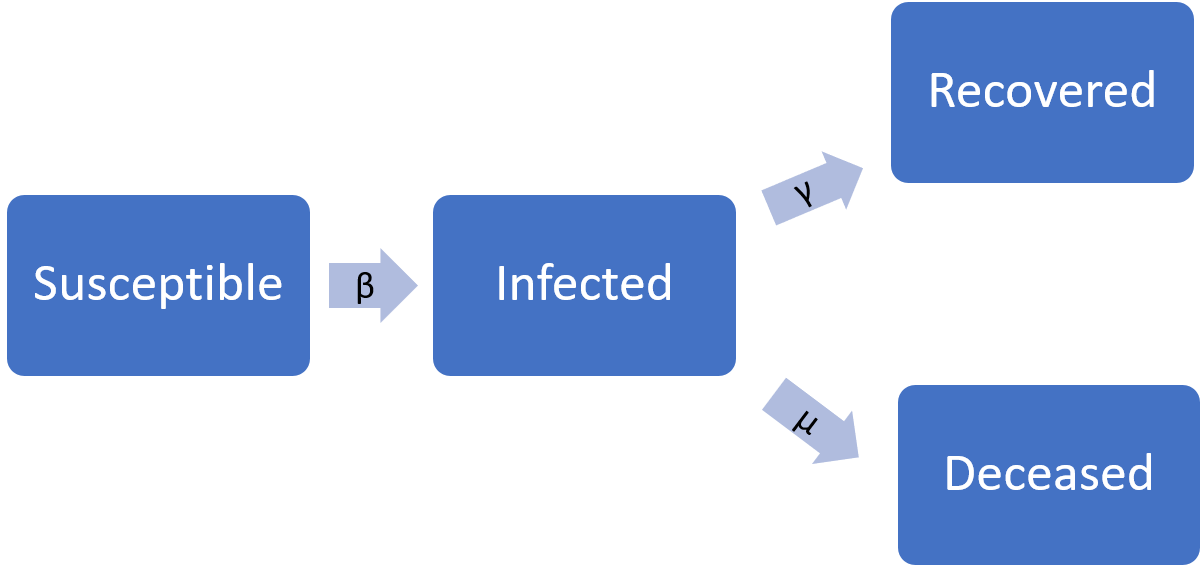

In [7]:
from IPython.display import Image
Image(filename='SIRD.png',width=800, height=400)

## We need to find these rates from the data

### $\beta$ is contact rate
### $\gamma$ is recovery rate
### $\mu$ is death rate

### R0 is the Reproduction rate ,if  R0 > 1 virus is spreading ,else the virus is slowdown

### R0 = $\beta$/$\gamma$ 

# Architecture of the Model

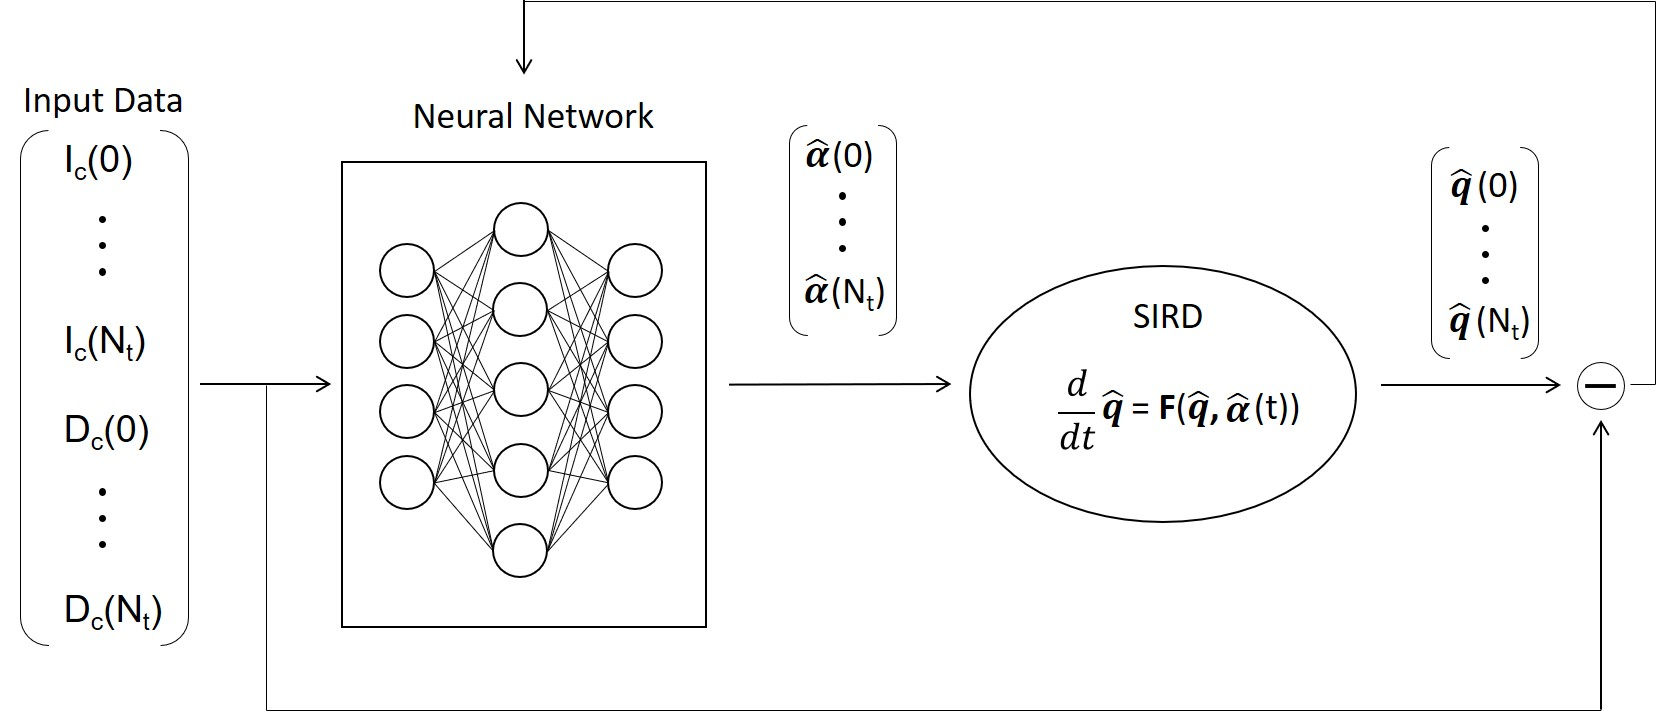

In [8]:
Image(filename='Architecture.jpg',width=800, height=450)

# For each country

### We are using Neural network to find the contact,recover,death rates 
### Vertical stacking the Infected and deaths (Input data)
### we have the input to the neural network , but we don't have the labels to that data
### we are using initial exponential growth to find the labels
### we can create the lables to the input by using "OPTUNA" library
### Reference : https://optuna.org/


In [9]:

mypath = 'C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/Covid-19/UID_ISO_FIPS_LookUp_Table.csv'

df = pd.read_csv(mypath)

S = set()

#reading all the countries from the file

for s in df['Country_Region'].values:
    S.add(s)

# total number of unique countries
len(S)

#converting to list
S = list(S)

#sorting based on alphabetical order
S = sorted(S)


populations = []

for s in S:
    populations.append(df[(df['Country_Region'] == s) & (pd.isna(df['Province_State']))]['Population'].values[0])
    
    


# we are taking initial exponential growth of the country to find labels
# some countries initial exponential growth is already known , if not default we are taking 70

Regrs = np.ones(len(S))*70


iteration = 0
for s in S:
    if s == 'Italy':
        Regrs[iteration]=40
    if s ==  'US':
        Regrs[iteration] = 70
    if s ==  'Germany':
        Regrs[iteration] = 60
    if s ==  'United Kingdom':
        Regrs[iteration] = 60
    if s == 'Spain':
        Regrs[iteration] = 50
    if s == 'France':
        Regrs[iteration] = 60
    if s == 'China':
        Regrs[iteration] = 15
    if s == 'Belgium':
        Regrs[iteration] = 55
    iteration = iteration +1 

    
the_dict = {"country": S,  
        "population": populations,
        'Regr' : Regrs
        }


the_dict['population']




df_information = pd.DataFrame(the_dict)

print(df_information.head())
print("*"*42)
print(df_information.tail())
print("*"*42)
print(df_information[df_information['country']=='Italy'])
print("*"*42)


def test():
    return 0 


       country  population  Regr
0  Afghanistan  38928341.0  70.0
1      Albania   2877800.0  70.0
2      Algeria  43851043.0  70.0
3      Andorra     77265.0  70.0
4       Angola  32866268.0  70.0
******************************************
                country  population  Regr
188  West Bank and Gaza   5101416.0  70.0
189      Western Sahara    597330.0  70.0
190               Yemen  29825968.0  70.0
191              Zambia  18383956.0  70.0
192            Zimbabwe  14862927.0  70.0
******************************************
   country  population  Regr
85   Italy  60461828.0  40.0
******************************************


# SIRD Model

### F(q, $\alpha$ (t)) here q is the initial conditions of S,I,R,D
### S0,I0,R0,D0
### S0= N-I0-R0-D0
### I0 = 1
### R0=0
### D0=0
## $\alpha$ (0), $\alpha$(1)..............$\alpha$(t) we have from neural network
### The input to SIRD Model is initial conditions of S,I,R,D and the rates for given time peroid
### SIRD model calculate the values q(0),q(1),q(2),............q(t)
### q(0) = [S_0,I_0,R_0,D_0]
### q(t) = [S_t,I_t,R_t,D_t]


# Optuna Library 
### creating labels to the input data
### using initial exponential growth of the cases 
### here i am running 3000 times optuna library
### every time it will guess values for contact , recovery and deaths
### finding the loss for given equation and pick the rates which will give minimum in that equation
# Euler's Method
### Euler's method is good approximation for first order differential equations
### we have initial conditions and the rates 
### we are approximationg for given timeframe



# Neural Network
### Input layer,Output layer, 3 hidden layers
### Activation functons are sigmoid
### Input shape ( num_days ,2)
### output shape(num_times ,3) 
### Adam Optimizer

5
370


[I 2021-04-08 21:04:17,934] A new study created in memory with name: no-name-402992d8-4445-4e7f-bdf3-f0bd36e20d0b
[I 2021-04-08 21:04:17,943] Trial 0 finished with value: 6344401785.249485 and parameters: {'beta': 0.2569233822131929, 'gamma': 0.1768324608082309, 'mu': 0.9148296124939879}. Best is trial 0 with value: 6344401785.249485.
[I 2021-04-08 21:04:17,954] Trial 1 finished with value: 6344307751.751391 and parameters: {'beta': 0.47928237424687936, 'gamma': 0.27039161938886047, 'mu': 0.6011326746345776}. Best is trial 1 with value: 6344307751.751391.
[I 2021-04-08 21:04:17,962] Trial 2 finished with value: 1.2734421711802146e+16 and parameters: {'beta': 0.897969566163815, 'gamma': 0.4266094243626968, 'mu': 0.13266955310728767}. Best is trial 1 with value: 6344307751.751391.
[I 2021-04-08 21:04:17,968] Trial 3 finished with value: 6344319394.637523 and parameters: {'beta': 0.7529280780783832, 'gamma': 0.4500177510430605, 'mu': 0.9347840653837074}. Best is trial 1 with value: 634430

[I 2021-04-08 21:04:18,219] Trial 34 finished with value: 6334902795.538428 and parameters: {'beta': 0.4983902020807157, 'gamma': 0.17383658924673945, 'mu': 0.29363850113574763}. Best is trial 12 with value: 6168067818.7765045.
[I 2021-04-08 21:04:18,226] Trial 35 finished with value: 6344357056.542939 and parameters: {'beta': 0.4911649182634524, 'gamma': 0.4253422866653339, 'mu': 0.2858255587023865}. Best is trial 12 with value: 6168067818.7765045.
[I 2021-04-08 21:04:18,233] Trial 36 finished with value: 65946476261.06911 and parameters: {'beta': 0.5639924383625613, 'gamma': 0.1695635046879773, 'mu': 0.22589052697126466}. Best is trial 12 with value: 6168067818.7765045.
[I 2021-04-08 21:04:18,239] Trial 37 finished with value: 6330185028.363239 and parameters: {'beta': 0.6864421709822288, 'gamma': 0.27067496522196993, 'mu': 0.3735872044637867}. Best is trial 12 with value: 6168067818.7765045.
[I 2021-04-08 21:04:18,249] Trial 38 finished with value: 6343625102.967808 and parameters: 

[I 2021-04-08 21:04:18,524] Trial 69 finished with value: 7660259832.83365 and parameters: {'beta': 0.8307704610895819, 'gamma': 0.5794941584459897, 'mu': 0.09970458660228762}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,535] Trial 70 finished with value: 134413794221665.11 and parameters: {'beta': 0.7682838570460289, 'gamma': 0.4487874912768088, 'mu': 0.0030857696819569583}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,551] Trial 71 finished with value: 4783860798.425872 and parameters: {'beta': 0.6653754872129786, 'gamma': 0.5027327082900762, 'mu': 0.0063145867915910606}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,571] Trial 72 finished with value: 6344360019.344593 and parameters: {'beta': 0.6186539315364458, 'gamma': 0.3947694311355157, 'mu': 0.997168101803383}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,584] Trial 73 finished with value: 6035719828.559236 and parameters: {'beta

[I 2021-04-08 21:04:18,932] Trial 104 finished with value: 759563097130029.9 and parameters: {'beta': 0.8074353238826085, 'gamma': 0.4365869416395217, 'mu': 0.05261506494516402}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,942] Trial 105 finished with value: 6283598612.734359 and parameters: {'beta': 0.6349026619319923, 'gamma': 0.4674215477519248, 'mu': 0.08192662539359105}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,951] Trial 106 finished with value: 4292196931.8604016 and parameters: {'beta': 0.7200693327390775, 'gamma': 0.5362987891495496, 'mu': 0.01905680965597753}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,961] Trial 107 finished with value: 1609707575.4981573 and parameters: {'beta': 0.7551641048615395, 'gamma': 0.5667965191196153, 'mu': 0.0039932704373673395}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:18,970] Trial 108 finished with value: 5785314254.994651 and parameters:

[I 2021-04-08 21:04:19,298] Trial 139 finished with value: 21247089301.27857 and parameters: {'beta': 0.7384451250842667, 'gamma': 0.4953256283332827, 'mu': 0.05326745210290884}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:19,309] Trial 140 finished with value: 26915769795519.613 and parameters: {'beta': 0.8192941897358272, 'gamma': 0.5231700454899938, 'mu': 0.0017685241953078008}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:19,318] Trial 141 finished with value: 5388063091.887121 and parameters: {'beta': 0.6549416005778169, 'gamma': 0.5081605769451374, 'mu': 0.0009109825850546901}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:19,329] Trial 142 finished with value: 3057218680.724486 and parameters: {'beta': 0.6401518931941264, 'gamma': 0.4656884923718099, 'mu': 0.00042552070023628864}. Best is trial 64 with value: 434308610.855854.
[I 2021-04-08 21:04:19,341] Trial 143 finished with value: 4952940806.925667 and paramet

[I 2021-04-08 21:04:19,748] Trial 173 finished with value: 6267745231.029381 and parameters: {'beta': 0.6444372869460745, 'gamma': 0.5077026154145329, 'mu': 0.04512512375995134}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:19,762] Trial 174 finished with value: 5411054065.670276 and parameters: {'beta': 0.674446171048728, 'gamma': 0.527794218144725, 'mu': 0.0013276856505951029}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:19,776] Trial 175 finished with value: 6176772779.758902 and parameters: {'beta': 0.6231378544033396, 'gamma': 0.486434315410374, 'mu': 0.028131029466938164}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:19,790] Trial 176 finished with value: 6048366565.810606 and parameters: {'beta': 0.6582618293927626, 'gamma': 0.4429785520956972, 'mu': 0.05411364534466895}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:19,803] Trial 177 finished with value: 6097635857.108453 and paramet

[I 2021-04-08 21:04:20,174] Trial 207 finished with value: 5054004441.133318 and parameters: {'beta': 0.6844509283366264, 'gamma': 0.5307469206387933, 'mu': 0.0014160181860849179}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,187] Trial 208 finished with value: 6344340402.590598 and parameters: {'beta': 0.6004479756677057, 'gamma': 0.4508476965482276, 'mu': 0.54391457060409}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,197] Trial 209 finished with value: 26201150106336.21 and parameters: {'beta': 0.7222458350329978, 'gamma': 0.4156961611566373, 'mu': 0.0186127645937783}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,209] Trial 210 finished with value: 6259830562.510497 and parameters: {'beta': 0.6373013715181355, 'gamma': 0.4705966743639673, 'mu': 0.07351539444996609}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,220] Trial 211 finished with value: 3384112822.2377734 and paramete

[I 2021-04-08 21:04:20,575] Trial 241 finished with value: 1744624565.1124375 and parameters: {'beta': 0.5652060031060672, 'gamma': 0.38047858846566046, 'mu': 0.0014248453851987866}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,586] Trial 242 finished with value: 25177910151.627647 and parameters: {'beta': 0.5691772878351141, 'gamma': 0.34582758664026825, 'mu': 0.0014488018656976477}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,598] Trial 243 finished with value: 353101038.7941791 and parameters: {'beta': 0.5926550513982471, 'gamma': 0.3963572034989466, 'mu': 0.002302318194421814}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,610] Trial 244 finished with value: 5780091674.82636 and parameters: {'beta': 0.523308175048793, 'gamma': 0.38712973838788706, 'mu': 0.0014266373191651025}. Best is trial 155 with value: 283219669.5974297.
[I 2021-04-08 21:04:20,625] Trial 245 finished with value: 1215917897.6343262 

[I 2021-04-08 21:04:21,054] Trial 275 finished with value: 6344275600.956633 and parameters: {'beta': 0.6161351734404892, 'gamma': 0.42474358124270867, 'mu': 0.471828904925534}. Best is trial 250 with value: 264130963.55286705.
[I 2021-04-08 21:04:21,072] Trial 276 finished with value: 5616102198.050629 and parameters: {'beta': 0.558689741503072, 'gamma': 0.40009623016914914, 'mu': 0.01871585306520871}. Best is trial 250 with value: 264130963.55286705.
[I 2021-04-08 21:04:21,089] Trial 277 finished with value: 68747233976.01985 and parameters: {'beta': 0.5966460072528622, 'gamma': 0.36582774258884265, 'mu': 0.001017573105387646}. Best is trial 250 with value: 264130963.55286705.
[I 2021-04-08 21:04:21,106] Trial 278 finished with value: 91121870401.77295 and parameters: {'beta': 0.6279319318408119, 'gamma': 0.3944593581076386, 'mu': 0.001258157148291418}. Best is trial 250 with value: 264130963.55286705.
[I 2021-04-08 21:04:21,122] Trial 279 finished with value: 4281756287.461715 and p

[I 2021-04-08 21:04:21,608] Trial 309 finished with value: 6344335971.043665 and parameters: {'beta': 0.5605978331915619, 'gamma': 0.34863140620824545, 'mu': 0.7404846457027163}. Best is trial 300 with value: 203253051.75876898.
[I 2021-04-08 21:04:21,626] Trial 310 finished with value: 5656926962.594094 and parameters: {'beta': 0.6167186188807888, 'gamma': 0.4392723022563571, 'mu': 0.03665452794198998}. Best is trial 300 with value: 203253051.75876898.
[I 2021-04-08 21:04:21,644] Trial 311 finished with value: 6246860600.543062 and parameters: {'beta': 0.5214561537122323, 'gamma': 0.40649694224370614, 'mu': 0.016918902613238543}. Best is trial 300 with value: 203253051.75876898.
[I 2021-04-08 21:04:21,663] Trial 312 finished with value: 14013169873.107334 and parameters: {'beta': 0.5852372464269104, 'gamma': 0.3656470646235528, 'mu': 0.001736938140808053}. Best is trial 300 with value: 203253051.75876898.
[I 2021-04-08 21:04:21,682] Trial 313 finished with value: 27943693932.14423 and

[I 2021-04-08 21:04:22,183] Trial 343 finished with value: 4640677298.314487 and parameters: {'beta': 0.5812187325344986, 'gamma': 0.3999950514813015, 'mu': 0.020924100041806424}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,202] Trial 344 finished with value: 6344617974.439015 and parameters: {'beta': 0.5616193479781405, 'gamma': 0.9017402981002234, 'mu': 0.04814691096586526}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,221] Trial 345 finished with value: 2.5177812251301357e+17 and parameters: {'beta': 0.9197130786903301, 'gamma': 0.3373436042445196, 'mu': 0.08476488785141802}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,239] Trial 346 finished with value: 45827750702.92402 and parameters: {'beta': 0.5993780982752358, 'gamma': 0.3721262823610708, 'mu': 0.0007511787487912037}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,253] Trial 347 finished with value: 6344646054.457726

[I 2021-04-08 21:04:22,794] Trial 377 finished with value: 3643405468.8902683 and parameters: {'beta': 0.6065090991892721, 'gamma': 0.395614081895309, 'mu': 0.02055191786785547}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,815] Trial 378 finished with value: 5658905326.92432 and parameters: {'beta': 0.6193212696651185, 'gamma': 0.42957897530444317, 'mu': 0.045706212023329404}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,834] Trial 379 finished with value: 12399470699.265934 and parameters: {'beta': 0.5939184529390383, 'gamma': 0.3751735522793353, 'mu': 0.0016682582899038342}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,850] Trial 380 finished with value: 193235111657.39645 and parameters: {'beta': 0.6445511324251194, 'gamma': 0.4052693107929505, 'mu': 0.0002534685652952739}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:22,878] Trial 381 finished with value: 4390331587.793647 

[I 2021-04-08 21:04:23,308] Trial 411 finished with value: 5638437370.050111 and parameters: {'beta': 0.6263617979373237, 'gamma': 0.46714073562337033, 'mu': 0.019966213900362142}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:23,323] Trial 412 finished with value: 160833887.64016673 and parameters: {'beta': 0.643585602978508, 'gamma': 0.44611170772955777, 'mu': 0.0007412246034185288}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:23,337] Trial 413 finished with value: 608574915.0729679 and parameters: {'beta': 0.6484487734431543, 'gamma': 0.45664704040547144, 'mu': 0.00024482205411860457}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:23,350] Trial 414 finished with value: 13050859891.659733 and parameters: {'beta': 0.6733348169919591, 'gamma': 0.45568825444050215, 'mu': 0.00015476103437588078}. Best is trial 338 with value: 142494733.61439142.
[I 2021-04-08 21:04:23,365] Trial 415 finished with value: 6195305337.

[I 2021-04-08 21:04:23,834] Trial 445 finished with value: 7922099008.074398 and parameters: {'beta': 0.6479717909552009, 'gamma': 0.41953411251112177, 'mu': 0.057821468120805034}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:23,848] Trial 446 finished with value: 6225157099.059858 and parameters: {'beta': 0.6056361435196574, 'gamma': 0.46625166937926493, 'mu': 0.03822863292679332}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:23,863] Trial 447 finished with value: 5194942944.176313 and parameters: {'beta': 0.5776729758951783, 'gamma': 0.4273976336904888, 'mu': 0.0004313428701980872}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:23,880] Trial 448 finished with value: 6276796312.864883 and parameters: {'beta': 0.6276252773070501, 'gamma': 0.4082346329320274, 'mu': 0.01963703627080154}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:23,896] Trial 449 finished with value: 2553837412.448131 an

[I 2021-04-08 21:04:24,440] Trial 479 finished with value: 5296827726.652678 and parameters: {'beta': 0.5704480568740153, 'gamma': 0.3613139938623041, 'mu': 0.03801202856339016}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:24,461] Trial 480 finished with value: 5289522716.343673 and parameters: {'beta': 0.618799507179299, 'gamma': 0.45007510294122893, 'mu': 0.020347075517606186}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:24,480] Trial 481 finished with value: 6344357284.626753 and parameters: {'beta': 0.5915021048208305, 'gamma': 0.39744483103180983, 'mu': 0.836791732318346}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:24,501] Trial 482 finished with value: 4244978834953.148 and parameters: {'beta': 0.6486635964354794, 'gamma': 0.3771324961736971, 'mu': 0.0005633866043857723}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:24,525] Trial 483 finished with value: 531606314.11221874 and 

[I 2021-04-08 21:04:25,135] Trial 513 finished with value: 6344331146.940704 and parameters: {'beta': 0.6254296360546397, 'gamma': 0.40288670661217707, 'mu': 0.7478411845118854}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,158] Trial 514 finished with value: 581873014.4143529 and parameters: {'beta': 0.5662380641317853, 'gamma': 0.3741432805114796, 'mu': 0.00033605640378851645}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,178] Trial 515 finished with value: 6008361543.06857 and parameters: {'beta': 0.5053616755857963, 'gamma': 0.3477841731562247, 'mu': 0.03406821804452501}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,198] Trial 516 finished with value: 6217100525.686911 and parameters: {'beta': 0.5449246940738511, 'gamma': 0.37514861341061073, 'mu': 0.06716547739084264}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,217] Trial 517 finished with value: 346977171073148.0 and 

[I 2021-04-08 21:04:25,851] Trial 547 finished with value: 6344552917.203264 and parameters: {'beta': 0.639816719184107, 'gamma': 0.7110555612034911, 'mu': 0.04904684164937099}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,872] Trial 548 finished with value: 6344645215.262511 and parameters: {'beta': 0.5918243454492067, 'gamma': 0.8858933428138951, 'mu': 0.001457711969499413}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,895] Trial 549 finished with value: 2736310128049.197 and parameters: {'beta': 0.6953304998394492, 'gamma': 0.4160805950351738, 'mu': 0.017612055922324083}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,915] Trial 550 finished with value: 6312983656.802533 and parameters: {'beta': 0.4910710499271984, 'gamma': 0.38388714790516104, 'mu': 0.03319082933741266}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:25,929] Trial 551 finished with value: 6327566372.575436 and p

[I 2021-04-08 21:04:26,486] Trial 581 finished with value: 6278320179.457017 and parameters: {'beta': 0.571274725942425, 'gamma': 0.4318824655044004, 'mu': 0.05116398869330201}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:26,502] Trial 582 finished with value: 17255820764581.672 and parameters: {'beta': 0.6572156318765157, 'gamma': 0.36981278995207684, 'mu': 0.0001475595609699331}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:26,518] Trial 583 finished with value: 6001685898.319715 and parameters: {'beta': 0.6145661042507667, 'gamma': 0.47364017142661335, 'mu': 0.017178070892544806}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:26,538] Trial 584 finished with value: 3055527105458298.0 and parameters: {'beta': 0.6977326692669445, 'gamma': 0.2934222561155331, 'mu': 0.0003187005849045341}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:26,555] Trial 585 finished with value: 7531020590.411587

[I 2021-04-08 21:04:27,169] Trial 615 finished with value: 734637300175.8318 and parameters: {'beta': 0.6316319509630742, 'gamma': 0.3672792010078848, 'mu': 0.016856129091503372}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,186] Trial 616 finished with value: 6046850657.507331 and parameters: {'beta': 0.562095574490619, 'gamma': 0.44018446067834877, 'mu': 0.00018473256736712199}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,204] Trial 617 finished with value: 5935865727.603438 and parameters: {'beta': 0.611290878859208, 'gamma': 0.4140897203407069, 'mu': 0.06235743667761578}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,221] Trial 618 finished with value: 550610108367.6968 and parameters: {'beta': 0.6581858034033331, 'gamma': 0.38807880312927434, 'mu': 0.03462219788110717}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,239] Trial 619 finished with value: 5896877155.921986 and

[I 2021-04-08 21:04:27,807] Trial 649 finished with value: 4824185168.081177 and parameters: {'beta': 0.6031155827478792, 'gamma': 0.4458307470014328, 'mu': 0.0014027362923600144}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,838] Trial 650 finished with value: 3410080147.45054 and parameters: {'beta': 0.6897357650586693, 'gamma': 0.47954521055215155, 'mu': 0.00014545844335280434}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,870] Trial 651 finished with value: 6344282169.998063 and parameters: {'beta': 0.6246350180796956, 'gamma': 0.3466291166057049, 'mu': 0.7031858801068841}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,896] Trial 652 finished with value: 6344613213.886473 and parameters: {'beta': 0.24135391428342373, 'gamma': 0.4253148983667781, 'mu': 0.03112073483691598}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:27,925] Trial 653 finished with value: 6344335079.436592 an

[I 2021-04-08 21:04:28,933] Trial 683 finished with value: 6331456829.084297 and parameters: {'beta': 0.4910098492378923, 'gamma': 0.3728042120437966, 'mu': 0.06531852957360654}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:28,955] Trial 684 finished with value: 804193048.0525173 and parameters: {'beta': 0.5993749335387042, 'gamma': 0.4078706280099229, 'mu': 0.0016190480304217}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:28,978] Trial 685 finished with value: 65005164040.88298 and parameters: {'beta': 0.5873194223179773, 'gamma': 0.3569725449401268, 'mu': 0.0010198701838306993}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:29,008] Trial 686 finished with value: 5693052929.005695 and parameters: {'beta': 0.5699784535793785, 'gamma': 0.3873429588816526, 'mu': 0.04186878481345799}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:29,039] Trial 687 finished with value: 3988884392.6165156 and p

[I 2021-04-08 21:04:29,732] Trial 717 finished with value: 2879148666.083705 and parameters: {'beta': 0.5674097209326896, 'gamma': 0.39197718197766057, 'mu': 1.1174865744038658e-06}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:29,766] Trial 718 finished with value: 6344630682.20179 and parameters: {'beta': 0.6158433141189699, 'gamma': 0.8705456824749334, 'mu': 0.01867772686302755}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:29,794] Trial 719 finished with value: 5295515364.456628 and parameters: {'beta': 0.6685399952483282, 'gamma': 0.4793264581568203, 'mu': 0.036260199674175424}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:29,819] Trial 720 finished with value: 4732243356.135432 and parameters: {'beta': 0.5895575723275804, 'gamma': 0.41069647610339655, 'mu': 0.0202045763837317}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:29,843] Trial 721 finished with value: 532091106065725.5 and

[I 2021-04-08 21:04:30,800] Trial 751 finished with value: 6343780407.566917 and parameters: {'beta': 0.5529716706572989, 'gamma': 0.37623821681985903, 'mu': 0.23406728903898308}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:30,823] Trial 752 finished with value: 30171286348413.19 and parameters: {'beta': 0.6134452170097036, 'gamma': 0.3195777602385401, 'mu': 0.00019205567282631246}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:30,856] Trial 753 finished with value: 5871282725672.008 and parameters: {'beta': 0.6408832539494674, 'gamma': 0.3517639560732863, 'mu': 0.019991752763360307}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:30,885] Trial 754 finished with value: 32759557053501.156 and parameters: {'beta': 0.6920689673600322, 'gamma': 0.3962814206858228, 'mu': 0.00031360926400153495}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:30,911] Trial 755 finished with value: 5878953284.42057

[I 2021-04-08 21:04:32,007] Trial 785 finished with value: 10926707857331.668 and parameters: {'beta': 0.6870864269728747, 'gamma': 0.38315007554423963, 'mu': 0.033715946607374855}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,018] Trial 786 finished with value: 6286084729.738465 and parameters: {'beta': 0.6455476699791437, 'gamma': 0.447353091526614, 'mu': 0.11365106173430506}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,030] Trial 787 finished with value: 19010005382.692127 and parameters: {'beta': 0.6019851219431672, 'gamma': 0.35864498170955705, 'mu': 0.0564795870425054}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,041] Trial 788 finished with value: 6285305798.455807 and parameters: {'beta': 0.5193280160804943, 'gamma': 0.4115688915494047, 'mu': 0.020003021933050393}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,052] Trial 789 finished with value: 6209644852.333434 and

[I 2021-04-08 21:04:32,524] Trial 819 finished with value: 12838524820.542082 and parameters: {'beta': 0.5413470782179804, 'gamma': 0.32251753115749526, 'mu': 0.0015418420286406943}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,545] Trial 820 finished with value: 6152154501.521313 and parameters: {'beta': 0.520451360379385, 'gamma': 0.3023934386767143, 'mu': 0.09383698056885754}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,566] Trial 821 finished with value: 882781682.9777025 and parameters: {'beta': 0.5364013527287428, 'gamma': 0.3461782721715738, 'mu': 0.0009204522368881918}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,588] Trial 822 finished with value: 2427244927.6678414 and parameters: {'beta': 0.5574558922828227, 'gamma': 0.3483266700376761, 'mu': 0.0006341055442537274}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:32,606] Trial 823 finished with value: 5782822862.823409

[I 2021-04-08 21:04:33,217] Trial 853 finished with value: 6109537580.233491 and parameters: {'beta': 0.596800399254434, 'gamma': 0.4310797479137785, 'mu': 0.0495452191226809}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,228] Trial 854 finished with value: 722496956.4148009 and parameters: {'beta': 0.6033833206961824, 'gamma': 0.41222194970858056, 'mu': 0.0005924680802652448}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,239] Trial 855 finished with value: 78987921159.24272 and parameters: {'beta': 0.6307480808416824, 'gamma': 0.3882175483867844, 'mu': 0.018205605314462938}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,249] Trial 856 finished with value: 6306897348.832545 and parameters: {'beta': 0.5908903863986008, 'gamma': 0.432605308389006, 'mu': 0.08367786178992281}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,261] Trial 857 finished with value: 5831587891.698952 and pa

[I 2021-04-08 21:04:33,711] Trial 887 finished with value: 6141889311.776003 and parameters: {'beta': 0.5327719932376042, 'gamma': 0.38687474328931837, 'mu': 0.03342208472965204}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,724] Trial 888 finished with value: 6561453109.61794 and parameters: {'beta': 0.639860693765883, 'gamma': 0.41994515400969457, 'mu': 0.019062972113506875}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,748] Trial 889 finished with value: 136953641.10026562 and parameters: {'beta': 0.5636338731302888, 'gamma': 0.36554178281232813, 'mu': 0.00042232257237973686}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,776] Trial 890 finished with value: 6315984854.661966 and parameters: {'beta': 0.5239345142646632, 'gamma': 0.3184996116471126, 'mu': 0.13921073423367603}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:33,801] Trial 891 finished with value: 14373696742.605011 

[I 2021-04-08 21:04:34,561] Trial 921 finished with value: 22239016170.028027 and parameters: {'beta': 0.6851182989049376, 'gamma': 0.463468604425345, 'mu': 0.000540876681266969}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:34,576] Trial 922 finished with value: 4733784434.520324 and parameters: {'beta': 0.6527303121132441, 'gamma': 0.475310383278955, 'mu': 0.019059984499100107}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:34,591] Trial 923 finished with value: 4671374984767492.0 and parameters: {'beta': 0.6988490079088938, 'gamma': 0.3059787462464302, 'mu': 0.03385232270831834}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:34,604] Trial 924 finished with value: 3784896822.0401816 and parameters: {'beta': 0.6398603613109689, 'gamma': 0.47153503677397457, 'mu': 0.00046087811134703767}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:34,616] Trial 925 finished with value: 5911087716.639207 

[I 2021-04-08 21:04:35,334] Trial 955 finished with value: 564550494.1948022 and parameters: {'beta': 0.5308233983870918, 'gamma': 0.32731517953846023, 'mu': 0.00017959979609887846}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:35,362] Trial 956 finished with value: 6344343085.170627 and parameters: {'beta': 0.5025576746857016, 'gamma': 0.49431736821987615, 'mu': 0.048093876788220025}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:35,383] Trial 957 finished with value: 29776863418.277573 and parameters: {'beta': 0.5381427199550857, 'gamma': 0.31436695980336615, 'mu': 0.0006237696918523462}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:35,410] Trial 958 finished with value: 6287753066.414363 and parameters: {'beta': 0.5476488109918166, 'gamma': 0.4585425443637577, 'mu': 0.0003977857223843224}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:35,451] Trial 959 finished with value: 6319233801.66

[I 2021-04-08 21:04:36,105] Trial 989 finished with value: 123447426155.4022 and parameters: {'beta': 0.6220708726229524, 'gamma': 0.3750764822551648, 'mu': 0.01861018681587411}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,120] Trial 990 finished with value: 4199988220.6377583 and parameters: {'beta': 0.5968537957663914, 'gamma': 0.43232437077808245, 'mu': 0.0008487062372898853}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,134] Trial 991 finished with value: 4163890309.768473 and parameters: {'beta': 0.6091629822037707, 'gamma': 0.39722495280011305, 'mu': 0.000955641823232852}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,147] Trial 992 finished with value: 2627980987130.6714 and parameters: {'beta': 0.6369295817945947, 'gamma': 0.35760940635824734, 'mu': 0.018790595598080027}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,161] Trial 993 finished with value: 5654156522.86420

[I 2021-04-08 21:04:36,835] Trial 1023 finished with value: 34660893758.241325 and parameters: {'beta': 0.6203616653553129, 'gamma': 0.3812561334647987, 'mu': 0.031226108987751345}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,867] Trial 1024 finished with value: 3377100732.2818165 and parameters: {'beta': 0.6487480975674833, 'gamma': 0.438788949759874, 'mu': 0.019678101386273298}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,896] Trial 1025 finished with value: 62913781737.81614 and parameters: {'beta': 0.5920504025664586, 'gamma': 0.36270242797252367, 'mu': 0.0002746344662749419}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,937] Trial 1026 finished with value: 6321627103.49958 and parameters: {'beta': 0.5602933961766547, 'gamma': 0.4157089240488198, 'mu': 0.08079907787047175}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:36,968] Trial 1027 finished with value: 6341077955.4390

[I 2021-04-08 21:04:37,499] Trial 1057 finished with value: 71373320607.70729 and parameters: {'beta': 0.63153196311096, 'gamma': 0.40091788190694877, 'mu': 0.0004593162065216409}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:37,515] Trial 1058 finished with value: 4055593050.4618416 and parameters: {'beta': 0.5965629000648813, 'gamma': 0.4307790134784795, 'mu': 0.0005701520431466859}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:37,530] Trial 1059 finished with value: 6323997917.800126 and parameters: {'beta': 0.6092974181491656, 'gamma': 0.37768299099133074, 'mu': 0.17488025492239662}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:37,557] Trial 1060 finished with value: 5097562096.365609 and parameters: {'beta': 0.646855370937054, 'gamma': 0.4952078744591595, 'mu': 9.998379243326245e-06}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:37,589] Trial 1061 finished with value: 4385255230.072

[I 2021-04-08 21:04:38,233] Trial 1091 finished with value: 1835552632268.3555 and parameters: {'beta': 0.6727998505310688, 'gamma': 0.41091724305787536, 'mu': 4.2916015525071294e-05}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:38,246] Trial 1092 finished with value: 6344356927.49197 and parameters: {'beta': 0.49661597087614395, 'gamma': 0.49520050232565155, 'mu': 0.03337214430289119}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:38,259] Trial 1093 finished with value: 754975818471.1919 and parameters: {'beta': 0.7075308108102866, 'gamma': 0.4542489030866356, 'mu': 0.0007481164318032964}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:38,273] Trial 1094 finished with value: 5939115810.801702 and parameters: {'beta': 0.6004732795532559, 'gamma': 0.39371089069730153, 'mu': 0.0656255921258764}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:38,286] Trial 1095 finished with value: 1557426295.0

[I 2021-04-08 21:04:39,146] Trial 1125 finished with value: 6268547508.90016 and parameters: {'beta': 0.5254015089196231, 'gamma': 0.4134352387537862, 'mu': 0.01913792309374385}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:39,160] Trial 1126 finished with value: 6059757392.841488 and parameters: {'beta': 0.5956239069816138, 'gamma': 0.37994601601681455, 'mu': 0.0687156203752816}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:39,176] Trial 1127 finished with value: 5650466964.15968 and parameters: {'beta': 0.6143911862964626, 'gamma': 0.4391246456750184, 'mu': 0.034669146748848405}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:39,198] Trial 1128 finished with value: 6344646302.34155 and parameters: {'beta': 0.027403736053767114, 'gamma': 0.49082926103029867, 'mu': 0.0001242660246228368}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:39,219] Trial 1129 finished with value: 2911580373759.458

[I 2021-04-08 21:04:40,155] Trial 1159 finished with value: 409388599.5566432 and parameters: {'beta': 0.6791723812034176, 'gamma': 0.4758997170396954, 'mu': 0.0007416624119470352}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:40,179] Trial 1160 finished with value: 6344304216.873411 and parameters: {'beta': 0.6455559217988253, 'gamma': 0.45258111822428715, 'mu': 0.5446759719951821}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:40,201] Trial 1161 finished with value: 3886873145084.9033 and parameters: {'beta': 0.715339375392253, 'gamma': 0.42445367867399375, 'mu': 0.031925325058042534}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:40,220] Trial 1162 finished with value: 23352326579.34539 and parameters: {'beta': 0.5945959832989554, 'gamma': 0.3726799849172757, 'mu': 0.000507838811123967}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:40,245] Trial 1163 finished with value: 5213236662.9460

[I 2021-04-08 21:04:41,571] Trial 1193 finished with value: 5318997194.273037 and parameters: {'beta': 0.5799039269606916, 'gamma': 0.414066421411805, 'mu': 0.018329764733225277}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:41,605] Trial 1194 finished with value: 5911865478.050377 and parameters: {'beta': 0.6320234019175713, 'gamma': 0.4629994843654819, 'mu': 0.039312211073475815}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:41,660] Trial 1195 finished with value: 1860628602.238598 and parameters: {'beta': 0.5554144753556279, 'gamma': 0.37198375796136895, 'mu': 0.0008864572499393735}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:41,693] Trial 1196 finished with value: 4662922732.410372 and parameters: {'beta': 0.5985735873096205, 'gamma': 0.44003601885704074, 'mu': 0.00034437981197051374}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:41,725] Trial 1197 finished with value: 8323511749.7

[I 2021-04-08 21:04:43,032] Trial 1227 finished with value: 6343819325.940763 and parameters: {'beta': 0.5765918196786375, 'gamma': 0.3753087767426535, 'mu': 0.2711638535601035}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:43,072] Trial 1228 finished with value: 4738772354.307098 and parameters: {'beta': 0.646622010624037, 'gamma': 0.4666317695476556, 'mu': 0.021174045947413376}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:43,112] Trial 1229 finished with value: 6308990669.412752 and parameters: {'beta': 0.5533524487921541, 'gamma': 0.40196570323582115, 'mu': 0.07778471320432938}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:43,150] Trial 1230 finished with value: 3265446334.1536236 and parameters: {'beta': 0.5948447247875893, 'gamma': 0.4221801499369435, 'mu': 0.0002747565101890409}. Best is trial 428 with value: 134854173.26100922.
[I 2021-04-08 21:04:43,190] Trial 1231 finished with value: 6147772505.532241

[I 2021-04-08 21:04:44,628] Trial 1261 finished with value: 3766488897.6615343 and parameters: {'beta': 0.7225747246553547, 'gamma': 0.5085456339987192, 'mu': 0.01754479138020379}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:44,652] Trial 1262 finished with value: 1282559213382.8774 and parameters: {'beta': 0.7657436659879178, 'gamma': 0.4862623048805093, 'mu': 0.034273289747100005}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:44,673] Trial 1263 finished with value: 143094169.5532016 and parameters: {'beta': 0.7083637379349103, 'gamma': 0.5105163784506943, 'mu': 0.0004923966582248249}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:44,691] Trial 1264 finished with value: 3528139392.938895 and parameters: {'beta': 0.7380536162412907, 'gamma': 0.5248926523637919, 'mu': 0.017458199698990737}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:44,711] Trial 1265 finished with value: 2445116108

[I 2021-04-08 21:04:46,047] Trial 1295 finished with value: 6008972295.292522 and parameters: {'beta': 0.6695761038158564, 'gamma': 0.5137572459361367, 'mu': 0.03241399433538374}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:46,101] Trial 1296 finished with value: 15784146774.34467 and parameters: {'beta': 0.6961464604005934, 'gamma': 0.46523762415672715, 'mu': 0.03218771161590461}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:46,150] Trial 1297 finished with value: 9136518093.878178 and parameters: {'beta': 0.7042249197015892, 'gamma': 0.4884143149682644, 'mu': 0.00050812328400611}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:46,207] Trial 1298 finished with value: 2885359929.764021 and parameters: {'beta': 0.6621540307314512, 'gamma': 0.4605217611928376, 'mu': 0.018141770828593376}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:46,240] Trial 1299 finished with value: 415957131656.3

[I 2021-04-08 21:04:47,076] Trial 1329 finished with value: 5934199540.930044 and parameters: {'beta': 0.6753784061246224, 'gamma': 0.5144943446829783, 'mu': 0.032962305338930686}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:47,091] Trial 1330 finished with value: 6202779420.97979 and parameters: {'beta': 0.6984108966560862, 'gamma': 0.4816023902742054, 'mu': 0.04917938988910658}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:47,107] Trial 1331 finished with value: 5151782341.356944 and parameters: {'beta': 0.6637472372556864, 'gamma': 0.49498618707736697, 'mu': 0.017828629051126955}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:47,123] Trial 1332 finished with value: 4879241359.073954 and parameters: {'beta': 0.6595696138683418, 'gamma': 0.46155674327589985, 'mu': 0.033537842080192615}. Best is trial 1256 with value: 132125201.24683595.
[I 2021-04-08 21:04:47,138] Trial 1333 finished with value: 322938417564

[I 2021-04-08 21:04:48,238] Trial 1363 finished with value: 6239529614.892876 and parameters: {'beta': 0.6612419257009283, 'gamma': 0.4735823418043322, 'mu': 0.0888583024510237}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:48,280] Trial 1364 finished with value: 1.3988566473707774e+17 and parameters: {'beta': 0.676362739826195, 'gamma': 0.006102929744352503, 'mu': 0.0002480744244686151}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:48,323] Trial 1365 finished with value: 15360327311.584791 and parameters: {'beta': 0.665846297305601, 'gamma': 0.4470824869764528, 'mu': 0.0002101009455818644}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:48,365] Trial 1366 finished with value: 4982063701.704003 and parameters: {'beta': 0.640815715714108, 'gamma': 0.44874210859847374, 'mu': 0.03251909533540508}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:48,405] Trial 1367 finished with value: 5911679

[I 2021-04-08 21:04:49,934] Trial 1397 finished with value: 2098557205037.8555 and parameters: {'beta': 0.6876721236292331, 'gamma': 0.4243261154426684, 'mu': 1.3004146889091656e-05}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:49,983] Trial 1398 finished with value: 6344333732.503791 and parameters: {'beta': 0.667184400119222, 'gamma': 0.4536330653426759, 'mu': 0.732517069115223}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:50,023] Trial 1399 finished with value: 3616025281.459516 and parameters: {'beta': 0.6357893469803397, 'gamma': 0.4451024205003072, 'mu': 0.018010456269757193}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:50,061] Trial 1400 finished with value: 5674609596.75079 and parameters: {'beta': 0.6521649960199447, 'gamma': 0.47662549494802553, 'mu': 0.03564078657286518}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:50,108] Trial 1401 finished with value: 3208348757.242

[I 2021-04-08 21:04:51,060] Trial 1431 finished with value: 310802492997.9395 and parameters: {'beta': 0.6885516694066697, 'gamma': 0.42703586981293995, 'mu': 0.02979945523778454}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:51,076] Trial 1432 finished with value: 4733424592.20865 and parameters: {'beta': 0.6621361979600429, 'gamma': 0.5047926536746223, 'mu': 8.312841754418127e-05}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:51,092] Trial 1433 finished with value: 5606497174.253922 and parameters: {'beta': 0.6114604454858856, 'gamma': 0.41738810902306683, 'mu': 0.046535984742853725}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:51,108] Trial 1434 finished with value: 6337876791.1242075 and parameters: {'beta': 0.509998533499738, 'gamma': 0.4454514732205215, 'mu': 0.020112152033322762}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:51,138] Trial 1435 finished with value: 1065007800.

[I 2021-04-08 21:04:52,322] Trial 1465 finished with value: 767014805.5137246 and parameters: {'beta': 0.6229021967060919, 'gamma': 0.43234311524809366, 'mu': 0.00030037150141175816}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:52,366] Trial 1466 finished with value: 430356022188.6759 and parameters: {'beta': 0.6783852635590479, 'gamma': 0.4092993418952808, 'mu': 0.03791104174895949}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:52,430] Trial 1467 finished with value: 6341753880.446688 and parameters: {'beta': 0.5092119141664044, 'gamma': 0.47712101531786316, 'mu': 0.0006286504833386322}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:52,491] Trial 1468 finished with value: 818695522.0717249 and parameters: {'beta': 0.641078362836239, 'gamma': 0.4507227227153435, 'mu': 0.0005212296554631447}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:52,550] Trial 1469 finished with value: 13233593

[I 2021-04-08 21:04:53,910] Trial 1499 finished with value: 1818704290167463.0 and parameters: {'beta': 0.6873298631168522, 'gamma': 0.3156010576508021, 'mu': 0.01773572762222646}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:53,954] Trial 1500 finished with value: 214539425987.5737 and parameters: {'beta': 0.5818594246792662, 'gamma': 0.34132160059084476, 'mu': 0.0006000220169164282}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:54,009] Trial 1501 finished with value: 6337507588.521736 and parameters: {'beta': 0.5221311939070237, 'gamma': 0.44454536249010607, 'mu': 0.034082026440314085}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:54,084] Trial 1502 finished with value: 17634305681.978447 and parameters: {'beta': 0.6380158611533349, 'gamma': 0.4093673493440273, 'mu': 0.017045644057458932}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:54,131] Trial 1503 finished with value: 63446463

[I 2021-04-08 21:04:54,768] Trial 1533 finished with value: 1477708402557.351 and parameters: {'beta': 0.6508045362349804, 'gamma': 0.37892730647041023, 'mu': 0.01679694685258842}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:54,784] Trial 1534 finished with value: 169179740056.10446 and parameters: {'beta': 0.6855858860320745, 'gamma': 0.43635530056025, 'mu': 0.016621467714470706}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:54,801] Trial 1535 finished with value: 792122875524.8333 and parameters: {'beta': 0.6289332477258986, 'gamma': 0.3555574545289719, 'mu': 0.0331651167618211}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:54,818] Trial 1536 finished with value: 6340371387.919718 and parameters: {'beta': 0.6060754478292596, 'gamma': 0.566356919937009, 'mu': 0.000943893074775197}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:54,837] Trial 1537 finished with value: 6186322961.20431

[I 2021-04-08 21:04:56,042] Trial 1567 finished with value: 3219594789.4914775 and parameters: {'beta': 0.6466010541168181, 'gamma': 0.47330681139921904, 'mu': 0.0005504812781029835}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:56,090] Trial 1568 finished with value: 45289915462.8251 and parameters: {'beta': 0.6220741007812868, 'gamma': 0.39517776346838274, 'mu': 0.00047038150955222026}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:56,153] Trial 1569 finished with value: 6318414861.298387 and parameters: {'beta': 0.5829106241662841, 'gamma': 0.4454799029001793, 'mu': 0.0700997916845359}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:56,214] Trial 1570 finished with value: 5419364550.357862 and parameters: {'beta': 0.6678279465529445, 'gamma': 0.5225029660842517, 'mu': 0.00010375822284416756}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:56,292] Trial 1571 finished with value: 6327259

[I 2021-04-08 21:04:57,798] Trial 1601 finished with value: 9528562956.128061 and parameters: {'beta': 0.716813738713548, 'gamma': 0.47394727667656383, 'mu': 0.07614808783433456}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:57,823] Trial 1602 finished with value: 5917752561.363858 and parameters: {'beta': 0.6444194785272769, 'gamma': 0.5148736389681537, 'mu': 0.0004908578758639335}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:57,846] Trial 1603 finished with value: 1090733374.2159553 and parameters: {'beta': 0.6259390187043868, 'gamma': 0.4378669120421087, 'mu': 0.00019477587493591967}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:57,888] Trial 1604 finished with value: 497680741531295.75 and parameters: {'beta': 0.6724043776168839, 'gamma': 0.3111606079161784, 'mu': 0.049545346607142896}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:57,928] Trial 1605 finished with value: 29079005

[I 2021-04-08 21:04:59,565] Trial 1635 finished with value: 5030025508.769181 and parameters: {'beta': 0.6540631245848718, 'gamma': 0.44355861970856497, 'mu': 0.03233321360496702}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:59,611] Trial 1636 finished with value: 4250210700.408307 and parameters: {'beta': 0.6255310849090032, 'gamma': 0.46231907653932897, 'mu': 1.628664186119702e-05}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:59,674] Trial 1637 finished with value: 4120849980.553523 and parameters: {'beta': 0.6430116528095207, 'gamma': 0.42828248869392727, 'mu': 0.018499401004613388}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:59,720] Trial 1638 finished with value: 5295616324.782335 and parameters: {'beta': 0.6684475693432702, 'gamma': 0.5197882689770491, 'mu': 0.0008101477738442555}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:04:59,789] Trial 1639 finished with value: 56943656

[I 2021-04-08 21:05:01,313] Trial 1669 finished with value: 5616413780.286823 and parameters: {'beta': 0.6307604229858707, 'gamma': 0.49009420906119183, 'mu': 0.0005357244770867802}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:01,354] Trial 1670 finished with value: 6344206144.585566 and parameters: {'beta': 0.6970430236802101, 'gamma': 0.4489292845052778, 'mu': 0.4930970726945914}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:01,405] Trial 1671 finished with value: 1867575791.728673 and parameters: {'beta': 0.6078134314750044, 'gamma': 0.42461048008859925, 'mu': 0.0006865915220196681}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:01,468] Trial 1672 finished with value: 112122120370.04424 and parameters: {'beta': 0.6458611332135863, 'gamma': 0.4108813076553593, 'mu': 0.000917776974911863}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:01,512] Trial 1673 finished with value: 585235432

[I 2021-04-08 21:05:03,016] Trial 1703 finished with value: 7743528162.668653 and parameters: {'beta': 0.6305701855194092, 'gamma': 0.41547581836453235, 'mu': 0.0007948837952968267}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:03,067] Trial 1704 finished with value: 6228707862.474713 and parameters: {'beta': 0.6045706186851318, 'gamma': 0.4589608561353696, 'mu': 0.045253409371255965}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:03,111] Trial 1705 finished with value: 298527469.91402966 and parameters: {'beta': 0.6408733930993075, 'gamma': 0.4384266226914227, 'mu': 0.0007626860604214679}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:03,177] Trial 1706 finished with value: 6342552255.118088 and parameters: {'beta': 0.668530389585285, 'gamma': 0.40946758767431873, 'mu': 0.2790908933866808}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:03,240] Trial 1707 finished with value: 5497956476

[I 2021-04-08 21:05:04,886] Trial 1737 finished with value: 317875916827.08215 and parameters: {'beta': 0.6488607904004, 'gamma': 0.38653057517313666, 'mu': 0.031049985292778744}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:04,949] Trial 1738 finished with value: 71345918655.72397 and parameters: {'beta': 0.6719515042068386, 'gamma': 0.43017786012145537, 'mu': 0.018681235992002894}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:04,978] Trial 1739 finished with value: 457379949248.5015 and parameters: {'beta': 0.6983759930475961, 'gamma': 0.4089725473247368, 'mu': 0.07021037882493418}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:05,012] Trial 1740 finished with value: 4989234716.766932 and parameters: {'beta': 0.6049408963717008, 'gamma': 0.45130246115710876, 'mu': 0.00020194977428202927}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:05,056] Trial 1741 finished with value: 6328105571

[I 2021-04-08 21:05:06,542] Trial 1771 finished with value: 31008666432125.395 and parameters: {'beta': 0.6637872536919157, 'gamma': 0.36847780437482436, 'mu': 0.0008316204619280532}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:06,604] Trial 1772 finished with value: 789079229451.245 and parameters: {'beta': 0.7267146825653584, 'gamma': 0.45276730533374177, 'mu': 0.034214954701057315}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:06,650] Trial 1773 finished with value: 301485529.38272625 and parameters: {'beta': 0.5996710953769814, 'gamma': 0.40491085701214186, 'mu': 0.00013402662856000394}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:06,704] Trial 1774 finished with value: 5779190137.192493 and parameters: {'beta': 0.6908748569803119, 'gamma': 0.4950275513170856, 'mu': 0.053604558776969034}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:06,748] Trial 1775 finished with value: 37959

[I 2021-04-08 21:05:08,538] Trial 1805 finished with value: 3646810069.340967 and parameters: {'beta': 0.6739938308818471, 'gamma': 0.4608689397767982, 'mu': 0.018204624808938318}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:08,579] Trial 1806 finished with value: 3208495839.6562257 and parameters: {'beta': 0.5732009106233029, 'gamma': 0.4000571786898537, 'mu': 0.0002968322036313075}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:08,624] Trial 1807 finished with value: 916269838.7140921 and parameters: {'beta': 0.6144232932476283, 'gamma': 0.42488426372911403, 'mu': 0.00042988927166781463}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:08,670] Trial 1808 finished with value: 13459845741.784056 and parameters: {'beta': 0.5996979305762453, 'gamma': 0.36465903794821525, 'mu': 0.049545050913602805}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:08,744] Trial 1809 finished with value: 42660

[I 2021-04-08 21:05:09,900] Trial 1839 finished with value: 6234689673.057119 and parameters: {'beta': 0.5883477757878653, 'gamma': 0.41966159674560266, 'mu': 0.0695052429093634}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:09,923] Trial 1840 finished with value: 2299028033669.4165 and parameters: {'beta': 0.6466470516028662, 'gamma': 0.3824143654361813, 'mu': 2.9738185748530617e-05}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:09,948] Trial 1841 finished with value: 4728811689.604739 and parameters: {'beta': 0.6722369374111051, 'gamma': 0.4957760974795957, 'mu': 0.018206660777422903}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:09,987] Trial 1842 finished with value: 34137715330.797817 and parameters: {'beta': 0.7308847909963986, 'gamma': 0.44388474784742704, 'mu': 0.10908476167303024}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:10,036] Trial 1843 finished with value: 622834527

[I 2021-04-08 21:05:11,718] Trial 1873 finished with value: 4887228837.273255 and parameters: {'beta': 0.6546984217780684, 'gamma': 0.4993446583876543, 'mu': 0.0003328775194859798}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:11,764] Trial 1874 finished with value: 157378748832.34442 and parameters: {'beta': 0.730786024543391, 'gamma': 0.4810331463117572, 'mu': 0.019286284133445446}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:11,804] Trial 1875 finished with value: 41920644006.471214 and parameters: {'beta': 0.6759322872993018, 'gamma': 0.44970931902670547, 'mu': 0.00037129739750225}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:11,846] Trial 1876 finished with value: 20597910769.203266 and parameters: {'beta': 0.7122643390501204, 'gamma': 0.46450541395634776, 'mu': 0.06239907563130001}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:11,893] Trial 1877 finished with value: 626405870

[I 2021-04-08 21:05:13,480] Trial 1907 finished with value: 125667356858.98943 and parameters: {'beta': 0.6700912982067898, 'gamma': 0.4347515988830618, 'mu': 0.00022592056485355226}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:13,540] Trial 1908 finished with value: 6241902729.368083 and parameters: {'beta': 0.6412182325601021, 'gamma': 0.5408087827047229, 'mu': 2.705512340407169e-06}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:13,587] Trial 1909 finished with value: 6264561137.557264 and parameters: {'beta': 0.6168638856117558, 'gamma': 0.46357538960513, 'mu': 0.06127894686268167}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:13,640] Trial 1910 finished with value: 5626071638.186348 and parameters: {'beta': 0.654210992768399, 'gamma': 0.4800200091578116, 'mu': 0.03304479127621772}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:13,710] Trial 1911 finished with value: 2254001389528

[I 2021-04-08 21:05:15,221] Trial 1941 finished with value: 3603394051.76683 and parameters: {'beta': 0.6293903388761726, 'gamma': 0.4595330835478343, 'mu': 0.0003346796988442617}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:15,307] Trial 1942 finished with value: 6153341355.671303 and parameters: {'beta': 0.6534663965703369, 'gamma': 0.509585978363495, 'mu': 0.03263903473339907}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:15,402] Trial 1943 finished with value: 8197050738136.277 and parameters: {'beta': 0.7260184405723002, 'gamma': 0.4122320768846589, 'mu': 0.05607422814141179}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:15,469] Trial 1944 finished with value: 6055199107.838093 and parameters: {'beta': 0.6076879475057284, 'gamma': 0.48604322517775356, 'mu': 0.0005231534162943202}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:15,525] Trial 1945 finished with value: 6283458807.76

[I 2021-04-08 21:05:17,425] Trial 1975 finished with value: 752746831.4622028 and parameters: {'beta': 0.5584167317655621, 'gamma': 0.36796160157830204, 'mu': 5.347554338711296e-05}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:17,507] Trial 1976 finished with value: 758914759142.8862 and parameters: {'beta': 0.6608613508077661, 'gamma': 0.40814277343350025, 'mu': 0.00021486644042471146}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:17,595] Trial 1977 finished with value: 5720276848.400631 and parameters: {'beta': 0.6393430618609307, 'gamma': 0.4537708441615722, 'mu': 0.044954755649457195}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:17,671] Trial 1978 finished with value: 5593885776.402207 and parameters: {'beta': 0.5875884782505961, 'gamma': 0.4291370576854922, 'mu': 0.017947640538237653}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:17,719] Trial 1979 finished with value: 3062216

[I 2021-04-08 21:05:18,797] Trial 2009 finished with value: 190689775072.40338 and parameters: {'beta': 0.6705640202552381, 'gamma': 0.41938752462132234, 'mu': 0.018277397391739458}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:18,852] Trial 2010 finished with value: 6343152306.687727 and parameters: {'beta': 0.4604432565251971, 'gamma': 0.4406186883963087, 'mu': 0.0008054952375948856}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:18,944] Trial 2011 finished with value: 21629679953708.137 and parameters: {'beta': 0.6950591855301496, 'gamma': 0.40440775638426674, 'mu': 0.0003410889716102547}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:18,998] Trial 2012 finished with value: 4036150217.4561467 and parameters: {'beta': 0.6538337399970562, 'gamma': 0.46909803898031527, 'mu': 0.017381564110604816}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:19,054] Trial 2013 finished with value: 5700

[I 2021-04-08 21:05:20,522] Trial 2043 finished with value: 5727713448.321057 and parameters: {'beta': 0.672518337516575, 'gamma': 0.501247940059995, 'mu': 0.03375563583913081}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:20,544] Trial 2044 finished with value: 196733617059.732 and parameters: {'beta': 0.6193445877740681, 'gamma': 0.3685737134724168, 'mu': 0.016822372204790118}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:20,572] Trial 2045 finished with value: 581198540092.109 and parameters: {'beta': 0.6554274349751734, 'gamma': 0.4055652937100369, 'mu': 8.985285571812924e-05}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:20,598] Trial 2046 finished with value: 6344380318.133515 and parameters: {'beta': 0.5756438069976458, 'gamma': 0.45205160687839924, 'mu': 0.7579706161261763}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:20,634] Trial 2047 finished with value: 6303069606.151143

[I 2021-04-08 21:05:22,176] Trial 2077 finished with value: 5245759122.2445755 and parameters: {'beta': 0.6898251493157893, 'gamma': 0.4873079858784045, 'mu': 0.04008011122453923}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:22,244] Trial 2078 finished with value: 4398009940.267812 and parameters: {'beta': 0.5898676704496536, 'gamma': 0.4089958293370058, 'mu': 0.01794405558601235}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:22,275] Trial 2079 finished with value: 312661945.5765096 and parameters: {'beta': 0.6460351395904661, 'gamma': 0.45136738076602767, 'mu': 0.0001884648735610112}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:22,339] Trial 2080 finished with value: 1707145629138.2212 and parameters: {'beta': 0.6682404586720985, 'gamma': 0.3768853574198903, 'mu': 0.049705366283064385}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:22,397] Trial 2081 finished with value: 2750445135

[I 2021-04-08 21:05:24,220] Trial 2111 finished with value: 6307779725.594445 and parameters: {'beta': 0.6251148064218266, 'gamma': 0.4740409631960403, 'mu': 0.07668176139861416}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:24,272] Trial 2112 finished with value: 67378254004223.59 and parameters: {'beta': 0.7027127070272586, 'gamma': 0.3964080936126039, 'mu': 0.0012455079857593317}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:24,334] Trial 2113 finished with value: 6244255763.709041 and parameters: {'beta': 0.6070527437741661, 'gamma': 0.45334036992565485, 'mu': 0.056648338780890296}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:24,401] Trial 2114 finished with value: 5706220513.007704 and parameters: {'beta': 0.5724808245029953, 'gamma': 0.4341837894825328, 'mu': 0.0009517959589790484}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:24,466] Trial 2115 finished with value: 9975367407

[I 2021-04-08 21:05:25,895] Trial 2145 finished with value: 259548223072.40802 and parameters: {'beta': 0.7208464690627822, 'gamma': 0.4433829791524745, 'mu': 0.06198511529184669}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:25,935] Trial 2146 finished with value: 5952032120.738864 and parameters: {'beta': 0.6384949557442958, 'gamma': 0.47637562984384263, 'mu': 0.03506573515121821}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:25,972] Trial 2147 finished with value: 2082426513.5478423 and parameters: {'beta': 0.6034646559390786, 'gamma': 0.4217913472050043, 'mu': 0.0006116331465121843}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:26,010] Trial 2148 finished with value: 31167169256216.895 and parameters: {'beta': 0.6544982863512253, 'gamma': 0.3590800735307262, 'mu': 0.0009729758344347798}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:26,046] Trial 2149 finished with value: 81721757

[I 2021-04-08 21:05:27,582] Trial 2179 finished with value: 560980267238.3091 and parameters: {'beta': 0.6779525883331173, 'gamma': 0.40137257532805326, 'mu': 0.046190575301170614}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:27,630] Trial 2180 finished with value: 3558290385.793948 and parameters: {'beta': 0.6494584105152356, 'gamma': 0.43794257599452185, 'mu': 0.0012961243341558066}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:27,672] Trial 2181 finished with value: 6316984322.33212 and parameters: {'beta': 0.5607295418647036, 'gamma': 0.48497318691405106, 'mu': 0.0012189495635473236}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:27,713] Trial 2182 finished with value: 67260675495.660355 and parameters: {'beta': 0.7047839001084122, 'gamma': 0.45863620475241407, 'mu': 0.031552463085415657}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:27,752] Trial 2183 finished with value: 302029

[I 2021-04-08 21:05:29,727] Trial 2213 finished with value: 6208706792.899075 and parameters: {'beta': 0.5958051786606201, 'gamma': 0.4718944641112541, 'mu': 0.01933342803336118}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:29,796] Trial 2214 finished with value: 6019224576.596606 and parameters: {'beta': 0.6210802296445542, 'gamma': 0.40614578506281507, 'mu': 0.050159563270609775}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:29,855] Trial 2215 finished with value: 6314329047.656249 and parameters: {'beta': 0.5499473027020615, 'gamma': 0.4438026956708765, 'mu': 0.03302123774376622}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:29,950] Trial 2216 finished with value: 6344632984.128619 and parameters: {'beta': 0.6810861536101538, 'gamma': 0.9635645798573378, 'mu': 0.01748444701038886}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:30,022] Trial 2217 finished with value: 6008418276.495

[I 2021-04-08 21:05:31,963] Trial 2247 finished with value: 5954963473.409001 and parameters: {'beta': 0.5349106299032887, 'gamma': 0.37636654150223664, 'mu': 0.031853894402661766}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:32,021] Trial 2248 finished with value: 2696621416.37517 and parameters: {'beta': 0.6220945819119467, 'gamma': 0.4155712962206152, 'mu': 0.017330675787064976}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:32,080] Trial 2249 finished with value: 5738715879.067471 and parameters: {'beta': 0.6669805980996898, 'gamma': 0.479506119091291, 'mu': 0.04695274081087939}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:32,139] Trial 2250 finished with value: 5665708156.727264 and parameters: {'beta': 0.5967170766624813, 'gamma': 0.4411320175177715, 'mu': 0.01730367675471532}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:32,192] Trial 2251 finished with value: 4449797167.6005

[I 2021-04-08 21:05:34,399] Trial 2281 finished with value: 2688937031601269.5 and parameters: {'beta': 0.6895802622100546, 'gamma': 0.30803043514204986, 'mu': 0.017643160733567555}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:34,478] Trial 2282 finished with value: 5884816866.546799 and parameters: {'beta': 0.5946887249064124, 'gamma': 0.3886369322404466, 'mu': 0.06175952533626829}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:34,536] Trial 2283 finished with value: 6180623705.884062 and parameters: {'beta': 0.5616784003570935, 'gamma': 0.4218726674379519, 'mu': 0.031809681821512115}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:34,601] Trial 2284 finished with value: 2885743421.933999 and parameters: {'beta': 0.6451506064281662, 'gamma': 0.44702161427005865, 'mu': 0.01709342169101209}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:34,679] Trial 2285 finished with value: 6329702355.

[I 2021-04-08 21:05:36,512] Trial 2315 finished with value: 95091623271.34145 and parameters: {'beta': 0.6549997166991527, 'gamma': 0.4222012283895879, 'mu': 0.00016514981854367334}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:36,561] Trial 2316 finished with value: 5959490500.11491 and parameters: {'beta': 0.5702831696224693, 'gamma': 0.44291347459076547, 'mu': 0.0004190537162698072}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:36,618] Trial 2317 finished with value: 7253514973392.064 and parameters: {'beta': 0.6271855808712394, 'gamma': 0.3501646609961839, 'mu': 8.493301621284871e-05}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:36,673] Trial 2318 finished with value: 5819508330.249566 and parameters: {'beta': 0.6734876221866074, 'gamma': 0.48593656201066815, 'mu': 0.05021552806446868}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:36,734] Trial 2319 finished with value: 68221066

[I 2021-04-08 21:05:38,543] Trial 2349 finished with value: 54963906191.00969 and parameters: {'beta': 0.6459337120784483, 'gamma': 0.4175813349981195, 'mu': 0.0003520584675707134}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:38,591] Trial 2350 finished with value: 2088356863.9528499 and parameters: {'beta': 0.6205697318556455, 'gamma': 0.4393770025914705, 'mu': 0.00012685479521365418}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:38,650] Trial 2351 finished with value: 3963086750.575516 and parameters: {'beta': 0.6373174077804681, 'gamma': 0.451102290549018, 'mu': 0.01780722340120011}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:38,699] Trial 2352 finished with value: 5969594435.117473 and parameters: {'beta': 0.6024261973575576, 'gamma': 0.40831754274773074, 'mu': 0.0626441064699647}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:38,747] Trial 2353 finished with value: 464478761.4

[I 2021-04-08 21:05:40,312] Trial 2383 finished with value: 6276111758.575492 and parameters: {'beta': 0.5400910765836686, 'gamma': 0.4079405424527446, 'mu': 0.042867730271333664}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:40,368] Trial 2384 finished with value: 3095305049.576342 and parameters: {'beta': 0.636110778181099, 'gamma': 0.4336716490702995, 'mu': 0.01946403562976786}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:40,421] Trial 2385 finished with value: 4841651003.850991 and parameters: {'beta': 0.5715350713196861, 'gamma': 0.39716753168015223, 'mu': 0.017943813700071823}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:40,478] Trial 2386 finished with value: 16814997079810.715 and parameters: {'beta': 0.6011394794765013, 'gamma': 0.29132259859565957, 'mu': 0.03547447986346732}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:40,531] Trial 2387 finished with value: 316754329.15

[I 2021-04-08 21:05:42,186] Trial 2417 finished with value: 4209713272.1085677 and parameters: {'beta': 0.5824974373317585, 'gamma': 0.39817794680809887, 'mu': 0.01866737486956705}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:42,245] Trial 2418 finished with value: 6331371877.946703 and parameters: {'beta': 0.6579325188768326, 'gamma': 0.3693127527539555, 'mu': 0.24660202734029957}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:42,308] Trial 2419 finished with value: 3868667762.893957 and parameters: {'beta': 0.6336306645035384, 'gamma': 0.46631261810652835, 'mu': 0.0002287729593590561}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:42,371] Trial 2420 finished with value: 5626829784.421895 and parameters: {'beta': 0.5956373230338963, 'gamma': 0.4221462280229426, 'mu': 0.03247844985673702}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:42,418] Trial 2421 finished with value: 6265117516.

[I 2021-04-08 21:05:44,049] Trial 2451 finished with value: 3101619727.675756 and parameters: {'beta': 0.595580330553781, 'gamma': 0.42109603214736274, 'mu': 0.0008252535649959129}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:44,110] Trial 2452 finished with value: 6344048839.151415 and parameters: {'beta': 0.6630961278846882, 'gamma': 0.43551278068358773, 'mu': 0.35662289836382327}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:44,175] Trial 2453 finished with value: 3998866350.198901 and parameters: {'beta': 0.6297065976901457, 'gamma': 0.4634423594757705, 'mu': 0.0004679548563768718}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:44,241] Trial 2454 finished with value: 273221553.46963036 and parameters: {'beta': 0.6908471640634597, 'gamma': 0.48883828239192134, 'mu': 0.0005613425713580128}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:44,306] Trial 2455 finished with value: 3534825

[I 2021-04-08 21:05:46,173] Trial 2485 finished with value: 6030528756.858843 and parameters: {'beta': 0.6379187532748816, 'gamma': 0.49772817266206637, 'mu': 0.018301053915768122}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:46,239] Trial 2486 finished with value: 8440443943.659762 and parameters: {'beta': 0.6848991088206666, 'gamma': 0.46945563650730826, 'mu': 0.0006184713794262966}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:46,297] Trial 2487 finished with value: 252593523356.21646 and parameters: {'beta': 0.7078466588856632, 'gamma': 0.4397816458877251, 'mu': 0.0469459923874981}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:46,354] Trial 2488 finished with value: 1983501341.135873 and parameters: {'beta': 0.6593068618739168, 'gamma': 0.47676742954486434, 'mu': 0.0008121928320744373}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:46,408] Trial 2489 finished with value: 44352330

[I 2021-04-08 21:05:48,162] Trial 2519 finished with value: 28040464478.3697 and parameters: {'beta': 0.712737521091695, 'gamma': 0.4652800358765938, 'mu': 0.05485501287066363}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:48,212] Trial 2520 finished with value: 7277763757.783649 and parameters: {'beta': 0.65193850720766, 'gamma': 0.4309637383996673, 'mu': 0.018439745493140848}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:48,261] Trial 2521 finished with value: 35537229630.66129 and parameters: {'beta': 0.634334671034477, 'gamma': 0.4092951038651757, 'mu': 0.0004977801265549908}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:48,316] Trial 2522 finished with value: 3394981416.673605 and parameters: {'beta': 0.6619978130826857, 'gamma': 0.4516717593138854, 'mu': 0.0003046232821066828}. Best is trial 1355 with value: 125059591.61973609.
[I 2021-04-08 21:05:48,377] Trial 2523 finished with value: 6248325605.65938

[I 2021-04-08 21:05:50,234] Trial 2553 finished with value: 4875097485.140499 and parameters: {'beta': 0.6924707239639378, 'gamma': 0.4887288595075993, 'mu': 0.03411540333045317}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:50,312] Trial 2554 finished with value: 2980180495.141877 and parameters: {'beta': 0.6797874265674596, 'gamma': 0.4799813617370697, 'mu': 0.018206909208147236}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:50,397] Trial 2555 finished with value: 6177766034.857211 and parameters: {'beta': 0.6908970821350617, 'gamma': 0.519676159213951, 'mu': 0.06241203074379073}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:50,454] Trial 2556 finished with value: 5027290151.700856 and parameters: {'beta': 0.703219847316021, 'gamma': 0.49428009373530857, 'mu': 0.033878419557850925}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:50,555] Trial 2557 finished with value: 5375223397.6856

[I 2021-04-08 21:05:52,585] Trial 2587 finished with value: 3710158385.994922 and parameters: {'beta': 0.7297544179532134, 'gamma': 0.5380027243879442, 'mu': 0.019331956650550184}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:52,640] Trial 2588 finished with value: 4730400912.23617 and parameters: {'beta': 0.6984032160453909, 'gamma': 0.5220643985903985, 'mu': 0.018124472295457456}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:52,712] Trial 2589 finished with value: 7225963814.8776655 and parameters: {'beta': 0.7455180840406529, 'gamma': 0.5224853401231142, 'mu': 0.05016330057926285}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:52,772] Trial 2590 finished with value: 5060362230.454046 and parameters: {'beta': 0.7175003832909196, 'gamma': 0.5075761441533687, 'mu': 0.03338156513485756}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:52,840] Trial 2591 finished with value: 5903714476.692

[I 2021-04-08 21:05:54,924] Trial 2621 finished with value: 3089118875.8001013 and parameters: {'beta': 0.7096781198279637, 'gamma': 0.49903864359333067, 'mu': 0.00103760983281445}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:54,989] Trial 2622 finished with value: 5532869783.872391 and parameters: {'beta': 0.676987227018612, 'gamma': 0.48108200497683323, 'mu': 0.04525243940082442}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:55,050] Trial 2623 finished with value: 182368771.95741835 and parameters: {'beta': 0.708514464576362, 'gamma': 0.5074138992151984, 'mu': 0.0007307487156266439}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:55,082] Trial 2624 finished with value: 4877368504.196559 and parameters: {'beta': 0.6816416732164647, 'gamma': 0.4800739015721899, 'mu': 0.03418105780539093}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:55,120] Trial 2625 finished with value: 6251084781.3

[I 2021-04-08 21:05:57,017] Trial 2655 finished with value: 2695022158.218719 and parameters: {'beta': 0.6695569266596705, 'gamma': 0.4690970357481809, 'mu': 0.016822486762464953}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:57,108] Trial 2656 finished with value: 41246797493.58798 and parameters: {'beta': 0.7093262257554123, 'gamma': 0.46852705866278077, 'mu': 0.03085632123472223}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:57,174] Trial 2657 finished with value: 6078757136.499915 and parameters: {'beta': 0.686909057723804, 'gamma': 0.49898045273651176, 'mu': 0.06645180567015575}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:57,282] Trial 2658 finished with value: 6144052871.239577 and parameters: {'beta': 0.6687585574276913, 'gamma': 0.5377437236027445, 'mu': 0.018424556192933435}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:57,351] Trial 2659 finished with value: 2025252807.28

[I 2021-04-08 21:05:59,420] Trial 2689 finished with value: 4477004103.197106 and parameters: {'beta': 0.673467956116738, 'gamma': 0.5127883386587601, 'mu': 0.00010562412083346413}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:59,496] Trial 2690 finished with value: 6344295359.943004 and parameters: {'beta': 0.6989899104312346, 'gamma': 0.4763117238388898, 'mu': 0.5995723983548584}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:59,603] Trial 2691 finished with value: 3355936550.555783 and parameters: {'beta': 0.6598757337795066, 'gamma': 0.4633362536389297, 'mu': 0.019289848688092488}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:59,666] Trial 2692 finished with value: 2143326774.7163754 and parameters: {'beta': 0.6819001544493405, 'gamma': 0.5009911826963992, 'mu': 0.00022300761223211933}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:05:59,727] Trial 2693 finished with value: 5587329380

[I 2021-04-08 21:06:01,527] Trial 2723 finished with value: 8704084264.58725 and parameters: {'beta': 0.6732591902450521, 'gamma': 0.4505270504448834, 'mu': 0.0208015327246916}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:01,587] Trial 2724 finished with value: 6172551996.838684 and parameters: {'beta': 0.6926424574736769, 'gamma': 0.4744024555720876, 'mu': 0.06364241698428727}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:01,670] Trial 2725 finished with value: 3029462312.742587 and parameters: {'beta': 0.6506703330476458, 'gamma': 0.45173552586269605, 'mu': 0.01821273226220928}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:01,732] Trial 2726 finished with value: 14644531943.598305 and parameters: {'beta': 0.7377715221694897, 'gamma': 0.5069998276422871, 'mu': 0.03486423276756259}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:01,784] Trial 2727 finished with value: 141568127.862354

[I 2021-04-08 21:06:03,803] Trial 2757 finished with value: 745748409.0110557 and parameters: {'beta': 0.67599011157128, 'gamma': 0.48435051387388744, 'mu': 0.0012892608703778579}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:03,865] Trial 2758 finished with value: 6344218096.795022 and parameters: {'beta': 0.6682126494432299, 'gamma': 0.4671774012659508, 'mu': 0.4118842249527882}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:03,924] Trial 2759 finished with value: 6344343600.534946 and parameters: {'beta': 0.6960117587370297, 'gamma': 0.49595763931689807, 'mu': 0.7474771788543831}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:03,978] Trial 2760 finished with value: 134419203.65653884 and parameters: {'beta': 0.6649956353483713, 'gamma': 0.46569301747742897, 'mu': 0.0003736958869843439}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:04,039] Trial 2761 finished with value: 5108956794.5

[I 2021-04-08 21:06:06,245] Trial 2791 finished with value: 6282425125.087805 and parameters: {'beta': 0.7554978913816492, 'gamma': 0.5318901355236687, 'mu': 0.07563455085431735}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:06,349] Trial 2792 finished with value: 3701280494.6372037 and parameters: {'beta': 0.7394703991759386, 'gamma': 0.5281472082551157, 'mu': 0.0008587896766451635}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:06,427] Trial 2793 finished with value: 408086336.35203624 and parameters: {'beta': 0.7461382448698263, 'gamma': 0.5433257392607386, 'mu': 0.00031278993218675005}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:06,524] Trial 2794 finished with value: 6495164712554.626 and parameters: {'beta': 0.8135707043049805, 'gamma': 0.5362048830859064, 'mu': 0.000715637389800862}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:06,593] Trial 2795 finished with value: 60443827

[I 2021-04-08 21:06:08,771] Trial 2825 finished with value: 367621191.1307923 and parameters: {'beta': 0.7716433873027894, 'gamma': 0.5773910910034484, 'mu': 0.00043720335801850465}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:08,847] Trial 2826 finished with value: 59748606379.443565 and parameters: {'beta': 0.7511269906129735, 'gamma': 0.5220198546501176, 'mu': 0.00033930347536834994}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:08,919] Trial 2827 finished with value: 5931915346.392568 and parameters: {'beta': 0.7229535231116905, 'gamma': 0.5448347728866744, 'mu': 0.048241879261365014}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:08,993] Trial 2828 finished with value: 4825916359.599513 and parameters: {'beta': 0.7508505259729591, 'gamma': 0.5514696968732853, 'mu': 0.03317634509757604}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:09,069] Trial 2829 finished with value: 60121462

[I 2021-04-08 21:06:11,189] Trial 2859 finished with value: 6344369116.226788 and parameters: {'beta': 0.7005669246566663, 'gamma': 0.5026346811426061, 'mu': 0.9985512905999806}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:11,257] Trial 2860 finished with value: 60813257232.44975 and parameters: {'beta': 0.7281722795204061, 'gamma': 0.4989809073770912, 'mu': 0.0002966177522098943}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:11,345] Trial 2861 finished with value: 6165376829.88245 and parameters: {'beta': 0.6962600685558499, 'gamma': 0.5153312643559885, 'mu': 0.06977363996713595}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:11,426] Trial 2862 finished with value: 62802564944.63344 and parameters: {'beta': 0.7586871332498871, 'gamma': 0.5292596669256386, 'mu': 0.0002395069135916433}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:11,499] Trial 2863 finished with value: 40548527117.33

[I 2021-04-08 21:06:13,667] Trial 2893 finished with value: 8793584883.1459 and parameters: {'beta': 0.7335332311474584, 'gamma': 0.5032284329417286, 'mu': 0.056035125523702864}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:13,731] Trial 2894 finished with value: 5376877752.654734 and parameters: {'beta': 0.6694135367546256, 'gamma': 0.5224293468401635, 'mu': 0.0008625335540215829}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:13,792] Trial 2895 finished with value: 21317670430.48985 and parameters: {'beta': 0.7165251156461129, 'gamma': 0.4856858491442932, 'mu': 0.01913745376138422}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:13,867] Trial 2896 finished with value: 6314799619.359566 and parameters: {'beta': 0.6716745803284436, 'gamma': 0.5787547784839707, 'mu': 0.01880692975740736}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:13,935] Trial 2897 finished with value: 1994249306403.7

[I 2021-04-08 21:06:16,964] Trial 2927 finished with value: 5180779590.337129 and parameters: {'beta': 0.6591732853941855, 'gamma': 0.5085347604385749, 'mu': 0.000535117147827264}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:17,025] Trial 2928 finished with value: 70145166392.64754 and parameters: {'beta': 0.7175337588236614, 'gamma': 0.46995740675020636, 'mu': 0.03390276386720234}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:17,088] Trial 2929 finished with value: 2972253610.1533012 and parameters: {'beta': 0.6828404823943839, 'gamma': 0.484519571594375, 'mu': 0.017659357665066135}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:17,153] Trial 2930 finished with value: 9977617973330.12 and parameters: {'beta': 0.7352062314431981, 'gamma': 0.4536639166090897, 'mu': 0.00029223930663637386}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:17,220] Trial 2931 finished with value: 6257402582.

[I 2021-04-08 21:06:19,325] Trial 2961 finished with value: 132318538899.70853 and parameters: {'beta': 0.7236274353415292, 'gamma': 0.4486789914484358, 'mu': 0.06989930314460581}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:19,405] Trial 2962 finished with value: 6201176623.659738 and parameters: {'beta': 0.6436964735847288, 'gamma': 0.5357943856196183, 'mu': 0.0009394826697866668}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:19,497] Trial 2963 finished with value: 851955517.5118495 and parameters: {'beta': 0.6770144615516738, 'gamma': 0.48662764395169217, 'mu': 0.0008282606119566964}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:19,561] Trial 2964 finished with value: 2939860305.662628 and parameters: {'beta': 0.652723199866203, 'gamma': 0.44310261365932213, 'mu': 0.017500691841101892}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:19,620] Trial 2965 finished with value: 485484971

[I 2021-04-08 21:06:21,729] Trial 2995 finished with value: 6336761564.522779 and parameters: {'beta': 0.6574663403212915, 'gamma': 0.5390970824925364, 'mu': 0.07803370515628462}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:21,796] Trial 2996 finished with value: 132037601.84477486 and parameters: {'beta': 0.6910548976708841, 'gamma': 0.4925681696624674, 'mu': 0.00035216982993593714}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:21,863] Trial 2997 finished with value: 347473685.34395844 and parameters: {'beta': 0.7230335041544521, 'gamma': 0.5210404041200247, 'mu': 1.1534993913247063e-05}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:21,932] Trial 2998 finished with value: 53194283249.27957 and parameters: {'beta': 0.7412807192246352, 'gamma': 0.5128556873836013, 'mu': 0.0006216006978495857}. Best is trial 2529 with value: 123620483.85752757.
[I 2021-04-08 21:06:21,990] Trial 2999 finished with value: 609647

Epoch 1/3000
1/1 [==============================] - ETA: 0s - loss: 0.0924 - accuracy: 0.30 - 0s 15ms/step - loss: 0.0924 - accuracy: 0.3068
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.84 - 0s 10ms/step - loss: 0.0864 - accuracy: 0.8466
Epoch 3/3000
1/1 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.98 - 0s 10ms/step - loss: 0.0804 - accuracy: 0.9863
Epoch 4/3000
1/1 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 1.00 - 0s 9ms/step - loss: 0.0741 - accuracy: 1.0000
Epoch 5/3000
1/1 [==============================] - ETA: 0s - loss: 0.0678 - accuracy: 1.00 - 0s 10ms/step - loss: 0.0678 - accuracy: 1.0000
Epoch 6/3000
1/1 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 1.00 - 0s 7ms/step - loss: 0.0615 - accuracy: 1.0000
Epoch 7/3000
1/1 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 1.00 - 0s 6ms/step - loss: 0.0553 - accuracy: 1.0000
Epoch 8/3000
1/1

1/1 [==============================] - ETA: 0s - loss: 5.2246e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 5.2246e-04 - accuracy: 1.0000
Epoch 59/3000
1/1 [==============================] - ETA: 0s - loss: 5.1346e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 5.1346e-04 - accuracy: 1.0000
Epoch 60/3000
1/1 [==============================] - ETA: 0s - loss: 5.0295e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 5.0295e-04 - accuracy: 1.0000
Epoch 61/3000
1/1 [==============================] - ETA: 0s - loss: 4.9110e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 4.9110e-04 - accuracy: 1.0000
Epoch 62/3000
1/1 [==============================] - ETA: 0s - loss: 4.7858e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7858e-04 - accuracy: 1.0000
Epoch 63/3000
1/1 [==============================] - ETA: 0s - loss: 4.6618e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 4.6618e-04 - accuracy: 1.0000
Epoch 64/3000
1/1 [==============================] - ETA: 0s - loss: 4.5468e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 4

Epoch 113/3000
1/1 [==============================] - ETA: 0s - loss: 2.5274e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5274e-04 - accuracy: 1.0000
Epoch 114/3000
1/1 [==============================] - ETA: 0s - loss: 2.5042e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.5042e-04 - accuracy: 1.0000
Epoch 115/3000
1/1 [==============================] - ETA: 0s - loss: 2.4813e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 2.4813e-04 - accuracy: 1.0000
Epoch 116/3000
1/1 [==============================] - ETA: 0s - loss: 2.4587e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 2.4587e-04 - accuracy: 1.0000
Epoch 117/3000
1/1 [==============================] - ETA: 0s - loss: 2.4364e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 2.4364e-04 - accuracy: 1.0000
Epoch 118/3000
1/1 [==============================] - ETA: 0s - loss: 2.4145e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 2.4145e-04 - accuracy: 1.0000
Epoch 119/3000
1/1 [==============================] - ETA: 0s - loss: 2.3928e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.6226e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6226e-04 - accuracy: 1.0000
Epoch 168/3000
1/1 [==============================] - ETA: 0s - loss: 1.6108e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.6108e-04 - accuracy: 1.0000
Epoch 169/3000
1/1 [==============================] - ETA: 0s - loss: 1.5991e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 1.5991e-04 - accuracy: 1.0000
Epoch 170/3000
1/1 [==============================] - ETA: 0s - loss: 1.5876e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5876e-04 - accuracy: 1.0000
Epoch 171/3000
1/1 [==============================] - ETA: 0s - loss: 1.5762e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5762e-04 - accuracy: 1.0000
Epoch 172/3000
1/1 [==============================] - ETA: 0s - loss: 1.5649e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5649e-04 - accuracy: 1.0000
Epoch 173/3000
1/1 [==============================] - ETA: 0s - loss: 1.5537e-04 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 222/3000
1/1 [==============================] - ETA: 0s - loss: 1.1275e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 1.1275e-04 - accuracy: 1.0000
Epoch 223/3000
1/1 [==============================] - ETA: 0s - loss: 1.1208e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1208e-04 - accuracy: 1.0000
Epoch 224/3000
1/1 [==============================] - ETA: 0s - loss: 1.1141e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1141e-04 - accuracy: 1.0000
Epoch 225/3000
1/1 [==============================] - ETA: 0s - loss: 1.1075e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1075e-04 - accuracy: 1.0000
Epoch 226/3000
1/1 [==============================] - ETA: 0s - loss: 1.1009e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1009e-04 - accuracy: 1.0000
Epoch 227/3000
1/1 [==============================] - ETA: 0s - loss: 1.0945e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0945e-04 - accuracy: 1.0000
Epoch 228/3000
1/1 [==============================] - ETA: 0s - loss: 1.0880e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 8.3666e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 8.3666e-05 - accuracy: 1.0000
Epoch 277/3000
1/1 [==============================] - ETA: 0s - loss: 8.3241e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 8.3241e-05 - accuracy: 1.0000
Epoch 278/3000
1/1 [==============================] - ETA: 0s - loss: 8.2819e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 8.2819e-05 - accuracy: 1.0000
Epoch 279/3000
1/1 [==============================] - ETA: 0s - loss: 8.2401e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 8.2401e-05 - accuracy: 1.0000
Epoch 280/3000
1/1 [==============================] - ETA: 0s - loss: 8.1986e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 8.1986e-05 - accuracy: 1.0000
Epoch 281/3000
1/1 [==============================] - ETA: 0s - loss: 8.1575e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 8.1575e-05 - accuracy: 1.0000
Epoch 282/3000
1/1 [==============================] - ETA: 0s - loss: 8.1166e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 331/3000
1/1 [==============================] - ETA: 0s - loss: 6.4457e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 6.4457e-05 - accuracy: 1.0000
Epoch 332/3000
1/1 [==============================] - ETA: 0s - loss: 6.4174e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 6.4174e-05 - accuracy: 1.0000
Epoch 333/3000
1/1 [==============================] - ETA: 0s - loss: 6.3891e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 6.3891e-05 - accuracy: 1.0000
Epoch 334/3000
1/1 [==============================] - ETA: 0s - loss: 6.3611e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 6.3611e-05 - accuracy: 1.0000
Epoch 335/3000
1/1 [==============================] - ETA: 0s - loss: 6.3333e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 6.3333e-05 - accuracy: 1.0000
Epoch 336/3000
1/1 [==============================] - ETA: 0s - loss: 6.3057e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 6.3057e-05 - accuracy: 1.0000
Epoch 337/3000
1/1 [==============================] - ETA: 0s - loss: 6.2782e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 5.1496e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 5.1496e-05 - accuracy: 1.0000
Epoch 386/3000
1/1 [==============================] - ETA: 0s - loss: 5.1295e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 5.1295e-05 - accuracy: 1.0000
Epoch 387/3000
1/1 [==============================] - ETA: 0s - loss: 5.1095e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 5.1095e-05 - accuracy: 1.0000
Epoch 388/3000
1/1 [==============================] - ETA: 0s - loss: 5.0896e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 5.0896e-05 - accuracy: 1.0000
Epoch 389/3000
1/1 [==============================] - ETA: 0s - loss: 5.0699e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 5.0699e-05 - accuracy: 1.0000
Epoch 390/3000
1/1 [==============================] - ETA: 0s - loss: 5.0502e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 5.0502e-05 - accuracy: 1.0000
Epoch 391/3000
1/1 [==============================] - ETA: 0s - loss: 5.0307e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 440/3000
1/1 [==============================] - ETA: 0s - loss: 4.1997e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 4.1997e-05 - accuracy: 1.0000
Epoch 441/3000
1/1 [==============================] - ETA: 0s - loss: 4.1850e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 4.1850e-05 - accuracy: 1.0000
Epoch 442/3000
1/1 [==============================] - ETA: 0s - loss: 4.1704e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 4.1704e-05 - accuracy: 1.0000
Epoch 443/3000
1/1 [==============================] - ETA: 0s - loss: 4.1558e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 4.1558e-05 - accuracy: 1.0000
Epoch 444/3000
1/1 [==============================] - ETA: 0s - loss: 4.1413e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 4.1413e-05 - accuracy: 1.0000
Epoch 445/3000
1/1 [==============================] - ETA: 0s - loss: 4.1269e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 4.1269e-05 - accuracy: 1.0000
Epoch 446/3000
1/1 [==============================] - ETA: 0s - loss: 4.1126e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 3.5047e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.5047e-05 - accuracy: 1.0000
Epoch 495/3000
1/1 [==============================] - ETA: 0s - loss: 3.4936e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.4936e-05 - accuracy: 1.0000
Epoch 496/3000
1/1 [==============================] - ETA: 0s - loss: 3.4824e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.4824e-05 - accuracy: 1.0000
Epoch 497/3000
1/1 [==============================] - ETA: 0s - loss: 3.4714e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.4714e-05 - accuracy: 1.0000
Epoch 498/3000
1/1 [==============================] - ETA: 0s - loss: 3.4604e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.4604e-05 - accuracy: 1.0000
Epoch 499/3000
1/1 [==============================] - ETA: 0s - loss: 3.4494e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 3.4494e-05 - accuracy: 1.0000
Epoch 500/3000
1/1 [==============================] - ETA: 0s - loss: 3.4385e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 549/3000
1/1 [==============================] - ETA: 0s - loss: 2.9618e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.9618e-05 - accuracy: 1.0000
Epoch 550/3000
1/1 [==============================] - ETA: 0s - loss: 2.9531e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.9531e-05 - accuracy: 1.0000
Epoch 551/3000
1/1 [==============================] - ETA: 0s - loss: 2.9445e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.9445e-05 - accuracy: 1.0000
Epoch 552/3000
1/1 [==============================] - ETA: 0s - loss: 2.9359e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.9359e-05 - accuracy: 1.0000
Epoch 553/3000
1/1 [==============================] - ETA: 0s - loss: 2.9273e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.9273e-05 - accuracy: 1.0000
Epoch 554/3000
1/1 [==============================] - ETA: 0s - loss: 2.9188e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.9188e-05 - accuracy: 1.0000
Epoch 555/3000
1/1 [==============================] - ETA: 0s - loss: 2.9103e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 2.5432e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5432e-05 - accuracy: 1.0000
Epoch 604/3000
1/1 [==============================] - ETA: 0s - loss: 2.5363e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5363e-05 - accuracy: 1.0000
Epoch 605/3000
1/1 [==============================] - ETA: 0s - loss: 2.5294e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.5294e-05 - accuracy: 1.0000
Epoch 606/3000
1/1 [==============================] - ETA: 0s - loss: 2.5226e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5226e-05 - accuracy: 1.0000
Epoch 607/3000
1/1 [==============================] - ETA: 0s - loss: 2.5158e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5158e-05 - accuracy: 1.0000
Epoch 608/3000
1/1 [==============================] - ETA: 0s - loss: 2.5090e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.5090e-05 - accuracy: 1.0000
Epoch 609/3000
1/1 [==============================] - ETA: 0s - loss: 2.5022e-05 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 658/3000
1/1 [==============================] - ETA: 0s - loss: 2.2017e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2017e-05 - accuracy: 1.0000
Epoch 659/3000
1/1 [==============================] - ETA: 0s - loss: 2.1962e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.1962e-05 - accuracy: 1.0000
Epoch 660/3000
1/1 [==============================] - ETA: 0s - loss: 2.1906e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.1906e-05 - accuracy: 1.0000
Epoch 661/3000
1/1 [==============================] - ETA: 0s - loss: 2.1851e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.1851e-05 - accuracy: 1.0000
Epoch 662/3000
1/1 [==============================] - ETA: 0s - loss: 2.1796e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.1796e-05 - accuracy: 1.0000
Epoch 663/3000
1/1 [==============================] - ETA: 0s - loss: 2.1741e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 2.1741e-05 - accuracy: 1.0000
Epoch 664/3000
1/1 [==============================] - ETA: 0s - loss: 2.1687e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.9288e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9288e-05 - accuracy: 1.0000
Epoch 713/3000
1/1 [==============================] - ETA: 0s - loss: 1.9243e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.9243e-05 - accuracy: 1.0000
Epoch 714/3000
1/1 [==============================] - ETA: 0s - loss: 1.9197e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.9197e-05 - accuracy: 1.0000
Epoch 715/3000
1/1 [==============================] - ETA: 0s - loss: 1.9152e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9152e-05 - accuracy: 1.0000
Epoch 716/3000
1/1 [==============================] - ETA: 0s - loss: 1.9106e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9106e-05 - accuracy: 1.0000
Epoch 717/3000
1/1 [==============================] - ETA: 0s - loss: 1.9061e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9061e-05 - accuracy: 1.0000
Epoch 718/3000
1/1 [==============================] - ETA: 0s - loss: 1.9016e-05 - accuracy: 1.00 - 0s 7ms/step - l

Epoch 767/3000
1/1 [==============================] - ETA: 0s - loss: 1.6992e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6992e-05 - accuracy: 1.0000
Epoch 768/3000
1/1 [==============================] - ETA: 0s - loss: 1.6954e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6954e-05 - accuracy: 1.0000
Epoch 769/3000
1/1 [==============================] - ETA: 0s - loss: 1.6917e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6917e-05 - accuracy: 1.0000
Epoch 770/3000
1/1 [==============================] - ETA: 0s - loss: 1.6879e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6879e-05 - accuracy: 1.0000
Epoch 771/3000
1/1 [==============================] - ETA: 0s - loss: 1.6841e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6841e-05 - accuracy: 1.0000
Epoch 772/3000
1/1 [==============================] - ETA: 0s - loss: 1.6804e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6804e-05 - accuracy: 1.0000
Epoch 773/3000
1/1 [==============================] - ETA: 0s - loss: 1.6766e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.5108e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5108e-05 - accuracy: 1.0000
Epoch 822/3000
1/1 [==============================] - ETA: 0s - loss: 1.5076e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5076e-05 - accuracy: 1.0000
Epoch 823/3000
1/1 [==============================] - ETA: 0s - loss: 1.5044e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5044e-05 - accuracy: 1.0000
Epoch 824/3000
1/1 [==============================] - ETA: 0s - loss: 1.5012e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5012e-05 - accuracy: 1.0000
Epoch 825/3000
1/1 [==============================] - ETA: 0s - loss: 1.4980e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.4980e-05 - accuracy: 1.0000
Epoch 826/3000
1/1 [==============================] - ETA: 0s - loss: 1.4949e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4949e-05 - accuracy: 1.0000
Epoch 827/3000
1/1 [==============================] - ETA: 0s - loss: 1.4917e-05 - accuracy: 1.00 - 0s 8ms/step - l

Epoch 876/3000
1/1 [==============================] - ETA: 0s - loss: 1.3485e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3485e-05 - accuracy: 1.0000
Epoch 877/3000
1/1 [==============================] - ETA: 0s - loss: 1.3458e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 1.3458e-05 - accuracy: 1.0000
Epoch 878/3000
1/1 [==============================] - ETA: 0s - loss: 1.3431e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3431e-05 - accuracy: 1.0000
Epoch 879/3000
1/1 [==============================] - ETA: 0s - loss: 1.3404e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3404e-05 - accuracy: 1.0000
Epoch 880/3000
1/1 [==============================] - ETA: 0s - loss: 1.3377e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3377e-05 - accuracy: 1.0000
Epoch 881/3000
1/1 [==============================] - ETA: 0s - loss: 1.3350e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3350e-05 - accuracy: 1.0000
Epoch 882/3000
1/1 [==============================] - ETA: 0s - loss: 1.3324e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.2126e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2126e-05 - accuracy: 1.0000
Epoch 931/3000
1/1 [==============================] - ETA: 0s - loss: 1.2103e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2103e-05 - accuracy: 1.0000
Epoch 932/3000
1/1 [==============================] - ETA: 0s - loss: 1.2080e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2080e-05 - accuracy: 1.0000
Epoch 933/3000
1/1 [==============================] - ETA: 0s - loss: 1.2057e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2057e-05 - accuracy: 1.0000
Epoch 934/3000
1/1 [==============================] - ETA: 0s - loss: 1.2034e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2034e-05 - accuracy: 1.0000
Epoch 935/3000
1/1 [==============================] - ETA: 0s - loss: 1.2013e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2013e-05 - accuracy: 1.0000
Epoch 936/3000
1/1 [==============================] - ETA: 0s - loss: 1.1993e-05 - accuracy: 1.00 - 0s 7ms/step - l

Epoch 985/3000
1/1 [==============================] - ETA: 0s - loss: 1.0935e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.0935e-05 - accuracy: 1.0000
Epoch 986/3000
1/1 [==============================] - ETA: 0s - loss: 1.0915e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 1.0915e-05 - accuracy: 1.0000
Epoch 987/3000
1/1 [==============================] - ETA: 0s - loss: 1.0895e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0895e-05 - accuracy: 1.0000
Epoch 988/3000
1/1 [==============================] - ETA: 0s - loss: 1.0875e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0875e-05 - accuracy: 1.0000
Epoch 989/3000
1/1 [==============================] - ETA: 0s - loss: 1.0855e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0855e-05 - accuracy: 1.0000
Epoch 990/3000
1/1 [==============================] - ETA: 0s - loss: 1.0835e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0835e-05 - accuracy: 1.0000
Epoch 991/3000
1/1 [==============================] - ETA: 0s - loss: 1.0815e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 9.9210e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 9.9210e-06 - accuracy: 1.0000
Epoch 1040/3000
1/1 [==============================] - ETA: 0s - loss: 9.9035e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 9.9035e-06 - accuracy: 1.0000
Epoch 1041/3000
1/1 [==============================] - ETA: 0s - loss: 9.8861e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 9.8861e-06 - accuracy: 1.0000
Epoch 1042/3000
1/1 [==============================] - ETA: 0s - loss: 9.8686e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 9.8686e-06 - accuracy: 1.0000
Epoch 1043/3000
1/1 [==============================] - ETA: 0s - loss: 9.8513e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 9.8513e-06 - accuracy: 1.0000
Epoch 1044/3000
1/1 [==============================] - ETA: 0s - loss: 9.8340e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.8340e-06 - accuracy: 1.0000
Epoch 1045/3000
1/1 [==============================] - ETA: 0s - loss: 9.8167e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 9.0350e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 9.0350e-06 - accuracy: 1.0000
Epoch 1094/3000
1/1 [==============================] - ETA: 0s - loss: 9.0197e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.0197e-06 - accuracy: 1.0000
Epoch 1095/3000
1/1 [==============================] - ETA: 0s - loss: 9.0045e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 9.0045e-06 - accuracy: 1.0000
Epoch 1096/3000
1/1 [==============================] - ETA: 0s - loss: 8.9895e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.9895e-06 - accuracy: 1.0000
Epoch 1097/3000
1/1 [==============================] - ETA: 0s - loss: 8.9748e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 8.9748e-06 - accuracy: 1.0000
Epoch 1098/3000
1/1 [==============================] - ETA: 0s - loss: 8.9606e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 8.9606e-06 - accuracy: 1.0000
Epoch 1099/3000
1/1 [==============================] - ETA: 0s - loss: 8.9475e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 8.2560e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.2560e-06 - accuracy: 1.0000
Epoch 1148/3000
1/1 [==============================] - ETA: 0s - loss: 8.2424e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 8.2424e-06 - accuracy: 1.0000
Epoch 1149/3000
1/1 [==============================] - ETA: 0s - loss: 8.2289e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.2289e-06 - accuracy: 1.0000
Epoch 1150/3000
1/1 [==============================] - ETA: 0s - loss: 8.2155e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 8.2155e-06 - accuracy: 1.0000
Epoch 1151/3000
1/1 [==============================] - ETA: 0s - loss: 8.2021e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.2021e-06 - accuracy: 1.0000
Epoch 1152/3000
1/1 [==============================] - ETA: 0s - loss: 8.1886e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.1886e-06 - accuracy: 1.0000
Epoch 1153/3000
1/1 [==============================] - ETA: 0s - loss: 8.1753e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 7.5673e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 7.5673e-06 - accuracy: 1.0000
Epoch 1202/3000
1/1 [==============================] - ETA: 0s - loss: 7.5553e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 7.5553e-06 - accuracy: 1.0000
Epoch 1203/3000
1/1 [==============================] - ETA: 0s - loss: 7.5433e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 7.5433e-06 - accuracy: 1.0000
Epoch 1204/3000
1/1 [==============================] - ETA: 0s - loss: 7.5314e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 7.5314e-06 - accuracy: 1.0000
Epoch 1205/3000
1/1 [==============================] - ETA: 0s - loss: 7.5195e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 7.5195e-06 - accuracy: 1.0000
Epoch 1206/3000
1/1 [==============================] - ETA: 0s - loss: 7.5076e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 7.5076e-06 - accuracy: 1.0000
Epoch 1207/3000
1/1 [==============================] - ETA: 0s - loss: 7.4958e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 6.9555e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.9555e-06 - accuracy: 1.0000
Epoch 1256/3000
1/1 [==============================] - ETA: 0s - loss: 6.9449e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.9449e-06 - accuracy: 1.0000
Epoch 1257/3000
1/1 [==============================] - ETA: 0s - loss: 6.9342e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.9342e-06 - accuracy: 1.0000
Epoch 1258/3000
1/1 [==============================] - ETA: 0s - loss: 6.9236e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.9236e-06 - accuracy: 1.0000
Epoch 1259/3000
1/1 [==============================] - ETA: 0s - loss: 6.9130e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.9130e-06 - accuracy: 1.0000
Epoch 1260/3000
1/1 [==============================] - ETA: 0s - loss: 6.9024e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 6.9024e-06 - accuracy: 1.0000
Epoch 1261/3000
1/1 [==============================] - ETA: 0s - loss: 6.8918e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 6.4096e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.4096e-06 - accuracy: 1.0000
Epoch 1310/3000
1/1 [==============================] - ETA: 0s - loss: 6.4001e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.4001e-06 - accuracy: 1.0000
Epoch 1311/3000
1/1 [==============================] - ETA: 0s - loss: 6.3905e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.3905e-06 - accuracy: 1.0000
Epoch 1312/3000
1/1 [==============================] - ETA: 0s - loss: 6.3810e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.3810e-06 - accuracy: 1.0000
Epoch 1313/3000
1/1 [==============================] - ETA: 0s - loss: 6.3715e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.3715e-06 - accuracy: 1.0000
Epoch 1314/3000
1/1 [==============================] - ETA: 0s - loss: 6.3620e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.3620e-06 - accuracy: 1.0000
Epoch 1315/3000
1/1 [==============================] - ETA: 0s - loss: 6.3526e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 5.9204e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.9204e-06 - accuracy: 1.0000
Epoch 1364/3000
1/1 [==============================] - ETA: 0s - loss: 5.9118e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.9118e-06 - accuracy: 1.0000
Epoch 1365/3000
1/1 [==============================] - ETA: 0s - loss: 5.9032e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.9032e-06 - accuracy: 1.0000
Epoch 1366/3000
1/1 [==============================] - ETA: 0s - loss: 5.8947e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.8947e-06 - accuracy: 1.0000
Epoch 1367/3000
1/1 [==============================] - ETA: 0s - loss: 5.8862e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.8862e-06 - accuracy: 1.0000
Epoch 1368/3000
1/1 [==============================] - ETA: 0s - loss: 5.8776e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.8776e-06 - accuracy: 1.0000
Epoch 1369/3000
1/1 [==============================] - ETA: 0s - loss: 5.8692e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 5.4802e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.4802e-06 - accuracy: 1.0000
Epoch 1418/3000
1/1 [==============================] - ETA: 0s - loss: 5.4725e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.4725e-06 - accuracy: 1.0000
Epoch 1419/3000
1/1 [==============================] - ETA: 0s - loss: 5.4648e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.4648e-06 - accuracy: 1.0000
Epoch 1420/3000
1/1 [==============================] - ETA: 0s - loss: 5.4571e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.4571e-06 - accuracy: 1.0000
Epoch 1421/3000
1/1 [==============================] - ETA: 0s - loss: 5.4494e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.4494e-06 - accuracy: 1.0000
Epoch 1422/3000
1/1 [==============================] - ETA: 0s - loss: 5.4417e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.4417e-06 - accuracy: 1.0000
Epoch 1423/3000
1/1 [==============================] - ETA: 0s - loss: 5.4341e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 5.0829e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.0829e-06 - accuracy: 1.0000
Epoch 1472/3000
1/1 [==============================] - ETA: 0s - loss: 5.0759e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0759e-06 - accuracy: 1.0000
Epoch 1473/3000
1/1 [==============================] - ETA: 0s - loss: 5.0689e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0689e-06 - accuracy: 1.0000
Epoch 1474/3000
1/1 [==============================] - ETA: 0s - loss: 5.0620e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.0620e-06 - accuracy: 1.0000
Epoch 1475/3000
1/1 [==============================] - ETA: 0s - loss: 5.0550e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0550e-06 - accuracy: 1.0000
Epoch 1476/3000
1/1 [==============================] - ETA: 0s - loss: 5.0481e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.0481e-06 - accuracy: 1.0000
Epoch 1477/3000
1/1 [==============================] - ETA: 0s - loss: 5.0411e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 4.7238e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.7238e-06 - accuracy: 1.0000
Epoch 1526/3000
1/1 [==============================] - ETA: 0s - loss: 4.7184e-06 - accuracy: 1.00 - 0s 10ms/step - loss: 4.7184e-06 - accuracy: 1.0000
Epoch 1527/3000
1/1 [==============================] - ETA: 0s - loss: 4.7139e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.7139e-06 - accuracy: 1.0000
Epoch 1528/3000
1/1 [==============================] - ETA: 0s - loss: 4.7110e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.7110e-06 - accuracy: 1.0000
Epoch 1529/3000
1/1 [==============================] - ETA: 0s - loss: 4.7103e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.7103e-06 - accuracy: 1.0000
Epoch 1530/3000
1/1 [==============================] - ETA: 0s - loss: 4.7102e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.7102e-06 - accuracy: 1.0000
Epoch 1531/3000
1/1 [==============================] - ETA: 0s - loss: 4.7055e-06 - accuracy: 1.00 - 0s 8ms/s

1/1 [==============================] - ETA: 0s - loss: 4.4215e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 4.4215e-06 - accuracy: 1.0000
Epoch 1580/3000
1/1 [==============================] - ETA: 0s - loss: 4.4144e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.4144e-06 - accuracy: 1.0000
Epoch 1581/3000
1/1 [==============================] - ETA: 0s - loss: 4.4184e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 4.4184e-06 - accuracy: 1.0000
Epoch 1582/3000
1/1 [==============================] - ETA: 0s - loss: 4.4168e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.4168e-06 - accuracy: 1.0000
Epoch 1583/3000
1/1 [==============================] - ETA: 0s - loss: 4.4039e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 4.4039e-06 - accuracy: 1.0000
Epoch 1584/3000
1/1 [==============================] - ETA: 0s - loss: 4.3985e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.3985e-06 - accuracy: 1.0000
Epoch 1585/3000
1/1 [==============================] - ETA: 0s - loss: 4.4072e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 4.1113e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.1113e-06 - accuracy: 1.0000
Epoch 1634/3000
1/1 [==============================] - ETA: 0s - loss: 4.1017e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 4.1017e-06 - accuracy: 1.0000
Epoch 1635/3000
1/1 [==============================] - ETA: 0s - loss: 4.0911e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.0911e-06 - accuracy: 1.0000
Epoch 1636/3000
1/1 [==============================] - ETA: 0s - loss: 4.0849e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.0849e-06 - accuracy: 1.0000
Epoch 1637/3000
1/1 [==============================] - ETA: 0s - loss: 4.0836e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 4.0836e-06 - accuracy: 1.0000
Epoch 1638/3000
1/1 [==============================] - ETA: 0s - loss: 4.0818e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.0818e-06 - accuracy: 1.0000
Epoch 1639/3000
1/1 [==============================] - ETA: 0s - loss: 4.0755e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 3.8271e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.8271e-06 - accuracy: 1.0000
Epoch 1688/3000
1/1 [==============================] - ETA: 0s - loss: 3.8218e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.8218e-06 - accuracy: 1.0000
Epoch 1689/3000
1/1 [==============================] - ETA: 0s - loss: 3.8166e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.8166e-06 - accuracy: 1.0000
Epoch 1690/3000
1/1 [==============================] - ETA: 0s - loss: 3.8120e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.8120e-06 - accuracy: 1.0000
Epoch 1691/3000
1/1 [==============================] - ETA: 0s - loss: 3.8075e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.8075e-06 - accuracy: 1.0000
Epoch 1692/3000
1/1 [==============================] - ETA: 0s - loss: 3.8026e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.8026e-06 - accuracy: 1.0000
Epoch 1693/3000
1/1 [==============================] - ETA: 0s - loss: 3.7975e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 3.5772e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.5772e-06 - accuracy: 1.0000
Epoch 1742/3000
1/1 [==============================] - ETA: 0s - loss: 3.5727e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.5727e-06 - accuracy: 1.0000
Epoch 1743/3000
1/1 [==============================] - ETA: 0s - loss: 3.5679e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.5679e-06 - accuracy: 1.0000
Epoch 1744/3000
1/1 [==============================] - ETA: 0s - loss: 3.5635e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.5635e-06 - accuracy: 1.0000
Epoch 1745/3000
1/1 [==============================] - ETA: 0s - loss: 3.5593e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.5593e-06 - accuracy: 1.0000
Epoch 1746/3000
1/1 [==============================] - ETA: 0s - loss: 3.5550e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.5550e-06 - accuracy: 1.0000
Epoch 1747/3000
1/1 [==============================] - ETA: 0s - loss: 3.5504e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 3.3489e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.3489e-06 - accuracy: 1.0000
Epoch 1796/3000
1/1 [==============================] - ETA: 0s - loss: 3.3439e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.3439e-06 - accuracy: 1.0000
Epoch 1797/3000
1/1 [==============================] - ETA: 0s - loss: 3.3406e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.3406e-06 - accuracy: 1.0000
Epoch 1798/3000
1/1 [==============================] - ETA: 0s - loss: 3.3374e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.3374e-06 - accuracy: 1.0000
Epoch 1799/3000
1/1 [==============================] - ETA: 0s - loss: 3.3329e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 3.3329e-06 - accuracy: 1.0000
Epoch 1800/3000
1/1 [==============================] - ETA: 0s - loss: 3.3279e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.3279e-06 - accuracy: 1.0000
Epoch 1801/3000
1/1 [==============================] - ETA: 0s - loss: 3.3239e-06 - accuracy: 1.00 - 0s 9ms/st

1/1 [==============================] - ETA: 0s - loss: 3.1378e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1378e-06 - accuracy: 1.0000
Epoch 1850/3000
1/1 [==============================] - ETA: 0s - loss: 3.1342e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.1342e-06 - accuracy: 1.0000
Epoch 1851/3000
1/1 [==============================] - ETA: 0s - loss: 3.1310e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1310e-06 - accuracy: 1.0000
Epoch 1852/3000
1/1 [==============================] - ETA: 0s - loss: 3.1281e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.1281e-06 - accuracy: 1.0000
Epoch 1853/3000
1/1 [==============================] - ETA: 0s - loss: 3.1258e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.1258e-06 - accuracy: 1.0000
Epoch 1854/3000
1/1 [==============================] - ETA: 0s - loss: 3.1244e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1244e-06 - accuracy: 1.0000
Epoch 1855/3000
1/1 [==============================] - ETA: 0s - loss: 3.1242e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.9446e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.9446e-06 - accuracy: 1.0000
Epoch 1904/3000
1/1 [==============================] - ETA: 0s - loss: 2.9401e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.9401e-06 - accuracy: 1.0000
Epoch 1905/3000
1/1 [==============================] - ETA: 0s - loss: 2.9371e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.9371e-06 - accuracy: 1.0000
Epoch 1906/3000
1/1 [==============================] - ETA: 0s - loss: 2.9344e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.9344e-06 - accuracy: 1.0000
Epoch 1907/3000
1/1 [==============================] - ETA: 0s - loss: 2.9309e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.9309e-06 - accuracy: 1.0000
Epoch 1908/3000
1/1 [==============================] - ETA: 0s - loss: 2.9266e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.9266e-06 - accuracy: 1.0000
Epoch 1909/3000
1/1 [==============================] - ETA: 0s - loss: 2.9229e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 2.7680e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.7680e-06 - accuracy: 1.0000
Epoch 1958/3000
1/1 [==============================] - ETA: 0s - loss: 2.7636e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.7636e-06 - accuracy: 1.0000
Epoch 1959/3000
1/1 [==============================] - ETA: 0s - loss: 2.7587e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.7587e-06 - accuracy: 1.0000
Epoch 1960/3000
1/1 [==============================] - ETA: 0s - loss: 2.7554e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.7554e-06 - accuracy: 1.0000
Epoch 1961/3000
1/1 [==============================] - ETA: 0s - loss: 2.7532e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.7532e-06 - accuracy: 1.0000
Epoch 1962/3000
1/1 [==============================] - ETA: 0s - loss: 2.7504e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.7504e-06 - accuracy: 1.0000
Epoch 1963/3000
1/1 [==============================] - ETA: 0s - loss: 2.7466e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 2.5991e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5991e-06 - accuracy: 1.0000
Epoch 2012/3000
1/1 [==============================] - ETA: 0s - loss: 2.5960e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 2.5960e-06 - accuracy: 1.0000
Epoch 2013/3000
1/1 [==============================] - ETA: 0s - loss: 2.5939e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5939e-06 - accuracy: 1.0000
Epoch 2014/3000
1/1 [==============================] - ETA: 0s - loss: 2.5917e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5917e-06 - accuracy: 1.0000
Epoch 2015/3000
1/1 [==============================] - ETA: 0s - loss: 2.5892e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5892e-06 - accuracy: 1.0000
Epoch 2016/3000
1/1 [==============================] - ETA: 0s - loss: 2.5872e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.5872e-06 - accuracy: 1.0000
Epoch 2017/3000
1/1 [==============================] - ETA: 0s - loss: 2.5866e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 2.4786e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4786e-06 - accuracy: 1.0000
Epoch 2066/3000
1/1 [==============================] - ETA: 0s - loss: 2.4831e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4831e-06 - accuracy: 1.0000
Epoch 2067/3000
1/1 [==============================] - ETA: 0s - loss: 2.4786e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.4786e-06 - accuracy: 1.0000
Epoch 2068/3000
1/1 [==============================] - ETA: 0s - loss: 2.4645e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4645e-06 - accuracy: 1.0000
Epoch 2069/3000
1/1 [==============================] - ETA: 0s - loss: 2.4509e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.4509e-06 - accuracy: 1.0000
Epoch 2070/3000
1/1 [==============================] - ETA: 0s - loss: 2.4464e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4464e-06 - accuracy: 1.0000
Epoch 2071/3000
1/1 [==============================] - ETA: 0s - loss: 2.4471e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.3057e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.3057e-06 - accuracy: 1.0000
Epoch 2120/3000
1/1 [==============================] - ETA: 0s - loss: 2.3025e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.3025e-06 - accuracy: 1.0000
Epoch 2121/3000
1/1 [==============================] - ETA: 0s - loss: 2.3024e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.3024e-06 - accuracy: 1.0000
Epoch 2122/3000
1/1 [==============================] - ETA: 0s - loss: 2.3036e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.3036e-06 - accuracy: 1.0000
Epoch 2123/3000
1/1 [==============================] - ETA: 0s - loss: 2.3041e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.3041e-06 - accuracy: 1.0000
Epoch 2124/3000
1/1 [==============================] - ETA: 0s - loss: 2.3045e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.3045e-06 - accuracy: 1.0000
Epoch 2125/3000
1/1 [==============================] - ETA: 0s - loss: 2.3060e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 2.1838e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.1838e-06 - accuracy: 1.0000
Epoch 2174/3000
1/1 [==============================] - ETA: 0s - loss: 2.1787e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.1787e-06 - accuracy: 1.0000
Epoch 2175/3000
1/1 [==============================] - ETA: 0s - loss: 2.1738e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.1738e-06 - accuracy: 1.0000
Epoch 2176/3000
1/1 [==============================] - ETA: 0s - loss: 2.1699e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.1699e-06 - accuracy: 1.0000
Epoch 2177/3000
1/1 [==============================] - ETA: 0s - loss: 2.1684e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.1684e-06 - accuracy: 1.0000
Epoch 2178/3000
1/1 [==============================] - ETA: 0s - loss: 2.1697e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.1697e-06 - accuracy: 1.0000
Epoch 2179/3000
1/1 [==============================] - ETA: 0s - loss: 2.1720e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.0488e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.0488e-06 - accuracy: 1.0000
Epoch 2228/3000
1/1 [==============================] - ETA: 0s - loss: 2.0480e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 2.0480e-06 - accuracy: 1.0000
Epoch 2229/3000
1/1 [==============================] - ETA: 0s - loss: 2.0471e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0471e-06 - accuracy: 1.0000
Epoch 2230/3000
1/1 [==============================] - ETA: 0s - loss: 2.0470e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0470e-06 - accuracy: 1.0000
Epoch 2231/3000
1/1 [==============================] - ETA: 0s - loss: 2.0488e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0488e-06 - accuracy: 1.0000
Epoch 2232/3000
1/1 [==============================] - ETA: 0s - loss: 2.0523e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0523e-06 - accuracy: 1.0000
Epoch 2233/3000
1/1 [==============================] - ETA: 0s - loss: 2.0555e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.9527e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9527e-06 - accuracy: 1.0000
Epoch 2282/3000
1/1 [==============================] - ETA: 0s - loss: 1.9511e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.9511e-06 - accuracy: 1.0000
Epoch 2283/3000
1/1 [==============================] - ETA: 0s - loss: 1.9571e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.9571e-06 - accuracy: 1.0000
Epoch 2284/3000
1/1 [==============================] - ETA: 0s - loss: 1.9629e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9629e-06 - accuracy: 1.0000
Epoch 2285/3000
1/1 [==============================] - ETA: 0s - loss: 1.9592e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.9592e-06 - accuracy: 1.0000
Epoch 2286/3000
1/1 [==============================] - ETA: 0s - loss: 1.9470e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9470e-06 - accuracy: 1.0000
Epoch 2287/3000
1/1 [==============================] - ETA: 0s - loss: 1.9396e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.8603e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8603e-06 - accuracy: 1.0000
Epoch 2336/3000
1/1 [==============================] - ETA: 0s - loss: 1.8605e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8605e-06 - accuracy: 1.0000
Epoch 2337/3000
1/1 [==============================] - ETA: 0s - loss: 1.8579e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.8579e-06 - accuracy: 1.0000
Epoch 2338/3000
1/1 [==============================] - ETA: 0s - loss: 1.8493e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.8493e-06 - accuracy: 1.0000
Epoch 2339/3000
1/1 [==============================] - ETA: 0s - loss: 1.8376e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.8376e-06 - accuracy: 1.0000
Epoch 2340/3000
1/1 [==============================] - ETA: 0s - loss: 1.8297e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.8297e-06 - accuracy: 1.0000
Epoch 2341/3000
1/1 [==============================] - ETA: 0s - loss: 1.8301e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.7384e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.7384e-06 - accuracy: 1.0000
Epoch 2390/3000
1/1 [==============================] - ETA: 0s - loss: 1.7338e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7338e-06 - accuracy: 1.0000
Epoch 2391/3000
1/1 [==============================] - ETA: 0s - loss: 1.7280e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7280e-06 - accuracy: 1.0000
Epoch 2392/3000
1/1 [==============================] - ETA: 0s - loss: 1.7253e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7253e-06 - accuracy: 1.0000
Epoch 2393/3000
1/1 [==============================] - ETA: 0s - loss: 1.7275e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.7275e-06 - accuracy: 1.0000
Epoch 2394/3000
1/1 [==============================] - ETA: 0s - loss: 1.7321e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.7321e-06 - accuracy: 1.0000
Epoch 2395/3000
1/1 [==============================] - ETA: 0s - loss: 1.7346e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.6461e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6461e-06 - accuracy: 1.0000
Epoch 2444/3000
1/1 [==============================] - ETA: 0s - loss: 1.6416e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6416e-06 - accuracy: 1.0000
Epoch 2445/3000
1/1 [==============================] - ETA: 0s - loss: 1.6414e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6414e-06 - accuracy: 1.0000
Epoch 2446/3000
1/1 [==============================] - ETA: 0s - loss: 1.6450e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6450e-06 - accuracy: 1.0000
Epoch 2447/3000
1/1 [==============================] - ETA: 0s - loss: 1.6478e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6478e-06 - accuracy: 1.0000
Epoch 2448/3000
1/1 [==============================] - ETA: 0s - loss: 1.6450e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6450e-06 - accuracy: 1.0000
Epoch 2449/3000
1/1 [==============================] - ETA: 0s - loss: 1.6393e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.5701e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.5701e-06 - accuracy: 1.0000
Epoch 2498/3000
1/1 [==============================] - ETA: 0s - loss: 1.5691e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5691e-06 - accuracy: 1.0000
Epoch 2499/3000
1/1 [==============================] - ETA: 0s - loss: 1.5686e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5686e-06 - accuracy: 1.0000
Epoch 2500/3000
1/1 [==============================] - ETA: 0s - loss: 1.5705e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5705e-06 - accuracy: 1.0000
Epoch 2501/3000
1/1 [==============================] - ETA: 0s - loss: 1.5736e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5736e-06 - accuracy: 1.0000
Epoch 2502/3000
1/1 [==============================] - ETA: 0s - loss: 1.5746e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.5746e-06 - accuracy: 1.0000
Epoch 2503/3000
1/1 [==============================] - ETA: 0s - loss: 1.5740e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.4740e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4740e-06 - accuracy: 1.0000
Epoch 2552/3000
1/1 [==============================] - ETA: 0s - loss: 1.4670e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4670e-06 - accuracy: 1.0000
Epoch 2553/3000
1/1 [==============================] - ETA: 0s - loss: 1.4665e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4665e-06 - accuracy: 1.0000
Epoch 2554/3000
1/1 [==============================] - ETA: 0s - loss: 1.4713e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4713e-06 - accuracy: 1.0000
Epoch 2555/3000
1/1 [==============================] - ETA: 0s - loss: 1.4749e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.4749e-06 - accuracy: 1.0000
Epoch 2556/3000
1/1 [==============================] - ETA: 0s - loss: 1.4725e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4725e-06 - accuracy: 1.0000
Epoch 2557/3000
1/1 [==============================] - ETA: 0s - loss: 1.4645e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 1.4098e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4098e-06 - accuracy: 1.0000
Epoch 2606/3000
1/1 [==============================] - ETA: 0s - loss: 1.4063e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4063e-06 - accuracy: 1.0000
Epoch 2607/3000
1/1 [==============================] - ETA: 0s - loss: 1.3997e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.3997e-06 - accuracy: 1.0000
Epoch 2608/3000
1/1 [==============================] - ETA: 0s - loss: 1.3954e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3954e-06 - accuracy: 1.0000
Epoch 2609/3000
1/1 [==============================] - ETA: 0s - loss: 1.3948e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3948e-06 - accuracy: 1.0000
Epoch 2610/3000
1/1 [==============================] - ETA: 0s - loss: 1.3933e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3933e-06 - accuracy: 1.0000
Epoch 2611/3000
1/1 [==============================] - ETA: 0s - loss: 1.3879e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.3375e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3375e-06 - accuracy: 1.0000
Epoch 2660/3000
1/1 [==============================] - ETA: 0s - loss: 1.3332e-06 - accuracy: 1.00 - 0s 10ms/step - loss: 1.3332e-06 - accuracy: 1.0000
Epoch 2661/3000
1/1 [==============================] - ETA: 0s - loss: 1.3379e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3379e-06 - accuracy: 1.0000
Epoch 2662/3000
1/1 [==============================] - ETA: 0s - loss: 1.3445e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3445e-06 - accuracy: 1.0000
Epoch 2663/3000
1/1 [==============================] - ETA: 0s - loss: 1.3440e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.3440e-06 - accuracy: 1.0000
Epoch 2664/3000
1/1 [==============================] - ETA: 0s - loss: 1.3358e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.3358e-06 - accuracy: 1.0000
Epoch 2665/3000
1/1 [==============================] - ETA: 0s - loss: 1.3269e-06 - accuracy: 1.00 - 0s 7ms/s

1/1 [==============================] - ETA: 0s - loss: 1.3179e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3179e-06 - accuracy: 1.0000
Epoch 2714/3000
1/1 [==============================] - ETA: 0s - loss: 1.3124e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.3124e-06 - accuracy: 1.0000
Epoch 2715/3000
1/1 [==============================] - ETA: 0s - loss: 1.3008e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.3008e-06 - accuracy: 1.0000
Epoch 2716/3000
1/1 [==============================] - ETA: 0s - loss: 1.2932e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2932e-06 - accuracy: 1.0000
Epoch 2717/3000
1/1 [==============================] - ETA: 0s - loss: 1.2957e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2957e-06 - accuracy: 1.0000
Epoch 2718/3000
1/1 [==============================] - ETA: 0s - loss: 1.3007e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3007e-06 - accuracy: 1.0000
Epoch 2719/3000
1/1 [==============================] - ETA: 0s - loss: 1.2996e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.2273e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.2273e-06 - accuracy: 1.0000
Epoch 2768/3000
1/1 [==============================] - ETA: 0s - loss: 1.2177e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2177e-06 - accuracy: 1.0000
Epoch 2769/3000
1/1 [==============================] - ETA: 0s - loss: 1.2129e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2129e-06 - accuracy: 1.0000
Epoch 2770/3000
1/1 [==============================] - ETA: 0s - loss: 1.2176e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2176e-06 - accuracy: 1.0000
Epoch 2771/3000
1/1 [==============================] - ETA: 0s - loss: 1.2276e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2276e-06 - accuracy: 1.0000
Epoch 2772/3000
1/1 [==============================] - ETA: 0s - loss: 1.2312e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2312e-06 - accuracy: 1.0000
Epoch 2773/3000
1/1 [==============================] - ETA: 0s - loss: 1.2227e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.1330e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1330e-06 - accuracy: 1.0000
Epoch 2822/3000
1/1 [==============================] - ETA: 0s - loss: 1.1338e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1338e-06 - accuracy: 1.0000
Epoch 2823/3000
1/1 [==============================] - ETA: 0s - loss: 1.1300e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1300e-06 - accuracy: 1.0000
Epoch 2824/3000
1/1 [==============================] - ETA: 0s - loss: 1.1229e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1229e-06 - accuracy: 1.0000
Epoch 2825/3000
1/1 [==============================] - ETA: 0s - loss: 1.1180e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1180e-06 - accuracy: 1.0000
Epoch 2826/3000
1/1 [==============================] - ETA: 0s - loss: 1.1191e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.1191e-06 - accuracy: 1.0000
Epoch 2827/3000
1/1 [==============================] - ETA: 0s - loss: 1.1247e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.1187e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1187e-06 - accuracy: 1.0000
Epoch 2876/3000
1/1 [==============================] - ETA: 0s - loss: 1.1187e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1187e-06 - accuracy: 1.0000
Epoch 2877/3000
1/1 [==============================] - ETA: 0s - loss: 1.1192e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1192e-06 - accuracy: 1.0000
Epoch 2878/3000
1/1 [==============================] - ETA: 0s - loss: 1.1158e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1158e-06 - accuracy: 1.0000
Epoch 2879/3000
1/1 [==============================] - ETA: 0s - loss: 1.1080e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1080e-06 - accuracy: 1.0000
Epoch 2880/3000
1/1 [==============================] - ETA: 0s - loss: 1.1003e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1003e-06 - accuracy: 1.0000
Epoch 2881/3000
1/1 [==============================] - ETA: 0s - loss: 1.0979e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 1.0540e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.0540e-06 - accuracy: 1.0000
Epoch 2930/3000
1/1 [==============================] - ETA: 0s - loss: 1.0488e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.0488e-06 - accuracy: 1.0000
Epoch 2931/3000
1/1 [==============================] - ETA: 0s - loss: 1.0483e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.0483e-06 - accuracy: 1.0000
Epoch 2932/3000
1/1 [==============================] - ETA: 0s - loss: 1.0493e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0493e-06 - accuracy: 1.0000
Epoch 2933/3000
1/1 [==============================] - ETA: 0s - loss: 1.0479e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0479e-06 - accuracy: 1.0000
Epoch 2934/3000
1/1 [==============================] - ETA: 0s - loss: 1.0423e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0423e-06 - accuracy: 1.0000
Epoch 2935/3000
1/1 [==============================] - ETA: 0s - loss: 1.0353e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 9.8193e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 9.8193e-07 - accuracy: 1.0000
Epoch 2984/3000
1/1 [==============================] - ETA: 0s - loss: 9.8516e-07 - accuracy: 1.00 - 0s 8ms/step - loss: 9.8516e-07 - accuracy: 1.0000
Epoch 2985/3000
1/1 [==============================] - ETA: 0s - loss: 9.8932e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 9.8932e-07 - accuracy: 1.0000
Epoch 2986/3000
1/1 [==============================] - ETA: 0s - loss: 9.9161e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 9.9161e-07 - accuracy: 1.0000
Epoch 2987/3000
1/1 [==============================] - ETA: 0s - loss: 9.9300e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 9.9300e-07 - accuracy: 1.0000
Epoch 2988/3000
1/1 [==============================] - ETA: 0s - loss: 9.9496e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 9.9496e-07 - accuracy: 1.0000
Epoch 2989/3000
1/1 [==============================] - ETA: 0s - loss: 9.9761e-07 - accuracy: 1.00 - 0s 7ms/st

Epoch 279 finished
Epoch 280 finished
Epoch 281 finished
Epoch 282 finished
Epoch 283 finished
Epoch 284 finished
Epoch 285 finished
Epoch 286 finished
Epoch 287 finished
Epoch 288 finished
Epoch 289 finished
Epoch 290 finished
Epoch 291 finished
Epoch 292 finished
Epoch 293 finished
Epoch 294 finished
Epoch 295 finished
Epoch 296 finished
Epoch 297 finished
Epoch 298 finished
Epoch 299 finished
Epoch 300 finished
Epoch 301 finished
Epoch 302 finished
Epoch 303 finished
Epoch 304 finished
Epoch 305 finished
Epoch 306 finished
Epoch 307 finished
Epoch 308 finished
Epoch 309 finished
Epoch 310 finished
Epoch 311 finished
Epoch 312 finished
Epoch 313 finished
Epoch 314 finished
Epoch 315 finished
Epoch 316 finished
Epoch 317 finished
Epoch 318 finished
Epoch 319 finished
Epoch 320 finished
Epoch 321 finished
Epoch 322 finished
Epoch 323 finished
Epoch 324 finished
Epoch 325 finished
Epoch 326 finished
Epoch 327 finished
Epoch 328 finished
Epoch 329 finished
Epoch 330 finished
Epoch 331 fi

Epoch 710 finished
Epoch 711 finished
Epoch 712 finished
Epoch 713 finished
Epoch 714 finished
Epoch 715 finished
Epoch 716 finished
Epoch 717 finished
Epoch 718 finished
Epoch 719 finished
Epoch 720 finished
Epoch 721 finished
Epoch 722 finished
Epoch 723 finished
Epoch 724 finished
Epoch 725 finished
Epoch 726 finished
Epoch 727 finished
Epoch 728 finished
Epoch 729 finished
Epoch 730 finished
Epoch 731 finished
Epoch 732 finished
Epoch 733 finished
Epoch 734 finished
Epoch 735 finished
Epoch 736 finished
Epoch 737 finished
Epoch 738 finished
Epoch 739 finished
Epoch 740 finished
Epoch 741 finished
Epoch 742 finished
Epoch 743 finished
Epoch 744 finished
Epoch 745 finished
Epoch 746 finished
Epoch 747 finished
Epoch 748 finished
Epoch 749 finished
Epoch 750 finished
Epoch 751 finished
Epoch 752 finished
Epoch 753 finished
Epoch 754 finished
Epoch 755 finished
Epoch 756 finished
Epoch 757 finished
Epoch 758 finished
Epoch 759 finished
Epoch 760 finished
Epoch 761 finished
Epoch 762 fi

Epoch 1134 finished
Epoch 1135 finished
Epoch 1136 finished
Epoch 1137 finished
Epoch 1138 finished
Epoch 1139 finished
Epoch 1140 finished
Epoch 1141 finished
Epoch 1142 finished
Epoch 1143 finished
Epoch 1144 finished
Epoch 1145 finished
Epoch 1146 finished
Epoch 1147 finished
Epoch 1148 finished
Epoch 1149 finished
Epoch 1150 finished
Epoch 1151 finished
Epoch 1152 finished
Epoch 1153 finished
Epoch 1154 finished
Epoch 1155 finished
Epoch 1156 finished
Epoch 1157 finished
Epoch 1158 finished
Epoch 1159 finished
Epoch 1160 finished
Epoch 1161 finished
Epoch 1162 finished
Epoch 1163 finished
Epoch 1164 finished
Epoch 1165 finished
Epoch 1166 finished
Epoch 1167 finished
Epoch 1168 finished
Epoch 1169 finished
Epoch 1170 finished
Epoch 1171 finished
Epoch 1172 finished
Epoch 1173 finished
Epoch 1174 finished
Epoch 1175 finished
Epoch 1176 finished
Epoch 1177 finished
Epoch 1178 finished
Epoch 1179 finished
Epoch 1180 finished
Epoch 1181 finished
Epoch 1182 finished
Epoch 1183 finished


Epoch 1543 finished
Epoch 1544 finished
Epoch 1545 finished
Epoch 1546 finished
Epoch 1547 finished
Epoch 1548 finished
Epoch 1549 finished
Epoch 1550 finished
Epoch 1551 finished
Epoch 1552 finished
Epoch 1553 finished
Epoch 1554 finished
Epoch 1555 finished
Epoch 1556 finished
Epoch 1557 finished
Epoch 1558 finished
Epoch 1559 finished
Epoch 1560 finished
Epoch 1561 finished
Epoch 1562 finished
Epoch 1563 finished
Epoch 1564 finished
Epoch 1565 finished
Epoch 1566 finished
Epoch 1567 finished
Epoch 1568 finished
Epoch 1569 finished
Epoch 1570 finished
Epoch 1571 finished
Epoch 1572 finished
Epoch 1573 finished
Epoch 1574 finished
Epoch 1575 finished
Epoch 1576 finished
Epoch 1577 finished
Epoch 1578 finished
Epoch 1579 finished
Epoch 1580 finished
Epoch 1581 finished
Epoch 1582 finished
Epoch 1583 finished
Epoch 1584 finished
Epoch 1585 finished
Epoch 1586 finished
Epoch 1587 finished
Epoch 1588 finished
Epoch 1589 finished
Epoch 1590 finished
Epoch 1591 finished
Epoch 1592 finished


Epoch 1952 finished
Epoch 1953 finished
Epoch 1954 finished
Epoch 1955 finished
Epoch 1956 finished
Epoch 1957 finished
Epoch 1958 finished
Epoch 1959 finished
Epoch 1960 finished
Epoch 1961 finished
Epoch 1962 finished
Epoch 1963 finished
Epoch 1964 finished
Epoch 1965 finished
Epoch 1966 finished
Epoch 1967 finished
Epoch 1968 finished
Epoch 1969 finished
Epoch 1970 finished
Epoch 1971 finished
Epoch 1972 finished
Epoch 1973 finished
Epoch 1974 finished
Epoch 1975 finished
Epoch 1976 finished
Epoch 1977 finished
Epoch 1978 finished
Epoch 1979 finished
Epoch 1980 finished
Epoch 1981 finished
Epoch 1982 finished
Epoch 1983 finished
Epoch 1984 finished
Epoch 1985 finished
Epoch 1986 finished
Epoch 1987 finished
Epoch 1988 finished
Epoch 1989 finished
Epoch 1990 finished
Epoch 1991 finished
Epoch 1992 finished
Epoch 1993 finished
Epoch 1994 finished
Epoch 1995 finished
Epoch 1996 finished
Epoch 1997 finished
Epoch 1998 finished
Epoch 1999 finished
Epoch 2000 finished
Epoch 2001 finished


Epoch 2361 finished
Epoch 2362 finished
Epoch 2363 finished
Epoch 2364 finished
Epoch 2365 finished
Epoch 2366 finished
Epoch 2367 finished
Epoch 2368 finished
Epoch 2369 finished
Epoch 2370 finished
Epoch 2371 finished
Epoch 2372 finished
Epoch 2373 finished
Epoch 2374 finished
Epoch 2375 finished
Epoch 2376 finished
Epoch 2377 finished
Epoch 2378 finished
Epoch 2379 finished
Epoch 2380 finished
Epoch 2381 finished
Epoch 2382 finished
Epoch 2383 finished
Epoch 2384 finished
Epoch 2385 finished
Epoch 2386 finished
Epoch 2387 finished
Epoch 2388 finished
Epoch 2389 finished
Epoch 2390 finished
Epoch 2391 finished
Epoch 2392 finished
Epoch 2393 finished
Epoch 2394 finished
Epoch 2395 finished
Epoch 2396 finished
Epoch 2397 finished
Epoch 2398 finished
Epoch 2399 finished
Epoch 2400 finished
Epoch 2401 finished
Epoch 2402 finished
Epoch 2403 finished
Epoch 2404 finished
Epoch 2405 finished
Epoch 2406 finished
Epoch 2407 finished
Epoch 2408 finished
Epoch 2409 finished
Epoch 2410 finished


Epoch 2770 finished
Epoch 2771 finished
Epoch 2772 finished
Epoch 2773 finished
Epoch 2774 finished
Epoch 2775 finished
Epoch 2776 finished
Epoch 2777 finished
Epoch 2778 finished
Epoch 2779 finished
Epoch 2780 finished
Epoch 2781 finished
Epoch 2782 finished
Epoch 2783 finished
Epoch 2784 finished
Epoch 2785 finished
Epoch 2786 finished
Epoch 2787 finished
Epoch 2788 finished
Epoch 2789 finished
Epoch 2790 finished
Epoch 2791 finished
Epoch 2792 finished
Epoch 2793 finished
Epoch 2794 finished
Epoch 2795 finished
Epoch 2796 finished
Epoch 2797 finished
Epoch 2798 finished
Epoch 2799 finished
Epoch 2800 finished
Epoch 2801 finished
Epoch 2802 finished
Epoch 2803 finished
Epoch 2804 finished
Epoch 2805 finished
Epoch 2806 finished
Epoch 2807 finished
Epoch 2808 finished
Epoch 2809 finished
Epoch 2810 finished
Epoch 2811 finished
Epoch 2812 finished
Epoch 2813 finished
Epoch 2814 finished
Epoch 2815 finished
Epoch 2816 finished
Epoch 2817 finished
Epoch 2818 finished
Epoch 2819 finished


Epoch 194 finished
Epoch 195 finished
Epoch 196 finished
Epoch 197 finished
Epoch 198 finished
Epoch 199 finished
Epoch 200 finished
Epoch 201 finished
Epoch 202 finished
Epoch 203 finished
Epoch 204 finished
Epoch 205 finished
Epoch 206 finished
Epoch 207 finished
Epoch 208 finished
Epoch 209 finished
Epoch 210 finished
Epoch 211 finished
Epoch 212 finished
Epoch 213 finished
Epoch 214 finished
Epoch 215 finished
Epoch 216 finished
Epoch 217 finished
Epoch 218 finished
Epoch 219 finished
Epoch 220 finished
Epoch 221 finished
Epoch 222 finished
Epoch 223 finished
Epoch 224 finished
Epoch 225 finished
Epoch 226 finished
Epoch 227 finished
Epoch 228 finished
Epoch 229 finished
Epoch 230 finished
Epoch 231 finished
Epoch 232 finished
Epoch 233 finished
Epoch 234 finished
Epoch 235 finished
Epoch 236 finished
Epoch 237 finished
Epoch 238 finished
Epoch 239 finished
Epoch 240 finished
Epoch 241 finished
Epoch 242 finished
Epoch 243 finished
Epoch 244 finished
Epoch 245 finished
Epoch 246 fi

Epoch 625 finished
Epoch 626 finished
Epoch 627 finished
Epoch 628 finished
Epoch 629 finished
Epoch 630 finished
Epoch 631 finished
Epoch 632 finished
Epoch 633 finished
Epoch 634 finished
Epoch 635 finished
Epoch 636 finished
Epoch 637 finished
Epoch 638 finished
Epoch 639 finished
Epoch 640 finished
Epoch 641 finished
Epoch 642 finished
Epoch 643 finished
Epoch 644 finished
Epoch 645 finished
Epoch 646 finished
Epoch 647 finished
Epoch 648 finished
Epoch 649 finished
Epoch 650 finished
Epoch 651 finished
Epoch 652 finished
Epoch 653 finished
Epoch 654 finished
Epoch 655 finished
Epoch 656 finished
Epoch 657 finished
Epoch 658 finished
Epoch 659 finished
Epoch 660 finished
Epoch 661 finished
Epoch 662 finished
Epoch 663 finished
Epoch 664 finished
Epoch 665 finished
Epoch 666 finished
Epoch 667 finished
Epoch 668 finished
Epoch 669 finished
Epoch 670 finished
Epoch 671 finished
Epoch 672 finished
Epoch 673 finished
Epoch 674 finished
Epoch 675 finished
Epoch 676 finished
Epoch 677 fi

Epoch 1053 finished
Epoch 1054 finished
Epoch 1055 finished
Epoch 1056 finished
Epoch 1057 finished
Epoch 1058 finished
Epoch 1059 finished
Epoch 1060 finished
Epoch 1061 finished
Epoch 1062 finished
Epoch 1063 finished
Epoch 1064 finished
Epoch 1065 finished
Epoch 1066 finished
Epoch 1067 finished
Epoch 1068 finished
Epoch 1069 finished
Epoch 1070 finished
Epoch 1071 finished
Epoch 1072 finished
Epoch 1073 finished
Epoch 1074 finished
Epoch 1075 finished
Epoch 1076 finished
Epoch 1077 finished
Epoch 1078 finished
Epoch 1079 finished
Epoch 1080 finished
Epoch 1081 finished
Epoch 1082 finished
Epoch 1083 finished
Epoch 1084 finished
Epoch 1085 finished
Epoch 1086 finished
Epoch 1087 finished
Epoch 1088 finished
Epoch 1089 finished
Epoch 1090 finished
Epoch 1091 finished
Epoch 1092 finished
Epoch 1093 finished
Epoch 1094 finished
Epoch 1095 finished
Epoch 1096 finished
Epoch 1097 finished
Epoch 1098 finished
Epoch 1099 finished
Epoch 1100 finished
Epoch 1101 finished
Epoch 1102 finished


Epoch 1462 finished
Epoch 1463 finished
Epoch 1464 finished
Epoch 1465 finished
Epoch 1466 finished
Epoch 1467 finished
Epoch 1468 finished
Epoch 1469 finished
Epoch 1470 finished
Epoch 1471 finished
Epoch 1472 finished
Epoch 1473 finished
Epoch 1474 finished
Epoch 1475 finished
Epoch 1476 finished
Epoch 1477 finished
Epoch 1478 finished
Epoch 1479 finished
Epoch 1480 finished
Epoch 1481 finished
Epoch 1482 finished
Epoch 1483 finished
Epoch 1484 finished
Epoch 1485 finished
Epoch 1486 finished
Epoch 1487 finished
Epoch 1488 finished
Epoch 1489 finished
Epoch 1490 finished
Epoch 1491 finished
Epoch 1492 finished
Epoch 1493 finished
Epoch 1494 finished
Epoch 1495 finished
Epoch 1496 finished
Epoch 1497 finished
Epoch 1498 finished
Epoch 1499 finished
Epoch 1500 finished
Epoch 1501 finished
Epoch 1502 finished
Epoch 1503 finished
Epoch 1504 finished
Epoch 1505 finished
Epoch 1506 finished
Epoch 1507 finished
Epoch 1508 finished
Epoch 1509 finished
Epoch 1510 finished
Epoch 1511 finished


Epoch 1871 finished
Epoch 1872 finished
Epoch 1873 finished
Epoch 1874 finished
Epoch 1875 finished
Epoch 1876 finished
Epoch 1877 finished
Epoch 1878 finished
Epoch 1879 finished
Epoch 1880 finished
Epoch 1881 finished
Epoch 1882 finished
Epoch 1883 finished
Epoch 1884 finished
Epoch 1885 finished
Epoch 1886 finished
Epoch 1887 finished
Epoch 1888 finished
Epoch 1889 finished
Epoch 1890 finished
Epoch 1891 finished
Epoch 1892 finished
Epoch 1893 finished
Epoch 1894 finished
Epoch 1895 finished
Epoch 1896 finished
Epoch 1897 finished
Epoch 1898 finished
Epoch 1899 finished
Epoch 1900 finished
Epoch 1901 finished
Epoch 1902 finished
Epoch 1903 finished
Epoch 1904 finished
Epoch 1905 finished
Epoch 1906 finished
Epoch 1907 finished
Epoch 1908 finished
Epoch 1909 finished
Epoch 1910 finished
Epoch 1911 finished
Epoch 1912 finished
Epoch 1913 finished
Epoch 1914 finished
Epoch 1915 finished
Epoch 1916 finished
Epoch 1917 finished
Epoch 1918 finished
Epoch 1919 finished
Epoch 1920 finished


Epoch 2280 finished
Epoch 2281 finished
Epoch 2282 finished
Epoch 2283 finished
Epoch 2284 finished
Epoch 2285 finished
Epoch 2286 finished
Epoch 2287 finished
Epoch 2288 finished
Epoch 2289 finished
Epoch 2290 finished
Epoch 2291 finished
Epoch 2292 finished
Epoch 2293 finished
Epoch 2294 finished
Epoch 2295 finished
Epoch 2296 finished
Epoch 2297 finished
Epoch 2298 finished
Epoch 2299 finished
Epoch 2300 finished
Epoch 2301 finished
Epoch 2302 finished
Epoch 2303 finished
Epoch 2304 finished
Epoch 2305 finished
Epoch 2306 finished
Epoch 2307 finished
Epoch 2308 finished
Epoch 2309 finished
Epoch 2310 finished
Epoch 2311 finished
Epoch 2312 finished
Epoch 2313 finished
Epoch 2314 finished
Epoch 2315 finished
Epoch 2316 finished
Epoch 2317 finished
Epoch 2318 finished
Epoch 2319 finished
Epoch 2320 finished
Epoch 2321 finished
Epoch 2322 finished
Epoch 2323 finished
Epoch 2324 finished
Epoch 2325 finished
Epoch 2326 finished
Epoch 2327 finished
Epoch 2328 finished
Epoch 2329 finished


Epoch 2689 finished
Epoch 2690 finished
Epoch 2691 finished
Epoch 2692 finished
Epoch 2693 finished
Epoch 2694 finished
Epoch 2695 finished
Epoch 2696 finished
Epoch 2697 finished
Epoch 2698 finished
Epoch 2699 finished
Epoch 2700 finished
Epoch 2701 finished
Epoch 2702 finished
Epoch 2703 finished
Epoch 2704 finished
Epoch 2705 finished
Epoch 2706 finished
Epoch 2707 finished
Epoch 2708 finished
Epoch 2709 finished
Epoch 2710 finished
Epoch 2711 finished
Epoch 2712 finished
Epoch 2713 finished
Epoch 2714 finished
Epoch 2715 finished
Epoch 2716 finished
Epoch 2717 finished
Epoch 2718 finished
Epoch 2719 finished
Epoch 2720 finished
Epoch 2721 finished
Epoch 2722 finished
Epoch 2723 finished
Epoch 2724 finished
Epoch 2725 finished
Epoch 2726 finished
Epoch 2727 finished
Epoch 2728 finished
Epoch 2729 finished
Epoch 2730 finished
Epoch 2731 finished
Epoch 2732 finished
Epoch 2733 finished
Epoch 2734 finished
Epoch 2735 finished
Epoch 2736 finished
Epoch 2737 finished
Epoch 2738 finished


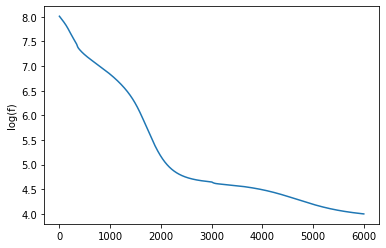

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/model_Germany_365\assets
8
373


[I 2021-04-08 21:29:57,867] A new study created in memory with name: no-name-80ea399c-b25a-42d9-a4fb-d4765129b718
[I 2021-04-08 21:29:57,873] Trial 0 finished with value: 117392688.15364031 and parameters: {'beta': 0.7218065795024855, 'gamma': 0.9743938315025198, 'mu': 0.4635480704978999}. Best is trial 0 with value: 117392688.15364031.
[I 2021-04-08 21:29:57,874] Trial 1 finished with value: 117266619.66448997 and parameters: {'beta': 0.47765789168430606, 'gamma': 0.35455314145420347, 'mu': 0.5800177058124062}. Best is trial 1 with value: 117266619.66448997.
[I 2021-04-08 21:29:57,876] Trial 2 finished with value: 114270892.63928932 and parameters: {'beta': 0.6947976609007528, 'gamma': 0.0007109155587564642, 'mu': 0.7148712008888748}. Best is trial 2 with value: 114270892.63928932.
[I 2021-04-08 21:29:57,878] Trial 3 finished with value: 116853012.51229987 and parameters: {'beta': 0.7811784134201756, 'gamma': 0.1262066762523386, 'mu': 0.9161027042938311}. Best is trial 2 with value: 1

[I 2021-04-08 21:29:58,066] Trial 34 finished with value: 11322031080.806637 and parameters: {'beta': 0.935628716248052, 'gamma': 0.32303517782896984, 'mu': 0.507999662435631}. Best is trial 27 with value: 113488428.5599801.
[I 2021-04-08 21:29:58,075] Trial 35 finished with value: 116165370.28143416 and parameters: {'beta': 0.8352191601655928, 'gamma': 0.14903635860489192, 'mu': 0.7847104031989438}. Best is trial 27 with value: 113488428.5599801.
[I 2021-04-08 21:29:58,082] Trial 36 finished with value: 115562392.94226803 and parameters: {'beta': 0.9030660018581945, 'gamma': 0.29774615314529695, 'mu': 0.6569428533256578}. Best is trial 27 with value: 113488428.5599801.
[I 2021-04-08 21:29:58,092] Trial 37 finished with value: 117005664.26569872 and parameters: {'beta': 0.7506058139448939, 'gamma': 0.3808670123378045, 'mu': 0.595735524749037}. Best is trial 27 with value: 113488428.5599801.
[I 2021-04-08 21:29:58,101] Trial 38 finished with value: 116975190.49988219 and parameters: {'b

[I 2021-04-08 21:29:58,335] Trial 69 finished with value: 117137800.95810062 and parameters: {'beta': 0.6612715488917503, 'gamma': 0.2749151045402918, 'mu': 0.8004559203390613}. Best is trial 27 with value: 113488428.5599801.
[I 2021-04-08 21:29:58,344] Trial 70 finished with value: 1.6198405191314163e+18 and parameters: {'beta': 0.8754142879249547, 'gamma': 0.08231335683971874, 'mu': 0.4997006908096713}. Best is trial 27 with value: 113488428.5599801.
[I 2021-04-08 21:29:58,352] Trial 71 finished with value: 113292679.79159361 and parameters: {'beta': 0.7562322337536921, 'gamma': 0.025679125816929865, 'mu': 0.7295026360653039}. Best is trial 71 with value: 113292679.79159361.
[I 2021-04-08 21:29:58,362] Trial 72 finished with value: 114432554.77503976 and parameters: {'beta': 0.7288487688202101, 'gamma': 0.03003305314565846, 'mu': 0.7231374386252655}. Best is trial 71 with value: 113292679.79159361.
[I 2021-04-08 21:29:58,372] Trial 73 finished with value: 171462502.3019848 and parame

[I 2021-04-08 21:29:58,722] Trial 103 finished with value: 117316067.38727553 and parameters: {'beta': 0.6441795495301621, 'gamma': 0.6258964777125748, 'mu': 0.8126174313661826}. Best is trial 83 with value: 113222868.32759118.
[I 2021-04-08 21:29:58,730] Trial 104 finished with value: 8.512303783362408e+20 and parameters: {'beta': 0.7060701736303765, 'gamma': 0.07124144805560521, 'mu': 0.13181332510776472}. Best is trial 83 with value: 113222868.32759118.
[I 2021-04-08 21:29:58,738] Trial 105 finished with value: 113278604.7436902 and parameters: {'beta': 0.8008240202379716, 'gamma': 0.10434232069887267, 'mu': 0.6974480612969742}. Best is trial 83 with value: 113222868.32759118.
[I 2021-04-08 21:29:58,750] Trial 106 finished with value: 114616642.96313648 and parameters: {'beta': 0.8461472570957947, 'gamma': 0.11754339480445117, 'mu': 0.7107521676374773}. Best is trial 83 with value: 113222868.32759118.
[I 2021-04-08 21:29:58,759] Trial 107 finished with value: 141455074.20042878 and 

[I 2021-04-08 21:29:58,991] Trial 137 finished with value: 61442009134.01783 and parameters: {'beta': 0.928521192019174, 'gamma': 0.01416404487833426, 'mu': 0.8021369429209357}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:58,999] Trial 138 finished with value: 2285565373218.908 and parameters: {'beta': 0.8874130398476563, 'gamma': 0.05060995449391767, 'mu': 0.6856254277506081}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,006] Trial 139 finished with value: 113464816.25865526 and parameters: {'beta': 0.8138023345180487, 'gamma': 0.07732187166901115, 'mu': 0.7409205089153388}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,015] Trial 140 finished with value: 117341985.77367125 and parameters: {'beta': 0.8254662450400528, 'gamma': 0.9123494795670349, 'mu': 0.7398317270827054}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,020] Trial 141 finished with value: 113387797.06794426 and pa

[I 2021-04-08 21:29:59,248] Trial 171 finished with value: 113683485.96099225 and parameters: {'beta': 0.8262457848138979, 'gamma': 0.17546003738744542, 'mu': 0.6597024622557502}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,257] Trial 172 finished with value: 115171556.68568012 and parameters: {'beta': 0.7945223526689434, 'gamma': 0.1494745041570866, 'mu': 0.6856448157301452}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,266] Trial 173 finished with value: 115611258.39471255 and parameters: {'beta': 0.7805395441546457, 'gamma': 0.12365257456392904, 'mu': 0.7147172261946811}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,273] Trial 174 finished with value: 117093774.91466786 and parameters: {'beta': 0.47725773160125085, 'gamma': 0.08301112475661274, 'mu': 0.7326462705881782}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,281] Trial 175 finished with value: 548694185176.7905 and

[I 2021-04-08 21:29:59,534] Trial 205 finished with value: 113956402.91551839 and parameters: {'beta': 0.8065551899399499, 'gamma': 0.06349048175721227, 'mu': 0.7584299249532743}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,542] Trial 206 finished with value: 115185107.17493898 and parameters: {'beta': 0.7547896786663604, 'gamma': 0.09593477692196943, 'mu': 0.7006875186995141}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,550] Trial 207 finished with value: 115824537.5215663 and parameters: {'beta': 0.7866604619084496, 'gamma': 0.13429578638625195, 'mu': 0.7208447287257698}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,557] Trial 208 finished with value: 117283660.30967325 and parameters: {'beta': 0.8260975946810226, 'gamma': 0.7213709084688784, 'mu': 0.6731126679604528}. Best is trial 114 with value: 113127700.44406803.
[I 2021-04-08 21:29:59,566] Trial 209 finished with value: 115730753.19221967 and 

[I 2021-04-08 21:29:59,818] Trial 239 finished with value: 112812113.52939191 and parameters: {'beta': 0.7273706257979722, 'gamma': 0.09495598590386177, 'mu': 0.6214853568628121}. Best is trial 239 with value: 112812113.52939191.
[I 2021-04-08 21:29:59,827] Trial 240 finished with value: 112774927.47068325 and parameters: {'beta': 0.7198163708192091, 'gamma': 0.09601353546035318, 'mu': 0.6137591522390066}. Best is trial 240 with value: 112774927.47068325.
[I 2021-04-08 21:29:59,835] Trial 241 finished with value: 112992283.20064288 and parameters: {'beta': 0.7376113073148264, 'gamma': 0.09105586820658805, 'mu': 0.6325190391257044}. Best is trial 240 with value: 112774927.47068325.
[I 2021-04-08 21:29:59,844] Trial 242 finished with value: 112835996.82530111 and parameters: {'beta': 0.7221065852981698, 'gamma': 0.09794913941818814, 'mu': 0.609519442084698}. Best is trial 240 with value: 112774927.47068325.
[I 2021-04-08 21:29:59,852] Trial 243 finished with value: 112720506.11472596 and

[I 2021-04-08 21:30:00,156] Trial 273 finished with value: 333018838.54273134 and parameters: {'beta': 0.7097698291747128, 'gamma': 0.09439790831467929, 'mu': 0.5510773323176263}. Best is trial 253 with value: 112654812.85082097.
[I 2021-04-08 21:30:00,167] Trial 274 finished with value: 116116354.38223064 and parameters: {'beta': 0.630165197523981, 'gamma': 0.11901666315316868, 'mu': 0.5825564860921513}. Best is trial 253 with value: 112654812.85082097.
[I 2021-04-08 21:30:00,177] Trial 275 finished with value: 115799887.14590597 and parameters: {'beta': 0.6572457981366048, 'gamma': 0.08966984395433164, 'mu': 0.6265970141800847}. Best is trial 253 with value: 112654812.85082097.
[I 2021-04-08 21:30:00,187] Trial 276 finished with value: 113922297.69573426 and parameters: {'beta': 0.7248410366599956, 'gamma': 0.13749023274642105, 'mu': 0.598593807506371}. Best is trial 253 with value: 112654812.85082097.
[I 2021-04-08 21:30:00,203] Trial 277 finished with value: 208080573.68600282 and 

[I 2021-04-08 21:30:00,532] Trial 307 finished with value: 115900719.05920568 and parameters: {'beta': 0.6560982020486368, 'gamma': 0.1030041189873033, 'mu': 0.6159643538954249}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,543] Trial 308 finished with value: 112522062.2610015 and parameters: {'beta': 0.6783918943394148, 'gamma': 0.12441242586739909, 'mu': 0.5430023738780546}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,553] Trial 309 finished with value: 115354071.69213067 and parameters: {'beta': 0.6376340639591984, 'gamma': 0.13139617590716907, 'mu': 0.5428278221862217}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,565] Trial 310 finished with value: 114712127.35265124 and parameters: {'beta': 0.6715223759743988, 'gamma': 0.12551634782462218, 'mu': 0.5695237254342191}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,576] Trial 311 finished with value: 115595724.72512822 and 

[I 2021-04-08 21:30:00,920] Trial 341 finished with value: 2738069042.3984857 and parameters: {'beta': 0.7476249307116888, 'gamma': 0.14252129770262198, 'mu': 0.5151808992252562}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,931] Trial 342 finished with value: 113569188.419521 and parameters: {'beta': 0.6440370732848933, 'gamma': 0.07264229482734488, 'mu': 0.5767647405584636}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,941] Trial 343 finished with value: 116100380.83408348 and parameters: {'beta': 0.6847699781449507, 'gamma': 0.12339459210603429, 'mu': 0.638103029727881}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,954] Trial 344 finished with value: 682580615.641429 and parameters: {'beta': 0.71593657853377, 'gamma': 0.09660155192956216, 'mu': 0.5456704023945005}. Best is trial 286 with value: 112370033.09805547.
[I 2021-04-08 21:30:00,967] Trial 345 finished with value: 115912217.85541594 and param

[I 2021-04-08 21:30:01,333] Trial 375 finished with value: 111731104.28817843 and parameters: {'beta': 0.5956880042953636, 'gamma': 0.1755820570703647, 'mu': 0.39945781357805515}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,352] Trial 376 finished with value: 9717555617.699594 and parameters: {'beta': 0.6552191333395407, 'gamma': 0.15251809743424954, 'mu': 0.3944592512984586}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,368] Trial 377 finished with value: 114775721.07385114 and parameters: {'beta': 0.5436650853571753, 'gamma': 0.1770928334777415, 'mu': 0.3791798373545933}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,380] Trial 378 finished with value: 3792816139.5687957 and parameters: {'beta': 0.6036600813304623, 'gamma': 0.15090810915565542, 'mu': 0.35153426630538503}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,392] Trial 379 finished with value: 112454740.1864382 and 

[I 2021-04-08 21:30:01,772] Trial 409 finished with value: 112129150.85640687 and parameters: {'beta': 0.617737952064237, 'gamma': 0.16808392978282882, 'mu': 0.4340546259972256}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,784] Trial 410 finished with value: 115921920.561866 and parameters: {'beta': 0.6096438288079542, 'gamma': 0.21116116440679178, 'mu': 0.44481042426127027}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,794] Trial 411 finished with value: 116452246.44148234 and parameters: {'beta': 0.5871186137447552, 'gamma': 0.2374380513961143, 'mu': 0.42205312306296855}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,805] Trial 412 finished with value: 135767447.00139314 and parameters: {'beta': 0.6253672963666158, 'gamma': 0.1770755743721411, 'mu': 0.39496773104947597}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:01,817] Trial 413 finished with value: 113066784.00333315 and 

[I 2021-04-08 21:30:02,160] Trial 443 finished with value: 112083795.0065506 and parameters: {'beta': 0.6616485913964728, 'gamma': 0.16426718471308666, 'mu': 0.47979684120055593}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,172] Trial 444 finished with value: 114102153.13379265 and parameters: {'beta': 0.6376646808251145, 'gamma': 0.16462066390504468, 'mu': 0.4821897465340473}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,184] Trial 445 finished with value: 112042038.55096582 and parameters: {'beta': 0.661795384736654, 'gamma': 0.17063754015575933, 'mu': 0.473069137206347}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,195] Trial 446 finished with value: 114000145.74039537 and parameters: {'beta': 0.6585551207062127, 'gamma': 0.19988206185358814, 'mu': 0.4656188774473066}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,206] Trial 447 finished with value: 115521492.53398927 and 

[I 2021-04-08 21:30:02,559] Trial 477 finished with value: 115530696.39721404 and parameters: {'beta': 0.64544013521831, 'gamma': 0.22332960304641503, 'mu': 0.4566949584447346}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,571] Trial 478 finished with value: 112029996.53633668 and parameters: {'beta': 0.682506264223098, 'gamma': 0.18309747527064327, 'mu': 0.4784382783132137}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,584] Trial 479 finished with value: 112436199.6181414 and parameters: {'beta': 0.678274748409076, 'gamma': 0.1925487549266735, 'mu': 0.4742634399880813}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,596] Trial 480 finished with value: 111926129.97751571 and parameters: {'beta': 0.6841122093010569, 'gamma': 0.22312652715999803, 'mu': 0.4423312911129711}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,608] Trial 481 finished with value: 112979364.28937578 and para

[I 2021-04-08 21:30:02,975] Trial 511 finished with value: 115613676.78198865 and parameters: {'beta': 0.6385942536846241, 'gamma': 0.18385907468250048, 'mu': 0.41435837137436016}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:02,988] Trial 512 finished with value: 113919330.13084406 and parameters: {'beta': 0.6626516753655834, 'gamma': 0.22506205670956717, 'mu': 0.44231766934321604}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:03,001] Trial 513 finished with value: 115630377.70286489 and parameters: {'beta': 0.6337345358247768, 'gamma': 0.2025986797717588, 'mu': 0.4698193513757222}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:03,013] Trial 514 finished with value: 249764516.64084327 and parameters: {'beta': 0.6978910581617715, 'gamma': 0.1767751036102494, 'mu': 0.45681646855563834}. Best is trial 375 with value: 111731104.28817843.
[I 2021-04-08 21:30:03,026] Trial 515 finished with value: 111772030.28566904 a

[I 2021-04-08 21:30:03,405] Trial 545 finished with value: 1137200094.3181407 and parameters: {'beta': 0.6162397200916153, 'gamma': 0.17351454192745977, 'mu': 0.35399537047725216}. Best is trial 540 with value: 111354333.1300944.
[I 2021-04-08 21:30:03,419] Trial 546 finished with value: 115180943.97607097 and parameters: {'beta': 0.5922226595185484, 'gamma': 0.23540567566624504, 'mu': 0.3762830837943022}. Best is trial 540 with value: 111354333.1300944.
[I 2021-04-08 21:30:03,433] Trial 547 finished with value: 111629056.41715999 and parameters: {'beta': 0.6171496783912515, 'gamma': 0.19654308554336467, 'mu': 0.3984908882446939}. Best is trial 540 with value: 111354333.1300944.
[I 2021-04-08 21:30:03,447] Trial 548 finished with value: 114963408.31371221 and parameters: {'beta': 0.5749382199687116, 'gamma': 0.2145555498263968, 'mu': 0.3758222969523319}. Best is trial 540 with value: 111354333.1300944.
[I 2021-04-08 21:30:03,459] Trial 549 finished with value: 112002962.16009663 and pa

[I 2021-04-08 21:30:03,840] Trial 579 finished with value: 135349089.84361848 and parameters: {'beta': 0.6469306392861269, 'gamma': 0.2038765889464052, 'mu': 0.3894931479762809}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:03,853] Trial 580 finished with value: 116052307.9200487 and parameters: {'beta': 0.5566390479491313, 'gamma': 0.18400974646613458, 'mu': 0.42169189003349383}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:03,866] Trial 581 finished with value: 116611335.00193687 and parameters: {'beta': 0.5949172704779035, 'gamma': 0.24580168833855665, 'mu': 0.4395048210662161}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:04,363] Trial 582 finished with value: 114513150.21605632 and parameters: {'beta': 0.6203071579498957, 'gamma': 0.16869173911935992, 'mu': 0.4659335349224478}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:04,377] Trial 583 finished with value: 112000732.36482485 and

[I 2021-04-08 21:30:04,737] Trial 613 finished with value: 168395988.35851473 and parameters: {'beta': 0.6881540250333056, 'gamma': 0.2150731729348568, 'mu': 0.41419382647818676}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:04,751] Trial 614 finished with value: 113971405.72165884 and parameters: {'beta': 0.6373450755652548, 'gamma': 0.1973874492932134, 'mu': 0.44550811379905025}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:04,765] Trial 615 finished with value: 115971311.80463101 and parameters: {'beta': 0.6249069355051523, 'gamma': 0.2445838153735331, 'mu': 0.4265670129370875}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:04,778] Trial 616 finished with value: 117405696.85596311 and parameters: {'beta': 0.6730346698851163, 'gamma': 0.9973239647964467, 'mu': 0.4561461957400344}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:04,792] Trial 617 finished with value: 112543411.60306543 and 

[I 2021-04-08 21:30:05,184] Trial 647 finished with value: 112021535.90100218 and parameters: {'beta': 0.5983756749400758, 'gamma': 0.14671306952356075, 'mu': 0.43465464213381466}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,196] Trial 648 finished with value: 115799821.97914317 and parameters: {'beta': 0.5762118045385358, 'gamma': 0.18572433295033117, 'mu': 0.4308741971668287}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,209] Trial 649 finished with value: 143586438.8886368 and parameters: {'beta': 0.5982933978316478, 'gamma': 0.14006652946946402, 'mu': 0.40330894237547893}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,224] Trial 650 finished with value: 115526581.78949529 and parameters: {'beta': 0.5516821826224257, 'gamma': 0.16024374212167192, 'mu': 0.422877150818663}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,237] Trial 651 finished with value: 113043688.6730507 and

[I 2021-04-08 21:30:05,653] Trial 681 finished with value: 113749878.71114604 and parameters: {'beta': 0.6121175267080012, 'gamma': 0.25170248028843184, 'mu': 0.3584124975982139}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,669] Trial 682 finished with value: 117296080.92411327 and parameters: {'beta': 0.6313425164289983, 'gamma': 0.59367720713646, 'mu': 0.34981600611178265}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,682] Trial 683 finished with value: 111259396.83136302 and parameters: {'beta': 0.5892808727883048, 'gamma': 0.23154551349786523, 'mu': 0.3175583543128972}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,696] Trial 684 finished with value: 114649730.72098996 and parameters: {'beta': 0.5680282710401756, 'gamma': 0.2750444325276194, 'mu': 0.2969474303911526}. Best is trial 561 with value: 111233330.06438479.
[I 2021-04-08 21:30:05,709] Trial 685 finished with value: 113964034.35168926 and p

[I 2021-04-08 21:30:06,142] Trial 715 finished with value: 116302926.78666009 and parameters: {'beta': 0.4906870951397961, 'gamma': 0.2626716544819518, 'mu': 0.2656342955807614}. Best is trial 707 with value: 109242108.23261869.
[I 2021-04-08 21:30:06,156] Trial 716 finished with value: 116607166.46523684 and parameters: {'beta': 0.47547613655092874, 'gamma': 0.34153212102927605, 'mu': 0.16488076308699168}. Best is trial 707 with value: 109242108.23261869.
[I 2021-04-08 21:30:06,171] Trial 717 finished with value: 110596119.024083 and parameters: {'beta': 0.5240788544465833, 'gamma': 0.27184846176993993, 'mu': 0.21769022899792137}. Best is trial 707 with value: 109242108.23261869.
[I 2021-04-08 21:30:06,185] Trial 718 finished with value: 116556261.82902676 and parameters: {'beta': 0.4622320831762347, 'gamma': 0.28925132657729014, 'mu': 0.21252795048146125}. Best is trial 707 with value: 109242108.23261869.
[I 2021-04-08 21:30:06,198] Trial 719 finished with value: 113213264.74530357 a

[I 2021-04-08 21:30:06,658] Trial 749 finished with value: 107139321.9801271 and parameters: {'beta': 0.4984582701697292, 'gamma': 0.33452598142508944, 'mu': 0.10676029960476519}. Best is trial 749 with value: 107139321.9801271.
[I 2021-04-08 21:30:06,675] Trial 750 finished with value: 105336621.64458406 and parameters: {'beta': 0.488931019807303, 'gamma': 0.32342898177240703, 'mu': 0.10047612760619691}. Best is trial 750 with value: 105336621.64458406.
[I 2021-04-08 21:30:06,689] Trial 751 finished with value: 169620126.8571282 and parameters: {'beta': 0.5060312864413862, 'gamma': 0.3242032726002781, 'mu': 0.08510851215662588}. Best is trial 750 with value: 105336621.64458406.
[I 2021-04-08 21:30:06,706] Trial 752 finished with value: 117003583.48433967 and parameters: {'beta': 0.44475188710297386, 'gamma': 0.37052146646662576, 'mu': 0.11768558793422026}. Best is trial 750 with value: 105336621.64458406.
[I 2021-04-08 21:30:06,721] Trial 753 finished with value: 116456713.19005564 an

[I 2021-04-08 21:30:07,181] Trial 783 finished with value: 105116252.99974972 and parameters: {'beta': 0.4467268510139805, 'gamma': 0.34673299504932736, 'mu': 0.02740958977315073}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,199] Trial 784 finished with value: 73250482.41779321 and parameters: {'beta': 0.4542830818533203, 'gamma': 0.31977915758428127, 'mu': 0.02673765817639922}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,216] Trial 785 finished with value: 80083065.06121086 and parameters: {'beta': 0.44828714272365533, 'gamma': 0.3447887813190963, 'mu': 0.00037252832771937985}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,233] Trial 786 finished with value: 104483433.24592352 and parameters: {'beta': 0.44331374356240416, 'gamma': 0.3436873062881313, 'mu': 0.025522802468693664}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,249] Trial 787 finished with value: 114072145.36178

[I 2021-04-08 21:30:07,740] Trial 817 finished with value: 115601356.08613779 and parameters: {'beta': 0.4087162385135284, 'gamma': 0.33882287005532963, 'mu': 0.04150514949756873}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,754] Trial 818 finished with value: 116819000.13291118 and parameters: {'beta': 0.4414350560136243, 'gamma': 0.4050051863887108, 'mu': 0.014941580713454482}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,769] Trial 819 finished with value: 343477185.4232564 and parameters: {'beta': 0.47370568731157847, 'gamma': 0.3099911539118475, 'mu': 0.041757028920234876}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,784] Trial 820 finished with value: 112524524.3864855 and parameters: {'beta': 0.4370188719039442, 'gamma': 0.3603003662754013, 'mu': 0.019215132367435772}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:07,799] Trial 821 finished with value: 167046827.060405 a

[I 2021-04-08 21:30:08,302] Trial 851 finished with value: 96571282.596722 and parameters: {'beta': 0.39438082233098776, 'gamma': 0.29970558806558256, 'mu': 0.004242238265192327}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:08,317] Trial 852 finished with value: 104672532.24066675 and parameters: {'beta': 0.38745214156413427, 'gamma': 0.3008445937620348, 'mu': 0.005487242795054245}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:08,333] Trial 853 finished with value: 116050295.73841134 and parameters: {'beta': 0.350030283689558, 'gamma': 0.3010423029639894, 'mu': 0.00633358988280423}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:08,347] Trial 854 finished with value: 116998941.2712238 and parameters: {'beta': 0.3327203627022016, 'gamma': 0.30133031738697463, 'mu': 0.0012879008091682114}. Best is trial 768 with value: 31082709.607005626.
[I 2021-04-08 21:30:08,363] Trial 855 finished with value: 99399020.21282358 

[I 2021-04-08 21:30:08,882] Trial 885 finished with value: 105850742.67470443 and parameters: {'beta': 0.38912321483757417, 'gamma': 0.2952208048493734, 'mu': 0.02056266204856496}. Best is trial 884 with value: 24346119.246113442.
[I 2021-04-08 21:30:08,899] Trial 886 finished with value: 74160091.45519155 and parameters: {'beta': 0.41605265210423964, 'gamma': 0.28564879979616853, 'mu': 0.026165868899975145}. Best is trial 884 with value: 24346119.246113442.
[I 2021-04-08 21:30:08,918] Trial 887 finished with value: 80732608.4365899 and parameters: {'beta': 0.4184909004459553, 'gamma': 0.2843493477914288, 'mu': 0.0314443631037967}. Best is trial 884 with value: 24346119.246113442.
[I 2021-04-08 21:30:08,935] Trial 888 finished with value: 6007939.761040408 and parameters: {'beta': 0.41440881018612746, 'gamma': 0.28236615167375256, 'mu': 0.00207357423208707}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:08,952] Trial 889 finished with value: 10239674.107242044 an

[I 2021-04-08 21:30:09,489] Trial 919 finished with value: 56494648.59339598 and parameters: {'beta': 0.41289623344103976, 'gamma': 0.27538046060367805, 'mu': 0.019543422392974408}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:09,507] Trial 920 finished with value: 1585937166.3612318 and parameters: {'beta': 0.4306970330006457, 'gamma': 0.2631766964763054, 'mu': 0.01681666067331687}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:09,523] Trial 921 finished with value: 106220523.62780634 and parameters: {'beta': 0.34818374171749117, 'gamma': 0.265071933326049, 'mu': 0.0027434645505651223}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:09,539] Trial 922 finished with value: 107986355.50745535 and parameters: {'beta': 0.370385808663085, 'gamma': 0.29116177691050255, 'mu': 0.0001004702361993039}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:09,554] Trial 923 finished with value: 112725179.80222346 

[I 2021-04-08 21:30:10,092] Trial 953 finished with value: 107233401.31112355 and parameters: {'beta': 0.3698468084932166, 'gamma': 0.2795018194062014, 'mu': 0.018887879854081607}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,114] Trial 954 finished with value: 113028430.31539425 and parameters: {'beta': 0.39457543903987785, 'gamma': 0.24524017434450865, 'mu': 0.04204652198210989}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,132] Trial 955 finished with value: 117529108.0970748 and parameters: {'beta': 0.3571589662487514, 'gamma': 0.519377707948066, 'mu': 9.336743044699924e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,148] Trial 956 finished with value: 77228821.8769928 and parameters: {'beta': 0.39110827312799135, 'gamma': 0.27256186382729963, 'mu': 0.018965674241059324}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,165] Trial 957 finished with value: 109155764.90795772 an

[I 2021-04-08 21:30:10,702] Trial 987 finished with value: 115318186.10435927 and parameters: {'beta': 0.2933793634607419, 'gamma': 0.23845254237717958, 'mu': 0.0001518312979345961}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,720] Trial 988 finished with value: 109192609.82518417 and parameters: {'beta': 0.32421789226655107, 'gamma': 0.23964273627703706, 'mu': 0.016061931942964257}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,736] Trial 989 finished with value: 73425190.24505237 and parameters: {'beta': 0.3470982026527176, 'gamma': 0.23953965527122761, 'mu': 0.00248352510368969}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,754] Trial 990 finished with value: 54891831.60885866 and parameters: {'beta': 0.36774915019698107, 'gamma': 0.2537910677818823, 'mu': 0.0008014553303196569}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:10,773] Trial 991 finished with value: 114839492.1673093

[I 2021-04-08 21:30:11,327] Trial 1021 finished with value: 63480084.09017894 and parameters: {'beta': 0.3606375531388374, 'gamma': 0.2499315599867354, 'mu': 0.00037457640210537065}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:11,346] Trial 1022 finished with value: 116834875.1812611 and parameters: {'beta': 0.3178927249373631, 'gamma': 0.2662487072997384, 'mu': 0.05676759438579338}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:11,366] Trial 1023 finished with value: 176208396.72353363 and parameters: {'beta': 0.38357675798793767, 'gamma': 0.23205805966805965, 'mu': 0.020257052014997605}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:11,382] Trial 1024 finished with value: 10406338.584689498 and parameters: {'beta': 0.3961572184930117, 'gamma': 0.2616988975016836, 'mu': 0.0011845029632343708}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:11,398] Trial 1025 finished with value: 87743118.42490

[I 2021-04-08 21:30:11,986] Trial 1055 finished with value: 37955017.24674365 and parameters: {'beta': 0.3727064073034041, 'gamma': 0.25324990112913637, 'mu': 0.0006037845489533777}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,009] Trial 1056 finished with value: 101576173.38548945 and parameters: {'beta': 0.39356768002044695, 'gamma': 0.2827590139599598, 'mu': 0.0342881300361131}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,027] Trial 1057 finished with value: 221680671.52734563 and parameters: {'beta': 0.4155419159634875, 'gamma': 0.26226537206262573, 'mu': 0.01960983583555028}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,046] Trial 1058 finished with value: 12651174.037460476 and parameters: {'beta': 0.35555447836710796, 'gamma': 0.22462629158928438, 'mu': 0.0001645687293931658}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,068] Trial 1059 finished with value: 111059235.121

[I 2021-04-08 21:30:12,648] Trial 1089 finished with value: 107586431.99023281 and parameters: {'beta': 0.3249680230067376, 'gamma': 0.21997680210059473, 'mu': 0.04029123753721378}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,665] Trial 1090 finished with value: 111716979.27682893 and parameters: {'beta': 0.3535119905051733, 'gamma': 0.2740197319947351, 'mu': 0.01905320434117511}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,683] Trial 1091 finished with value: 100510440.8783023 and parameters: {'beta': 0.3817215770722656, 'gamma': 0.250146172657173, 'mu': 0.055077013075535405}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,700] Trial 1092 finished with value: 53674198.957717866 and parameters: {'beta': 0.40392550323789644, 'gamma': 0.27064874865625943, 'mu': 0.018647917090324442}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:12,719] Trial 1093 finished with value: 7565470.20932326 

[I 2021-04-08 21:30:13,320] Trial 1123 finished with value: 16170273948.622255 and parameters: {'beta': 0.4289388007439655, 'gamma': 0.24162351927958034, 'mu': 0.01817460740725461}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:13,340] Trial 1124 finished with value: 94458723.63989559 and parameters: {'beta': 0.37352695171934824, 'gamma': 0.266439365857825, 'mu': 0.019934360726743934}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:13,359] Trial 1125 finished with value: 116258590.10451987 and parameters: {'beta': 0.3415348233757514, 'gamma': 0.2956580424515597, 'mu': 0.000703548012140606}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:13,376] Trial 1126 finished with value: 100776871.47831847 and parameters: {'beta': 0.413306759595696, 'gamma': 0.27894733788049775, 'mu': 0.05828587839863955}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:13,394] Trial 1127 finished with value: 117096601.64721797

[I 2021-04-08 21:30:13,992] Trial 1157 finished with value: 117182351.47525002 and parameters: {'beta': 0.3365637587766455, 'gamma': 0.3066908966520564, 'mu': 0.06818766956889395}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,013] Trial 1158 finished with value: 63587426.54122749 and parameters: {'beta': 0.39754770464795963, 'gamma': 0.2718933282404783, 'mu': 0.018390245346980402}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,033] Trial 1159 finished with value: 60095827.207454555 and parameters: {'beta': 0.36492179648764256, 'gamma': 0.2529891341685163, 'mu': 0.00026180191557833004}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,055] Trial 1160 finished with value: 45380520753.73949 and parameters: {'beta': 0.41893850730453963, 'gamma': 0.21417312665639981, 'mu': 0.035062256218864635}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,083] Trial 1161 finished with value: 117170814.733

[I 2021-04-08 21:30:14,754] Trial 1191 finished with value: 96304582.65542106 and parameters: {'beta': 0.3580684462355343, 'gamma': 0.21670594480670777, 'mu': 0.052508224945695514}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,776] Trial 1192 finished with value: 940150147.4595044 and parameters: {'beta': 0.4369324478122041, 'gamma': 0.2726709418327529, 'mu': 0.019647007324568592}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,799] Trial 1193 finished with value: 102486310.41589335 and parameters: {'beta': 0.4038308507575399, 'gamma': 0.30666276328029857, 'mu': 0.018122911052074288}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,820] Trial 1194 finished with value: 95882950.22525929 and parameters: {'beta': 0.3770629212047288, 'gamma': 0.238200896125028, 'mu': 0.05134461980304542}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:14,841] Trial 1195 finished with value: 111296052.03122535 

[I 2021-04-08 21:30:15,563] Trial 1225 finished with value: 115135147.28075686 and parameters: {'beta': 0.34832675627948745, 'gamma': 0.2919644688927599, 'mu': 0.001114855067650441}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:15,589] Trial 1226 finished with value: 108260682.27141012 and parameters: {'beta': 0.4419493743113494, 'gamma': 0.3085378509689001, 'mu': 0.07696843639319625}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:15,614] Trial 1227 finished with value: 94203536.48236819 and parameters: {'beta': 0.38446194685660195, 'gamma': 0.26538944974174006, 'mu': 0.03324650438513558}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:15,636] Trial 1228 finished with value: 4828846146.898046 and parameters: {'beta': 0.401482591808033, 'gamma': 0.23381652688489174, 'mu': 0.0012316173251700796}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:15,656] Trial 1229 finished with value: 39205573460.8316

[I 2021-04-08 21:30:16,311] Trial 1259 finished with value: 1714686076.7819967 and parameters: {'beta': 0.3917868391329186, 'gamma': 0.23219148159313682, 'mu': 0.0007810921655878489}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:16,334] Trial 1260 finished with value: 116711810.87312444 and parameters: {'beta': 0.34844012171295397, 'gamma': 0.2962611979197323, 'mu': 0.04834765903319005}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:16,355] Trial 1261 finished with value: 5712608835.983181 and parameters: {'beta': 0.4471301533418118, 'gamma': 0.26262501900349816, 'mu': 0.03260180879876409}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:16,376] Trial 1262 finished with value: 789187893.1315045 and parameters: {'beta': 0.37247181354338216, 'gamma': 0.21877245259437508, 'mu': 0.00017326748404399012}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:16,398] Trial 1263 finished with value: 28258230.193

[I 2021-04-08 21:30:17,062] Trial 1293 finished with value: 68631868.99388352 and parameters: {'beta': 0.33529329070418895, 'gamma': 0.21042563814313897, 'mu': 0.02001324506300439}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,083] Trial 1294 finished with value: 103821019814.73193 and parameters: {'beta': 0.4515887681138928, 'gamma': 0.2590739164992892, 'mu': 0.0007391403885290145}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,104] Trial 1295 finished with value: 112715276.41310926 and parameters: {'beta': 0.38527110195314296, 'gamma': 0.23743233417183374, 'mu': 0.035501162431264555}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,124] Trial 1296 finished with value: 115866380.15523043 and parameters: {'beta': 0.39941818715291094, 'gamma': 0.31943177322077554, 'mu': 0.06296448719922618}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,149] Trial 1297 finished with value: 16963772.702

[I 2021-04-08 21:30:17,812] Trial 1327 finished with value: 108877544.26350865 and parameters: {'beta': 0.34325699622340483, 'gamma': 0.2559450030437849, 'mu': 0.019377878464665904}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,835] Trial 1328 finished with value: 18927015.453653976 and parameters: {'beta': 0.42317804224636585, 'gamma': 0.2875561227750997, 'mu': 0.0005452748547993182}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,857] Trial 1329 finished with value: 54751381.45630826 and parameters: {'beta': 0.44334166948653764, 'gamma': 0.30940942585193165, 'mu': 0.019127265050680173}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,880] Trial 1330 finished with value: 87631920.4298017 and parameters: {'beta': 0.4456305736419342, 'gamma': 0.32026910099886297, 'mu': 0.032429320578049765}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:17,902] Trial 1331 finished with value: 59981325.0388

[I 2021-04-08 21:30:18,589] Trial 1361 finished with value: 88002551.3693178 and parameters: {'beta': 0.426081351618916, 'gamma': 0.2944874837137435, 'mu': 0.03701749170647231}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:18,612] Trial 1362 finished with value: 103919886.61582734 and parameters: {'beta': 0.40311820375424284, 'gamma': 0.3176869419425258, 'mu': 0.0005033367312893923}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:18,634] Trial 1363 finished with value: 32549633238.254936 and parameters: {'beta': 0.4486446264947677, 'gamma': 0.2545797044023497, 'mu': 0.019460405932648205}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:18,657] Trial 1364 finished with value: 31323565.030617114 and parameters: {'beta': 0.3978493413096457, 'gamma': 0.276281354302123, 'mu': 0.0001535580960242635}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:18,679] Trial 1365 finished with value: 220253768519.45633

[I 2021-04-08 21:30:19,371] Trial 1395 finished with value: 110458333.83313276 and parameters: {'beta': 0.3274758712588359, 'gamma': 0.24463586875141236, 'mu': 0.018381141791402194}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:19,395] Trial 1396 finished with value: 89227361.97373794 and parameters: {'beta': 0.3566300888450024, 'gamma': 0.22966591625718358, 'mu': 0.0351971591187536}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:19,417] Trial 1397 finished with value: 29834115.69839199 and parameters: {'beta': 0.3783089614849774, 'gamma': 0.25623770436435966, 'mu': 0.0006651275658708061}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:19,439] Trial 1398 finished with value: 115182414.13389179 and parameters: {'beta': 0.299236764022266, 'gamma': 0.20485363888784064, 'mu': 0.07096663731381535}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:19,460] Trial 1399 finished with value: 394544850.4695442

[I 2021-04-08 21:30:20,170] Trial 1429 finished with value: 122288663.42482206 and parameters: {'beta': 0.40481626748908806, 'gamma': 0.25169947796607095, 'mu': 0.047875767126573876}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:20,194] Trial 1430 finished with value: 1802721265.454862 and parameters: {'beta': 0.3711861113380221, 'gamma': 0.2016587606064291, 'mu': 0.0200230310076271}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:20,220] Trial 1431 finished with value: 116131162.31536512 and parameters: {'beta': 0.3264852797914084, 'gamma': 0.26877808973824446, 'mu': 0.032769806457109314}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:20,245] Trial 1432 finished with value: 344618330.97131735 and parameters: {'beta': 0.3917876484233403, 'gamma': 0.23561977014833513, 'mu': 0.01650210206193497}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:20,270] Trial 1433 finished with value: 111615554.802937

[I 2021-04-08 21:30:20,941] Trial 1463 finished with value: 1260944375.8968816 and parameters: {'beta': 0.4389243874336397, 'gamma': 0.2820957393493125, 'mu': 0.00017886399597875222}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:20,964] Trial 1464 finished with value: 740764468.8932189 and parameters: {'beta': 0.3988561376947434, 'gamma': 0.23604858234994996, 'mu': 0.021173582530045205}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:20,989] Trial 1465 finished with value: 381429161.2096054 and parameters: {'beta': 0.3729040521460467, 'gamma': 0.21199072938939498, 'mu': 0.03287555223028578}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:21,013] Trial 1466 finished with value: 104378415.39114583 and parameters: {'beta': 0.4637376700612076, 'gamma': 0.32860996049163016, 'mu': 0.06746121879430891}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:21,036] Trial 1467 finished with value: 113159431.05501

[I 2021-04-08 21:30:21,752] Trial 1497 finished with value: 86998068.53528151 and parameters: {'beta': 0.3722040159894693, 'gamma': 0.2722960354553717, 'mu': 0.0008999234293496402}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:21,779] Trial 1498 finished with value: 117516268.34131749 and parameters: {'beta': 0.44209845559512906, 'gamma': 0.948440597150325, 'mu': 0.03254414137324213}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:21,808] Trial 1499 finished with value: 93599967.57951623 and parameters: {'beta': 0.3402238899550378, 'gamma': 0.24505485607791272, 'mu': 7.967072181362645e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:21,834] Trial 1500 finished with value: 114012972.87114757 and parameters: {'beta': 0.3947743319440863, 'gamma': 0.29350365646346155, 'mu': 0.0668109346448155}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:21,858] Trial 1501 finished with value: 101208431.6060851

[I 2021-04-08 21:30:22,598] Trial 1531 finished with value: 83892376.2707111 and parameters: {'beta': 0.3349124561557029, 'gamma': 0.23329724258528214, 'mu': 0.0006981183364347123}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:22,619] Trial 1532 finished with value: 5442175460.77247 and parameters: {'beta': 0.41813247853914226, 'gamma': 0.250486981126821, 'mu': 0.00028365903342631935}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:22,642] Trial 1533 finished with value: 115868507.22996902 and parameters: {'beta': 0.3636922285096106, 'gamma': 0.2901787341163786, 'mu': 0.05310183788468071}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:22,667] Trial 1534 finished with value: 115574405.33358642 and parameters: {'beta': 0.39771014723231535, 'gamma': 0.3324179798941034, 'mu': 0.03300106545348088}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:22,695] Trial 1535 finished with value: 6523672986.941833

[I 2021-04-08 21:30:23,466] Trial 1565 finished with value: 114424977.01097551 and parameters: {'beta': 0.38298177832674074, 'gamma': 0.3224745185504081, 'mu': 0.00019026835811984796}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:23,491] Trial 1566 finished with value: 115433884.37640205 and parameters: {'beta': 0.35766934819181434, 'gamma': 0.27887908992934113, 'mu': 0.052514553196154445}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:23,516] Trial 1567 finished with value: 111391279.75878948 and parameters: {'beta': 0.31796379219314935, 'gamma': 0.24616793534071862, 'mu': 9.662905711376368e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:23,539] Trial 1568 finished with value: 76039117.2281733 and parameters: {'beta': 0.40566094077378856, 'gamma': 0.3002394502471247, 'mu': 0.00028248397077442616}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:23,562] Trial 1569 finished with value: 3517201

[I 2021-04-08 21:30:24,333] Trial 1599 finished with value: 2029435157.973674 and parameters: {'beta': 0.4684289677209288, 'gamma': 0.28509367399859187, 'mu': 0.04765660315551257}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:24,362] Trial 1600 finished with value: 100975920.4708798 and parameters: {'beta': 0.40774864025426727, 'gamma': 0.31892884743941735, 'mu': 0.0004857260492862771}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:24,392] Trial 1601 finished with value: 66156291.333996974 and parameters: {'beta': 0.45382862591432466, 'gamma': 0.34424574088350185, 'mu': 0.00011666681065478882}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:24,418] Trial 1602 finished with value: 256245233.8390239 and parameters: {'beta': 0.43577291966766, 'gamma': 0.27827397889804234, 'mu': 0.03369659342931487}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:24,443] Trial 1603 finished with value: 12015958760.26

[I 2021-04-08 21:30:25,211] Trial 1633 finished with value: 237179104.21476611 and parameters: {'beta': 0.48656148908677155, 'gamma': 0.3327531858475333, 'mu': 0.019788612635551265}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:25,237] Trial 1634 finished with value: 110848302.47762677 and parameters: {'beta': 0.3427308495395808, 'gamma': 0.23260819235751676, 'mu': 0.05857700377844199}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:25,268] Trial 1635 finished with value: 103866448.49999747 and parameters: {'beta': 0.3741531271417097, 'gamma': 0.26772722718865705, 'mu': 0.03315301656754323}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:25,296] Trial 1636 finished with value: 65965164.54053092 and parameters: {'beta': 0.39988159523053235, 'gamma': 0.29009640179968393, 'mu': 0.0004901034629370412}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:25,322] Trial 1637 finished with value: 74466341.9716

[I 2021-04-08 21:30:26,115] Trial 1667 finished with value: 247215955.1629452 and parameters: {'beta': 0.3953621356709701, 'gamma': 0.23771717912942947, 'mu': 0.03511734316771573}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:26,148] Trial 1668 finished with value: 116779125.6692786 and parameters: {'beta': 0.3613830174576215, 'gamma': 0.29992337523370477, 'mu': 0.07020276547820747}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:26,177] Trial 1669 finished with value: 62790219.888119385 and parameters: {'beta': 0.41325120427278494, 'gamma': 0.2708026159550177, 'mu': 0.017686213109069097}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:26,199] Trial 1670 finished with value: 116547643.90638895 and parameters: {'beta': 0.37467996426869504, 'gamma': 0.3240553062819448, 'mu': 0.03533078216914638}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:26,222] Trial 1671 finished with value: 112687315.8229684

[I 2021-04-08 21:30:27,016] Trial 1701 finished with value: 59652472.46535656 and parameters: {'beta': 0.3843794934707769, 'gamma': 0.2563956379135541, 'mu': 0.01840129287747727}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:27,043] Trial 1702 finished with value: 106395074.89748712 and parameters: {'beta': 0.36712578277833086, 'gamma': 0.2364362776855469, 'mu': 0.06799882700744951}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:27,065] Trial 1703 finished with value: 22163992.55769733 and parameters: {'beta': 0.3483093494709679, 'gamma': 0.21199374291827652, 'mu': 0.0005566931445269532}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:27,091] Trial 1704 finished with value: 74877005.06649235 and parameters: {'beta': 0.3619989145018749, 'gamma': 0.25607161594577027, 'mu': 0.00020558371275353866}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:27,116] Trial 1705 finished with value: 168607427.11352

[I 2021-04-08 21:30:27,921] Trial 1735 finished with value: 121369586132.7319 and parameters: {'beta': 0.40809824698343466, 'gamma': 0.21487695796845044, 'mu': 8.351612154352183e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:27,950] Trial 1736 finished with value: 103585334.58982204 and parameters: {'beta': 0.36075425295308733, 'gamma': 0.2645013290963645, 'mu': 0.018937124279185574}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:27,977] Trial 1737 finished with value: 114505971.9364824 and parameters: {'beta': 0.33545875144539905, 'gamma': 0.24506414556840878, 'mu': 0.0568022917472965}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:28,002] Trial 1738 finished with value: 1.760335034620322e+18 and parameters: {'beta': 0.9604545549269228, 'gamma': 0.27595552465911277, 'mu': 0.0006264632153597638}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:28,029] Trial 1739 finished with value: 532169877

[I 2021-04-08 21:30:28,837] Trial 1769 finished with value: 109430377.8591228 and parameters: {'beta': 0.38651985707954395, 'gamma': 0.2785761827808303, 'mu': 0.050065793243248786}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:28,865] Trial 1770 finished with value: 2730300224.258352 and parameters: {'beta': 0.40163751849499624, 'gamma': 0.2394358296087085, 'mu': 6.481686605153288e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:28,892] Trial 1771 finished with value: 114997741.78004572 and parameters: {'beta': 0.3670529839836408, 'gamma': 0.29568351318920233, 'mu': 0.03383599556369315}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:28,921] Trial 1772 finished with value: 816779172723.4839 and parameters: {'beta': 0.4159728334162749, 'gamma': 0.20542665357200887, 'mu': 0.0005645705606223139}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:28,953] Trial 1773 finished with value: 109972804.9462

[I 2021-04-08 21:30:29,795] Trial 1803 finished with value: 113216017.03241888 and parameters: {'beta': 0.3732600515611622, 'gamma': 0.2997337755950897, 'mu': 0.018594186563323463}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:29,823] Trial 1804 finished with value: 208848835817.77234 and parameters: {'beta': 0.44499267004625215, 'gamma': 0.2463925917700422, 'mu': 0.0007233821229376738}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:29,851] Trial 1805 finished with value: 113143585.85362828 and parameters: {'beta': 0.4149574547786123, 'gamma': 0.3199254032397085, 'mu': 0.05133556061174723}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:29,876] Trial 1806 finished with value: 7786093652.205105 and parameters: {'beta': 0.3900347582423284, 'gamma': 0.21964541547266592, 'mu': 0.00022556269677883987}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:29,904] Trial 1807 finished with value: 109157811.575

[I 2021-04-08 21:30:30,754] Trial 1837 finished with value: 117529057.9665046 and parameters: {'beta': 0.31999777249648703, 'gamma': 0.6963427672264135, 'mu': 0.0003345039026784351}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:30,789] Trial 1838 finished with value: 99493558.56291935 and parameters: {'beta': 0.36371718943579046, 'gamma': 0.2511640926503131, 'mu': 0.03300313320544624}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:30,821] Trial 1839 finished with value: 3224945596.58949 and parameters: {'beta': 0.38717631366201744, 'gamma': 0.2132804268009783, 'mu': 0.018918436681104468}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:30,844] Trial 1840 finished with value: 453524655.8637993 and parameters: {'beta': 0.4277477856909138, 'gamma': 0.2643912286465797, 'mu': 0.03512178922436186}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:30,867] Trial 1841 finished with value: 109369338.50125846 

[I 2021-04-08 21:30:31,715] Trial 1871 finished with value: 109478859.40489623 and parameters: {'beta': 0.4766950140226368, 'gamma': 0.36995329247086933, 'mu': 0.048693670968146356}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:31,744] Trial 1872 finished with value: 29135349329.657127 and parameters: {'beta': 0.4849337787321538, 'gamma': 0.30386056556957974, 'mu': 0.00013618268729271774}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:31,773] Trial 1873 finished with value: 113486299.09909521 and parameters: {'beta': 0.49193695184722264, 'gamma': 0.42700817690433523, 'mu': 0.00044493674983397285}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:31,803] Trial 1874 finished with value: 35197190.03877149 and parameters: {'beta': 0.4513058698512138, 'gamma': 0.3310154686990108, 'mu': 0.0001572100904256975}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:31,838] Trial 1875 finished with value: 46254792

[I 2021-04-08 21:30:32,725] Trial 1905 finished with value: 675396793.8996576 and parameters: {'beta': 0.42912950583901427, 'gamma': 0.26766320024965573, 'mu': 0.018599365620978664}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:32,753] Trial 1906 finished with value: 1456039327.2980597 and parameters: {'beta': 0.45753858917239876, 'gamma': 0.2998985948926982, 'mu': 1.2629212010744576e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:32,782] Trial 1907 finished with value: 370450270.3220844 and parameters: {'beta': 0.40980027787638834, 'gamma': 0.24862869551788708, 'mu': 0.034256776849848285}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:32,811] Trial 1908 finished with value: 115059670.08572045 and parameters: {'beta': 0.3878032758459851, 'gamma': 0.32479177137234605, 'mu': 0.01916143036633346}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:32,840] Trial 1909 finished with value: 117285401.2

[I 2021-04-08 21:30:33,732] Trial 1939 finished with value: 55356160.716353744 and parameters: {'beta': 0.33720460778832195, 'gamma': 0.22341472035704152, 'mu': 0.0007795733310043477}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:33,763] Trial 1940 finished with value: 78472112.59149915 and parameters: {'beta': 0.32193416837100836, 'gamma': 0.20360897095117578, 'mu': 0.019493853964974626}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:33,791] Trial 1941 finished with value: 22468731.526355363 and parameters: {'beta': 0.34886417606138576, 'gamma': 0.21368116287317873, 'mu': 1.0240553538140465e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:33,818] Trial 1942 finished with value: 12959759.757358078 and parameters: {'beta': 0.35797123509576984, 'gamma': 0.22432061102344336, 'mu': 0.0005329014187849819}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:33,847] Trial 1943 finished with value: 14603

[I 2021-04-08 21:30:34,737] Trial 1973 finished with value: 58161103.78789301 and parameters: {'beta': 0.3117827287012823, 'gamma': 0.18161659126441781, 'mu': 0.019040894739954958}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:34,767] Trial 1974 finished with value: 125880359.46646264 and parameters: {'beta': 0.3443063940236187, 'gamma': 0.20119534872237896, 'mu': 7.2312537721508e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:34,801] Trial 1975 finished with value: 116038149.66758923 and parameters: {'beta': 0.2914896921965286, 'gamma': 0.24298360015264053, 'mu': 0.0007723381624155262}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:34,832] Trial 1976 finished with value: 40759225.2341637 and parameters: {'beta': 0.33509015751570814, 'gamma': 0.21662454265611783, 'mu': 4.082962853586489e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:34,860] Trial 1977 finished with value: 110491524.378

[I 2021-04-08 21:30:35,790] Trial 2007 finished with value: 84417773.51920003 and parameters: {'beta': 0.3548325252355114, 'gamma': 0.2194001185545096, 'mu': 0.03456968221177829}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:35,819] Trial 2008 finished with value: 7314299955.072372 and parameters: {'beta': 0.41508948327890705, 'gamma': 0.24528096231966875, 'mu': 0.00014041301009387543}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:35,852] Trial 2009 finished with value: 116626410.17713165 and parameters: {'beta': 0.3312006988115758, 'gamma': 0.2670285484290077, 'mu': 0.06480228261462916}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:35,883] Trial 2010 finished with value: 43541445522.23587 and parameters: {'beta': 0.3897214777734132, 'gamma': 0.19294545046291034, 'mu': 0.019684366951721103}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:35,916] Trial 2011 finished with value: 26016967.3247953

[I 2021-04-08 21:30:36,850] Trial 2041 finished with value: 111662801.22086756 and parameters: {'beta': 0.40674663563200686, 'gamma': 0.25942960003623117, 'mu': 0.032814400382464415}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:36,884] Trial 2042 finished with value: 103598156.82720989 and parameters: {'beta': 0.37936979929009906, 'gamma': 0.28363617640641064, 'mu': 0.018208452670671588}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:36,913] Trial 2043 finished with value: 112162515.402452 and parameters: {'beta': 0.4341724436349459, 'gamma': 0.36447638321579334, 'mu': 0.0006309943431720839}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:36,941] Trial 2044 finished with value: 117498303.81907463 and parameters: {'beta': 0.34712651204550843, 'gamma': 0.5382513566607996, 'mu': 0.032215123258396226}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:36,967] Trial 2045 finished with value: 66429530851

[I 2021-04-08 21:30:37,901] Trial 2075 finished with value: 65154681.752988055 and parameters: {'beta': 0.36914983032393306, 'gamma': 0.2276772792633243, 'mu': 0.019611790464594495}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:37,933] Trial 2076 finished with value: 174751322427.13364 and parameters: {'beta': 0.3834711608374989, 'gamma': 0.18693595133261934, 'mu': 0.00021664380778000774}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:37,962] Trial 2077 finished with value: 117504536.99762195 and parameters: {'beta': 0.3281638860554575, 'gamma': 0.3467741108391189, 'mu': 0.00041992840724969585}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:37,995] Trial 2078 finished with value: 108131783.19652027 and parameters: {'beta': 0.41061854697512856, 'gamma': 0.31129526120719325, 'mu': 0.03439926297003743}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:38,025] Trial 2079 finished with value: 111363337

[I 2021-04-08 21:30:38,942] Trial 2109 finished with value: 571869761.5275556 and parameters: {'beta': 0.39603433496853446, 'gamma': 0.2444560759968556, 'mu': 0.00010621310559625683}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:38,975] Trial 2110 finished with value: 115710268.2696611 and parameters: {'beta': 0.34106121222593183, 'gamma': 0.2701966528373108, 'mu': 0.04533518889593381}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:39,008] Trial 2111 finished with value: 110100157.58898701 and parameters: {'beta': 0.37280239955573796, 'gamma': 0.2977142841226118, 'mu': 0.00040280430731752255}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:39,039] Trial 2112 finished with value: 7260783525.823367 and parameters: {'beta': 0.4079378808267967, 'gamma': 0.19335264047573095, 'mu': 0.07618454356378412}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:39,066] Trial 2113 finished with value: 85148606.1653

[I 2021-04-08 21:30:40,025] Trial 2143 finished with value: 110737549.92042929 and parameters: {'beta': 0.3162983261966687, 'gamma': 0.2426022889523289, 'mu': 0.0007917860495035318}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:40,063] Trial 2144 finished with value: 103388866.8693042 and parameters: {'beta': 0.3754561619830782, 'gamma': 0.2670590445336078, 'mu': 0.034671017379232304}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:40,100] Trial 2145 finished with value: 83360318.83134244 and parameters: {'beta': 0.40103826746157245, 'gamma': 0.29932506746678206, 'mu': 0.00019988106670682616}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:40,134] Trial 2146 finished with value: 117083550.1753446 and parameters: {'beta': 0.4348399192315062, 'gamma': 0.40615117166083103, 'mu': 0.0007956933526035538}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:40,163] Trial 2147 finished with value: 463421753.58

[I 2021-04-08 21:30:41,131] Trial 2177 finished with value: 49314093.68484467 and parameters: {'beta': 0.3710174377465943, 'gamma': 0.25514198060059645, 'mu': 0.0009100541329602459}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:41,159] Trial 2178 finished with value: 18907796545.316208 and parameters: {'beta': 0.4135932679101028, 'gamma': 0.21092107123849863, 'mu': 0.04560375077504641}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:41,191] Trial 2179 finished with value: 1065120109.3833234 and parameters: {'beta': 0.515824882258921, 'gamma': 0.3601122035607249, 'mu': 0.00020416659698094405}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:41,229] Trial 2180 finished with value: 105019910.90796143 and parameters: {'beta': 0.3912171082029242, 'gamma': 0.29739485018177025, 'mu': 0.018465296252139503}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:41,262] Trial 2181 finished with value: 4549761468.13

[I 2021-04-08 21:30:42,223] Trial 2211 finished with value: 87213219.85126711 and parameters: {'beta': 0.3609289533122771, 'gamma': 0.2612556305974651, 'mu': 0.0006433093314334146}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:42,257] Trial 2212 finished with value: 174996491361.4832 and parameters: {'beta': 0.4323861134814216, 'gamma': 0.22328608415435255, 'mu': 0.019004227031965953}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:42,288] Trial 2213 finished with value: 15594789.821772067 and parameters: {'beta': 0.4142593413204573, 'gamma': 0.2864721215320588, 'mu': 0.00017595917150838733}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:42,322] Trial 2214 finished with value: 64407798.93755881 and parameters: {'beta': 0.3449120793836292, 'gamma': 0.234535268094855, 'mu': 0.00045043107221329974}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:42,358] Trial 2215 finished with value: 117463220.6746

[I 2021-04-08 21:30:43,367] Trial 2245 finished with value: 42228313.642405905 and parameters: {'beta': 0.3916081642456863, 'gamma': 0.2514939056373383, 'mu': 0.0013702246948417223}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:43,405] Trial 2246 finished with value: 116416624.87001756 and parameters: {'beta': 0.3506360031337981, 'gamma': 0.21022536714122686, 'mu': 0.16251058161379836}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:43,441] Trial 2247 finished with value: 25432782.232116207 and parameters: {'beta': 0.4176512391428503, 'gamma': 0.2940526454771534, 'mu': 0.00014404850521934317}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:43,475] Trial 2248 finished with value: 9148487930724.518 and parameters: {'beta': 0.44723585289238665, 'gamma': 0.1729651869901384, 'mu': 0.06349974767677583}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:43,508] Trial 2249 finished with value: 117289019.2748

[I 2021-04-08 21:30:44,488] Trial 2279 finished with value: 111334538.94228648 and parameters: {'beta': 0.44197179213820725, 'gamma': 0.34229981585783387, 'mu': 0.04711997951894582}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:44,526] Trial 2280 finished with value: 233383611.96746787 and parameters: {'beta': 0.4121668859276747, 'gamma': 0.2372877369252269, 'mu': 0.0682912927071441}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:44,557] Trial 2281 finished with value: 74556707.67507654 and parameters: {'beta': 0.3874595948674911, 'gamma': 0.2813936515325124, 'mu': 0.00018746890664804965}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:44,585] Trial 2282 finished with value: 117077615.89947757 and parameters: {'beta': 0.3302613969573114, 'gamma': 0.30107285834622355, 'mu': 8.928302112873158e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:44,628] Trial 2283 finished with value: 97569124.66804

[I 2021-04-08 21:30:45,627] Trial 2313 finished with value: 142407828.04485637 and parameters: {'beta': 0.3988410590895051, 'gamma': 0.2550880783503242, 'mu': 9.342903183660493e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:45,659] Trial 2314 finished with value: 81464339.07852678 and parameters: {'beta': 0.4344937226560376, 'gamma': 0.289413351695281, 'mu': 0.01826892243457524}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:45,689] Trial 2315 finished with value: 11174805.246274889 and parameters: {'beta': 0.3980589138329165, 'gamma': 0.2677389558615379, 'mu': 0.000582972801484325}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:45,719] Trial 2316 finished with value: 84700603.99851415 and parameters: {'beta': 0.3821955101143579, 'gamma': 0.2469170551293251, 'mu': 0.034836452893798345}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:45,750] Trial 2317 finished with value: 437974852.6745066 a

[I 2021-04-08 21:30:46,764] Trial 2347 finished with value: 66363508.312887296 and parameters: {'beta': 0.2906807737524896, 'gamma': 0.14716622441788876, 'mu': 0.01706356087703957}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:46,800] Trial 2348 finished with value: 3136384625.1971426 and parameters: {'beta': 0.34245344893529656, 'gamma': 0.15684246685344688, 'mu': 0.04478347824097903}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:46,836] Trial 2349 finished with value: 105699803.25128578 and parameters: {'beta': 0.31437496904940887, 'gamma': 0.17833261104466339, 'mu': 0.07202536272872886}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:46,869] Trial 2350 finished with value: 62083381.63873092 and parameters: {'beta': 0.29849177894808326, 'gamma': 0.17140689843993206, 'mu': 0.018770428737457222}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:46,900] Trial 2351 finished with value: 82061361.0987

[I 2021-04-08 21:30:47,933] Trial 2381 finished with value: 95748197.07640427 and parameters: {'beta': 0.3371949371339901, 'gamma': 0.19404826763222224, 'mu': 0.04809284574488755}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:47,969] Trial 2382 finished with value: 80158394.49585994 and parameters: {'beta': 0.3197377944656761, 'gamma': 0.21615713073286294, 'mu': 0.0006808130236513536}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:48,001] Trial 2383 finished with value: 19571170086.497307 and parameters: {'beta': 0.3619480579602715, 'gamma': 0.173828151737635, 'mu': 0.016188311970745356}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:48,036] Trial 2384 finished with value: 116411869.54386759 and parameters: {'beta': 0.2665600454875045, 'gamma': 0.222761373365647, 'mu': 0.00016470306859409862}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:48,072] Trial 2385 finished with value: 7991735001.52607

[I 2021-04-08 21:30:49,132] Trial 2415 finished with value: 54889431.356945544 and parameters: {'beta': 0.38442949181852837, 'gamma': 0.2450866676768522, 'mu': 0.018308963438371014}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:49,163] Trial 2416 finished with value: 595846597.488811 and parameters: {'beta': 0.3585570891282122, 'gamma': 0.2068138423839811, 'mu': 2.6983148026765605e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:49,199] Trial 2417 finished with value: 117291581.64511633 and parameters: {'beta': 0.3260949253626779, 'gamma': 0.22479490305356614, 'mu': 0.8002897774799289}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:49,234] Trial 2418 finished with value: 94705878.05929363 and parameters: {'beta': 0.3837107724120887, 'gamma': 0.24986526192058117, 'mu': 0.046786571250975045}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:49,268] Trial 2419 finished with value: 116863865.694025

[I 2021-04-08 21:30:50,296] Trial 2449 finished with value: 101189408.58241852 and parameters: {'beta': 0.37931504342619365, 'gamma': 0.24481923776186923, 'mu': 0.059296812635314174}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:50,333] Trial 2450 finished with value: 48006006947.27352 and parameters: {'beta': 0.3422636952596407, 'gamma': 0.15664240213334654, 'mu': 0.00046973210185766016}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:50,371] Trial 2451 finished with value: 107168687.62129536 and parameters: {'beta': 0.3662531623281653, 'gamma': 0.2660235359899764, 'mu': 0.03282970286167367}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:50,405] Trial 2452 finished with value: 33195198750.050316 and parameters: {'beta': 0.40245581681737663, 'gamma': 0.2084175686937801, 'mu': 0.01901329541956684}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:50,437] Trial 2453 finished with value: 111511132.805

[I 2021-04-08 21:30:51,491] Trial 2483 finished with value: 97122685.66392589 and parameters: {'beta': 0.3261412503289715, 'gamma': 0.2338097876884902, 'mu': 6.136282172278652e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:51,520] Trial 2484 finished with value: 678743098.2752305 and parameters: {'beta': 0.3732365567777949, 'gamma': 0.1724847441702626, 'mu': 0.08796848055963108}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:51,553] Trial 2485 finished with value: 84721759.19130251 and parameters: {'beta': 0.40311694320130137, 'gamma': 0.2690554723766929, 'mu': 0.03473168266797779}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:51,585] Trial 2486 finished with value: 1580564834.9207199 and parameters: {'beta': 0.3626849097257614, 'gamma': 0.19487925562338235, 'mu': 0.01785199987210177}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:51,618] Trial 2487 finished with value: 12752292.191356469 

[I 2021-04-08 21:30:52,666] Trial 2517 finished with value: 61483317.55973691 and parameters: {'beta': 0.34422766988488757, 'gamma': 0.23272078373802785, 'mu': 0.0005238172789001852}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:52,698] Trial 2518 finished with value: 394950488.84529144 and parameters: {'beta': 0.4030262321461174, 'gamma': 0.25329072863253227, 'mu': 0.0004512576262285594}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:52,729] Trial 2519 finished with value: 109573875.82881561 and parameters: {'beta': 0.36884213399715426, 'gamma': 0.274226829261499, 'mu': 0.032728212394762035}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:52,759] Trial 2520 finished with value: 73879472959.51773 and parameters: {'beta': 0.415442623951038, 'gamma': 0.22652181352243922, 'mu': 7.794382908002493e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:52,789] Trial 2521 finished with value: 110710698.40

[I 2021-04-08 21:30:53,852] Trial 2551 finished with value: 120860285.1013557 and parameters: {'beta': 0.2985367606182385, 'gamma': 0.15000469627245633, 'mu': 0.01855258998237926}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:53,886] Trial 2552 finished with value: 202692583.93397045 and parameters: {'beta': 0.2822573863938403, 'gamma': 0.1359152631124277, 'mu': 0.0007191638833943849}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:53,921] Trial 2553 finished with value: 37482627.202171974 and parameters: {'beta': 0.30574135051632745, 'gamma': 0.1668041728038236, 'mu': 0.0008695863378332906}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:53,956] Trial 2554 finished with value: 92097090.77626167 and parameters: {'beta': 0.30470411031378364, 'gamma': 0.17957111625469518, 'mu': 0.0366850544225637}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:53,994] Trial 2555 finished with value: 111914294.93938

[I 2021-04-08 21:30:55,068] Trial 2585 finished with value: 111225570.87173095 and parameters: {'beta': 0.3284488828513543, 'gamma': 0.1810673556283609, 'mu': 0.0340109681590368}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:55,104] Trial 2586 finished with value: 27883016.109277017 and parameters: {'beta': 0.32020527276642935, 'gamma': 0.19749356046597213, 'mu': 0.000432792352261434}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:55,146] Trial 2587 finished with value: 110355365.97905532 and parameters: {'beta': 0.31212248097413625, 'gamma': 0.19575396770719242, 'mu': 0.0643234196200378}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:55,187] Trial 2588 finished with value: 83972803.46444525 and parameters: {'beta': 0.3299334388372355, 'gamma': 0.18476280425242592, 'mu': 0.018882325968988176}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:55,224] Trial 2589 finished with value: 80752868.8877326

[I 2021-04-08 21:30:56,286] Trial 2619 finished with value: 130764122.27023531 and parameters: {'beta': 0.34576928691269776, 'gamma': 0.19654765506174704, 'mu': 0.017939141657113234}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:56,321] Trial 2620 finished with value: 103859058.29599212 and parameters: {'beta': 0.2695041861311564, 'gamma': 0.12912189077990668, 'mu': 0.07158068417299752}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:56,361] Trial 2621 finished with value: 51852487.83575439 and parameters: {'beta': 0.30176802967616545, 'gamma': 0.16849394180742397, 'mu': 0.01807691246123589}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:56,399] Trial 2622 finished with value: 110029367.01905221 and parameters: {'beta': 0.3183130174369883, 'gamma': 0.21445294686984048, 'mu': 0.04702048214467018}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:56,434] Trial 2623 finished with value: 142022143.3118

[I 2021-04-08 21:30:57,554] Trial 2653 finished with value: 403540366.34146506 and parameters: {'beta': 0.36140454869382427, 'gamma': 0.2038769577933554, 'mu': 0.018016964266367744}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:57,594] Trial 2654 finished with value: 115255570.6986537 and parameters: {'beta': 0.2870345835210386, 'gamma': 0.23161890610716523, 'mu': 0.0004225200829544764}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:57,634] Trial 2655 finished with value: 991555959140.8812 and parameters: {'beta': 0.3495200477431207, 'gamma': 0.11695912373830615, 'mu': 0.03258666215487626}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:57,671] Trial 2656 finished with value: 39234722.9867053 and parameters: {'beta': 0.32647644914105806, 'gamma': 0.207446966294939, 'mu': 0.0005075930648984691}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:57,704] Trial 2657 finished with value: 117258756.925090

[I 2021-04-08 21:30:58,829] Trial 2687 finished with value: 114522913.68331853 and parameters: {'beta': 0.2958531102075838, 'gamma': 0.22008585118110574, 'mu': 0.03502434052334146}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:58,874] Trial 2688 finished with value: 26210864437.70054 and parameters: {'beta': 0.38546626265278194, 'gamma': 0.19424915138530258, 'mu': 0.01739877288966581}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:58,914] Trial 2689 finished with value: 117408216.04399845 and parameters: {'beta': 0.25246108101408016, 'gamma': 0.2443377130744748, 'mu': 0.00010388432370827877}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:58,949] Trial 2690 finished with value: 50117498.97940367 and parameters: {'beta': 0.36403001535076884, 'gamma': 0.22447382957854595, 'mu': 0.0005067552590543751}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:30:58,982] Trial 2691 finished with value: 94739312.98

[I 2021-04-08 21:31:00,288] Trial 2721 finished with value: 187607890938.3394 and parameters: {'beta': 0.37282601810589466, 'gamma': 0.175283939777714, 'mu': 0.0006067667949332065}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:00,332] Trial 2722 finished with value: 5394600770.7332325 and parameters: {'beta': 0.3936821508775659, 'gamma': 0.21566083697667535, 'mu': 0.018488440456310512}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:00,377] Trial 2723 finished with value: 113255296.14911744 and parameters: {'beta': 0.3033652363106381, 'gamma': 0.23743386215331896, 'mu': 0.0007782523328655308}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:00,421] Trial 2724 finished with value: 117107658.85011017 and parameters: {'beta': 0.34727020580009427, 'gamma': 0.2741193957188515, 'mu': 0.14129400099123898}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:00,466] Trial 2725 finished with value: 3354711954.16

[I 2021-04-08 21:31:01,824] Trial 2755 finished with value: 87229813.95730032 and parameters: {'beta': 0.4098293384660454, 'gamma': 0.2823054365154421, 'mu': 0.033725045713085884}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:01,866] Trial 2756 finished with value: 128003703053.12794 and parameters: {'beta': 0.3599530777160479, 'gamma': 0.11478900923854579, 'mu': 0.0802813135087302}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:01,912] Trial 2757 finished with value: 112696277.67857829 and parameters: {'beta': 0.3043659172245249, 'gamma': 0.228866350172186, 'mu': 0.018222824628486116}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:01,950] Trial 2758 finished with value: 488388492.8487179 and parameters: {'beta': 0.3337024075530164, 'gamma': 0.1635109660516598, 'mu': 0.04766199137815242}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:01,987] Trial 2759 finished with value: 44449922.02937996 and

[I 2021-04-08 21:31:03,180] Trial 2789 finished with value: 19368902.557646714 and parameters: {'beta': 0.40481376493478377, 'gamma': 0.26881009407581674, 'mu': 0.0006770079293030003}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:03,218] Trial 2790 finished with value: 391369030.7588435 and parameters: {'beta': 0.3470093938807574, 'gamma': 0.1970404944704582, 'mu': 0.0007062518620958591}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:03,259] Trial 2791 finished with value: 1091429022.8420124 and parameters: {'beta': 0.38499837861941466, 'gamma': 0.21398026278181081, 'mu': 0.034919618231226204}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:03,297] Trial 2792 finished with value: 102540052.96750474 and parameters: {'beta': 0.31594385113822687, 'gamma': 0.16557921035539333, 'mu': 0.056935290193984266}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:03,336] Trial 2793 finished with value: 108165260

[I 2021-04-08 21:31:04,529] Trial 2823 finished with value: 108501029.77160068 and parameters: {'beta': 0.3688833663773139, 'gamma': 0.2625207926130506, 'mu': 0.04485329473475091}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:04,567] Trial 2824 finished with value: 106131013.739209 and parameters: {'beta': 0.43640513014698823, 'gamma': 0.2889185717182664, 'mu': 0.018299469646534283}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:04,604] Trial 2825 finished with value: 117511308.8520128 and parameters: {'beta': 0.3882464915765359, 'gamma': 0.7505377422174453, 'mu': 0.033010158122894796}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:04,644] Trial 2826 finished with value: 105390509.33889166 and parameters: {'beta': 0.3221548450445988, 'gamma': 0.22891215965005246, 'mu': 0.01846767852018012}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:04,689] Trial 2827 finished with value: 62826867.54398741 a

[I 2021-04-08 21:31:06,009] Trial 2857 finished with value: 575692043.0215511 and parameters: {'beta': 0.4324895868436296, 'gamma': 0.25953362576097055, 'mu': 0.04976666125640946}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:06,054] Trial 2858 finished with value: 218977102.89442444 and parameters: {'beta': 0.3883613674787379, 'gamma': 0.23531619342031035, 'mu': 0.017457508539637488}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:06,105] Trial 2859 finished with value: 243118500.3302811 and parameters: {'beta': 0.4150874471497974, 'gamma': 0.2612856862214116, 'mu': 0.017533157039450263}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:06,154] Trial 2860 finished with value: 103136804.06656651 and parameters: {'beta': 0.3642133418351017, 'gamma': 0.27793684405740265, 'mu': 0.0001697627307890159}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:06,199] Trial 2861 finished with value: 446238306.08955

[I 2021-04-08 21:31:07,487] Trial 2891 finished with value: 109252757.72291121 and parameters: {'beta': 0.3962429742716651, 'gamma': 0.27539061731511705, 'mu': 0.0655331191568186}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:07,524] Trial 2892 finished with value: 1603471497.581155 and parameters: {'beta': 0.4222848207139354, 'gamma': 0.26356157262126967, 'mu': 0.00039419485337082843}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:07,567] Trial 2893 finished with value: 19112282.85322835 and parameters: {'beta': 0.3879930419587996, 'gamma': 0.26183741112597186, 'mu': 3.375132409319298e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:07,611] Trial 2894 finished with value: 116370620.8611108 and parameters: {'beta': 0.4423819041407754, 'gamma': 0.2943249603948401, 'mu': 0.03321726617981266}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:07,648] Trial 2895 finished with value: 256400898.241713

[I 2021-04-08 21:31:08,890] Trial 2925 finished with value: 9612546.778557181 and parameters: {'beta': 0.4285571786476516, 'gamma': 0.2982493143426161, 'mu': 0.0011345429862800896}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:08,929] Trial 2926 finished with value: 19258694.798140377 and parameters: {'beta': 0.45876155854331596, 'gamma': 0.3326807292737639, 'mu': 4.465279233510828e-05}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:08,971] Trial 2927 finished with value: 36210663.40205521 and parameters: {'beta': 0.4456330209849407, 'gamma': 0.32554421206912915, 'mu': 0.0009807188321176896}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:09,010] Trial 2928 finished with value: 18520572.839886088 and parameters: {'beta': 0.4599332091778451, 'gamma': 0.3338872212052702, 'mu': 0.0006812139237074258}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:09,053] Trial 2929 finished with value: 81535100.305

[I 2021-04-08 21:31:10,323] Trial 2959 finished with value: 77370622.50368436 and parameters: {'beta': 0.44670646741070286, 'gamma': 0.34178992138618636, 'mu': 0.0006013708446917236}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:10,366] Trial 2960 finished with value: 85443531.22701305 and parameters: {'beta': 0.45299208239844735, 'gamma': 0.3141059657682195, 'mu': 0.0341056951819835}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:10,410] Trial 2961 finished with value: 540535903.5628027 and parameters: {'beta': 0.4657726440692919, 'gamma': 0.3137147716631318, 'mu': 0.0008521617858048551}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:10,452] Trial 2962 finished with value: 181433659.85501677 and parameters: {'beta': 0.4572603139141911, 'gamma': 0.30556226111849155, 'mu': 0.018234895965071867}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:10,494] Trial 2963 finished with value: 114314607.33628

[I 2021-04-08 21:31:11,735] Trial 2993 finished with value: 103376615.6006535 and parameters: {'beta': 0.41386602990224125, 'gamma': 0.3187236219179899, 'mu': 0.016889133681339624}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:11,777] Trial 2994 finished with value: 205593450.1962988 and parameters: {'beta': 0.4411772775922354, 'gamma': 0.2847284066464218, 'mu': 0.037115270811572315}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:11,821] Trial 2995 finished with value: 348001327.37663966 and parameters: {'beta': 0.4539520858730212, 'gamma': 0.3052453030494622, 'mu': 0.00019995371544288267}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:11,862] Trial 2996 finished with value: 58780624.968303755 and parameters: {'beta': 0.41334374721034134, 'gamma': 0.2823065252475459, 'mu': 0.019648224327812516}. Best is trial 888 with value: 6007939.761040408.
[I 2021-04-08 21:31:11,904] Trial 2997 finished with value: 94802768.87317

Epoch 1/3000
1/1 [==============================] - ETA: 0s - loss: 0.1011 - accuracy: 0.38 - 0s 3ms/step - loss: 0.1011 - accuracy: 0.3836
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.39 - 0s 2ms/step - loss: 0.0940 - accuracy: 0.3973
Epoch 3/3000
1/1 [==============================] - ETA: 0s - loss: 0.0867 - accuracy: 0.41 - 0s 3ms/step - loss: 0.0867 - accuracy: 0.4137
Epoch 4/3000
1/1 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.44 - 0s 3ms/step - loss: 0.0792 - accuracy: 0.4438
Epoch 5/3000
1/1 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.48 - 0s 3ms/step - loss: 0.0717 - accuracy: 0.4849
Epoch 6/3000
1/1 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.52 - 0s 5ms/step - loss: 0.0642 - accuracy: 0.5233
Epoch 7/3000
1/1 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.58 - 0s 4ms/step - loss: 0.0570 - accuracy: 0.5863
Epoch 8/3000
1/1 [==

1/1 [==============================] - ETA: 0s - loss: 5.5762e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 5.5762e-04 - accuracy: 1.0000
Epoch 59/3000
1/1 [==============================] - ETA: 0s - loss: 5.4118e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 5.4118e-04 - accuracy: 1.0000
Epoch 60/3000
1/1 [==============================] - ETA: 0s - loss: 5.2399e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 5.2399e-04 - accuracy: 1.0000
Epoch 61/3000
1/1 [==============================] - ETA: 0s - loss: 5.0685e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 5.0685e-04 - accuracy: 1.0000
Epoch 62/3000
1/1 [==============================] - ETA: 0s - loss: 4.9046e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 4.9046e-04 - accuracy: 1.0000
Epoch 63/3000
1/1 [==============================] - ETA: 0s - loss: 4.7540e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7540e-04 - accuracy: 1.0000
Epoch 64/3000
1/1 [==============================] - ETA: 0s - loss: 4.6212e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 4

Epoch 113/3000
1/1 [==============================] - ETA: 0s - loss: 2.4925e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 2.4925e-04 - accuracy: 1.0000
Epoch 114/3000
1/1 [==============================] - ETA: 0s - loss: 2.4686e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.4686e-04 - accuracy: 1.0000
Epoch 115/3000
1/1 [==============================] - ETA: 0s - loss: 2.4450e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.4450e-04 - accuracy: 1.0000
Epoch 116/3000
1/1 [==============================] - ETA: 0s - loss: 2.4218e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.4218e-04 - accuracy: 1.0000
Epoch 117/3000
1/1 [==============================] - ETA: 0s - loss: 2.3989e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.3989e-04 - accuracy: 1.0000
Epoch 118/3000
1/1 [==============================] - ETA: 0s - loss: 2.3763e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 2.3763e-04 - accuracy: 1.0000
Epoch 119/3000
1/1 [==============================] - ETA: 0s - loss: 2.3540e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.5704e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5704e-04 - accuracy: 1.0000
Epoch 168/3000
1/1 [==============================] - ETA: 0s - loss: 1.5584e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 1.5584e-04 - accuracy: 1.0000
Epoch 169/3000
1/1 [==============================] - ETA: 0s - loss: 1.5467e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 1.5467e-04 - accuracy: 1.0000
Epoch 170/3000
1/1 [==============================] - ETA: 0s - loss: 1.5350e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 1.5350e-04 - accuracy: 1.0000
Epoch 171/3000
1/1 [==============================] - ETA: 0s - loss: 1.5235e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5235e-04 - accuracy: 1.0000
Epoch 172/3000
1/1 [==============================] - ETA: 0s - loss: 1.5122e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5122e-04 - accuracy: 1.0000
Epoch 173/3000
1/1 [==============================] - ETA: 0s - loss: 1.5009e-04 - accuracy: 1.00 - 0s 3ms/step - l

Epoch 222/3000
1/1 [==============================] - ETA: 0s - loss: 1.0738e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0738e-04 - accuracy: 1.0000
Epoch 223/3000
1/1 [==============================] - ETA: 0s - loss: 1.0671e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0671e-04 - accuracy: 1.0000
Epoch 224/3000
1/1 [==============================] - ETA: 0s - loss: 1.0604e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0604e-04 - accuracy: 1.0000
Epoch 225/3000
1/1 [==============================] - ETA: 0s - loss: 1.0538e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0538e-04 - accuracy: 1.0000
Epoch 226/3000
1/1 [==============================] - ETA: 0s - loss: 1.0473e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0473e-04 - accuracy: 1.0000
Epoch 227/3000
1/1 [==============================] - ETA: 0s - loss: 1.0409e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0409e-04 - accuracy: 1.0000
Epoch 228/3000
1/1 [==============================] - ETA: 0s - loss: 1.0345e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 7.8542e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 7.8542e-05 - accuracy: 1.0000
Epoch 277/3000
1/1 [==============================] - ETA: 0s - loss: 7.8124e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 7.8124e-05 - accuracy: 1.0000
Epoch 278/3000
1/1 [==============================] - ETA: 0s - loss: 7.7708e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 7.7708e-05 - accuracy: 1.0000
Epoch 279/3000
1/1 [==============================] - ETA: 0s - loss: 7.7296e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 7.7296e-05 - accuracy: 1.0000
Epoch 280/3000
1/1 [==============================] - ETA: 0s - loss: 7.6887e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 7.6887e-05 - accuracy: 1.0000
Epoch 281/3000
1/1 [==============================] - ETA: 0s - loss: 7.6482e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 7.6482e-05 - accuracy: 1.0000
Epoch 282/3000
1/1 [==============================] - ETA: 0s - loss: 7.6079e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 331/3000
1/1 [==============================] - ETA: 0s - loss: 5.9685e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 5.9685e-05 - accuracy: 1.0000
Epoch 332/3000
1/1 [==============================] - ETA: 0s - loss: 5.9408e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 5.9408e-05 - accuracy: 1.0000
Epoch 333/3000
1/1 [==============================] - ETA: 0s - loss: 5.9132e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 5.9132e-05 - accuracy: 1.0000
Epoch 334/3000
1/1 [==============================] - ETA: 0s - loss: 5.8858e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 5.8858e-05 - accuracy: 1.0000
Epoch 335/3000
1/1 [==============================] - ETA: 0s - loss: 5.8587e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 5.8587e-05 - accuracy: 1.0000
Epoch 336/3000
1/1 [==============================] - ETA: 0s - loss: 5.8317e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 5.8317e-05 - accuracy: 1.0000
Epoch 337/3000
1/1 [==============================] - ETA: 0s - loss: 5.8049e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 4.7070e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7070e-05 - accuracy: 1.0000
Epoch 386/3000
1/1 [==============================] - ETA: 0s - loss: 4.6875e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 4.6875e-05 - accuracy: 1.0000
Epoch 387/3000
1/1 [==============================] - ETA: 0s - loss: 4.6681e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 4.6681e-05 - accuracy: 1.0000
Epoch 388/3000
1/1 [==============================] - ETA: 0s - loss: 4.6489e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6489e-05 - accuracy: 1.0000
Epoch 389/3000
1/1 [==============================] - ETA: 0s - loss: 4.6298e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6298e-05 - accuracy: 1.0000
Epoch 390/3000
1/1 [==============================] - ETA: 0s - loss: 4.6108e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6108e-05 - accuracy: 1.0000
Epoch 391/3000
1/1 [==============================] - ETA: 0s - loss: 4.5919e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 440/3000
1/1 [==============================] - ETA: 0s - loss: 3.7899e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.7899e-05 - accuracy: 1.0000
Epoch 441/3000
1/1 [==============================] - ETA: 0s - loss: 3.7758e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.7758e-05 - accuracy: 1.0000
Epoch 442/3000
1/1 [==============================] - ETA: 0s - loss: 3.7617e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.7617e-05 - accuracy: 1.0000
Epoch 443/3000
1/1 [==============================] - ETA: 0s - loss: 3.7477e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 3.7477e-05 - accuracy: 1.0000
Epoch 444/3000
1/1 [==============================] - ETA: 0s - loss: 3.7338e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.7338e-05 - accuracy: 1.0000
Epoch 445/3000
1/1 [==============================] - ETA: 0s - loss: 3.7199e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.7199e-05 - accuracy: 1.0000
Epoch 446/3000
1/1 [==============================] - ETA: 0s - loss: 3.7061e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 3.1240e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.1240e-05 - accuracy: 1.0000
Epoch 495/3000
1/1 [==============================] - ETA: 0s - loss: 3.1133e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.1133e-05 - accuracy: 1.0000
Epoch 496/3000
1/1 [==============================] - ETA: 0s - loss: 3.1027e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.1027e-05 - accuracy: 1.0000
Epoch 497/3000
1/1 [==============================] - ETA: 0s - loss: 3.0921e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.0921e-05 - accuracy: 1.0000
Epoch 498/3000
1/1 [==============================] - ETA: 0s - loss: 3.0816e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.0816e-05 - accuracy: 1.0000
Epoch 499/3000
1/1 [==============================] - ETA: 0s - loss: 3.0711e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.0711e-05 - accuracy: 1.0000
Epoch 500/3000
1/1 [==============================] - ETA: 0s - loss: 3.0607e-05 - accuracy: 1.00 - 0s 3ms/step - l

Epoch 549/3000
1/1 [==============================] - ETA: 0s - loss: 2.6074e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.6074e-05 - accuracy: 1.0000
Epoch 550/3000
1/1 [==============================] - ETA: 0s - loss: 2.5992e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5992e-05 - accuracy: 1.0000
Epoch 551/3000
1/1 [==============================] - ETA: 0s - loss: 2.5910e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5910e-05 - accuracy: 1.0000
Epoch 552/3000
1/1 [==============================] - ETA: 0s - loss: 2.5829e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5829e-05 - accuracy: 1.0000
Epoch 553/3000
1/1 [==============================] - ETA: 0s - loss: 2.5748e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5748e-05 - accuracy: 1.0000
Epoch 554/3000
1/1 [==============================] - ETA: 0s - loss: 2.5667e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.5667e-05 - accuracy: 1.0000
Epoch 555/3000
1/1 [==============================] - ETA: 0s - loss: 2.5587e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 2.2121e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.2121e-05 - accuracy: 1.0000
Epoch 604/3000
1/1 [==============================] - ETA: 0s - loss: 2.2056e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.2056e-05 - accuracy: 1.0000
Epoch 605/3000
1/1 [==============================] - ETA: 0s - loss: 2.1991e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.1991e-05 - accuracy: 1.0000
Epoch 606/3000
1/1 [==============================] - ETA: 0s - loss: 2.1927e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.1927e-05 - accuracy: 1.0000
Epoch 607/3000
1/1 [==============================] - ETA: 0s - loss: 2.1863e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.1863e-05 - accuracy: 1.0000
Epoch 608/3000
1/1 [==============================] - ETA: 0s - loss: 2.1799e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 2.1799e-05 - accuracy: 1.0000
Epoch 609/3000
1/1 [==============================] - ETA: 0s - loss: 2.1735e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 658/3000
1/1 [==============================] - ETA: 0s - loss: 1.8918e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.8918e-05 - accuracy: 1.0000
Epoch 659/3000
1/1 [==============================] - ETA: 0s - loss: 1.8866e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8866e-05 - accuracy: 1.0000
Epoch 660/3000
1/1 [==============================] - ETA: 0s - loss: 1.8814e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 1.8814e-05 - accuracy: 1.0000
Epoch 661/3000
1/1 [==============================] - ETA: 0s - loss: 1.8763e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8763e-05 - accuracy: 1.0000
Epoch 662/3000
1/1 [==============================] - ETA: 0s - loss: 1.8711e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8711e-05 - accuracy: 1.0000
Epoch 663/3000
1/1 [==============================] - ETA: 0s - loss: 1.8660e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.8660e-05 - accuracy: 1.0000
Epoch 664/3000
1/1 [==============================] - ETA: 0s - loss: 1.8609e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.6376e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6376e-05 - accuracy: 1.0000
Epoch 713/3000
1/1 [==============================] - ETA: 0s - loss: 1.6333e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6333e-05 - accuracy: 1.0000
Epoch 714/3000
1/1 [==============================] - ETA: 0s - loss: 1.6291e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6291e-05 - accuracy: 1.0000
Epoch 715/3000
1/1 [==============================] - ETA: 0s - loss: 1.6249e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.6249e-05 - accuracy: 1.0000
Epoch 716/3000
1/1 [==============================] - ETA: 0s - loss: 1.6207e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.6207e-05 - accuracy: 1.0000
Epoch 717/3000
1/1 [==============================] - ETA: 0s - loss: 1.6165e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6165e-05 - accuracy: 1.0000
Epoch 718/3000
1/1 [==============================] - ETA: 0s - loss: 1.6124e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 767/3000
1/1 [==============================] - ETA: 0s - loss: 1.4252e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.4252e-05 - accuracy: 1.0000
Epoch 768/3000
1/1 [==============================] - ETA: 0s - loss: 1.4217e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.4217e-05 - accuracy: 1.0000
Epoch 769/3000
1/1 [==============================] - ETA: 0s - loss: 1.4182e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.4182e-05 - accuracy: 1.0000
Epoch 770/3000
1/1 [==============================] - ETA: 0s - loss: 1.4147e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.4147e-05 - accuracy: 1.0000
Epoch 771/3000
1/1 [==============================] - ETA: 0s - loss: 1.4113e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 1.4113e-05 - accuracy: 1.0000
Epoch 772/3000
1/1 [==============================] - ETA: 0s - loss: 1.4078e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.4078e-05 - accuracy: 1.0000
Epoch 773/3000
1/1 [==============================] - ETA: 0s - loss: 1.4044e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.2520e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2520e-05 - accuracy: 1.0000
Epoch 822/3000
1/1 [==============================] - ETA: 0s - loss: 1.2491e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2491e-05 - accuracy: 1.0000
Epoch 823/3000
1/1 [==============================] - ETA: 0s - loss: 1.2462e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2462e-05 - accuracy: 1.0000
Epoch 824/3000
1/1 [==============================] - ETA: 0s - loss: 1.2433e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2433e-05 - accuracy: 1.0000
Epoch 825/3000
1/1 [==============================] - ETA: 0s - loss: 1.2404e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.2404e-05 - accuracy: 1.0000
Epoch 826/3000
1/1 [==============================] - ETA: 0s - loss: 1.2375e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2375e-05 - accuracy: 1.0000
Epoch 827/3000
1/1 [==============================] - ETA: 0s - loss: 1.2346e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 876/3000
1/1 [==============================] - ETA: 0s - loss: 1.1040e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1040e-05 - accuracy: 1.0000
Epoch 877/3000
1/1 [==============================] - ETA: 0s - loss: 1.1015e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1015e-05 - accuracy: 1.0000
Epoch 878/3000
1/1 [==============================] - ETA: 0s - loss: 1.0991e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0991e-05 - accuracy: 1.0000
Epoch 879/3000
1/1 [==============================] - ETA: 0s - loss: 1.0966e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0966e-05 - accuracy: 1.0000
Epoch 880/3000
1/1 [==============================] - ETA: 0s - loss: 1.0942e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0942e-05 - accuracy: 1.0000
Epoch 881/3000
1/1 [==============================] - ETA: 0s - loss: 1.0917e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0917e-05 - accuracy: 1.0000
Epoch 882/3000
1/1 [==============================] - ETA: 0s - loss: 1.0893e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 9.8083e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 9.8083e-06 - accuracy: 1.0000
Epoch 931/3000
1/1 [==============================] - ETA: 0s - loss: 9.7872e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 9.7872e-06 - accuracy: 1.0000
Epoch 932/3000
1/1 [==============================] - ETA: 0s - loss: 9.7663e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 9.7663e-06 - accuracy: 1.0000
Epoch 933/3000
1/1 [==============================] - ETA: 0s - loss: 9.7454e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 9.7454e-06 - accuracy: 1.0000
Epoch 934/3000
1/1 [==============================] - ETA: 0s - loss: 9.7245e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 9.7245e-06 - accuracy: 1.0000
Epoch 935/3000
1/1 [==============================] - ETA: 0s - loss: 9.7038e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 9.7038e-06 - accuracy: 1.0000
Epoch 936/3000
1/1 [==============================] - ETA: 0s - loss: 9.6830e-06 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 985/3000
1/1 [==============================] - ETA: 0s - loss: 8.7363e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 8.7363e-06 - accuracy: 1.0000
Epoch 986/3000
1/1 [==============================] - ETA: 0s - loss: 8.7183e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 8.7183e-06 - accuracy: 1.0000
Epoch 987/3000
1/1 [==============================] - ETA: 0s - loss: 8.7003e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 8.7003e-06 - accuracy: 1.0000
Epoch 988/3000
1/1 [==============================] - ETA: 0s - loss: 8.6824e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 8.6824e-06 - accuracy: 1.0000
Epoch 989/3000
1/1 [==============================] - ETA: 0s - loss: 8.6645e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 8.6645e-06 - accuracy: 1.0000
Epoch 990/3000
1/1 [==============================] - ETA: 0s - loss: 8.6467e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 8.6467e-06 - accuracy: 1.0000
Epoch 991/3000
1/1 [==============================] - ETA: 0s - loss: 8.6290e-06 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 7.8302e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.8302e-06 - accuracy: 1.0000
Epoch 1040/3000
1/1 [==============================] - ETA: 0s - loss: 7.8146e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.8146e-06 - accuracy: 1.0000
Epoch 1041/3000
1/1 [==============================] - ETA: 0s - loss: 7.7991e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.7991e-06 - accuracy: 1.0000
Epoch 1042/3000
1/1 [==============================] - ETA: 0s - loss: 7.7836e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.7836e-06 - accuracy: 1.0000
Epoch 1043/3000
1/1 [==============================] - ETA: 0s - loss: 7.7681e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.7681e-06 - accuracy: 1.0000
Epoch 1044/3000
1/1 [==============================] - ETA: 0s - loss: 7.7527e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 7.7527e-06 - accuracy: 1.0000
Epoch 1045/3000
1/1 [==============================] - ETA: 0s - loss: 7.7373e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 7.0439e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 7.0439e-06 - accuracy: 1.0000
Epoch 1094/3000
1/1 [==============================] - ETA: 0s - loss: 7.0303e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.0303e-06 - accuracy: 1.0000
Epoch 1095/3000
1/1 [==============================] - ETA: 0s - loss: 7.0168e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 7.0168e-06 - accuracy: 1.0000
Epoch 1096/3000
1/1 [==============================] - ETA: 0s - loss: 7.0033e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 7.0033e-06 - accuracy: 1.0000
Epoch 1097/3000
1/1 [==============================] - ETA: 0s - loss: 6.9899e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 6.9899e-06 - accuracy: 1.0000
Epoch 1098/3000
1/1 [==============================] - ETA: 0s - loss: 6.9764e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 6.9764e-06 - accuracy: 1.0000
Epoch 1099/3000
1/1 [==============================] - ETA: 0s - loss: 6.9630e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 6.3575e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 6.3575e-06 - accuracy: 1.0000
Epoch 1148/3000
1/1 [==============================] - ETA: 0s - loss: 6.3456e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 6.3456e-06 - accuracy: 1.0000
Epoch 1149/3000
1/1 [==============================] - ETA: 0s - loss: 6.3337e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 6.3337e-06 - accuracy: 1.0000
Epoch 1150/3000
1/1 [==============================] - ETA: 0s - loss: 6.3219e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 6.3219e-06 - accuracy: 1.0000
Epoch 1151/3000
1/1 [==============================] - ETA: 0s - loss: 6.3101e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 6.3101e-06 - accuracy: 1.0000
Epoch 1152/3000
1/1 [==============================] - ETA: 0s - loss: 6.2984e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 6.2984e-06 - accuracy: 1.0000
Epoch 1153/3000
1/1 [==============================] - ETA: 0s - loss: 6.2866e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 5.7550e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7550e-06 - accuracy: 1.0000
Epoch 1202/3000
1/1 [==============================] - ETA: 0s - loss: 5.7445e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7445e-06 - accuracy: 1.0000
Epoch 1203/3000
1/1 [==============================] - ETA: 0s - loss: 5.7341e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7341e-06 - accuracy: 1.0000
Epoch 1204/3000
1/1 [==============================] - ETA: 0s - loss: 5.7237e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7237e-06 - accuracy: 1.0000
Epoch 1205/3000
1/1 [==============================] - ETA: 0s - loss: 5.7133e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7133e-06 - accuracy: 1.0000
Epoch 1206/3000
1/1 [==============================] - ETA: 0s - loss: 5.7030e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7030e-06 - accuracy: 1.0000
Epoch 1207/3000
1/1 [==============================] - ETA: 0s - loss: 5.6926e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 5.2236e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.2236e-06 - accuracy: 1.0000
Epoch 1256/3000
1/1 [==============================] - ETA: 0s - loss: 5.2144e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 5.2144e-06 - accuracy: 1.0000
Epoch 1257/3000
1/1 [==============================] - ETA: 0s - loss: 5.2052e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 5.2052e-06 - accuracy: 1.0000
Epoch 1258/3000
1/1 [==============================] - ETA: 0s - loss: 5.1960e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 5.1960e-06 - accuracy: 1.0000
Epoch 1259/3000
1/1 [==============================] - ETA: 0s - loss: 5.1868e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.1868e-06 - accuracy: 1.0000
Epoch 1260/3000
1/1 [==============================] - ETA: 0s - loss: 5.1776e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.1776e-06 - accuracy: 1.0000
Epoch 1261/3000
1/1 [==============================] - ETA: 0s - loss: 5.1685e-06 - accuracy: 1.00 - 0s 3ms/st

1/1 [==============================] - ETA: 0s - loss: 4.7529e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7529e-06 - accuracy: 1.0000
Epoch 1310/3000
1/1 [==============================] - ETA: 0s - loss: 4.7447e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.7447e-06 - accuracy: 1.0000
Epoch 1311/3000
1/1 [==============================] - ETA: 0s - loss: 4.7365e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7365e-06 - accuracy: 1.0000
Epoch 1312/3000
1/1 [==============================] - ETA: 0s - loss: 4.7283e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7283e-06 - accuracy: 1.0000
Epoch 1313/3000
1/1 [==============================] - ETA: 0s - loss: 4.7202e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.7202e-06 - accuracy: 1.0000
Epoch 1314/3000
1/1 [==============================] - ETA: 0s - loss: 4.7120e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7120e-06 - accuracy: 1.0000
Epoch 1315/3000
1/1 [==============================] - ETA: 0s - loss: 4.7039e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 4.3341e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 4.3341e-06 - accuracy: 1.0000
Epoch 1364/3000
1/1 [==============================] - ETA: 0s - loss: 4.3268e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.3268e-06 - accuracy: 1.0000
Epoch 1365/3000
1/1 [==============================] - ETA: 0s - loss: 4.3195e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 4.3195e-06 - accuracy: 1.0000
Epoch 1366/3000
1/1 [==============================] - ETA: 0s - loss: 4.3122e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.3122e-06 - accuracy: 1.0000
Epoch 1367/3000
1/1 [==============================] - ETA: 0s - loss: 4.3049e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.3049e-06 - accuracy: 1.0000
Epoch 1368/3000
1/1 [==============================] - ETA: 0s - loss: 4.2977e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 4.2977e-06 - accuracy: 1.0000
Epoch 1369/3000
1/1 [==============================] - ETA: 0s - loss: 4.2905e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 3.9602e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.9602e-06 - accuracy: 1.0000
Epoch 1418/3000
1/1 [==============================] - ETA: 0s - loss: 3.9537e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.9537e-06 - accuracy: 1.0000
Epoch 1419/3000
1/1 [==============================] - ETA: 0s - loss: 3.9471e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.9471e-06 - accuracy: 1.0000
Epoch 1420/3000
1/1 [==============================] - ETA: 0s - loss: 3.9406e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.9406e-06 - accuracy: 1.0000
Epoch 1421/3000
1/1 [==============================] - ETA: 0s - loss: 3.9341e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.9341e-06 - accuracy: 1.0000
Epoch 1422/3000
1/1 [==============================] - ETA: 0s - loss: 3.9276e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.9276e-06 - accuracy: 1.0000
Epoch 1423/3000
1/1 [==============================] - ETA: 0s - loss: 3.9212e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 3.6252e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.6252e-06 - accuracy: 1.0000
Epoch 1472/3000
1/1 [==============================] - ETA: 0s - loss: 3.6194e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.6194e-06 - accuracy: 1.0000
Epoch 1473/3000
1/1 [==============================] - ETA: 0s - loss: 3.6135e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.6135e-06 - accuracy: 1.0000
Epoch 1474/3000
1/1 [==============================] - ETA: 0s - loss: 3.6077e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.6077e-06 - accuracy: 1.0000
Epoch 1475/3000
1/1 [==============================] - ETA: 0s - loss: 3.6018e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.6018e-06 - accuracy: 1.0000
Epoch 1476/3000
1/1 [==============================] - ETA: 0s - loss: 3.5960e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.5960e-06 - accuracy: 1.0000
Epoch 1477/3000
1/1 [==============================] - ETA: 0s - loss: 3.5902e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 3.3242e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.3242e-06 - accuracy: 1.0000
Epoch 1526/3000
1/1 [==============================] - ETA: 0s - loss: 3.3189e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.3189e-06 - accuracy: 1.0000
Epoch 1527/3000
1/1 [==============================] - ETA: 0s - loss: 3.3136e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.3136e-06 - accuracy: 1.0000
Epoch 1528/3000
1/1 [==============================] - ETA: 0s - loss: 3.3083e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.3083e-06 - accuracy: 1.0000
Epoch 1529/3000
1/1 [==============================] - ETA: 0s - loss: 3.3031e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.3031e-06 - accuracy: 1.0000
Epoch 1530/3000
1/1 [==============================] - ETA: 0s - loss: 3.2978e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.2978e-06 - accuracy: 1.0000
Epoch 1531/3000
1/1 [==============================] - ETA: 0s - loss: 3.2926e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 3.0528e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.0528e-06 - accuracy: 1.0000
Epoch 1580/3000
1/1 [==============================] - ETA: 0s - loss: 3.0480e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.0480e-06 - accuracy: 1.0000
Epoch 1581/3000
1/1 [==============================] - ETA: 0s - loss: 3.0432e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.0432e-06 - accuracy: 1.0000
Epoch 1582/3000
1/1 [==============================] - ETA: 0s - loss: 3.0385e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.0385e-06 - accuracy: 1.0000
Epoch 1583/3000
1/1 [==============================] - ETA: 0s - loss: 3.0337e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.0337e-06 - accuracy: 1.0000
Epoch 1584/3000
1/1 [==============================] - ETA: 0s - loss: 3.0290e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.0290e-06 - accuracy: 1.0000
Epoch 1585/3000
1/1 [==============================] - ETA: 0s - loss: 3.0243e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 2.8075e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.8075e-06 - accuracy: 1.0000
Epoch 1634/3000
1/1 [==============================] - ETA: 0s - loss: 2.8031e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.8031e-06 - accuracy: 1.0000
Epoch 1635/3000
1/1 [==============================] - ETA: 0s - loss: 2.7988e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.7988e-06 - accuracy: 1.0000
Epoch 1636/3000
1/1 [==============================] - ETA: 0s - loss: 2.7945e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.7945e-06 - accuracy: 1.0000
Epoch 1637/3000
1/1 [==============================] - ETA: 0s - loss: 2.7902e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.7902e-06 - accuracy: 1.0000
Epoch 1638/3000
1/1 [==============================] - ETA: 0s - loss: 2.7859e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.7859e-06 - accuracy: 1.0000
Epoch 1639/3000
1/1 [==============================] - ETA: 0s - loss: 2.7817e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 2.5852e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.5852e-06 - accuracy: 1.0000
Epoch 1688/3000
1/1 [==============================] - ETA: 0s - loss: 2.5813e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.5813e-06 - accuracy: 1.0000
Epoch 1689/3000
1/1 [==============================] - ETA: 0s - loss: 2.5773e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.5773e-06 - accuracy: 1.0000
Epoch 1690/3000
1/1 [==============================] - ETA: 0s - loss: 2.5734e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.5734e-06 - accuracy: 1.0000
Epoch 1691/3000
1/1 [==============================] - ETA: 0s - loss: 2.5695e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.5695e-06 - accuracy: 1.0000
Epoch 1692/3000
1/1 [==============================] - ETA: 0s - loss: 2.5657e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5657e-06 - accuracy: 1.0000
Epoch 1693/3000
1/1 [==============================] - ETA: 0s - loss: 2.5618e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 2.3833e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.3833e-06 - accuracy: 1.0000
Epoch 1742/3000
1/1 [==============================] - ETA: 0s - loss: 2.3797e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.3797e-06 - accuracy: 1.0000
Epoch 1743/3000
1/1 [==============================] - ETA: 0s - loss: 2.3762e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.3762e-06 - accuracy: 1.0000
Epoch 1744/3000
1/1 [==============================] - ETA: 0s - loss: 2.3726e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.3726e-06 - accuracy: 1.0000
Epoch 1745/3000
1/1 [==============================] - ETA: 0s - loss: 2.3691e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.3691e-06 - accuracy: 1.0000
Epoch 1746/3000
1/1 [==============================] - ETA: 0s - loss: 2.3655e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.3655e-06 - accuracy: 1.0000
Epoch 1747/3000
1/1 [==============================] - ETA: 0s - loss: 2.3620e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 2.1995e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 2.1995e-06 - accuracy: 1.0000
Epoch 1796/3000
1/1 [==============================] - ETA: 0s - loss: 2.1963e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.1963e-06 - accuracy: 1.0000
Epoch 1797/3000
1/1 [==============================] - ETA: 0s - loss: 2.1930e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.1930e-06 - accuracy: 1.0000
Epoch 1798/3000
1/1 [==============================] - ETA: 0s - loss: 2.1898e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.1898e-06 - accuracy: 1.0000
Epoch 1799/3000
1/1 [==============================] - ETA: 0s - loss: 2.1866e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.1866e-06 - accuracy: 1.0000
Epoch 1800/3000
1/1 [==============================] - ETA: 0s - loss: 2.1833e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.1833e-06 - accuracy: 1.0000
Epoch 1801/3000
1/1 [==============================] - ETA: 0s - loss: 2.1801e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 2.0319e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.0319e-06 - accuracy: 1.0000
Epoch 1850/3000
1/1 [==============================] - ETA: 0s - loss: 2.0289e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.0289e-06 - accuracy: 1.0000
Epoch 1851/3000
1/1 [==============================] - ETA: 0s - loss: 2.0260e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.0260e-06 - accuracy: 1.0000
Epoch 1852/3000
1/1 [==============================] - ETA: 0s - loss: 2.0230e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.0230e-06 - accuracy: 1.0000
Epoch 1853/3000
1/1 [==============================] - ETA: 0s - loss: 2.0201e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.0201e-06 - accuracy: 1.0000
Epoch 1854/3000
1/1 [==============================] - ETA: 0s - loss: 2.0171e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.0171e-06 - accuracy: 1.0000
Epoch 1855/3000
1/1 [==============================] - ETA: 0s - loss: 2.0142e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.8788e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8788e-06 - accuracy: 1.0000
Epoch 1904/3000
1/1 [==============================] - ETA: 0s - loss: 1.8760e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.8760e-06 - accuracy: 1.0000
Epoch 1905/3000
1/1 [==============================] - ETA: 0s - loss: 1.8733e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8733e-06 - accuracy: 1.0000
Epoch 1906/3000
1/1 [==============================] - ETA: 0s - loss: 1.8706e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.8706e-06 - accuracy: 1.0000
Epoch 1907/3000
1/1 [==============================] - ETA: 0s - loss: 1.8679e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8679e-06 - accuracy: 1.0000
Epoch 1908/3000
1/1 [==============================] - ETA: 0s - loss: 1.8652e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8652e-06 - accuracy: 1.0000
Epoch 1909/3000
1/1 [==============================] - ETA: 0s - loss: 1.8626e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 1.7386e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.7386e-06 - accuracy: 1.0000
Epoch 1958/3000
1/1 [==============================] - ETA: 0s - loss: 1.7361e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.7361e-06 - accuracy: 1.0000
Epoch 1959/3000
1/1 [==============================] - ETA: 0s - loss: 1.7336e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.7336e-06 - accuracy: 1.0000
Epoch 1960/3000
1/1 [==============================] - ETA: 0s - loss: 1.7311e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.7311e-06 - accuracy: 1.0000
Epoch 1961/3000
1/1 [==============================] - ETA: 0s - loss: 1.7286e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.7286e-06 - accuracy: 1.0000
Epoch 1962/3000
1/1 [==============================] - ETA: 0s - loss: 1.7262e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.7262e-06 - accuracy: 1.0000
Epoch 1963/3000
1/1 [==============================] - ETA: 0s - loss: 1.7237e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.6100e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6100e-06 - accuracy: 1.0000
Epoch 2012/3000
1/1 [==============================] - ETA: 0s - loss: 1.6077e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6077e-06 - accuracy: 1.0000
Epoch 2013/3000
1/1 [==============================] - ETA: 0s - loss: 1.6055e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6055e-06 - accuracy: 1.0000
Epoch 2014/3000
1/1 [==============================] - ETA: 0s - loss: 1.6032e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.6032e-06 - accuracy: 1.0000
Epoch 2015/3000
1/1 [==============================] - ETA: 0s - loss: 1.6009e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.6009e-06 - accuracy: 1.0000
Epoch 2016/3000
1/1 [==============================] - ETA: 0s - loss: 1.5987e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5987e-06 - accuracy: 1.0000
Epoch 2017/3000
1/1 [==============================] - ETA: 0s - loss: 1.5964e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.4920e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4920e-06 - accuracy: 1.0000
Epoch 2066/3000
1/1 [==============================] - ETA: 0s - loss: 1.4899e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.4899e-06 - accuracy: 1.0000
Epoch 2067/3000
1/1 [==============================] - ETA: 0s - loss: 1.4878e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.4878e-06 - accuracy: 1.0000
Epoch 2068/3000
1/1 [==============================] - ETA: 0s - loss: 1.4857e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.4857e-06 - accuracy: 1.0000
Epoch 2069/3000
1/1 [==============================] - ETA: 0s - loss: 1.4836e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.4836e-06 - accuracy: 1.0000
Epoch 2070/3000
1/1 [==============================] - ETA: 0s - loss: 1.4815e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.4815e-06 - accuracy: 1.0000
Epoch 2071/3000
1/1 [==============================] - ETA: 0s - loss: 1.4795e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.3834e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.3834e-06 - accuracy: 1.0000
Epoch 2120/3000
1/1 [==============================] - ETA: 0s - loss: 1.3815e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.3815e-06 - accuracy: 1.0000
Epoch 2121/3000
1/1 [==============================] - ETA: 0s - loss: 1.3796e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.3796e-06 - accuracy: 1.0000
Epoch 2122/3000
1/1 [==============================] - ETA: 0s - loss: 1.3777e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.3777e-06 - accuracy: 1.0000
Epoch 2123/3000
1/1 [==============================] - ETA: 0s - loss: 1.3757e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.3757e-06 - accuracy: 1.0000
Epoch 2124/3000
1/1 [==============================] - ETA: 0s - loss: 1.3738e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.3738e-06 - accuracy: 1.0000
Epoch 2125/3000
1/1 [==============================] - ETA: 0s - loss: 1.3719e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.2835e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2835e-06 - accuracy: 1.0000
Epoch 2174/3000
1/1 [==============================] - ETA: 0s - loss: 1.2817e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2817e-06 - accuracy: 1.0000
Epoch 2175/3000
1/1 [==============================] - ETA: 0s - loss: 1.2799e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2799e-06 - accuracy: 1.0000
Epoch 2176/3000
1/1 [==============================] - ETA: 0s - loss: 1.2782e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.2782e-06 - accuracy: 1.0000
Epoch 2177/3000
1/1 [==============================] - ETA: 0s - loss: 1.2764e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.2764e-06 - accuracy: 1.0000
Epoch 2178/3000
1/1 [==============================] - ETA: 0s - loss: 1.2746e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.2746e-06 - accuracy: 1.0000
Epoch 2179/3000
1/1 [==============================] - ETA: 0s - loss: 1.2729e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.1913e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1913e-06 - accuracy: 1.0000
Epoch 2228/3000
1/1 [==============================] - ETA: 0s - loss: 1.1897e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1897e-06 - accuracy: 1.0000
Epoch 2229/3000
1/1 [==============================] - ETA: 0s - loss: 1.1880e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1880e-06 - accuracy: 1.0000
Epoch 2230/3000
1/1 [==============================] - ETA: 0s - loss: 1.1864e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1864e-06 - accuracy: 1.0000
Epoch 2231/3000
1/1 [==============================] - ETA: 0s - loss: 1.1848e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1848e-06 - accuracy: 1.0000
Epoch 2232/3000
1/1 [==============================] - ETA: 0s - loss: 1.1832e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1832e-06 - accuracy: 1.0000
Epoch 2233/3000
1/1 [==============================] - ETA: 0s - loss: 1.1815e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.1063e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1063e-06 - accuracy: 1.0000
Epoch 2282/3000
1/1 [==============================] - ETA: 0s - loss: 1.1048e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1048e-06 - accuracy: 1.0000
Epoch 2283/3000
1/1 [==============================] - ETA: 0s - loss: 1.1032e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1032e-06 - accuracy: 1.0000
Epoch 2284/3000
1/1 [==============================] - ETA: 0s - loss: 1.1017e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1017e-06 - accuracy: 1.0000
Epoch 2285/3000
1/1 [==============================] - ETA: 0s - loss: 1.1002e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.1002e-06 - accuracy: 1.0000
Epoch 2286/3000
1/1 [==============================] - ETA: 0s - loss: 1.0987e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.0987e-06 - accuracy: 1.0000
Epoch 2287/3000
1/1 [==============================] - ETA: 0s - loss: 1.0972e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 1.0277e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0277e-06 - accuracy: 1.0000
Epoch 2336/3000
1/1 [==============================] - ETA: 0s - loss: 1.0263e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0263e-06 - accuracy: 1.0000
Epoch 2337/3000
1/1 [==============================] - ETA: 0s - loss: 1.0249e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0249e-06 - accuracy: 1.0000
Epoch 2338/3000
1/1 [==============================] - ETA: 0s - loss: 1.0235e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0235e-06 - accuracy: 1.0000
Epoch 2339/3000
1/1 [==============================] - ETA: 0s - loss: 1.0221e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0221e-06 - accuracy: 1.0000
Epoch 2340/3000
1/1 [==============================] - ETA: 0s - loss: 1.0207e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0207e-06 - accuracy: 1.0000
Epoch 2341/3000
1/1 [==============================] - ETA: 0s - loss: 1.0193e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 9.5498e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 9.5498e-07 - accuracy: 1.0000
Epoch 2390/3000
1/1 [==============================] - ETA: 0s - loss: 9.5369e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 9.5369e-07 - accuracy: 1.0000
Epoch 2391/3000
1/1 [==============================] - ETA: 0s - loss: 9.5240e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 9.5240e-07 - accuracy: 1.0000
Epoch 2392/3000
1/1 [==============================] - ETA: 0s - loss: 9.5111e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 9.5111e-07 - accuracy: 1.0000
Epoch 2393/3000
1/1 [==============================] - ETA: 0s - loss: 9.4982e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 9.4982e-07 - accuracy: 1.0000
Epoch 2394/3000
1/1 [==============================] - ETA: 0s - loss: 9.4853e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 9.4853e-07 - accuracy: 1.0000
Epoch 2395/3000
1/1 [==============================] - ETA: 0s - loss: 9.4725e-07 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 8.8769e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 8.8769e-07 - accuracy: 1.0000
Epoch 2444/3000
1/1 [==============================] - ETA: 0s - loss: 8.8649e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 8.8649e-07 - accuracy: 1.0000
Epoch 2445/3000
1/1 [==============================] - ETA: 0s - loss: 8.8529e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 8.8529e-07 - accuracy: 1.0000
Epoch 2446/3000
1/1 [==============================] - ETA: 0s - loss: 8.8410e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 8.8410e-07 - accuracy: 1.0000
Epoch 2447/3000
1/1 [==============================] - ETA: 0s - loss: 8.8290e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 8.8290e-07 - accuracy: 1.0000
Epoch 2448/3000
1/1 [==============================] - ETA: 0s - loss: 8.8171e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 8.8171e-07 - accuracy: 1.0000
Epoch 2449/3000
1/1 [==============================] - ETA: 0s - loss: 8.8052e-07 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 8.2533e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 8.2533e-07 - accuracy: 1.0000
Epoch 2498/3000
1/1 [==============================] - ETA: 0s - loss: 8.2422e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 8.2422e-07 - accuracy: 1.0000
Epoch 2499/3000
1/1 [==============================] - ETA: 0s - loss: 8.2311e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 8.2311e-07 - accuracy: 1.0000
Epoch 2500/3000
1/1 [==============================] - ETA: 0s - loss: 8.2200e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 8.2200e-07 - accuracy: 1.0000
Epoch 2501/3000
1/1 [==============================] - ETA: 0s - loss: 8.2090e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 8.2090e-07 - accuracy: 1.0000
Epoch 2502/3000
1/1 [==============================] - ETA: 0s - loss: 8.1979e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 8.1979e-07 - accuracy: 1.0000
Epoch 2503/3000
1/1 [==============================] - ETA: 0s - loss: 8.1869e-07 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 7.6751e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.6751e-07 - accuracy: 1.0000
Epoch 2552/3000
1/1 [==============================] - ETA: 0s - loss: 7.6648e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.6648e-07 - accuracy: 1.0000
Epoch 2553/3000
1/1 [==============================] - ETA: 0s - loss: 7.6545e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.6545e-07 - accuracy: 1.0000
Epoch 2554/3000
1/1 [==============================] - ETA: 0s - loss: 7.6442e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 7.6442e-07 - accuracy: 1.0000
Epoch 2555/3000
1/1 [==============================] - ETA: 0s - loss: 7.6339e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.6339e-07 - accuracy: 1.0000
Epoch 2556/3000
1/1 [==============================] - ETA: 0s - loss: 7.6237e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 7.6237e-07 - accuracy: 1.0000
Epoch 2557/3000
1/1 [==============================] - ETA: 0s - loss: 7.6135e-07 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 7.1385e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 7.1385e-07 - accuracy: 1.0000
Epoch 2606/3000
1/1 [==============================] - ETA: 0s - loss: 7.1289e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 7.1289e-07 - accuracy: 1.0000
Epoch 2607/3000
1/1 [==============================] - ETA: 0s - loss: 7.1194e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.1194e-07 - accuracy: 1.0000
Epoch 2608/3000
1/1 [==============================] - ETA: 0s - loss: 7.1098e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.1098e-07 - accuracy: 1.0000
Epoch 2609/3000
1/1 [==============================] - ETA: 0s - loss: 7.1003e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.1003e-07 - accuracy: 1.0000
Epoch 2610/3000
1/1 [==============================] - ETA: 0s - loss: 7.0908e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 7.0908e-07 - accuracy: 1.0000
Epoch 2611/3000
1/1 [==============================] - ETA: 0s - loss: 7.0813e-07 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 6.6402e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.6402e-07 - accuracy: 1.0000
Epoch 2660/3000
1/1 [==============================] - ETA: 0s - loss: 6.6313e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.6313e-07 - accuracy: 1.0000
Epoch 2661/3000
1/1 [==============================] - ETA: 0s - loss: 6.6224e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 6.6224e-07 - accuracy: 1.0000
Epoch 2662/3000
1/1 [==============================] - ETA: 0s - loss: 6.6135e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.6135e-07 - accuracy: 1.0000
Epoch 2663/3000
1/1 [==============================] - ETA: 0s - loss: 6.6047e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.6047e-07 - accuracy: 1.0000
Epoch 2664/3000
1/1 [==============================] - ETA: 0s - loss: 6.5958e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.5958e-07 - accuracy: 1.0000
Epoch 2665/3000
1/1 [==============================] - ETA: 0s - loss: 6.5870e-07 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 6.1771e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 6.1771e-07 - accuracy: 1.0000
Epoch 2714/3000
1/1 [==============================] - ETA: 0s - loss: 6.1688e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 6.1688e-07 - accuracy: 1.0000
Epoch 2715/3000
1/1 [==============================] - ETA: 0s - loss: 6.1606e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 6.1606e-07 - accuracy: 1.0000
Epoch 2716/3000
1/1 [==============================] - ETA: 0s - loss: 6.1524e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.1524e-07 - accuracy: 1.0000
Epoch 2717/3000
1/1 [==============================] - ETA: 0s - loss: 6.1441e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.1441e-07 - accuracy: 1.0000
Epoch 2718/3000
1/1 [==============================] - ETA: 0s - loss: 6.1359e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.1359e-07 - accuracy: 1.0000
Epoch 2719/3000
1/1 [==============================] - ETA: 0s - loss: 6.1277e-07 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 5.7466e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7466e-07 - accuracy: 1.0000
Epoch 2768/3000
1/1 [==============================] - ETA: 0s - loss: 5.7389e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 5.7389e-07 - accuracy: 1.0000
Epoch 2769/3000
1/1 [==============================] - ETA: 0s - loss: 5.7312e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 5.7312e-07 - accuracy: 1.0000
Epoch 2770/3000
1/1 [==============================] - ETA: 0s - loss: 5.7236e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 5.7236e-07 - accuracy: 1.0000
Epoch 2771/3000
1/1 [==============================] - ETA: 0s - loss: 5.7159e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 5.7159e-07 - accuracy: 1.0000
Epoch 2772/3000
1/1 [==============================] - ETA: 0s - loss: 5.7083e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 5.7083e-07 - accuracy: 1.0000
Epoch 2773/3000
1/1 [==============================] - ETA: 0s - loss: 5.7006e-07 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 5.3461e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 5.3461e-07 - accuracy: 1.0000
Epoch 2822/3000
1/1 [==============================] - ETA: 0s - loss: 5.3389e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 5.3389e-07 - accuracy: 1.0000
Epoch 2823/3000
1/1 [==============================] - ETA: 0s - loss: 5.3318e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 5.3318e-07 - accuracy: 1.0000
Epoch 2824/3000
1/1 [==============================] - ETA: 0s - loss: 5.3247e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 5.3247e-07 - accuracy: 1.0000
Epoch 2825/3000
1/1 [==============================] - ETA: 0s - loss: 5.3175e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 5.3175e-07 - accuracy: 1.0000
Epoch 2826/3000
1/1 [==============================] - ETA: 0s - loss: 5.3104e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 5.3104e-07 - accuracy: 1.0000
Epoch 2827/3000
1/1 [==============================] - ETA: 0s - loss: 5.3033e-07 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 4.9733e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 4.9733e-07 - accuracy: 1.0000
Epoch 2876/3000
1/1 [==============================] - ETA: 0s - loss: 4.9667e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.9667e-07 - accuracy: 1.0000
Epoch 2877/3000
1/1 [==============================] - ETA: 0s - loss: 4.9600e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.9600e-07 - accuracy: 1.0000
Epoch 2878/3000
1/1 [==============================] - ETA: 0s - loss: 4.9534e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.9534e-07 - accuracy: 1.0000
Epoch 2879/3000
1/1 [==============================] - ETA: 0s - loss: 4.9468e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.9468e-07 - accuracy: 1.0000
Epoch 2880/3000
1/1 [==============================] - ETA: 0s - loss: 4.9402e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.9402e-07 - accuracy: 1.0000
Epoch 2881/3000
1/1 [==============================] - ETA: 0s - loss: 4.9335e-07 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 4.6263e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6263e-07 - accuracy: 1.0000
Epoch 2930/3000
1/1 [==============================] - ETA: 0s - loss: 4.6201e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6201e-07 - accuracy: 1.0000
Epoch 2931/3000
1/1 [==============================] - ETA: 0s - loss: 4.6139e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6139e-07 - accuracy: 1.0000
Epoch 2932/3000
1/1 [==============================] - ETA: 0s - loss: 4.6077e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.6077e-07 - accuracy: 1.0000
Epoch 2933/3000
1/1 [==============================] - ETA: 0s - loss: 4.6016e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6016e-07 - accuracy: 1.0000
Epoch 2934/3000
1/1 [==============================] - ETA: 0s - loss: 4.5954e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.5954e-07 - accuracy: 1.0000
Epoch 2935/3000
1/1 [==============================] - ETA: 0s - loss: 4.5892e-07 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 4.3030e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.3030e-07 - accuracy: 1.0000
Epoch 2984/3000
1/1 [==============================] - ETA: 0s - loss: 4.2973e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.2973e-07 - accuracy: 1.0000
Epoch 2985/3000
1/1 [==============================] - ETA: 0s - loss: 4.2915e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.2915e-07 - accuracy: 1.0000
Epoch 2986/3000
1/1 [==============================] - ETA: 0s - loss: 4.2857e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.2857e-07 - accuracy: 1.0000
Epoch 2987/3000
1/1 [==============================] - ETA: 0s - loss: 4.2800e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 4.2800e-07 - accuracy: 1.0000
Epoch 2988/3000
1/1 [==============================] - ETA: 0s - loss: 4.2742e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 4.2742e-07 - accuracy: 1.0000
Epoch 2989/3000
1/1 [==============================] - ETA: 0s - loss: 4.2685e-07 - accuracy: 1.00 - 0s 4ms/st

Epoch 294 finished
Epoch 295 finished
Epoch 296 finished
Epoch 297 finished
Epoch 298 finished
Epoch 299 finished
Epoch 300 finished
Epoch 301 finished
Epoch 302 finished
Epoch 303 finished
Epoch 304 finished
Epoch 305 finished
Epoch 306 finished
Epoch 307 finished
Epoch 308 finished
Epoch 309 finished
Epoch 310 finished
Epoch 311 finished
Epoch 312 finished
Epoch 313 finished
Epoch 314 finished
Epoch 315 finished
Epoch 316 finished
Epoch 317 finished
Epoch 318 finished
Epoch 319 finished
Epoch 320 finished
Epoch 321 finished
Epoch 322 finished
Epoch 323 finished
Epoch 324 finished
Epoch 325 finished
Epoch 326 finished
Epoch 327 finished
Epoch 328 finished
Epoch 329 finished
Epoch 330 finished
Epoch 331 finished
Epoch 332 finished
Epoch 333 finished
Epoch 334 finished
Epoch 335 finished
Epoch 336 finished
Epoch 337 finished
Epoch 338 finished
Epoch 339 finished
Epoch 340 finished
Epoch 341 finished
Epoch 342 finished
Epoch 343 finished
Epoch 344 finished
Epoch 345 finished
Epoch 346 fi

Epoch 725 finished
Epoch 726 finished
Epoch 727 finished
Epoch 728 finished
Epoch 729 finished
Epoch 730 finished
Epoch 731 finished
Epoch 732 finished
Epoch 733 finished
Epoch 734 finished
Epoch 735 finished
Epoch 736 finished
Epoch 737 finished
Epoch 738 finished
Epoch 739 finished
Epoch 740 finished
Epoch 741 finished
Epoch 742 finished
Epoch 743 finished
Epoch 744 finished
Epoch 745 finished
Epoch 746 finished
Epoch 747 finished
Epoch 748 finished
Epoch 749 finished
Epoch 750 finished
Epoch 751 finished
Epoch 752 finished
Epoch 753 finished
Epoch 754 finished
Epoch 755 finished
Epoch 756 finished
Epoch 757 finished
Epoch 758 finished
Epoch 759 finished
Epoch 760 finished
Epoch 761 finished
Epoch 762 finished
Epoch 763 finished
Epoch 764 finished
Epoch 765 finished
Epoch 766 finished
Epoch 767 finished
Epoch 768 finished
Epoch 769 finished
Epoch 770 finished
Epoch 771 finished
Epoch 772 finished
Epoch 773 finished
Epoch 774 finished
Epoch 775 finished
Epoch 776 finished
Epoch 777 fi

Epoch 1148 finished
Epoch 1149 finished
Epoch 1150 finished
Epoch 1151 finished
Epoch 1152 finished
Epoch 1153 finished
Epoch 1154 finished
Epoch 1155 finished
Epoch 1156 finished
Epoch 1157 finished
Epoch 1158 finished
Epoch 1159 finished
Epoch 1160 finished
Epoch 1161 finished
Epoch 1162 finished
Epoch 1163 finished
Epoch 1164 finished
Epoch 1165 finished
Epoch 1166 finished
Epoch 1167 finished
Epoch 1168 finished
Epoch 1169 finished
Epoch 1170 finished
Epoch 1171 finished
Epoch 1172 finished
Epoch 1173 finished
Epoch 1174 finished
Epoch 1175 finished
Epoch 1176 finished
Epoch 1177 finished
Epoch 1178 finished
Epoch 1179 finished
Epoch 1180 finished
Epoch 1181 finished
Epoch 1182 finished
Epoch 1183 finished
Epoch 1184 finished
Epoch 1185 finished
Epoch 1186 finished
Epoch 1187 finished
Epoch 1188 finished
Epoch 1189 finished
Epoch 1190 finished
Epoch 1191 finished
Epoch 1192 finished
Epoch 1193 finished
Epoch 1194 finished
Epoch 1195 finished
Epoch 1196 finished
Epoch 1197 finished


Epoch 1557 finished
Epoch 1558 finished
Epoch 1559 finished
Epoch 1560 finished
Epoch 1561 finished
Epoch 1562 finished
Epoch 1563 finished
Epoch 1564 finished
Epoch 1565 finished
Epoch 1566 finished
Epoch 1567 finished
Epoch 1568 finished
Epoch 1569 finished
Epoch 1570 finished
Epoch 1571 finished
Epoch 1572 finished
Epoch 1573 finished
Epoch 1574 finished
Epoch 1575 finished
Epoch 1576 finished
Epoch 1577 finished
Epoch 1578 finished
Epoch 1579 finished
Epoch 1580 finished
Epoch 1581 finished
Epoch 1582 finished
Epoch 1583 finished
Epoch 1584 finished
Epoch 1585 finished
Epoch 1586 finished
Epoch 1587 finished
Epoch 1588 finished
Epoch 1589 finished
Epoch 1590 finished
Epoch 1591 finished
Epoch 1592 finished
Epoch 1593 finished
Epoch 1594 finished
Epoch 1595 finished
Epoch 1596 finished
Epoch 1597 finished
Epoch 1598 finished
Epoch 1599 finished
Epoch 1600 finished
Epoch 1601 finished
Epoch 1602 finished
Epoch 1603 finished
Epoch 1604 finished
Epoch 1605 finished
Epoch 1606 finished


Epoch 1966 finished
Epoch 1967 finished
Epoch 1968 finished
Epoch 1969 finished
Epoch 1970 finished
Epoch 1971 finished
Epoch 1972 finished
Epoch 1973 finished
Epoch 1974 finished
Epoch 1975 finished
Epoch 1976 finished
Epoch 1977 finished
Epoch 1978 finished
Epoch 1979 finished
Epoch 1980 finished
Epoch 1981 finished
Epoch 1982 finished
Epoch 1983 finished
Epoch 1984 finished
Epoch 1985 finished
Epoch 1986 finished
Epoch 1987 finished
Epoch 1988 finished
Epoch 1989 finished
Epoch 1990 finished
Epoch 1991 finished
Epoch 1992 finished
Epoch 1993 finished
Epoch 1994 finished
Epoch 1995 finished
Epoch 1996 finished
Epoch 1997 finished
Epoch 1998 finished
Epoch 1999 finished
Epoch 2000 finished
Epoch 2001 finished
Epoch 2002 finished
Epoch 2003 finished
Epoch 2004 finished
Epoch 2005 finished
Epoch 2006 finished
Epoch 2007 finished
Epoch 2008 finished
Epoch 2009 finished
Epoch 2010 finished
Epoch 2011 finished
Epoch 2012 finished
Epoch 2013 finished
Epoch 2014 finished
Epoch 2015 finished


Epoch 2375 finished
Epoch 2376 finished
Epoch 2377 finished
Epoch 2378 finished
Epoch 2379 finished
Epoch 2380 finished
Epoch 2381 finished
Epoch 2382 finished
Epoch 2383 finished
Epoch 2384 finished
Epoch 2385 finished
Epoch 2386 finished
Epoch 2387 finished
Epoch 2388 finished
Epoch 2389 finished
Epoch 2390 finished
Epoch 2391 finished
Epoch 2392 finished
Epoch 2393 finished
Epoch 2394 finished
Epoch 2395 finished
Epoch 2396 finished
Epoch 2397 finished
Epoch 2398 finished
Epoch 2399 finished
Epoch 2400 finished
Epoch 2401 finished
Epoch 2402 finished
Epoch 2403 finished
Epoch 2404 finished
Epoch 2405 finished
Epoch 2406 finished
Epoch 2407 finished
Epoch 2408 finished
Epoch 2409 finished
Epoch 2410 finished
Epoch 2411 finished
Epoch 2412 finished
Epoch 2413 finished
Epoch 2414 finished
Epoch 2415 finished
Epoch 2416 finished
Epoch 2417 finished
Epoch 2418 finished
Epoch 2419 finished
Epoch 2420 finished
Epoch 2421 finished
Epoch 2422 finished
Epoch 2423 finished
Epoch 2424 finished


Epoch 2784 finished
Epoch 2785 finished
Epoch 2786 finished
Epoch 2787 finished
Epoch 2788 finished
Epoch 2789 finished
Epoch 2790 finished
Epoch 2791 finished
Epoch 2792 finished
Epoch 2793 finished
Epoch 2794 finished
Epoch 2795 finished
Epoch 2796 finished
Epoch 2797 finished
Epoch 2798 finished
Epoch 2799 finished
Epoch 2800 finished
Epoch 2801 finished
Epoch 2802 finished
Epoch 2803 finished
Epoch 2804 finished
Epoch 2805 finished
Epoch 2806 finished
Epoch 2807 finished
Epoch 2808 finished
Epoch 2809 finished
Epoch 2810 finished
Epoch 2811 finished
Epoch 2812 finished
Epoch 2813 finished
Epoch 2814 finished
Epoch 2815 finished
Epoch 2816 finished
Epoch 2817 finished
Epoch 2818 finished
Epoch 2819 finished
Epoch 2820 finished
Epoch 2821 finished
Epoch 2822 finished
Epoch 2823 finished
Epoch 2824 finished
Epoch 2825 finished
Epoch 2826 finished
Epoch 2827 finished
Epoch 2828 finished
Epoch 2829 finished
Epoch 2830 finished
Epoch 2831 finished
Epoch 2832 finished
Epoch 2833 finished


Epoch 209 finished
Epoch 210 finished
Epoch 211 finished
Epoch 212 finished
Epoch 213 finished
Epoch 214 finished
Epoch 215 finished
Epoch 216 finished
Epoch 217 finished
Epoch 218 finished
Epoch 219 finished
Epoch 220 finished
Epoch 221 finished
Epoch 222 finished
Epoch 223 finished
Epoch 224 finished
Epoch 225 finished
Epoch 226 finished
Epoch 227 finished
Epoch 228 finished
Epoch 229 finished
Epoch 230 finished
Epoch 231 finished
Epoch 232 finished
Epoch 233 finished
Epoch 234 finished
Epoch 235 finished
Epoch 236 finished
Epoch 237 finished
Epoch 238 finished
Epoch 239 finished
Epoch 240 finished
Epoch 241 finished
Epoch 242 finished
Epoch 243 finished
Epoch 244 finished
Epoch 245 finished
Epoch 246 finished
Epoch 247 finished
Epoch 248 finished
Epoch 249 finished
Epoch 250 finished
Epoch 251 finished
Epoch 252 finished
Epoch 253 finished
Epoch 254 finished
Epoch 255 finished
Epoch 256 finished
Epoch 257 finished
Epoch 258 finished
Epoch 259 finished
Epoch 260 finished
Epoch 261 fi

Epoch 640 finished
Epoch 641 finished
Epoch 642 finished
Epoch 643 finished
Epoch 644 finished
Epoch 645 finished
Epoch 646 finished
Epoch 647 finished
Epoch 648 finished
Epoch 649 finished
Epoch 650 finished
Epoch 651 finished
Epoch 652 finished
Epoch 653 finished
Epoch 654 finished
Epoch 655 finished
Epoch 656 finished
Epoch 657 finished
Epoch 658 finished
Epoch 659 finished
Epoch 660 finished
Epoch 661 finished
Epoch 662 finished
Epoch 663 finished
Epoch 664 finished
Epoch 665 finished
Epoch 666 finished
Epoch 667 finished
Epoch 668 finished
Epoch 669 finished
Epoch 670 finished
Epoch 671 finished
Epoch 672 finished
Epoch 673 finished
Epoch 674 finished
Epoch 675 finished
Epoch 676 finished
Epoch 677 finished
Epoch 678 finished
Epoch 679 finished
Epoch 680 finished
Epoch 681 finished
Epoch 682 finished
Epoch 683 finished
Epoch 684 finished
Epoch 685 finished
Epoch 686 finished
Epoch 687 finished
Epoch 688 finished
Epoch 689 finished
Epoch 690 finished
Epoch 691 finished
Epoch 692 fi

Epoch 1067 finished
Epoch 1068 finished
Epoch 1069 finished
Epoch 1070 finished
Epoch 1071 finished
Epoch 1072 finished
Epoch 1073 finished
Epoch 1074 finished
Epoch 1075 finished
Epoch 1076 finished
Epoch 1077 finished
Epoch 1078 finished
Epoch 1079 finished
Epoch 1080 finished
Epoch 1081 finished
Epoch 1082 finished
Epoch 1083 finished
Epoch 1084 finished
Epoch 1085 finished
Epoch 1086 finished
Epoch 1087 finished
Epoch 1088 finished
Epoch 1089 finished
Epoch 1090 finished
Epoch 1091 finished
Epoch 1092 finished
Epoch 1093 finished
Epoch 1094 finished
Epoch 1095 finished
Epoch 1096 finished
Epoch 1097 finished
Epoch 1098 finished
Epoch 1099 finished
Epoch 1100 finished
Epoch 1101 finished
Epoch 1102 finished
Epoch 1103 finished
Epoch 1104 finished
Epoch 1105 finished
Epoch 1106 finished
Epoch 1107 finished
Epoch 1108 finished
Epoch 1109 finished
Epoch 1110 finished
Epoch 1111 finished
Epoch 1112 finished
Epoch 1113 finished
Epoch 1114 finished
Epoch 1115 finished
Epoch 1116 finished


Epoch 1476 finished
Epoch 1477 finished
Epoch 1478 finished
Epoch 1479 finished
Epoch 1480 finished
Epoch 1481 finished
Epoch 1482 finished
Epoch 1483 finished
Epoch 1484 finished
Epoch 1485 finished
Epoch 1486 finished
Epoch 1487 finished
Epoch 1488 finished
Epoch 1489 finished
Epoch 1490 finished
Epoch 1491 finished
Epoch 1492 finished
Epoch 1493 finished
Epoch 1494 finished
Epoch 1495 finished
Epoch 1496 finished
Epoch 1497 finished
Epoch 1498 finished
Epoch 1499 finished
Epoch 1500 finished
Epoch 1501 finished
Epoch 1502 finished
Epoch 1503 finished
Epoch 1504 finished
Epoch 1505 finished
Epoch 1506 finished
Epoch 1507 finished
Epoch 1508 finished
Epoch 1509 finished
Epoch 1510 finished
Epoch 1511 finished
Epoch 1512 finished
Epoch 1513 finished
Epoch 1514 finished
Epoch 1515 finished
Epoch 1516 finished
Epoch 1517 finished
Epoch 1518 finished
Epoch 1519 finished
Epoch 1520 finished
Epoch 1521 finished
Epoch 1522 finished
Epoch 1523 finished
Epoch 1524 finished
Epoch 1525 finished


Epoch 1885 finished
Epoch 1886 finished
Epoch 1887 finished
Epoch 1888 finished
Epoch 1889 finished
Epoch 1890 finished
Epoch 1891 finished
Epoch 1892 finished
Epoch 1893 finished
Epoch 1894 finished
Epoch 1895 finished
Epoch 1896 finished
Epoch 1897 finished
Epoch 1898 finished
Epoch 1899 finished
Epoch 1900 finished
Epoch 1901 finished
Epoch 1902 finished
Epoch 1903 finished
Epoch 1904 finished
Epoch 1905 finished
Epoch 1906 finished
Epoch 1907 finished
Epoch 1908 finished
Epoch 1909 finished
Epoch 1910 finished
Epoch 1911 finished
Epoch 1912 finished
Epoch 1913 finished
Epoch 1914 finished
Epoch 1915 finished
Epoch 1916 finished
Epoch 1917 finished
Epoch 1918 finished
Epoch 1919 finished
Epoch 1920 finished
Epoch 1921 finished
Epoch 1922 finished
Epoch 1923 finished
Epoch 1924 finished
Epoch 1925 finished
Epoch 1926 finished
Epoch 1927 finished
Epoch 1928 finished
Epoch 1929 finished
Epoch 1930 finished
Epoch 1931 finished
Epoch 1932 finished
Epoch 1933 finished
Epoch 1934 finished


Epoch 2294 finished
Epoch 2295 finished
Epoch 2296 finished
Epoch 2297 finished
Epoch 2298 finished
Epoch 2299 finished
Epoch 2300 finished
Epoch 2301 finished
Epoch 2302 finished
Epoch 2303 finished
Epoch 2304 finished
Epoch 2305 finished
Epoch 2306 finished
Epoch 2307 finished
Epoch 2308 finished
Epoch 2309 finished
Epoch 2310 finished
Epoch 2311 finished
Epoch 2312 finished
Epoch 2313 finished
Epoch 2314 finished
Epoch 2315 finished
Epoch 2316 finished
Epoch 2317 finished
Epoch 2318 finished
Epoch 2319 finished
Epoch 2320 finished
Epoch 2321 finished
Epoch 2322 finished
Epoch 2323 finished
Epoch 2324 finished
Epoch 2325 finished
Epoch 2326 finished
Epoch 2327 finished
Epoch 2328 finished
Epoch 2329 finished
Epoch 2330 finished
Epoch 2331 finished
Epoch 2332 finished
Epoch 2333 finished
Epoch 2334 finished
Epoch 2335 finished
Epoch 2336 finished
Epoch 2337 finished
Epoch 2338 finished
Epoch 2339 finished
Epoch 2340 finished
Epoch 2341 finished
Epoch 2342 finished
Epoch 2343 finished


Epoch 2703 finished
Epoch 2704 finished
Epoch 2705 finished
Epoch 2706 finished
Epoch 2707 finished
Epoch 2708 finished
Epoch 2709 finished
Epoch 2710 finished
Epoch 2711 finished
Epoch 2712 finished
Epoch 2713 finished
Epoch 2714 finished
Epoch 2715 finished
Epoch 2716 finished
Epoch 2717 finished
Epoch 2718 finished
Epoch 2719 finished
Epoch 2720 finished
Epoch 2721 finished
Epoch 2722 finished
Epoch 2723 finished
Epoch 2724 finished
Epoch 2725 finished
Epoch 2726 finished
Epoch 2727 finished
Epoch 2728 finished
Epoch 2729 finished
Epoch 2730 finished
Epoch 2731 finished
Epoch 2732 finished
Epoch 2733 finished
Epoch 2734 finished
Epoch 2735 finished
Epoch 2736 finished
Epoch 2737 finished
Epoch 2738 finished
Epoch 2739 finished
Epoch 2740 finished
Epoch 2741 finished
Epoch 2742 finished
Epoch 2743 finished
Epoch 2744 finished
Epoch 2745 finished
Epoch 2746 finished
Epoch 2747 finished
Epoch 2748 finished
Epoch 2749 finished
Epoch 2750 finished
Epoch 2751 finished
Epoch 2752 finished


<Figure size 432x288 with 0 Axes>

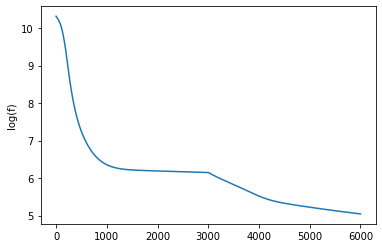

INFO:tensorflow:Assets written to: ./models/model_India_365\assets
4
369


[I 2021-04-08 21:47:52,706] A new study created in memory with name: no-name-52fb50bb-fb54-4e2a-b14a-caefb2dbc0c1
[I 2021-04-08 21:47:52,714] Trial 0 finished with value: 597695164.6256073 and parameters: {'beta': 0.207085854075449, 'gamma': 0.16421789379732843, 'mu': 0.7533890914808029}. Best is trial 0 with value: 597695164.6256073.
[I 2021-04-08 21:47:52,715] Trial 1 finished with value: 597935431.4183507 and parameters: {'beta': 0.05347674781442735, 'gamma': 0.6566501979277564, 'mu': 0.36855567448785465}. Best is trial 0 with value: 597695164.6256073.
[I 2021-04-08 21:47:52,716] Trial 2 finished with value: 597746918.5373988 and parameters: {'beta': 0.14208269999092182, 'gamma': 0.2117666524228139, 'mu': 0.7235972728327342}. Best is trial 0 with value: 597695164.6256073.
[I 2021-04-08 21:47:52,718] Trial 3 finished with value: 597301687.5671474 and parameters: {'beta': 0.7531241578409757, 'gamma': 0.32750199469908803, 'mu': 0.7763556168673298}. Best is trial 3 with value: 597301687

[I 2021-04-08 21:47:52,933] Trial 34 finished with value: 584679551.0346047 and parameters: {'beta': 0.9006599387831622, 'gamma': 0.18970434002562547, 'mu': 0.7030902550618179}. Best is trial 34 with value: 584679551.0346047.
[I 2021-04-08 21:47:52,942] Trial 35 finished with value: 593786118.8289895 and parameters: {'beta': 0.881172694118514, 'gamma': 0.23305313785520956, 'mu': 0.6947214901443233}. Best is trial 34 with value: 584679551.0346047.
[I 2021-04-08 21:47:52,949] Trial 36 finished with value: 596816776.526124 and parameters: {'beta': 0.7241879761375281, 'gamma': 0.16967615662917757, 'mu': 0.759943045878725}. Best is trial 34 with value: 584679551.0346047.
[I 2021-04-08 21:47:52,956] Trial 37 finished with value: 596762622.4215412 and parameters: {'beta': 0.9348168492531663, 'gamma': 0.35061844490002664, 'mu': 0.787689228608309}. Best is trial 34 with value: 584679551.0346047.
[I 2021-04-08 21:47:52,962] Trial 38 finished with value: 592650091.8222027 and parameters: {'beta':

[I 2021-04-08 21:47:53,217] Trial 69 finished with value: 805264296161599.9 and parameters: {'beta': 0.8253558281370924, 'gamma': 0.2540397709105763, 'mu': 0.3467488389601807}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,227] Trial 70 finished with value: 597812743.4068131 and parameters: {'beta': 0.5822654501406123, 'gamma': 0.7509559607756823, 'mu': 0.44413337936360814}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,241] Trial 71 finished with value: 1.3806872194902922e+18 and parameters: {'beta': 0.9679507557752834, 'gamma': 0.057504490324680885, 'mu': 0.07390526523292487}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,251] Trial 72 finished with value: 597454608.7958889 and parameters: {'beta': 0.87583586759666, 'gamma': 0.46459166426792275, 'mu': 0.9521256540436508}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,266] Trial 73 finished with value: 1.2136208623887466e+16 and paramet

[I 2021-04-08 21:47:53,641] Trial 104 finished with value: 15901327458.29469 and parameters: {'beta': 0.819205586509258, 'gamma': 0.3282936759775854, 'mu': 0.37667114731406093}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,649] Trial 105 finished with value: 597056162.0089463 and parameters: {'beta': 0.6219493101586282, 'gamma': 0.30998356598085985, 'mu': 0.47216893901181806}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,658] Trial 106 finished with value: 1333507472.2228518 and parameters: {'beta': 0.7007008229383229, 'gamma': 0.19301908255429984, 'mu': 0.4239451702729193}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,665] Trial 107 finished with value: 1.1069729265314722e+17 and parameters: {'beta': 0.9321592175530686, 'gamma': 0.3617560003622378, 'mu': 0.21455135415181162}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,673] Trial 108 finished with value: 18300654405030.24 and param

[I 2021-04-08 21:47:53,941] Trial 139 finished with value: 592096590.8677089 and parameters: {'beta': 0.9998914751289453, 'gamma': 0.579685562195758, 'mu': 0.4323080372008733}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,950] Trial 140 finished with value: 597418468.762828 and parameters: {'beta': 0.8450378740057718, 'gamma': 0.6205211636726871, 'mu': 0.48436185972956014}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,959] Trial 141 finished with value: 594892751.9411991 and parameters: {'beta': 0.9636057798587616, 'gamma': 0.511342201489936, 'mu': 0.50050434038164}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,967] Trial 142 finished with value: 36635132611892.26 and parameters: {'beta': 0.9387488662069261, 'gamma': 0.2968425706822835, 'mu': 0.454849915613279}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:53,976] Trial 143 finished with value: 594482420.9651817 and parameters: {'beta':

[I 2021-04-08 21:47:54,259] Trial 174 finished with value: 924659926.9599122 and parameters: {'beta': 0.9009129000215864, 'gamma': 0.18728674971980375, 'mu': 0.646255853651253}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,268] Trial 175 finished with value: 596432370.16456 and parameters: {'beta': 0.8085636712558412, 'gamma': 0.2781202542421204, 'mu': 0.6658737492317292}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,278] Trial 176 finished with value: 587763851.9367497 and parameters: {'beta': 0.7832079010220842, 'gamma': 0.2104515731942422, 'mu': 0.5715010367390595}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,287] Trial 177 finished with value: 595664485.8406934 and parameters: {'beta': 0.8388332165086433, 'gamma': 0.23810900204351115, 'mu': 0.6932867300625668}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,297] Trial 178 finished with value: 588467184.5488397 and parameters: {'be

[I 2021-04-08 21:47:54,615] Trial 209 finished with value: 660279865.4483634 and parameters: {'beta': 0.8743062703329898, 'gamma': 0.334461687110811, 'mu': 0.4766830717750003}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,625] Trial 210 finished with value: 596819859.1319051 and parameters: {'beta': 0.47867019999617727, 'gamma': 0.15751116301687065, 'mu': 0.4415145609408683}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,635] Trial 211 finished with value: 588470584.79695 and parameters: {'beta': 0.8589217406477135, 'gamma': 0.26608330227456956, 'mu': 0.5953579299954703}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,646] Trial 212 finished with value: 583885370.6293304 and parameters: {'beta': 0.83697871470373, 'gamma': 0.22214275773448178, 'mu': 0.6018886288629237}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,658] Trial 213 finished with value: 597402696.9729131 and parameters: {'be

[I 2021-04-08 21:47:54,987] Trial 244 finished with value: 590965181.8616757 and parameters: {'beta': 0.8785749593898898, 'gamma': 0.2636809275411681, 'mu': 0.5680226720596966}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:54,997] Trial 245 finished with value: 16073684708.632355 and parameters: {'beta': 0.904890012112612, 'gamma': 0.30531379700273736, 'mu': 0.49061448919927986}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,007] Trial 246 finished with value: 597661772.1609987 and parameters: {'beta': 0.2435702698895586, 'gamma': 0.16992646063629985, 'mu': 0.5457340078407851}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,017] Trial 247 finished with value: 581801551.0802803 and parameters: {'beta': 0.8637242512299539, 'gamma': 0.20209298070549614, 'mu': 0.62436537281433}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,027] Trial 248 finished with value: 1475433822.6160247 and parameters: 

[I 2021-04-08 21:47:55,362] Trial 279 finished with value: 11486203773.338037 and parameters: {'beta': 0.8754474953475512, 'gamma': 0.3466279137377794, 'mu': 0.4200710439897672}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,373] Trial 280 finished with value: 577409232.7429221 and parameters: {'beta': 0.8262980608061086, 'gamma': 0.3128976843221605, 'mu': 0.47867343903319054}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,385] Trial 281 finished with value: 578771621.2506626 and parameters: {'beta': 0.8559769224148324, 'gamma': 0.3285105036434007, 'mu': 0.4835338305499154}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,396] Trial 282 finished with value: 597430102.1512811 and parameters: {'beta': 0.5336543248010862, 'gamma': 0.31476199929543525, 'mu': 0.4826856356077911}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,407] Trial 283 finished with value: 910229830.8372158 and parameters: 

[I 2021-04-08 21:47:55,771] Trial 314 finished with value: 582249357.9432827 and parameters: {'beta': 0.8728423472104263, 'gamma': 0.3492123043590402, 'mu': 0.47560856916091016}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,783] Trial 315 finished with value: 592034272.028788 and parameters: {'beta': 0.808372962342021, 'gamma': 0.3859956658010925, 'mu': 0.4342083991710898}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,795] Trial 316 finished with value: 597602526.3590617 and parameters: {'beta': 0.4308543228584916, 'gamma': 0.3092928692536033, 'mu': 0.49352681698360296}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,807] Trial 317 finished with value: 595604338.0452843 and parameters: {'beta': 0.835483430875142, 'gamma': 0.3687129731441767, 'mu': 0.5367818710273377}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:55,818] Trial 318 finished with value: 586437128.736452 and parameters: {'bet

[I 2021-04-08 21:47:56,202] Trial 349 finished with value: 577757156.5932615 and parameters: {'beta': 0.9102532784776397, 'gamma': 0.36095777528554823, 'mu': 0.5145032322566229}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,218] Trial 350 finished with value: 813739118.4114351 and parameters: {'beta': 0.9386005052211439, 'gamma': 0.3611925217914641, 'mu': 0.5076757837328459}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,232] Trial 351 finished with value: 704203509.7270732 and parameters: {'beta': 0.9192126444083699, 'gamma': 0.3408034534496407, 'mu': 0.5139405263290374}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,246] Trial 352 finished with value: 593030154.637569 and parameters: {'beta': 0.9013808630484431, 'gamma': 0.39299748393213757, 'mu': 0.535029416894707}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,259] Trial 353 finished with value: 587854285.5600961 and parameters: {'b

[I 2021-04-08 21:47:56,700] Trial 384 finished with value: 597283600.5219281 and parameters: {'beta': 0.8599428623110627, 'gamma': 0.5856112914013196, 'mu': 0.49141595643981567}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,715] Trial 385 finished with value: 576915151.0500072 and parameters: {'beta': 0.7981147656944207, 'gamma': 0.32876909560928647, 'mu': 0.4333679327475791}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,729] Trial 386 finished with value: 580738019.7278843 and parameters: {'beta': 0.8068013005986637, 'gamma': 0.32264785665839646, 'mu': 0.43405460668180357}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,743] Trial 387 finished with value: 577606191.1219833 and parameters: {'beta': 0.742862996208469, 'gamma': 0.30029351667955284, 'mu': 0.3914392328991379}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:56,757] Trial 388 finished with value: 591458231.332247 and parameters: 

[I 2021-04-08 21:47:57,203] Trial 419 finished with value: 5675915588.000601 and parameters: {'beta': 0.653050570226042, 'gamma': 0.2662519545993424, 'mu': 0.27667794135387824}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:57,218] Trial 420 finished with value: 577189708.6973914 and parameters: {'beta': 0.6234561439497724, 'gamma': 0.2607939981381133, 'mu': 0.32504337670920364}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:57,233] Trial 421 finished with value: 575309281.1043533 and parameters: {'beta': 0.6162598190915962, 'gamma': 0.2504727303239026, 'mu': 0.3244072600612462}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:57,249] Trial 422 finished with value: 575447851.6902074 and parameters: {'beta': 0.6012724843585225, 'gamma': 0.2459545207428379, 'mu': 0.31394359308266667}. Best is trial 46 with value: 572278128.9175507.
[I 2021-04-08 21:47:57,264] Trial 423 finished with value: 586260377.5992372 and parameters: {

[I 2021-04-08 21:47:57,760] Trial 454 finished with value: 37831494554.29344 and parameters: {'beta': 0.6621811834800732, 'gamma': 0.2320631375570646, 'mu': 0.3029205664086758}. Best is trial 427 with value: 569905323.1565725.
[I 2021-04-08 21:47:57,775] Trial 455 finished with value: 572609376.7633469 and parameters: {'beta': 0.6223467291264095, 'gamma': 0.2528089129460122, 'mu': 0.31952685439107226}. Best is trial 427 with value: 569905323.1565725.
[I 2021-04-08 21:47:57,789] Trial 456 finished with value: 615185750.6054553 and parameters: {'beta': 0.6262569581114688, 'gamma': 0.2225517021886724, 'mu': 0.3366489204637876}. Best is trial 427 with value: 569905323.1565725.
[I 2021-04-08 21:47:57,803] Trial 457 finished with value: 592469763.2458274 and parameters: {'beta': 0.6434918529881107, 'gamma': 0.25984247512019115, 'mu': 0.31941216090096425}. Best is trial 427 with value: 569905323.1565725.
[I 2021-04-08 21:47:57,819] Trial 458 finished with value: 9884273937.246918 and paramete

[I 2021-04-08 21:47:58,375] Trial 489 finished with value: 593153025.5708872 and parameters: {'beta': 0.5984454287438182, 'gamma': 0.22657997196396673, 'mu': 0.3062839120645505}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:58,390] Trial 490 finished with value: 13994592566.899744 and parameters: {'beta': 0.6697956550586532, 'gamma': 0.2910101187019984, 'mu': 0.2581488690646045}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:58,404] Trial 491 finished with value: 572850713.4401553 and parameters: {'beta': 0.582315275499238, 'gamma': 0.2505692616234317, 'mu': 0.28436842075891444}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:58,420] Trial 492 finished with value: 655313314.0345608 and parameters: {'beta': 0.5751849658391106, 'gamma': 0.25003734984499426, 'mu': 0.2461116995992788}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:58,437] Trial 493 finished with value: 580616114.5752639 and parameters: 

[I 2021-04-08 21:47:58,965] Trial 524 finished with value: 836591762.5669235 and parameters: {'beta': 0.6231574946405358, 'gamma': 0.1798070147641311, 'mu': 0.3652537860046479}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:58,991] Trial 525 finished with value: 597811088.3358333 and parameters: {'beta': 0.6499452270014657, 'gamma': 0.7711323920328295, 'mu': 0.3264545523794483}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:59,008] Trial 526 finished with value: 2634560618009.116 and parameters: {'beta': 0.7042029234675866, 'gamma': 0.2348412069642688, 'mu': 0.3003839244613446}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:59,022] Trial 527 finished with value: 737754722.6598017 and parameters: {'beta': 0.6677233572224769, 'gamma': 0.2454472384022089, 'mu': 0.34663179380229947}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:59,036] Trial 528 finished with value: 590378570.9661623 and parameters: {'

[I 2021-04-08 21:47:59,551] Trial 559 finished with value: 41969439158.22058 and parameters: {'beta': 0.5744199909011245, 'gamma': 0.2733248810704071, 'mu': 0.16016145501489287}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:59,570] Trial 560 finished with value: 584350501.9394188 and parameters: {'beta': 0.5484962485709731, 'gamma': 0.22451290927798356, 'mu': 0.29914623342251795}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:59,590] Trial 561 finished with value: 590406806.5451603 and parameters: {'beta': 0.6243484232260396, 'gamma': 0.2591615342249882, 'mu': 0.36329068720846247}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:59,613] Trial 562 finished with value: 1509022684566.0576 and parameters: {'beta': 0.6602015022569631, 'gamma': 0.28561285431558786, 'mu': 0.20342691529503457}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:47:59,630] Trial 563 finished with value: 690968814901269.4 and paramete

[I 2021-04-08 21:48:00,244] Trial 594 finished with value: 593943123.1709253 and parameters: {'beta': 0.4659632198381217, 'gamma': 0.19810197787572958, 'mu': 0.28033828431965474}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:00,261] Trial 595 finished with value: 592569237.3728648 and parameters: {'beta': 0.5185059838098356, 'gamma': 0.22479254556536882, 'mu': 0.29772453589868353}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:00,278] Trial 596 finished with value: 583853260.6825404 and parameters: {'beta': 0.5491025387555699, 'gamma': 0.21395638882163004, 'mu': 0.2683299520646339}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:00,294] Trial 597 finished with value: 597184432.5414695 and parameters: {'beta': 0.4089449517036887, 'gamma': 0.22748347335487062, 'mu': 0.29842826254859317}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:00,311] Trial 598 finished with value: 122873388805.97716 and paramet

[I 2021-04-08 21:48:00,985] Trial 629 finished with value: 573049616.1768293 and parameters: {'beta': 0.5258553857792585, 'gamma': 0.19398370515662197, 'mu': 0.27094284012044273}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,008] Trial 630 finished with value: 3831533057.4710793 and parameters: {'beta': 0.5106739016117487, 'gamma': 0.13683485597423906, 'mu': 0.2671387520988323}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,032] Trial 631 finished with value: 657873489.4220595 and parameters: {'beta': 0.5214460523934277, 'gamma': 0.16916635404430577, 'mu': 0.27584042924253716}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,056] Trial 632 finished with value: 36891565983.51831 and parameters: {'beta': 0.5401477214639641, 'gamma': 0.19100230270776403, 'mu': 0.21537020551190683}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,081] Trial 633 finished with value: 594136415.7360605 and paramet

[I 2021-04-08 21:48:01,767] Trial 664 finished with value: 47907309045.48059 and parameters: {'beta': 0.5629047752772677, 'gamma': 0.19848739225325265, 'mu': 0.22935186361575774}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,784] Trial 665 finished with value: 8987159313.119244 and parameters: {'beta': 0.5441620766218455, 'gamma': 0.1492619399572157, 'mu': 0.2803656837204199}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,803] Trial 666 finished with value: 2046828040.7108924 and parameters: {'beta': 0.5727010156317157, 'gamma': 0.17481124328864847, 'mu': 0.3008677447382014}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,824] Trial 667 finished with value: 580107844.5930796 and parameters: {'beta': 0.5013804972072128, 'gamma': 0.19873080052284608, 'mu': 0.26743147818344526}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:01,845] Trial 668 finished with value: 592228588.383255 and parameters

[I 2021-04-08 21:48:02,404] Trial 699 finished with value: 982170703886.04 and parameters: {'beta': 0.5831291349903943, 'gamma': 0.1492619736935455, 'mu': 0.2727181763905643}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:02,424] Trial 700 finished with value: 219745051356.24966 and parameters: {'beta': 0.6189529923682685, 'gamma': 0.22985804227362452, 'mu': 0.2400816765835788}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:02,443] Trial 701 finished with value: 593400478.2149034 and parameters: {'beta': 0.519096286881932, 'gamma': 0.20713706975070467, 'mu': 0.3244918980370589}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:02,460] Trial 702 finished with value: 592464356.1435235 and parameters: {'beta': 0.5489887238800113, 'gamma': 0.2554215210601648, 'mu': 0.29684395651910267}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:02,478] Trial 703 finished with value: 574113281.0760951 and parameters: {'

[I 2021-04-08 21:48:03,052] Trial 734 finished with value: 33229615151.909805 and parameters: {'beta': 0.5950267558283077, 'gamma': 0.18193347377010755, 'mu': 0.28601837353689374}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:03,067] Trial 735 finished with value: 596012419.8339756 and parameters: {'beta': 0.5114427058306805, 'gamma': 0.24295003101972154, 'mu': 0.31865636597827907}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:03,084] Trial 736 finished with value: 676491470353.0232 and parameters: {'beta': 0.6200052018439064, 'gamma': 0.21485335853679033, 'mu': 0.24558574565189945}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:03,104] Trial 737 finished with value: 596982737.8677088 and parameters: {'beta': 0.46964506394877636, 'gamma': 0.26481801653805376, 'mu': 0.29974146664860185}. Best is trial 481 with value: 569865789.361916.
[I 2021-04-08 21:48:03,124] Trial 738 finished with value: 404897284991.86304 and para

[I 2021-04-08 21:48:03,723] Trial 769 finished with value: 569582425.7904911 and parameters: {'beta': 0.543375020690412, 'gamma': 0.24101628704354564, 'mu': 0.2405706821361555}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:03,746] Trial 770 finished with value: 2363287520.3604665 and parameters: {'beta': 0.5048376012318205, 'gamma': 0.18549589660824248, 'mu': 0.21331400198890244}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:03,769] Trial 771 finished with value: 622437572.2148929 and parameters: {'beta': 0.5429262022226863, 'gamma': 0.23515014544320192, 'mu': 0.23001559742621627}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:03,792] Trial 772 finished with value: 585160815.9699355 and parameters: {'beta': 0.4835503022647366, 'gamma': 0.20994461645891335, 'mu': 0.246867271527297}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:03,812] Trial 773 finished with value: 588890394.8063989 and parame

[I 2021-04-08 21:48:04,424] Trial 803 finished with value: 589767406.6365457 and parameters: {'beta': 0.5600204429432628, 'gamma': 0.25827168450977533, 'mu': 0.2917886875123359}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:04,444] Trial 804 finished with value: 2451995653380.7935 and parameters: {'beta': 0.6288909489683377, 'gamma': 0.24052576582036267, 'mu': 0.21337649181327015}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:04,466] Trial 805 finished with value: 589985360.0712292 and parameters: {'beta': 0.56581713722261, 'gamma': 0.28024173741755015, 'mu': 0.27502996050453304}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:04,486] Trial 806 finished with value: 597550373.5208803 and parameters: {'beta': 0.5966809984900686, 'gamma': 0.3041356252032501, 'mu': 0.9026979675461537}. Best is trial 769 with value: 569582425.7904911.
[I 2021-04-08 21:48:04,506] Trial 807 finished with value: 575914680.0455933 and paramet

[I 2021-04-08 21:48:05,140] Trial 838 finished with value: 5073256045.11248 and parameters: {'beta': 0.6361319051161041, 'gamma': 0.3135679760089759, 'mu': 0.2076929525094417}. Best is trial 837 with value: 569551893.7450424.
[I 2021-04-08 21:48:05,163] Trial 839 finished with value: 84628980431.91493 and parameters: {'beta': 0.620911772850492, 'gamma': 0.29189614219965787, 'mu': 0.1840360653337012}. Best is trial 837 with value: 569551893.7450424.
[I 2021-04-08 21:48:05,185] Trial 840 finished with value: 591832820.6302167 and parameters: {'beta': 0.6149782301093647, 'gamma': 0.31248431756497214, 'mu': 0.2291074438011257}. Best is trial 837 with value: 569551893.7450424.
[I 2021-04-08 21:48:05,205] Trial 841 finished with value: 879733901.7615345 and parameters: {'beta': 0.6008462913837568, 'gamma': 0.2979683404897887, 'mu': 0.21115356717980352}. Best is trial 837 with value: 569551893.7450424.
[I 2021-04-08 21:48:05,228] Trial 842 finished with value: 597147828.440366 and parameters:

[I 2021-04-08 21:48:05,905] Trial 873 finished with value: 568329857.1549574 and parameters: {'beta': 0.5582329406714307, 'gamma': 0.2660876414237244, 'mu': 0.2311663184820938}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:05,930] Trial 874 finished with value: 575283367.5348154 and parameters: {'beta': 0.5335264332149479, 'gamma': 0.3202469931503472, 'mu': 0.16354143423969225}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:05,952] Trial 875 finished with value: 726520038.0902209 and parameters: {'beta': 0.5573365769958646, 'gamma': 0.27298301144166126, 'mu': 0.19580652669252813}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:05,973] Trial 876 finished with value: 597919121.6230161 and parameters: {'beta': 0.0029987543060146504, 'gamma': 0.30162179669808403, 'mu': 0.2206075814005906}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:05,996] Trial 877 finished with value: 592380393.3841153 and para

[I 2021-04-08 21:48:06,738] Trial 908 finished with value: 1333948164.503068 and parameters: {'beta': 0.577926877641172, 'gamma': 0.2296628409890689, 'mu': 0.25328835162112706}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:06,756] Trial 909 finished with value: 646241931.8907588 and parameters: {'beta': 0.542152467170473, 'gamma': 0.23166263667955533, 'mu': 0.23055787541465234}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:06,776] Trial 910 finished with value: 689055140.3771174 and parameters: {'beta': 0.5642927770415617, 'gamma': 0.2254582074122939, 'mu': 0.25878176792726215}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:06,798] Trial 911 finished with value: 578638811.6128654 and parameters: {'beta': 0.5242244702890749, 'gamma': 0.2429767319215135, 'mu': 0.24196170691519447}. Best is trial 873 with value: 568329857.1549574.
[I 2021-04-08 21:48:06,822] Trial 912 finished with value: 2093295351.406132 and paramete

[I 2021-04-08 21:48:07,519] Trial 943 finished with value: 554122358.3236148 and parameters: {'beta': 0.47446110980699596, 'gamma': 0.2745187467142772, 'mu': 0.11775562293931396}. Best is trial 939 with value: 553587015.4811205.
[I 2021-04-08 21:48:07,541] Trial 944 finished with value: 595194225.092706 and parameters: {'beta': 0.40922046814779234, 'gamma': 0.2972264387372164, 'mu': 0.109051296475042}. Best is trial 939 with value: 553587015.4811205.
[I 2021-04-08 21:48:07,564] Trial 945 finished with value: 557536462.7799816 and parameters: {'beta': 0.4583489042216593, 'gamma': 0.277310389280502, 'mu': 0.10969778752119802}. Best is trial 939 with value: 553587015.4811205.
[I 2021-04-08 21:48:07,591] Trial 946 finished with value: 593182005.1448842 and parameters: {'beta': 0.4383769589776691, 'gamma': 0.32443941223857253, 'mu': 0.09316193005751594}. Best is trial 939 with value: 553587015.4811205.
[I 2021-04-08 21:48:07,617] Trial 947 finished with value: 595922061.2165675 and paramete

[I 2021-04-08 21:48:08,320] Trial 977 finished with value: 584117893.4829249 and parameters: {'beta': 0.4539781945459931, 'gamma': 0.347113700164908, 'mu': 0.05374741850386843}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:08,342] Trial 978 finished with value: 594468986.8763835 and parameters: {'beta': 0.42131610189430685, 'gamma': 0.35308860943679843, 'mu': 0.03947779085723347}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:08,365] Trial 979 finished with value: 597006933.0396783 and parameters: {'beta': 0.40211700517213234, 'gamma': 0.36974164596787085, 'mu': 0.021208024313613356}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:08,389] Trial 980 finished with value: 538934399.7177877 and parameters: {'beta': 0.43659106316145047, 'gamma': 0.3372278906797515, 'mu': 0.006331850636027253}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:08,415] Trial 981 finished with value: 555450234.030124 an

[I 2021-04-08 21:48:09,149] Trial 1011 finished with value: 588146587.1943696 and parameters: {'beta': 0.465044596447874, 'gamma': 0.3891277169634974, 'mu': 0.01954540971050786}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:09,171] Trial 1012 finished with value: 593985198.135629 and parameters: {'beta': 0.41147210042586935, 'gamma': 0.36046998624691867, 'mu': 0.0003557474684439503}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:09,194] Trial 1013 finished with value: 593448585.8064797 and parameters: {'beta': 0.43218156161190474, 'gamma': 0.3323108683257757, 'mu': 0.07666017239905568}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:09,220] Trial 1014 finished with value: 571590877.9962895 and parameters: {'beta': 0.4724973131400127, 'gamma': 0.3550730808500789, 'mu': 0.050204068889738086}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:09,246] Trial 1015 finished with value: 568672205.470696

[I 2021-04-08 21:48:09,969] Trial 1045 finished with value: 394602522.4330332 and parameters: {'beta': 0.48372058535628004, 'gamma': 0.32738639645189205, 'mu': 0.02555178709348742}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:09,996] Trial 1046 finished with value: 377362275.9421711 and parameters: {'beta': 0.48336949902472653, 'gamma': 0.3280465817127943, 'mu': 0.025014615300406468}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:10,020] Trial 1047 finished with value: 514927919.22443306 and parameters: {'beta': 0.4859188613751838, 'gamma': 0.3249176205827966, 'mu': 0.030655079496874904}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:10,043] Trial 1048 finished with value: 436060568.057124 and parameters: {'beta': 0.48113504579107846, 'gamma': 0.32451598296770245, 'mu': 0.030584055241941}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:10,070] Trial 1049 finished with value: 496094930.39502

[I 2021-04-08 21:48:10,808] Trial 1079 finished with value: 395843423.9187999 and parameters: {'beta': 0.493834161920753, 'gamma': 0.33481347810304896, 'mu': 0.020714921013926302}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:10,834] Trial 1080 finished with value: 435285269.35520536 and parameters: {'beta': 0.4892512940519775, 'gamma': 0.3301426281509781, 'mu': 0.02425084351108337}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:10,861] Trial 1081 finished with value: 566717735.7821254 and parameters: {'beta': 0.4877271222586643, 'gamma': 0.33693013501460267, 'mu': 0.08492456144003363}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:10,883] Trial 1082 finished with value: 569243601.6792328 and parameters: {'beta': 0.49173725238137256, 'gamma': 0.3724622123823018, 'mu': 0.05028292464789397}. Best is trial 962 with value: 217689754.51914945.
[I 2021-04-08 21:48:10,905] Trial 1083 finished with value: 530098724.121561

[I 2021-04-08 21:48:11,647] Trial 1113 finished with value: 589704771.0747348 and parameters: {'beta': 0.377417886408687, 'gamma': 0.3041795641077713, 'mu': 0.02035428923039081}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:11,674] Trial 1114 finished with value: 506039076.2008017 and parameters: {'beta': 0.43584488537106136, 'gamma': 0.33223706803345476, 'mu': 0.0006878723329788272}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:11,701] Trial 1115 finished with value: 578783141.4966533 and parameters: {'beta': 0.42000356685641477, 'gamma': 0.30842978591241493, 'mu': 0.05114970719659562}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:11,724] Trial 1116 finished with value: 523370229.52500767 and parameters: {'beta': 0.45110599164912085, 'gamma': 0.3358958420053612, 'mu': 0.021780566647989625}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:11,747] Trial 1117 finished with value: 58704288

[I 2021-04-08 21:48:12,504] Trial 1147 finished with value: 591298242.2407763 and parameters: {'beta': 0.4528560733188115, 'gamma': 0.3715642583057998, 'mu': 0.03917400112427316}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:12,527] Trial 1148 finished with value: 548203560.1006496 and parameters: {'beta': 0.42650064134334403, 'gamma': 0.32189700191508613, 'mu': 0.018057572344465152}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:12,551] Trial 1149 finished with value: 474489087.39192325 and parameters: {'beta': 0.443873330368732, 'gamma': 0.29842153722611786, 'mu': 0.04000724994712372}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:12,585] Trial 1150 finished with value: 549483092.9607681 and parameters: {'beta': 0.45507737891148275, 'gamma': 0.34965947514578993, 'mu': 0.019781701576673215}. Best is trial 1092 with value: 166986508.82780412.
[I 2021-04-08 21:48:12,615] Trial 1151 finished with value: 575530752

[I 2021-04-08 21:48:13,373] Trial 1181 finished with value: 559015421.7047809 and parameters: {'beta': 0.4354977340500676, 'gamma': 0.31722226872729636, 'mu': 0.04132801603570649}. Best is trial 1159 with value: 36400650.93320439.
[I 2021-04-08 21:48:13,402] Trial 1182 finished with value: 584166198.6801897 and parameters: {'beta': 0.3884075865134786, 'gamma': 0.31684831754756027, 'mu': 0.0011316811408527995}. Best is trial 1159 with value: 36400650.93320439.
[I 2021-04-08 21:48:13,428] Trial 1183 finished with value: 275924071.10068536 and parameters: {'beta': 0.42695896222825314, 'gamma': 0.29897917920192774, 'mu': 0.0016128914561064239}. Best is trial 1159 with value: 36400650.93320439.
[I 2021-04-08 21:48:13,454] Trial 1184 finished with value: 530163429.3414871 and parameters: {'beta': 0.44146652414416987, 'gamma': 0.3430357879813484, 'mu': 0.0009604158349042699}. Best is trial 1159 with value: 36400650.93320439.
[I 2021-04-08 21:48:13,478] Trial 1185 finished with value: 48263521

[I 2021-04-08 21:48:14,238] Trial 1215 finished with value: 588604876.6175556 and parameters: {'beta': 0.3730369291375066, 'gamma': 0.286954472685748, 'mu': 0.036316560966693515}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:14,264] Trial 1216 finished with value: 215843450.023463 and parameters: {'beta': 0.4192284914410067, 'gamma': 0.2875420822869893, 'mu': 0.0013911612734934127}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:14,292] Trial 1217 finished with value: 520399432.03885394 and parameters: {'beta': 0.385867070536546, 'gamma': 0.28511239847971315, 'mu': 0.0009200983990631718}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:14,322] Trial 1218 finished with value: 429523248.2877668 and parameters: {'beta': 0.41737524235027984, 'gamma': 0.285524169834349, 'mu': 0.02143123734411598}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:14,350] Trial 1219 finished with value: 589260893.82

[I 2021-04-08 21:48:15,112] Trial 1249 finished with value: 559944540.7653499 and parameters: {'beta': 0.38820304598737726, 'gamma': 0.2726852447793771, 'mu': 0.0385705687880395}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:15,140] Trial 1250 finished with value: 598070370.5221779 and parameters: {'beta': 0.3536451999215266, 'gamma': 0.4652821743509187, 'mu': 0.00044167292753032907}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:15,166] Trial 1251 finished with value: 102854495.80784357 and parameters: {'beta': 0.42519874549401016, 'gamma': 0.2750485134378051, 'mu': 5.492600569645056e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:15,197] Trial 1252 finished with value: 492902077.14979774 and parameters: {'beta': 0.39429447603376605, 'gamma': 0.26439710947149725, 'mu': 0.03027072160844407}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:15,224] Trial 1253 finished with value: 338360

[I 2021-04-08 21:48:16,020] Trial 1283 finished with value: 548825106.5269811 and parameters: {'beta': 0.44269188911913643, 'gamma': 0.28505687352567416, 'mu': 0.0006534615368287602}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:16,045] Trial 1284 finished with value: 596500356.7787237 and parameters: {'beta': 0.3437437801977242, 'gamma': 0.30827729528366915, 'mu': 0.0005611692775037736}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:16,071] Trial 1285 finished with value: 691308630.8595614 and parameters: {'beta': 0.42184970686373574, 'gamma': 0.26333056782169734, 'mu': 0.0004932145946618229}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:16,098] Trial 1286 finished with value: 597944102.5455778 and parameters: {'beta': 0.4396737759623101, 'gamma': 0.506863349967462, 'mu': 0.0368493618202439}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:16,123] Trial 1287 finished with value: 5482842

[I 2021-04-08 21:48:16,931] Trial 1317 finished with value: 594112742.2166404 and parameters: {'beta': 0.3157105076075422, 'gamma': 0.2564857130177711, 'mu': 0.020656855828868347}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:16,956] Trial 1318 finished with value: 565226228.9364904 and parameters: {'beta': 0.3632805466465552, 'gamma': 0.2775759373794358, 'mu': 0.0005146366730699589}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:16,986] Trial 1319 finished with value: 40968857.64164768 and parameters: {'beta': 0.394687386571295, 'gamma': 0.24959074175926366, 'mu': 0.00013568115812559564}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:17,010] Trial 1320 finished with value: 571650624.7622224 and parameters: {'beta': 0.3337954962202803, 'gamma': 0.2515218239111139, 'mu': 0.0009914161303679414}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:17,036] Trial 1321 finished with value: 56649722

[I 2021-04-08 21:48:17,874] Trial 1351 finished with value: 592214234.2615136 and parameters: {'beta': 0.3297673709752848, 'gamma': 0.2727720811937107, 'mu': 0.0006079684093792387}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:17,906] Trial 1352 finished with value: 321824913.8479306 and parameters: {'beta': 0.396316616638443, 'gamma': 0.2416274511859267, 'mu': 0.00016959020637292337}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:17,934] Trial 1353 finished with value: 559021759.6388788 and parameters: {'beta': 0.4157406005707173, 'gamma': 0.27397847596555247, 'mu': 0.06865521990413616}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:17,960] Trial 1354 finished with value: 561103761.9835507 and parameters: {'beta': 0.3653905119655414, 'gamma': 0.27733414222839126, 'mu': 0.0011380739417761834}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:17,990] Trial 1355 finished with value: 59552698

[I 2021-04-08 21:48:18,820] Trial 1385 finished with value: 36368656.85577227 and parameters: {'beta': 0.3690408352415585, 'gamma': 0.22327429282498662, 'mu': 0.00039847232434367933}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:18,846] Trial 1386 finished with value: 403130378.15464556 and parameters: {'beta': 0.3386333124859838, 'gamma': 0.22150702990003093, 'mu': 0.00034902615178235253}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:18,871] Trial 1387 finished with value: 335370924.6129239 and parameters: {'beta': 0.36203614340991075, 'gamma': 0.2196529025092177, 'mu': 0.02039869362406672}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:18,896] Trial 1388 finished with value: 539748998.50437 and parameters: {'beta': 0.30547466569722237, 'gamma': 0.20976205964154115, 'mu': 0.000832656434995635}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:18,919] Trial 1389 finished with value: 52167

[I 2021-04-08 21:48:19,784] Trial 1419 finished with value: 575345922.4347049 and parameters: {'beta': 0.34660666212379165, 'gamma': 0.25556699658547977, 'mu': 0.019355216728322317}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:19,810] Trial 1420 finished with value: 493190565.8325977 and parameters: {'beta': 0.37760641864497185, 'gamma': 0.22025441114435704, 'mu': 0.0483179440585216}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:19,837] Trial 1421 finished with value: 592102811.651748 and parameters: {'beta': 0.3258573405975431, 'gamma': 0.26108872168053604, 'mu': 0.016550847887023337}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:19,869] Trial 1422 finished with value: 1798790156.9690773 and parameters: {'beta': 0.3989000720603649, 'gamma': 0.23581431774720762, 'mu': 7.521851286239956e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:19,901] Trial 1423 finished with value: 5683560

[I 2021-04-08 21:48:20,743] Trial 1453 finished with value: 707262867.5345638 and parameters: {'beta': 0.4163151872604929, 'gamma': 0.2513704846943363, 'mu': 0.01901649587772264}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:20,775] Trial 1454 finished with value: 530587093.46530336 and parameters: {'beta': 0.395852322132923, 'gamma': 0.2722433466222559, 'mu': 0.03406541781831351}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:20,804] Trial 1455 finished with value: 832947931.7296464 and parameters: {'beta': 0.42867263235371084, 'gamma': 0.24642409374414107, 'mu': 0.06329408480942168}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:20,833] Trial 1456 finished with value: 368642266.9766642 and parameters: {'beta': 0.40398100203608167, 'gamma': 0.26651021760244364, 'mu': 0.019712551794719212}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:20,860] Trial 1457 finished with value: 283001258.8

[I 2021-04-08 21:48:21,760] Trial 1487 finished with value: 7888591841.630403 and parameters: {'beta': 0.41029923331103246, 'gamma': 0.23733840676662832, 'mu': 0.00041415241376726154}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:21,790] Trial 1488 finished with value: 533117956.46725655 and parameters: {'beta': 0.3747781312154057, 'gamma': 0.27751015501654075, 'mu': 0.0002873317802994934}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:21,817] Trial 1489 finished with value: 443850916.8904559 and parameters: {'beta': 0.39739195551087897, 'gamma': 0.2508436304344564, 'mu': 0.034764740689400116}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:21,847] Trial 1490 finished with value: 82834982634.9431 and parameters: {'beta': 0.4331877147274201, 'gamma': 0.2111023007719693, 'mu': 0.05343310247042012}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:21,883] Trial 1491 finished with value: 577221

[I 2021-04-08 21:48:22,795] Trial 1521 finished with value: 461696945.0564942 and parameters: {'beta': 0.40836316929608313, 'gamma': 0.262308092214035, 'mu': 0.03772626030082012}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:22,825] Trial 1522 finished with value: 562585091.4439067 and parameters: {'beta': 0.335411875715115, 'gamma': 0.23626798591077516, 'mu': 0.019207169819351843}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:22,858] Trial 1523 finished with value: 477199111.5651593 and parameters: {'beta': 0.37054471103359715, 'gamma': 0.26205303382930617, 'mu': 0.0007109895847038125}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:22,890] Trial 1524 finished with value: 91375250857.35275 and parameters: {'beta': 0.3884644138678769, 'gamma': 0.19600863793168188, 'mu': 0.0008534927341989559}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:22,920] Trial 1525 finished with value: 67705375

[I 2021-04-08 21:48:23,816] Trial 1555 finished with value: 5856283344.7918825 and parameters: {'beta': 0.4510933330878397, 'gamma': 0.2542924167485982, 'mu': 0.052341368489743224}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:23,843] Trial 1556 finished with value: 141910397.82669553 and parameters: {'beta': 0.4147934380672965, 'gamma': 0.27913952258000924, 'mu': 0.00010108555130068278}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:23,872] Trial 1557 finished with value: 49839082521.97603 and parameters: {'beta': 0.43369132854199066, 'gamma': 0.19031999662652027, 'mu': 0.08927030329024932}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:23,902] Trial 1558 finished with value: 583393854.4627025 and parameters: {'beta': 0.3194031459980539, 'gamma': 0.24747283370042733, 'mu': 8.326969800275799e-06}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:23,930] Trial 1559 finished with value: 6528

[I 2021-04-08 21:48:24,855] Trial 1589 finished with value: 1179124272.8921437 and parameters: {'beta': 0.4165859458539452, 'gamma': 0.24339751580779362, 'mu': 0.03654653445704915}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:24,887] Trial 1590 finished with value: 568974804.3810481 and parameters: {'beta': 0.3674435394249423, 'gamma': 0.2835757662599699, 'mu': 0.0009192074358788431}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:24,918] Trial 1591 finished with value: 350451513.81755966 and parameters: {'beta': 0.399150695315685, 'gamma': 0.26171485512422565, 'mu': 0.01805741830037293}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:24,952] Trial 1592 finished with value: 303532213077.21625 and parameters: {'beta': 0.4371658393172365, 'gamma': 0.23433379363749068, 'mu': 0.0008287508246221424}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:24,983] Trial 1593 finished with value: 1121118

[I 2021-04-08 21:48:25,932] Trial 1623 finished with value: 513998673.1616924 and parameters: {'beta': 0.31752930158772547, 'gamma': 0.18916834227081974, 'mu': 0.03400425979631381}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:25,968] Trial 1624 finished with value: 290640614.1682455 and parameters: {'beta': 0.3640784919165605, 'gamma': 0.20784322747603345, 'mu': 0.01796111073277259}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:26,000] Trial 1625 finished with value: 22506275333.060913 and parameters: {'beta': 0.38772908400384093, 'gamma': 0.20717551745403537, 'mu': 0.00026489010645427394}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:26,028] Trial 1626 finished with value: 505929614.609178 and parameters: {'beta': 0.3809430171402879, 'gamma': 0.23243880088286864, 'mu': 0.05069894551412725}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:26,059] Trial 1627 finished with value: 5272925

[I 2021-04-08 21:48:27,023] Trial 1657 finished with value: 155880537.72144863 and parameters: {'beta': 0.3794520227100469, 'gamma': 0.2445978047103384, 'mu': 0.00034631547589728743}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:27,057] Trial 1658 finished with value: 529147713.87732303 and parameters: {'beta': 0.35645939183529385, 'gamma': 0.22087608230081385, 'mu': 0.04664363651637316}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:27,090] Trial 1659 finished with value: 341792468.67318135 and parameters: {'beta': 0.398587622814594, 'gamma': 0.24348820714621802, 'mu': 0.0002875261887197994}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:27,125] Trial 1660 finished with value: 362047835.2534107 and parameters: {'beta': 0.33151686836581784, 'gamma': 0.19090667192849364, 'mu': 0.021485606814226205}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:27,158] Trial 1661 finished with value: 597

[I 2021-04-08 21:48:28,139] Trial 1691 finished with value: 590430638.6075503 and parameters: {'beta': 0.3637355356389774, 'gamma': 0.2644147125668348, 'mu': 0.060673030596894564}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:28,179] Trial 1692 finished with value: 311190506.922752 and parameters: {'beta': 0.38408983877047936, 'gamma': 0.22799418175997316, 'mu': 0.019313274816858978}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:28,213] Trial 1693 finished with value: 28666755342.6969 and parameters: {'beta': 0.4574195687193878, 'gamma': 0.27496225461570106, 'mu': 0.0002298672984090552}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:28,252] Trial 1694 finished with value: 816233148.7621071 and parameters: {'beta': 0.40343653073097846, 'gamma': 0.24365113591516854, 'mu': 0.0008960600896561901}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:28,297] Trial 1695 finished with value: 8224410

[I 2021-04-08 21:48:29,354] Trial 1725 finished with value: 499667779510.0132 and parameters: {'beta': 0.42088227176031073, 'gamma': 0.21418598513518905, 'mu': 0.00029241726860605613}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:29,385] Trial 1726 finished with value: 2764053423.61952 and parameters: {'beta': 0.34858065947869193, 'gamma': 0.17354287449168163, 'mu': 0.01850497156430115}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:29,415] Trial 1727 finished with value: 562830866.5755346 and parameters: {'beta': 0.40580406274750913, 'gamma': 0.2926407649353341, 'mu': 0.037638233001948025}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:29,453] Trial 1728 finished with value: 635324004.2712216 and parameters: {'beta': 0.3914580352467314, 'gamma': 0.1936471331251325, 'mu': 0.09628708355167552}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:29,491] Trial 1729 finished with value: 45959865

[I 2021-04-08 21:48:30,496] Trial 1759 finished with value: 2546788245.520179 and parameters: {'beta': 0.3849321429697613, 'gamma': 0.21940602995839364, 'mu': 0.00042064989432506874}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:30,526] Trial 1760 finished with value: 545797961.6618133 and parameters: {'beta': 0.3595644098141628, 'gamma': 0.22964091633376874, 'mu': 0.04759031144018079}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:30,559] Trial 1761 finished with value: 167267103.402619 and parameters: {'beta': 0.33948678903673485, 'gamma': 0.20541250598245647, 'mu': 0.0001475390444812578}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:30,586] Trial 1762 finished with value: 467171888.2717924 and parameters: {'beta': 0.3680703877767608, 'gamma': 0.23168050326194653, 'mu': 0.031379783903788115}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:30,619] Trial 1763 finished with value: 459073

[I 2021-04-08 21:48:31,635] Trial 1793 finished with value: 330250288.97057927 and parameters: {'beta': 0.3882573028241447, 'gamma': 0.23009178390359736, 'mu': 0.017828957055374565}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:31,674] Trial 1794 finished with value: 19326612859350.91 and parameters: {'beta': 0.44158500951251417, 'gamma': 0.17794259181339947, 'mu': 0.03509993217347198}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:31,707] Trial 1795 finished with value: 428727609.9450233 and parameters: {'beta': 0.41683342759000347, 'gamma': 0.2607716202261257, 'mu': 0.00027874381590043854}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:31,740] Trial 1796 finished with value: 587577571.4407147 and parameters: {'beta': 0.3498379068269993, 'gamma': 0.23855251258172386, 'mu': 0.06721616112768104}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:31,778] Trial 1797 finished with value: 406057

[I 2021-04-08 21:48:32,801] Trial 1827 finished with value: 532379380.0783273 and parameters: {'beta': 0.41938432329599273, 'gamma': 0.29217656432474687, 'mu': 0.03878064414613299}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:32,839] Trial 1828 finished with value: 1112091083.619084 and parameters: {'beta': 0.38580881258788624, 'gamma': 0.21445698176427574, 'mu': 0.033044094906247656}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:32,877] Trial 1829 finished with value: 598044112.7251974 and parameters: {'beta': 0.43792491695862823, 'gamma': 0.6680375623188105, 'mu': 0.019164838512170802}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:32,912] Trial 1830 finished with value: 891501376.3475876 and parameters: {'beta': 0.33634109695989445, 'gamma': 0.1526605972770212, 'mu': 0.06381581301653874}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:32,947] Trial 1831 finished with value: 39839981

[I 2021-04-08 21:48:33,963] Trial 1861 finished with value: 887218621.265327 and parameters: {'beta': 0.4637266509229938, 'gamma': 0.2947064013201711, 'mu': 0.033278408799178365}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:33,997] Trial 1862 finished with value: 598067942.2587276 and parameters: {'beta': 0.17476108739939328, 'gamma': 0.27305566315352264, 'mu': 0.001014145927671682}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:34,029] Trial 1863 finished with value: 598067135.5694911 and parameters: {'beta': 0.38093661648817895, 'gamma': 0.4669388034519165, 'mu': 0.0010023968988762072}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:34,065] Trial 1864 finished with value: 62788909632.136765 and parameters: {'beta': 0.4422160362008232, 'gamma': 0.2177071161002789, 'mu': 0.06088091645689351}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:34,101] Trial 1865 finished with value: 593334004

[I 2021-04-08 21:48:35,140] Trial 1895 finished with value: 473108459.3420722 and parameters: {'beta': 0.3275275548058182, 'gamma': 0.20493821441458376, 'mu': 0.018450227174511318}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:35,176] Trial 1896 finished with value: 542505111.8818424 and parameters: {'beta': 0.3430157926220999, 'gamma': 0.18090398631014695, 'mu': 0.03424265764614491}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:35,213] Trial 1897 finished with value: 181097091.87255955 and parameters: {'beta': 0.3393808393656328, 'gamma': 0.18708457913205023, 'mu': 9.494009494011784e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:35,254] Trial 1898 finished with value: 217048517.5947721 and parameters: {'beta': 0.32799445568944696, 'gamma': 0.19706444558468109, 'mu': 2.9788834479609524e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:35,291] Trial 1899 finished with value: 7526

[I 2021-04-08 21:48:36,312] Trial 1929 finished with value: 563651855.8043184 and parameters: {'beta': 0.2986922184126989, 'gamma': 0.17859796256905333, 'mu': 0.046733429856947256}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:36,348] Trial 1930 finished with value: 1823969892.6582127 and parameters: {'beta': 0.3117264794233844, 'gamma': 0.14793637410292929, 'mu': 0.0006569111672327423}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:36,387] Trial 1931 finished with value: 559896893.5421886 and parameters: {'beta': 0.34184913624744173, 'gamma': 0.19429863174983641, 'mu': 0.07576218892601023}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:36,424] Trial 1932 finished with value: 440473044.6658236 and parameters: {'beta': 0.349575452040266, 'gamma': 0.2047854888313968, 'mu': 0.03328071711895144}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:36,454] Trial 1933 finished with value: 320772352

[I 2021-04-08 21:48:37,538] Trial 1963 finished with value: 1459546465.8024728 and parameters: {'beta': 0.35376298118635696, 'gamma': 0.19125633194358388, 'mu': 0.0006219432005864706}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:37,573] Trial 1964 finished with value: 576739144.9234953 and parameters: {'beta': 0.29097784130059057, 'gamma': 0.16676720349980048, 'mu': 0.064157804141723}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:37,605] Trial 1965 finished with value: 3765095203.658495 and parameters: {'beta': 0.3500456321484771, 'gamma': 0.17217008457470126, 'mu': 0.02029212224699738}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:37,639] Trial 1966 finished with value: 597566959.0959288 and parameters: {'beta': 0.37253805671102735, 'gamma': 0.15985909237841114, 'mu': 0.7064555390647906}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:37,672] Trial 1967 finished with value: 565101788

[I 2021-04-08 21:48:39,023] Trial 1997 finished with value: 428157544.1132769 and parameters: {'beta': 0.32156473898982624, 'gamma': 0.20703991904437416, 'mu': 0.00034146832415141523}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:39,084] Trial 1998 finished with value: 91853614.44424905 and parameters: {'beta': 0.35219157218146724, 'gamma': 0.20201043781477196, 'mu': 0.00029958935587103344}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:39,131] Trial 1999 finished with value: 536689378.94364554 and parameters: {'beta': 0.3790042668201165, 'gamma': 0.2281252349798869, 'mu': 0.06541199485843562}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:39,190] Trial 2000 finished with value: 6168645974.360134 and parameters: {'beta': 0.3736873965404446, 'gamma': 0.18008998108880542, 'mu': 0.046212835204683736}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:39,229] Trial 2001 finished with value: 534

[I 2021-04-08 21:48:40,325] Trial 2031 finished with value: 309885295.9607178 and parameters: {'beta': 0.36298920044927363, 'gamma': 0.21612211953807717, 'mu': 0.020732878906370333}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:40,360] Trial 2032 finished with value: 598017866.0657718 and parameters: {'beta': 0.33281316448959347, 'gamma': 0.4375573863120517, 'mu': 0.018384433394179327}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:40,395] Trial 2033 finished with value: 450899856.1679181 and parameters: {'beta': 0.38699230291043957, 'gamma': 0.23917518809504865, 'mu': 0.036572147580108925}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:40,430] Trial 2034 finished with value: 1103587511.9411035 and parameters: {'beta': 0.35465948560802013, 'gamma': 0.1863122063228216, 'mu': 0.018979097745669294}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:40,464] Trial 2035 finished with value: 14369

[I 2021-04-08 21:48:41,565] Trial 2065 finished with value: 587715450.8116496 and parameters: {'beta': 0.287621610955297, 'gamma': 0.221305822755214, 'mu': 0.0003887436222742487}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:41,601] Trial 2066 finished with value: 36242822415.718544 and parameters: {'beta': 0.3803650016391325, 'gamma': 0.18379344226354116, 'mu': 0.020680590254918346}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:41,636] Trial 2067 finished with value: 330862695.1675233 and parameters: {'beta': 0.40113359518715075, 'gamma': 0.2458097575196219, 'mu': 0.00056169193321724}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:41,679] Trial 2068 finished with value: 534977616.22967553 and parameters: {'beta': 0.36410793206227127, 'gamma': 0.1993891664754888, 'mu': 0.051229709931273765}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:41,716] Trial 2069 finished with value: 56558101.

[I 2021-04-08 21:48:42,895] Trial 2099 finished with value: 444115107.1540955 and parameters: {'beta': 0.3725871440043102, 'gamma': 0.2295882051370314, 'mu': 0.03273470444542744}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:42,934] Trial 2100 finished with value: 588739827.0597005 and parameters: {'beta': 0.31297153459992577, 'gamma': 0.24850940017789375, 'mu': 8.011411609747988e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:42,971] Trial 2101 finished with value: 597618371.2777761 and parameters: {'beta': 0.3527274309814841, 'gamma': 0.20905740925420133, 'mu': 0.6541046170774594}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:43,006] Trial 2102 finished with value: 2603328275.8126073 and parameters: {'beta': 0.41561646510927375, 'gamma': 0.23099067812461693, 'mu': 0.044384865926446436}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:43,040] Trial 2103 finished with value: 38036526

[I 2021-04-08 21:48:44,176] Trial 2133 finished with value: 7432824846716.197 and parameters: {'beta': 0.4461825739777701, 'gamma': 0.16992531171924696, 'mu': 0.06852646625366884}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:44,211] Trial 2134 finished with value: 1011625361452510.0 and parameters: {'beta': 0.33400887367851395, 'gamma': 0.03669460732381363, 'mu': 0.019206930360490485}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:44,249] Trial 2135 finished with value: 597626630.570431 and parameters: {'beta': 0.3759743749970734, 'gamma': 0.22519106310152734, 'mu': 0.7357997674215605}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:44,288] Trial 2136 finished with value: 936144902.6898787 and parameters: {'beta': 0.40010938841407856, 'gamma': 0.23993311424943445, 'mu': 0.0006347404503792473}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:44,327] Trial 2137 finished with value: 59731053

[I 2021-04-08 21:48:45,478] Trial 2167 finished with value: 289055632.64508694 and parameters: {'beta': 0.3307132541196527, 'gamma': 0.20409460287352732, 'mu': 0.0008129849545601602}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:45,517] Trial 2168 finished with value: 533694535.2857442 and parameters: {'beta': 0.36229220661852746, 'gamma': 0.25250879311967217, 'mu': 0.018574465188550153}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:45,557] Trial 2169 finished with value: 7130728341.565457 and parameters: {'beta': 0.419673527264477, 'gamma': 0.22513867566058093, 'mu': 0.04554870748451525}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:45,594] Trial 2170 finished with value: 439585056.1017625 and parameters: {'beta': 0.384628178012229, 'gamma': 0.2714359533775448, 'mu': 0.000278028373528541}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:45,632] Trial 2171 finished with value: 418134604

[I 2021-04-08 21:48:46,808] Trial 2201 finished with value: 540816332.6675752 and parameters: {'beta': 0.3277698159047885, 'gamma': 0.21923543811546733, 'mu': 0.019817984647726307}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:46,840] Trial 2202 finished with value: 213402028.73992285 and parameters: {'beta': 0.4106723445787075, 'gamma': 0.2573621294503133, 'mu': 0.0003504014709628013}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:46,879] Trial 2203 finished with value: 8078880418.153792 and parameters: {'beta': 0.35769038092430494, 'gamma': 0.1844352421085801, 'mu': 0.000559276415503245}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:46,919] Trial 2204 finished with value: 632873630.2662176 and parameters: {'beta': 0.3891166090539227, 'gamma': 0.23083092168976613, 'mu': 0.0006570765546782016}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:46,957] Trial 2205 finished with value: 160944

[I 2021-04-08 21:48:48,153] Trial 2235 finished with value: 596425040.2739288 and parameters: {'beta': 0.33648540232739693, 'gamma': 0.28836704715678363, 'mu': 0.03518861419002299}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:48,190] Trial 2236 finished with value: 19662163804.623898 and parameters: {'beta': 0.36829249814042353, 'gamma': 0.1886965063429341, 'mu': 0.00035585815050450444}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:48,224] Trial 2237 finished with value: 655411747.3254359 and parameters: {'beta': 0.4297548364087812, 'gamma': 0.2654321416566679, 'mu': 0.019337409856050973}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:48,257] Trial 2238 finished with value: 1774613302.7448123 and parameters: {'beta': 0.4111443556164465, 'gamma': 0.23480062071613564, 'mu': 0.0344047665537569}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:48,293] Trial 2239 finished with value: 5758462

[I 2021-04-08 21:48:49,547] Trial 2269 finished with value: 559964766.77937 and parameters: {'beta': 0.3723731807832242, 'gamma': 0.2602931545283647, 'mu': 0.03432603673655446}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:49,590] Trial 2270 finished with value: 78193775.77431408 and parameters: {'beta': 0.4408965114956645, 'gamma': 0.30082989588995607, 'mu': 0.0004632176403206795}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:49,626] Trial 2271 finished with value: 24364335205.030922 and parameters: {'beta': 0.39458925729085914, 'gamma': 0.21334945271151323, 'mu': 0.0003304130277430766}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:49,668] Trial 2272 finished with value: 338933470545301.4 and parameters: {'beta': 0.4670204072663242, 'gamma': 0.158136623982301, 'mu': 0.05860701962090633}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:49,714] Trial 2273 finished with value: 591958595.6

[I 2021-04-08 21:48:50,940] Trial 2303 finished with value: 573768395.5404305 and parameters: {'beta': 0.37673623194434713, 'gamma': 0.2850016636433111, 'mu': 0.018574976946660195}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:50,989] Trial 2304 finished with value: 1360619187.356969 and parameters: {'beta': 0.41613886123536303, 'gamma': 0.2539059330738621, 'mu': 0.0007084044486216436}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:51,033] Trial 2305 finished with value: 53461644844782.375 and parameters: {'beta': 0.45904658956173994, 'gamma': 0.20586896905312155, 'mu': 0.000156701110526766}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:51,078] Trial 2306 finished with value: 590798808.1447937 and parameters: {'beta': 0.3482961634340769, 'gamma': 0.26762013111975214, 'mu': 0.03613374361343997}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:51,114] Trial 2307 finished with value: 117162

[I 2021-04-08 21:48:52,330] Trial 2337 finished with value: 597888699.8682392 and parameters: {'beta': 0.39359742244100593, 'gamma': 0.4246713089806198, 'mu': 0.032120428663356376}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:52,368] Trial 2338 finished with value: 596984187.6997627 and parameters: {'beta': 0.31565645548537064, 'gamma': 0.28326755970980083, 'mu': 0.019604518396645818}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:52,404] Trial 2339 finished with value: 347177689.25337243 and parameters: {'beta': 0.3559151397455888, 'gamma': 0.21788268757485044, 'mu': 0.018261169930665375}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:52,442] Trial 2340 finished with value: 519331671.59120095 and parameters: {'beta': 0.37802409498266865, 'gamma': 0.2403592670204221, 'mu': 0.04530747665576399}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:52,485] Trial 2341 finished with value: 187246

[I 2021-04-08 21:48:53,701] Trial 2371 finished with value: 479185961.3536612 and parameters: {'beta': 0.37856870727209985, 'gamma': 0.27061678951881646, 'mu': 0.000302121295001349}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:53,741] Trial 2372 finished with value: 447844856.0201943 and parameters: {'beta': 0.4029496432478892, 'gamma': 0.24664286704894794, 'mu': 0.03345868628100102}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:53,781] Trial 2373 finished with value: 551168289.7043514 and parameters: {'beta': 0.3592716930001274, 'gamma': 0.21333863770577535, 'mu': 0.06817974887210496}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:53,826] Trial 2374 finished with value: 458087769.8541629 and parameters: {'beta': 0.41833295533361325, 'gamma': 0.30746832634837906, 'mu': 0.00020740583280700646}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:53,872] Trial 2375 finished with value: 596117

[I 2021-04-08 21:48:55,147] Trial 2405 finished with value: 593851131.9038781 and parameters: {'beta': 0.3316703671286883, 'gamma': 0.2361982438131681, 'mu': 0.07371745490346887}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:55,193] Trial 2406 finished with value: 276743776.71969926 and parameters: {'beta': 0.39885065009589665, 'gamma': 0.2712470786891596, 'mu': 0.0010676431809799954}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:55,236] Trial 2407 finished with value: 116820687.4629059 and parameters: {'beta': 0.35729781828897844, 'gamma': 0.22001820881953574, 'mu': 0.0001020416744687959}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:55,276] Trial 2408 finished with value: 235863236822.6079 and parameters: {'beta': 0.37728743195529546, 'gamma': 0.15012398054619813, 'mu': 0.045955971302926314}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:55,312] Trial 2409 finished with value: 99813

[I 2021-04-08 21:48:56,601] Trial 2439 finished with value: 32432701993.52955 and parameters: {'beta': 0.49910012443798585, 'gamma': 0.3157182357920214, 'mu': 0.00014159897465362023}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:56,641] Trial 2440 finished with value: 3616720223.9637065 and parameters: {'beta': 0.4741986847927055, 'gamma': 0.3066632252231676, 'mu': 0.00022329356488966226}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:56,684] Trial 2441 finished with value: 1450339195.3474936 and parameters: {'beta': 0.47706269578003874, 'gamma': 0.29768863067826445, 'mu': 0.04543581496052513}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:56,722] Trial 2442 finished with value: 2067091723.1267896 and parameters: {'beta': 0.48905158596651943, 'gamma': 0.31346801585602113, 'mu': 0.02855779754848098}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:56,766] Trial 2443 finished with value: 56

[I 2021-04-08 21:48:58,037] Trial 2473 finished with value: 546090871.5870794 and parameters: {'beta': 0.41174894685135616, 'gamma': 0.31819739677465675, 'mu': 0.0005242594225555524}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:58,082] Trial 2474 finished with value: 560571787207.9954 and parameters: {'beta': 0.40838319275944135, 'gamma': 0.15828830750427803, 'mu': 0.06741748499219108}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:58,131] Trial 2475 finished with value: 21828973583.175907 and parameters: {'beta': 0.45190289802678324, 'gamma': 0.24565532586914834, 'mu': 0.04807266611927751}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:58,172] Trial 2476 finished with value: 596572068.5084085 and parameters: {'beta': 0.31095895017716585, 'gamma': 0.2709721319977016, 'mu': 0.02150293060027878}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:58,212] Trial 2477 finished with value: 502915

[I 2021-04-08 21:48:59,585] Trial 2507 finished with value: 435597185.41628146 and parameters: {'beta': 0.3468690949651406, 'gamma': 0.2197702016221715, 'mu': 0.01745023675423743}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:59,630] Trial 2508 finished with value: 6969974515.574532 and parameters: {'beta': 0.4652954663470396, 'gamma': 0.2690584839149486, 'mu': 0.04878838329644114}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:59,682] Trial 2509 finished with value: 375658511.1791536 and parameters: {'beta': 0.38656775832299156, 'gamma': 0.25358016072626854, 'mu': 0.016438537968749938}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:59,735] Trial 2510 finished with value: 3009274023.890822 and parameters: {'beta': 0.4175535821979866, 'gamma': 0.20340551368227144, 'mu': 0.08647025721599794}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:48:59,782] Trial 2511 finished with value: 14147593079

[I 2021-04-08 21:49:01,309] Trial 2541 finished with value: 12936114944.68272 and parameters: {'beta': 0.432705689510794, 'gamma': 0.2553914906668688, 'mu': 0.0011874037879056145}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:01,364] Trial 2542 finished with value: 51648448.228128254 and parameters: {'beta': 0.3707252883007983, 'gamma': 0.22790004816443996, 'mu': 1.6953336106276273e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:01,414] Trial 2543 finished with value: 479957324.9926395 and parameters: {'beta': 0.4020578967700227, 'gamma': 0.2942729254778443, 'mu': 0.00021598036090447062}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:01,467] Trial 2544 finished with value: 590251481.1663606 and parameters: {'beta': 0.3341436637455811, 'gamma': 0.2043614468873226, 'mu': 0.09862976540918748}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:01,508] Trial 2545 finished with value: 5977732

[I 2021-04-08 21:49:02,877] Trial 2575 finished with value: 518157868.0293156 and parameters: {'beta': 0.34196476632800427, 'gamma': 0.20322806804772534, 'mu': 0.04598590618027014}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:02,925] Trial 2576 finished with value: 247021106.75972822 and parameters: {'beta': 0.44341557841676144, 'gamma': 0.2936729055565809, 'mu': 0.017547109047052836}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:02,968] Trial 2577 finished with value: 484499998.4678814 and parameters: {'beta': 0.3647757466803869, 'gamma': 0.22987773956108484, 'mu': 0.03339579042549948}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:03,011] Trial 2578 finished with value: 5237044052862.005 and parameters: {'beta': 0.5004718903109002, 'gamma': 0.25895566350343624, 'mu': 0.018067321297491733}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:03,059] Trial 2579 finished with value: 43501316

[I 2021-04-08 21:49:04,398] Trial 2609 finished with value: 449388925.1684206 and parameters: {'beta': 0.4443667808013867, 'gamma': 0.28826535332204367, 'mu': 0.03415648836712966}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:04,447] Trial 2610 finished with value: 91142427.6173734 and parameters: {'beta': 0.4188192193630519, 'gamma': 0.27973442229913725, 'mu': 2.9062649337463573e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:04,487] Trial 2611 finished with value: 507277865.4079969 and parameters: {'beta': 0.4705208440527376, 'gamma': 0.3096425745574769, 'mu': 0.048037927448269145}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:04,529] Trial 2612 finished with value: 277552504.2103931 and parameters: {'beta': 0.4252603096949608, 'gamma': 0.27802646563934674, 'mu': 0.018719178364952106}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:04,576] Trial 2613 finished with value: 892507955

[I 2021-04-08 21:49:05,915] Trial 2643 finished with value: 597641381.6948445 and parameters: {'beta': 0.4323364307899213, 'gamma': 0.277902721179578, 'mu': 0.8717004992895083}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:05,967] Trial 2644 finished with value: 525953264.5115816 and parameters: {'beta': 0.41764188649410033, 'gamma': 0.3059888547709887, 'mu': 0.018214756044925732}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:06,009] Trial 2645 finished with value: 292568947.76042587 and parameters: {'beta': 0.4033942837066358, 'gamma': 0.2563295381630812, 'mu': 0.019622591310677374}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:06,049] Trial 2646 finished with value: 553621644.4689445 and parameters: {'beta': 0.3966799911360801, 'gamma': 0.2801052150596527, 'mu': 0.03603057008776959}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:06,096] Trial 2647 finished with value: 374195703.8633

[I 2021-04-08 21:49:07,465] Trial 2677 finished with value: 598071809.6300415 and parameters: {'beta': 0.4279666175586556, 'gamma': 0.9023214144118503, 'mu': 0.00020027436639292684}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:07,505] Trial 2678 finished with value: 556824763.0563312 and parameters: {'beta': 0.4503948508758861, 'gamma': 0.25742243399980813, 'mu': 0.10289182060313848}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:07,548] Trial 2679 finished with value: 594435277.0524293 and parameters: {'beta': 0.37468238051141295, 'gamma': 0.30229191689589263, 'mu': 0.045685096139345745}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:07,599] Trial 2680 finished with value: 288539667.6231415 and parameters: {'beta': 0.40569234421703243, 'gamma': 0.2499721360267272, 'mu': 0.018298738627369655}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:07,645] Trial 2681 finished with value: 5081617

[I 2021-04-08 21:49:08,998] Trial 2711 finished with value: 356237205.1230482 and parameters: {'beta': 0.3972732229464162, 'gamma': 0.26107272196102516, 'mu': 0.017528625117101237}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:09,038] Trial 2712 finished with value: 578577567.4575942 and parameters: {'beta': 0.4137402347341224, 'gamma': 0.2936113884134285, 'mu': 0.06154625560392337}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:09,084] Trial 2713 finished with value: 124499956.52740611 and parameters: {'beta': 0.37298288135295504, 'gamma': 0.22095900331957372, 'mu': 0.0007914658103584221}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:09,126] Trial 2714 finished with value: 102368643894924.44 and parameters: {'beta': 0.4710169971409226, 'gamma': 0.19782133155582238, 'mu': 0.018832649978712673}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:09,172] Trial 2715 finished with value: 699683

[I 2021-04-08 21:49:10,557] Trial 2745 finished with value: 746209796737513.6 and parameters: {'beta': 0.5017625172794171, 'gamma': 0.19888496099470726, 'mu': 2.68724718432698e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:10,600] Trial 2746 finished with value: 631238961.7622929 and parameters: {'beta': 0.40910153534312477, 'gamma': 0.23261999018598478, 'mu': 0.06370866808635095}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:10,648] Trial 2747 finished with value: 121062323681.09108 and parameters: {'beta': 0.3652108910421118, 'gamma': 0.17064910533479, 'mu': 0.0006095823496690611}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:10,697] Trial 2748 finished with value: 22849533932.33815 and parameters: {'beta': 0.44782688810369786, 'gamma': 0.2565412926658931, 'mu': 0.01736950258975906}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:10,749] Trial 2749 finished with value: 597305498.

[I 2021-04-08 21:49:12,211] Trial 2779 finished with value: 15910719026.226986 and parameters: {'beta': 0.3709198142655808, 'gamma': 0.1932189146779623, 'mu': 7.36577315854967e-05}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:12,248] Trial 2780 finished with value: 456676321.25455 and parameters: {'beta': 0.3511633595458745, 'gamma': 0.20598183118612023, 'mu': 0.03625952372548071}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:12,290] Trial 2781 finished with value: 36408219.10520986 and parameters: {'beta': 0.3726596772008285, 'gamma': 0.2283690299184975, 'mu': 0.0006759638286549369}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:12,329] Trial 2782 finished with value: 46123678.24630062 and parameters: {'beta': 0.3767336224520708, 'gamma': 0.22919853672336618, 'mu': 0.00032406447383853963}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:12,370] Trial 2783 finished with value: 598053161

[I 2021-04-08 21:49:13,765] Trial 2813 finished with value: 155131814928.74 and parameters: {'beta': 0.40918333417394526, 'gamma': 0.2122078184910208, 'mu': 0.000858525983974493}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:13,818] Trial 2814 finished with value: 434030716.56250364 and parameters: {'beta': 0.3681438801031528, 'gamma': 0.21673308892999685, 'mu': 0.03434644640832593}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:13,868] Trial 2815 finished with value: 505247112.21887404 and parameters: {'beta': 0.39740001502015265, 'gamma': 0.23790599876715893, 'mu': 0.053530014017083266}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:13,909] Trial 2816 finished with value: 342188920.58114463 and parameters: {'beta': 0.41280959995520494, 'gamma': 0.25486251339843224, 'mu': 0.018942406559947108}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:13,948] Trial 2817 finished with value: 480445

[I 2021-04-08 21:49:15,329] Trial 2847 finished with value: 50871135.776907936 and parameters: {'beta': 0.4260246600837434, 'gamma': 0.27688954662551796, 'mu': 0.0008002641967643088}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:15,371] Trial 2848 finished with value: 308641228.9250785 and parameters: {'beta': 0.3940130970493608, 'gamma': 0.23734558335840322, 'mu': 0.01856940167563132}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:15,421] Trial 2849 finished with value: 580369322.94167 and parameters: {'beta': 0.34464223530288673, 'gamma': 0.258536431460322, 'mu': 0.018834679115860176}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:15,473] Trial 2850 finished with value: 509719073.9381411 and parameters: {'beta': 0.3721950102930164, 'gamma': 0.2108928799512132, 'mu': 0.049630059038128706}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:15,522] Trial 2851 finished with value: 262801783.3

[I 2021-04-08 21:49:16,975] Trial 2881 finished with value: 594741752.8153919 and parameters: {'beta': 0.3252067131137465, 'gamma': 0.26381709406310844, 'mu': 0.03086983968918996}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:17,022] Trial 2882 finished with value: 6161709036.611983 and parameters: {'beta': 0.40276266291010526, 'gamma': 0.22187115021677947, 'mu': 0.017752063054236114}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:17,067] Trial 2883 finished with value: 1498691400.4521012 and parameters: {'beta': 0.36917661058146245, 'gamma': 0.17945970077308582, 'mu': 0.06256153613766345}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:17,115] Trial 2884 finished with value: 398442856820.4343 and parameters: {'beta': 0.4399090110573973, 'gamma': 0.23476623710073422, 'mu': 0.0007211042433258273}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:17,158] Trial 2885 finished with value: 510003

[I 2021-04-08 21:49:18,602] Trial 2915 finished with value: 530847019.3605961 and parameters: {'beta': 0.3568309503431981, 'gamma': 0.24594795293020005, 'mu': 0.018930822803029348}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:18,654] Trial 2916 finished with value: 555635088.9544598 and parameters: {'beta': 0.389923895280165, 'gamma': 0.26518287093034965, 'mu': 0.04693900340851579}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:18,709] Trial 2917 finished with value: 2394630581710.5254 and parameters: {'beta': 0.4495492327633978, 'gamma': 0.22789186777457227, 'mu': 0.000752716022251649}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:18,756] Trial 2918 finished with value: 62327873652.90857 and parameters: {'beta': 0.3737207747448014, 'gamma': 0.17328073539405628, 'mu': 0.018792475545227907}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:18,808] Trial 2919 finished with value: 221875318

[I 2021-04-08 21:49:20,293] Trial 2949 finished with value: 584665612.6269656 and parameters: {'beta': 0.30020940560993004, 'gamma': 0.20971459824785293, 'mu': 0.03284653670584115}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:20,338] Trial 2950 finished with value: 572574855.4470376 and parameters: {'beta': 0.35039249275704876, 'gamma': 0.26903054511199254, 'mu': 0.0003979612337788004}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:20,380] Trial 2951 finished with value: 431189367.3609801 and parameters: {'beta': 0.4399897067158494, 'gamma': 0.30936632751322485, 'mu': 0.020456510795073973}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:20,427] Trial 2952 finished with value: 567695210.3400639 and parameters: {'beta': 0.3696064486208984, 'gamma': 0.24986785522374286, 'mu': 0.04950207837266657}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:20,468] Trial 2953 finished with value: 6815694

[I 2021-04-08 21:49:21,934] Trial 2983 finished with value: 198182610109268.6 and parameters: {'beta': 0.37726226874451285, 'gamma': 0.11072385033757681, 'mu': 0.00027408541281059547}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:21,983] Trial 2984 finished with value: 30180611725189.12 and parameters: {'beta': 0.42622873936105465, 'gamma': 0.17989993593232326, 'mu': 0.00032450357597319434}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:22,024] Trial 2985 finished with value: 493864779.9388311 and parameters: {'beta': 0.4025850216548133, 'gamma': 0.2429152062385932, 'mu': 0.0366167009086888}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:22,070] Trial 2986 finished with value: 590755028.5436153 and parameters: {'beta': 0.3499235313016337, 'gamma': 0.2624047342838086, 'mu': 0.04582916334120461}. Best is trial 1196 with value: 17923330.589924764.
[I 2021-04-08 21:49:22,119] Trial 2987 finished with value: 5757036

Epoch 1/3000
1/1 [==============================] - ETA: 0s - loss: 0.0952 - accuracy: 0.34 - 0s 3ms/step - loss: 0.0952 - accuracy: 0.3452
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.38 - 0s 4ms/step - loss: 0.0881 - accuracy: 0.3836
Epoch 3/3000
1/1 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.44 - 0s 3ms/step - loss: 0.0811 - accuracy: 0.4438
Epoch 4/3000
1/1 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.52 - 0s 5ms/step - loss: 0.0739 - accuracy: 0.5205
Epoch 5/3000
1/1 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.69 - 0s 6ms/step - loss: 0.0667 - accuracy: 0.6904
Epoch 6/3000
1/1 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.89 - 0s 5ms/step - loss: 0.0596 - accuracy: 0.8986
Epoch 7/3000
1/1 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.98 - 0s 5ms/step - loss: 0.0527 - accuracy: 0.9890
Epoch 8/3000
1/1 [==

1/1 [==============================] - ETA: 0s - loss: 5.3295e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 5.3295e-04 - accuracy: 1.0000
Epoch 59/3000
1/1 [==============================] - ETA: 0s - loss: 5.1984e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 5.1984e-04 - accuracy: 1.0000
Epoch 60/3000
1/1 [==============================] - ETA: 0s - loss: 5.0910e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 5.0910e-04 - accuracy: 1.0000
Epoch 61/3000
1/1 [==============================] - ETA: 0s - loss: 5.0000e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0000e-04 - accuracy: 1.0000
Epoch 62/3000
1/1 [==============================] - ETA: 0s - loss: 4.9178e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 4.9178e-04 - accuracy: 1.0000
Epoch 63/3000
1/1 [==============================] - ETA: 0s - loss: 4.8384e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 4.8384e-04 - accuracy: 1.0000
Epoch 64/3000
1/1 [==============================] - ETA: 0s - loss: 4.7580e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 4

Epoch 113/3000
1/1 [==============================] - ETA: 0s - loss: 2.5518e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.5518e-04 - accuracy: 1.0000
Epoch 114/3000
1/1 [==============================] - ETA: 0s - loss: 2.5271e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5271e-04 - accuracy: 1.0000
Epoch 115/3000
1/1 [==============================] - ETA: 0s - loss: 2.5029e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 2.5029e-04 - accuracy: 1.0000
Epoch 116/3000
1/1 [==============================] - ETA: 0s - loss: 2.4790e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.4790e-04 - accuracy: 1.0000
Epoch 117/3000
1/1 [==============================] - ETA: 0s - loss: 2.4554e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 2.4554e-04 - accuracy: 1.0000
Epoch 118/3000
1/1 [==============================] - ETA: 0s - loss: 2.4322e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 2.4322e-04 - accuracy: 1.0000
Epoch 119/3000
1/1 [==============================] - ETA: 0s - loss: 2.4093e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.6043e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6043e-04 - accuracy: 1.0000
Epoch 168/3000
1/1 [==============================] - ETA: 0s - loss: 1.5921e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5921e-04 - accuracy: 1.0000
Epoch 169/3000
1/1 [==============================] - ETA: 0s - loss: 1.5800e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5800e-04 - accuracy: 1.0000
Epoch 170/3000
1/1 [==============================] - ETA: 0s - loss: 1.5681e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5681e-04 - accuracy: 1.0000
Epoch 171/3000
1/1 [==============================] - ETA: 0s - loss: 1.5563e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5563e-04 - accuracy: 1.0000
Epoch 172/3000
1/1 [==============================] - ETA: 0s - loss: 1.5447e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5447e-04 - accuracy: 1.0000
Epoch 173/3000
1/1 [==============================] - ETA: 0s - loss: 1.5332e-04 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 222/3000
1/1 [==============================] - ETA: 0s - loss: 1.0968e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0968e-04 - accuracy: 1.0000
Epoch 223/3000
1/1 [==============================] - ETA: 0s - loss: 1.0899e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0899e-04 - accuracy: 1.0000
Epoch 224/3000
1/1 [==============================] - ETA: 0s - loss: 1.0832e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0832e-04 - accuracy: 1.0000
Epoch 225/3000
1/1 [==============================] - ETA: 0s - loss: 1.0764e-04 - accuracy: 1.00 - 0s 8ms/step - loss: 1.0764e-04 - accuracy: 1.0000
Epoch 226/3000
1/1 [==============================] - ETA: 0s - loss: 1.0698e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0698e-04 - accuracy: 1.0000
Epoch 227/3000
1/1 [==============================] - ETA: 0s - loss: 1.0632e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0632e-04 - accuracy: 1.0000
Epoch 228/3000
1/1 [==============================] - ETA: 0s - loss: 1.0567e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 8.0292e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 8.0292e-05 - accuracy: 1.0000
Epoch 277/3000
1/1 [==============================] - ETA: 0s - loss: 7.9866e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 7.9866e-05 - accuracy: 1.0000
Epoch 278/3000
1/1 [==============================] - ETA: 0s - loss: 7.9443e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 7.9443e-05 - accuracy: 1.0000
Epoch 279/3000
1/1 [==============================] - ETA: 0s - loss: 7.9023e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 7.9023e-05 - accuracy: 1.0000
Epoch 280/3000
1/1 [==============================] - ETA: 0s - loss: 7.8607e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 7.8607e-05 - accuracy: 1.0000
Epoch 281/3000
1/1 [==============================] - ETA: 0s - loss: 7.8194e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 7.8194e-05 - accuracy: 1.0000
Epoch 282/3000
1/1 [==============================] - ETA: 0s - loss: 7.7784e-05 - accuracy: 1.00 - 0s 7ms/step - l

Epoch 331/3000
1/1 [==============================] - ETA: 0s - loss: 6.1099e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 6.1099e-05 - accuracy: 1.0000
Epoch 332/3000
1/1 [==============================] - ETA: 0s - loss: 6.0817e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 6.0817e-05 - accuracy: 1.0000
Epoch 333/3000
1/1 [==============================] - ETA: 0s - loss: 6.0537e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 6.0537e-05 - accuracy: 1.0000
Epoch 334/3000
1/1 [==============================] - ETA: 0s - loss: 6.0258e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 6.0258e-05 - accuracy: 1.0000
Epoch 335/3000
1/1 [==============================] - ETA: 0s - loss: 5.9982e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 5.9982e-05 - accuracy: 1.0000
Epoch 336/3000
1/1 [==============================] - ETA: 0s - loss: 5.9707e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 5.9707e-05 - accuracy: 1.0000
Epoch 337/3000
1/1 [==============================] - ETA: 0s - loss: 5.9435e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 4.8265e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 4.8265e-05 - accuracy: 1.0000
Epoch 386/3000
1/1 [==============================] - ETA: 0s - loss: 4.8066e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 4.8066e-05 - accuracy: 1.0000
Epoch 387/3000
1/1 [==============================] - ETA: 0s - loss: 4.7869e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 4.7869e-05 - accuracy: 1.0000
Epoch 388/3000
1/1 [==============================] - ETA: 0s - loss: 4.7674e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 4.7674e-05 - accuracy: 1.0000
Epoch 389/3000
1/1 [==============================] - ETA: 0s - loss: 4.7479e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 4.7479e-05 - accuracy: 1.0000
Epoch 390/3000
1/1 [==============================] - ETA: 0s - loss: 4.7286e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 4.7286e-05 - accuracy: 1.0000
Epoch 391/3000
1/1 [==============================] - ETA: 0s - loss: 4.7093e-05 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 440/3000
1/1 [==============================] - ETA: 0s - loss: 3.8934e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.8934e-05 - accuracy: 1.0000
Epoch 441/3000
1/1 [==============================] - ETA: 0s - loss: 3.8790e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.8790e-05 - accuracy: 1.0000
Epoch 442/3000
1/1 [==============================] - ETA: 0s - loss: 3.8647e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 3.8647e-05 - accuracy: 1.0000
Epoch 443/3000
1/1 [==============================] - ETA: 0s - loss: 3.8504e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 3.8504e-05 - accuracy: 1.0000
Epoch 444/3000
1/1 [==============================] - ETA: 0s - loss: 3.8363e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 3.8363e-05 - accuracy: 1.0000
Epoch 445/3000
1/1 [==============================] - ETA: 0s - loss: 3.8222e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 3.8222e-05 - accuracy: 1.0000
Epoch 446/3000
1/1 [==============================] - ETA: 0s - loss: 3.8082e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 3.2156e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 3.2156e-05 - accuracy: 1.0000
Epoch 495/3000
1/1 [==============================] - ETA: 0s - loss: 3.2047e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.2047e-05 - accuracy: 1.0000
Epoch 496/3000
1/1 [==============================] - ETA: 0s - loss: 3.1939e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1939e-05 - accuracy: 1.0000
Epoch 497/3000
1/1 [==============================] - ETA: 0s - loss: 3.1831e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 3.1831e-05 - accuracy: 1.0000
Epoch 498/3000
1/1 [==============================] - ETA: 0s - loss: 3.1724e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 3.1724e-05 - accuracy: 1.0000
Epoch 499/3000
1/1 [==============================] - ETA: 0s - loss: 3.1618e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 3.1618e-05 - accuracy: 1.0000
Epoch 500/3000
1/1 [==============================] - ETA: 0s - loss: 3.1512e-05 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 549/3000
1/1 [==============================] - ETA: 0s - loss: 2.6895e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.6895e-05 - accuracy: 1.0000
Epoch 550/3000
1/1 [==============================] - ETA: 0s - loss: 2.6811e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.6811e-05 - accuracy: 1.0000
Epoch 551/3000
1/1 [==============================] - ETA: 0s - loss: 2.6728e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.6728e-05 - accuracy: 1.0000
Epoch 552/3000
1/1 [==============================] - ETA: 0s - loss: 2.6645e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.6645e-05 - accuracy: 1.0000
Epoch 553/3000
1/1 [==============================] - ETA: 0s - loss: 2.6563e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.6563e-05 - accuracy: 1.0000
Epoch 554/3000
1/1 [==============================] - ETA: 0s - loss: 2.6480e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.6480e-05 - accuracy: 1.0000
Epoch 555/3000
1/1 [==============================] - ETA: 0s - loss: 2.6399e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 2.2866e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.2866e-05 - accuracy: 1.0000
Epoch 604/3000
1/1 [==============================] - ETA: 0s - loss: 2.2799e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2799e-05 - accuracy: 1.0000
Epoch 605/3000
1/1 [==============================] - ETA: 0s - loss: 2.2733e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.2733e-05 - accuracy: 1.0000
Epoch 606/3000
1/1 [==============================] - ETA: 0s - loss: 2.2668e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.2668e-05 - accuracy: 1.0000
Epoch 607/3000
1/1 [==============================] - ETA: 0s - loss: 2.2603e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.2603e-05 - accuracy: 1.0000
Epoch 608/3000
1/1 [==============================] - ETA: 0s - loss: 2.2538e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2538e-05 - accuracy: 1.0000
Epoch 609/3000
1/1 [==============================] - ETA: 0s - loss: 2.2473e-05 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 658/3000
1/1 [==============================] - ETA: 0s - loss: 1.9598e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9598e-05 - accuracy: 1.0000
Epoch 659/3000
1/1 [==============================] - ETA: 0s - loss: 1.9545e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9545e-05 - accuracy: 1.0000
Epoch 660/3000
1/1 [==============================] - ETA: 0s - loss: 1.9492e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9492e-05 - accuracy: 1.0000
Epoch 661/3000
1/1 [==============================] - ETA: 0s - loss: 1.9440e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.9440e-05 - accuracy: 1.0000
Epoch 662/3000
1/1 [==============================] - ETA: 0s - loss: 1.9387e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9387e-05 - accuracy: 1.0000
Epoch 663/3000
1/1 [==============================] - ETA: 0s - loss: 1.9335e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9335e-05 - accuracy: 1.0000
Epoch 664/3000
1/1 [==============================] - ETA: 0s - loss: 1.9283e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.7014e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.7014e-05 - accuracy: 1.0000
Epoch 713/3000
1/1 [==============================] - ETA: 0s - loss: 1.6973e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6973e-05 - accuracy: 1.0000
Epoch 714/3000
1/1 [==============================] - ETA: 0s - loss: 1.6926e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6926e-05 - accuracy: 1.0000
Epoch 715/3000
1/1 [==============================] - ETA: 0s - loss: 1.6875e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6875e-05 - accuracy: 1.0000
Epoch 716/3000
1/1 [==============================] - ETA: 0s - loss: 1.6830e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6830e-05 - accuracy: 1.0000
Epoch 717/3000
1/1 [==============================] - ETA: 0s - loss: 1.6792e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6792e-05 - accuracy: 1.0000
Epoch 718/3000
1/1 [==============================] - ETA: 0s - loss: 1.6752e-05 - accuracy: 1.00 - 0s 4ms/step - l

Epoch 767/3000
1/1 [==============================] - ETA: 0s - loss: 1.4831e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4831e-05 - accuracy: 1.0000
Epoch 768/3000
1/1 [==============================] - ETA: 0s - loss: 1.4796e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4796e-05 - accuracy: 1.0000
Epoch 769/3000
1/1 [==============================] - ETA: 0s - loss: 1.4760e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 1.4760e-05 - accuracy: 1.0000
Epoch 770/3000
1/1 [==============================] - ETA: 0s - loss: 1.4724e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4724e-05 - accuracy: 1.0000
Epoch 771/3000
1/1 [==============================] - ETA: 0s - loss: 1.4689e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4689e-05 - accuracy: 1.0000
Epoch 772/3000
1/1 [==============================] - ETA: 0s - loss: 1.4654e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4654e-05 - accuracy: 1.0000
Epoch 773/3000
1/1 [==============================] - ETA: 0s - loss: 1.4618e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.3059e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3059e-05 - accuracy: 1.0000
Epoch 822/3000
1/1 [==============================] - ETA: 0s - loss: 1.3029e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3029e-05 - accuracy: 1.0000
Epoch 823/3000
1/1 [==============================] - ETA: 0s - loss: 1.3000e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3000e-05 - accuracy: 1.0000
Epoch 824/3000
1/1 [==============================] - ETA: 0s - loss: 1.2970e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2970e-05 - accuracy: 1.0000
Epoch 825/3000
1/1 [==============================] - ETA: 0s - loss: 1.2940e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2940e-05 - accuracy: 1.0000
Epoch 826/3000
1/1 [==============================] - ETA: 0s - loss: 1.2911e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2911e-05 - accuracy: 1.0000
Epoch 827/3000
1/1 [==============================] - ETA: 0s - loss: 1.2881e-05 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 876/3000
1/1 [==============================] - ETA: 0s - loss: 1.1543e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1543e-05 - accuracy: 1.0000
Epoch 877/3000
1/1 [==============================] - ETA: 0s - loss: 1.1517e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1517e-05 - accuracy: 1.0000
Epoch 878/3000
1/1 [==============================] - ETA: 0s - loss: 1.1492e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1492e-05 - accuracy: 1.0000
Epoch 879/3000
1/1 [==============================] - ETA: 0s - loss: 1.1468e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1468e-05 - accuracy: 1.0000
Epoch 880/3000
1/1 [==============================] - ETA: 0s - loss: 1.1442e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1442e-05 - accuracy: 1.0000
Epoch 881/3000
1/1 [==============================] - ETA: 0s - loss: 1.1417e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1417e-05 - accuracy: 1.0000
Epoch 882/3000
1/1 [==============================] - ETA: 0s - loss: 1.1392e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.0279e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0279e-05 - accuracy: 1.0000
Epoch 931/3000
1/1 [==============================] - ETA: 0s - loss: 1.0258e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0258e-05 - accuracy: 1.0000
Epoch 932/3000
1/1 [==============================] - ETA: 0s - loss: 1.0236e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0236e-05 - accuracy: 1.0000
Epoch 933/3000
1/1 [==============================] - ETA: 0s - loss: 1.0215e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.0215e-05 - accuracy: 1.0000
Epoch 934/3000
1/1 [==============================] - ETA: 0s - loss: 1.0193e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0193e-05 - accuracy: 1.0000
Epoch 935/3000
1/1 [==============================] - ETA: 0s - loss: 1.0172e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0172e-05 - accuracy: 1.0000
Epoch 936/3000
1/1 [==============================] - ETA: 0s - loss: 1.0151e-05 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 985/3000
1/1 [==============================] - ETA: 0s - loss: 9.1784e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.1784e-06 - accuracy: 1.0000
Epoch 986/3000
1/1 [==============================] - ETA: 0s - loss: 9.1599e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 9.1599e-06 - accuracy: 1.0000
Epoch 987/3000
1/1 [==============================] - ETA: 0s - loss: 9.1414e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.1414e-06 - accuracy: 1.0000
Epoch 988/3000
1/1 [==============================] - ETA: 0s - loss: 9.1230e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 9.1230e-06 - accuracy: 1.0000
Epoch 989/3000
1/1 [==============================] - ETA: 0s - loss: 9.1046e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.1046e-06 - accuracy: 1.0000
Epoch 990/3000
1/1 [==============================] - ETA: 0s - loss: 9.0863e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 9.0863e-06 - accuracy: 1.0000
Epoch 991/3000
1/1 [==============================] - ETA: 0s - loss: 9.0681e-06 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 8.2467e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.2467e-06 - accuracy: 1.0000
Epoch 1040/3000
1/1 [==============================] - ETA: 0s - loss: 8.2316e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 8.2316e-06 - accuracy: 1.0000
Epoch 1041/3000
1/1 [==============================] - ETA: 0s - loss: 8.2169e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 8.2169e-06 - accuracy: 1.0000
Epoch 1042/3000
1/1 [==============================] - ETA: 0s - loss: 8.1997e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 8.1997e-06 - accuracy: 1.0000
Epoch 1043/3000
1/1 [==============================] - ETA: 0s - loss: 8.1827e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 8.1827e-06 - accuracy: 1.0000
Epoch 1044/3000
1/1 [==============================] - ETA: 0s - loss: 8.1679e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.1679e-06 - accuracy: 1.0000
Epoch 1045/3000
1/1 [==============================] - ETA: 0s - loss: 8.1525e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 7.4369e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 7.4369e-06 - accuracy: 1.0000
Epoch 1094/3000
1/1 [==============================] - ETA: 0s - loss: 7.4229e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 7.4229e-06 - accuracy: 1.0000
Epoch 1095/3000
1/1 [==============================] - ETA: 0s - loss: 7.4089e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.4089e-06 - accuracy: 1.0000
Epoch 1096/3000
1/1 [==============================] - ETA: 0s - loss: 7.3950e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 7.3950e-06 - accuracy: 1.0000
Epoch 1097/3000
1/1 [==============================] - ETA: 0s - loss: 7.3812e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 7.3812e-06 - accuracy: 1.0000
Epoch 1098/3000
1/1 [==============================] - ETA: 0s - loss: 7.3673e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 7.3673e-06 - accuracy: 1.0000
Epoch 1099/3000
1/1 [==============================] - ETA: 0s - loss: 7.3535e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 6.7320e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.7320e-06 - accuracy: 1.0000
Epoch 1148/3000
1/1 [==============================] - ETA: 0s - loss: 6.7172e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.7172e-06 - accuracy: 1.0000
Epoch 1149/3000
1/1 [==============================] - ETA: 0s - loss: 6.7052e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.7052e-06 - accuracy: 1.0000
Epoch 1150/3000
1/1 [==============================] - ETA: 0s - loss: 6.6950e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.6950e-06 - accuracy: 1.0000
Epoch 1151/3000
1/1 [==============================] - ETA: 0s - loss: 6.6829e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 6.6829e-06 - accuracy: 1.0000
Epoch 1152/3000
1/1 [==============================] - ETA: 0s - loss: 6.6694e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.6694e-06 - accuracy: 1.0000
Epoch 1153/3000
1/1 [==============================] - ETA: 0s - loss: 6.6581e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 6.1183e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.1183e-06 - accuracy: 1.0000
Epoch 1202/3000
1/1 [==============================] - ETA: 0s - loss: 6.1088e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.1088e-06 - accuracy: 1.0000
Epoch 1203/3000
1/1 [==============================] - ETA: 0s - loss: 6.0944e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 6.0944e-06 - accuracy: 1.0000
Epoch 1204/3000
1/1 [==============================] - ETA: 0s - loss: 6.0774e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.0774e-06 - accuracy: 1.0000
Epoch 1205/3000
1/1 [==============================] - ETA: 0s - loss: 6.0638e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.0638e-06 - accuracy: 1.0000
Epoch 1206/3000
1/1 [==============================] - ETA: 0s - loss: 6.0557e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.0557e-06 - accuracy: 1.0000
Epoch 1207/3000
1/1 [==============================] - ETA: 0s - loss: 6.0484e-06 - accuracy: 1.00 - 0s 4ms/st

1/1 [==============================] - ETA: 0s - loss: 5.5574e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.5574e-06 - accuracy: 1.0000
Epoch 1256/3000
1/1 [==============================] - ETA: 0s - loss: 5.5478e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.5478e-06 - accuracy: 1.0000
Epoch 1257/3000
1/1 [==============================] - ETA: 0s - loss: 5.5383e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.5383e-06 - accuracy: 1.0000
Epoch 1258/3000
1/1 [==============================] - ETA: 0s - loss: 5.5288e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.5288e-06 - accuracy: 1.0000
Epoch 1259/3000
1/1 [==============================] - ETA: 0s - loss: 5.5193e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.5193e-06 - accuracy: 1.0000
Epoch 1260/3000
1/1 [==============================] - ETA: 0s - loss: 5.5098e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.5098e-06 - accuracy: 1.0000
Epoch 1261/3000
1/1 [==============================] - ETA: 0s - loss: 5.5003e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 5.0699e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 5.0699e-06 - accuracy: 1.0000
Epoch 1310/3000
1/1 [==============================] - ETA: 0s - loss: 5.0620e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0620e-06 - accuracy: 1.0000
Epoch 1311/3000
1/1 [==============================] - ETA: 0s - loss: 5.0538e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0538e-06 - accuracy: 1.0000
Epoch 1312/3000
1/1 [==============================] - ETA: 0s - loss: 5.0447e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.0447e-06 - accuracy: 1.0000
Epoch 1313/3000
1/1 [==============================] - ETA: 0s - loss: 5.0359e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0359e-06 - accuracy: 1.0000
Epoch 1314/3000
1/1 [==============================] - ETA: 0s - loss: 5.0278e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0278e-06 - accuracy: 1.0000
Epoch 1315/3000
1/1 [==============================] - ETA: 0s - loss: 5.0197e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 4.6383e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.6383e-06 - accuracy: 1.0000
Epoch 1364/3000
1/1 [==============================] - ETA: 0s - loss: 4.6297e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.6297e-06 - accuracy: 1.0000
Epoch 1365/3000
1/1 [==============================] - ETA: 0s - loss: 4.6205e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.6205e-06 - accuracy: 1.0000
Epoch 1366/3000
1/1 [==============================] - ETA: 0s - loss: 4.6133e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 4.6133e-06 - accuracy: 1.0000
Epoch 1367/3000
1/1 [==============================] - ETA: 0s - loss: 4.6070e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.6070e-06 - accuracy: 1.0000
Epoch 1368/3000
1/1 [==============================] - ETA: 0s - loss: 4.5991e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.5991e-06 - accuracy: 1.0000
Epoch 1369/3000
1/1 [==============================] - ETA: 0s - loss: 4.5905e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 4.2487e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.2487e-06 - accuracy: 1.0000
Epoch 1418/3000
1/1 [==============================] - ETA: 0s - loss: 4.2404e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.2404e-06 - accuracy: 1.0000
Epoch 1419/3000
1/1 [==============================] - ETA: 0s - loss: 4.2344e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.2344e-06 - accuracy: 1.0000
Epoch 1420/3000
1/1 [==============================] - ETA: 0s - loss: 4.2289e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.2289e-06 - accuracy: 1.0000
Epoch 1421/3000
1/1 [==============================] - ETA: 0s - loss: 4.2216e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.2216e-06 - accuracy: 1.0000
Epoch 1422/3000
1/1 [==============================] - ETA: 0s - loss: 4.2135e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.2135e-06 - accuracy: 1.0000
Epoch 1423/3000
1/1 [==============================] - ETA: 0s - loss: 4.2067e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 3.9111e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9111e-06 - accuracy: 1.0000
Epoch 1472/3000
1/1 [==============================] - ETA: 0s - loss: 3.9025e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.9025e-06 - accuracy: 1.0000
Epoch 1473/3000
1/1 [==============================] - ETA: 0s - loss: 3.8910e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.8910e-06 - accuracy: 1.0000
Epoch 1474/3000
1/1 [==============================] - ETA: 0s - loss: 3.8820e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.8820e-06 - accuracy: 1.0000
Epoch 1475/3000
1/1 [==============================] - ETA: 0s - loss: 3.8786e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.8786e-06 - accuracy: 1.0000
Epoch 1476/3000
1/1 [==============================] - ETA: 0s - loss: 3.8784e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.8784e-06 - accuracy: 1.0000
Epoch 1477/3000
1/1 [==============================] - ETA: 0s - loss: 3.8770e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 3.5851e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.5851e-06 - accuracy: 1.0000
Epoch 1526/3000
1/1 [==============================] - ETA: 0s - loss: 3.5799e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.5799e-06 - accuracy: 1.0000
Epoch 1527/3000
1/1 [==============================] - ETA: 0s - loss: 3.5743e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.5743e-06 - accuracy: 1.0000
Epoch 1528/3000
1/1 [==============================] - ETA: 0s - loss: 3.5683e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.5683e-06 - accuracy: 1.0000
Epoch 1529/3000
1/1 [==============================] - ETA: 0s - loss: 3.5628e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.5628e-06 - accuracy: 1.0000
Epoch 1530/3000
1/1 [==============================] - ETA: 0s - loss: 3.5576e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.5576e-06 - accuracy: 1.0000
Epoch 1531/3000
1/1 [==============================] - ETA: 0s - loss: 3.5522e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 3.3088e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.3088e-06 - accuracy: 1.0000
Epoch 1580/3000
1/1 [==============================] - ETA: 0s - loss: 3.3077e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.3077e-06 - accuracy: 1.0000
Epoch 1581/3000
1/1 [==============================] - ETA: 0s - loss: 3.3064e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.3064e-06 - accuracy: 1.0000
Epoch 1582/3000
1/1 [==============================] - ETA: 0s - loss: 3.3001e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.3001e-06 - accuracy: 1.0000
Epoch 1583/3000
1/1 [==============================] - ETA: 0s - loss: 3.2891e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.2891e-06 - accuracy: 1.0000
Epoch 1584/3000
1/1 [==============================] - ETA: 0s - loss: 3.2786e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.2786e-06 - accuracy: 1.0000
Epoch 1585/3000
1/1 [==============================] - ETA: 0s - loss: 3.2732e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 3.0590e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.0590e-06 - accuracy: 1.0000
Epoch 1634/3000
1/1 [==============================] - ETA: 0s - loss: 3.0525e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.0525e-06 - accuracy: 1.0000
Epoch 1635/3000
1/1 [==============================] - ETA: 0s - loss: 3.0418e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.0418e-06 - accuracy: 1.0000
Epoch 1636/3000
1/1 [==============================] - ETA: 0s - loss: 3.0322e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.0322e-06 - accuracy: 1.0000
Epoch 1637/3000
1/1 [==============================] - ETA: 0s - loss: 3.0280e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.0280e-06 - accuracy: 1.0000
Epoch 1638/3000
1/1 [==============================] - ETA: 0s - loss: 3.0273e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.0273e-06 - accuracy: 1.0000
Epoch 1639/3000
1/1 [==============================] - ETA: 0s - loss: 3.0245e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 2.8127e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.8127e-06 - accuracy: 1.0000
Epoch 1688/3000
1/1 [==============================] - ETA: 0s - loss: 2.8079e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8079e-06 - accuracy: 1.0000
Epoch 1689/3000
1/1 [==============================] - ETA: 0s - loss: 2.8044e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.8044e-06 - accuracy: 1.0000
Epoch 1690/3000
1/1 [==============================] - ETA: 0s - loss: 2.8010e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.8010e-06 - accuracy: 1.0000
Epoch 1691/3000
1/1 [==============================] - ETA: 0s - loss: 2.7966e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.7966e-06 - accuracy: 1.0000
Epoch 1692/3000
1/1 [==============================] - ETA: 0s - loss: 2.7919e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.7919e-06 - accuracy: 1.0000
Epoch 1693/3000
1/1 [==============================] - ETA: 0s - loss: 2.7879e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.6045e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.6045e-06 - accuracy: 1.0000
Epoch 1742/3000
1/1 [==============================] - ETA: 0s - loss: 2.6026e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.6026e-06 - accuracy: 1.0000
Epoch 1743/3000
1/1 [==============================] - ETA: 0s - loss: 2.5973e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.5973e-06 - accuracy: 1.0000
Epoch 1744/3000
1/1 [==============================] - ETA: 0s - loss: 2.5909e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.5909e-06 - accuracy: 1.0000
Epoch 1745/3000
1/1 [==============================] - ETA: 0s - loss: 2.5872e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.5872e-06 - accuracy: 1.0000
Epoch 1746/3000
1/1 [==============================] - ETA: 0s - loss: 2.5865e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.5865e-06 - accuracy: 1.0000
Epoch 1747/3000
1/1 [==============================] - ETA: 0s - loss: 2.5861e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 2.4185e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.4185e-06 - accuracy: 1.0000
Epoch 1796/3000
1/1 [==============================] - ETA: 0s - loss: 2.4094e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4094e-06 - accuracy: 1.0000
Epoch 1797/3000
1/1 [==============================] - ETA: 0s - loss: 2.4014e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 2.4014e-06 - accuracy: 1.0000
Epoch 1798/3000
1/1 [==============================] - ETA: 0s - loss: 2.3983e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.3983e-06 - accuracy: 1.0000
Epoch 1799/3000
1/1 [==============================] - ETA: 0s - loss: 2.3984e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.3984e-06 - accuracy: 1.0000
Epoch 1800/3000
1/1 [==============================] - ETA: 0s - loss: 2.3968e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.3968e-06 - accuracy: 1.0000
Epoch 1801/3000
1/1 [==============================] - ETA: 0s - loss: 2.3913e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.2313e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.2313e-06 - accuracy: 1.0000
Epoch 1850/3000
1/1 [==============================] - ETA: 0s - loss: 2.2290e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 2.2290e-06 - accuracy: 1.0000
Epoch 1851/3000
1/1 [==============================] - ETA: 0s - loss: 2.2268e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2268e-06 - accuracy: 1.0000
Epoch 1852/3000
1/1 [==============================] - ETA: 0s - loss: 2.2251e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2251e-06 - accuracy: 1.0000
Epoch 1853/3000
1/1 [==============================] - ETA: 0s - loss: 2.2246e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2246e-06 - accuracy: 1.0000
Epoch 1854/3000
1/1 [==============================] - ETA: 0s - loss: 2.2252e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2252e-06 - accuracy: 1.0000
Epoch 1855/3000
1/1 [==============================] - ETA: 0s - loss: 2.2258e-06 - accuracy: 1.00 - 0s 9ms/st

1/1 [==============================] - ETA: 0s - loss: 2.0701e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0701e-06 - accuracy: 1.0000
Epoch 1904/3000
1/1 [==============================] - ETA: 0s - loss: 2.0696e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0696e-06 - accuracy: 1.0000
Epoch 1905/3000
1/1 [==============================] - ETA: 0s - loss: 2.0665e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0665e-06 - accuracy: 1.0000
Epoch 1906/3000
1/1 [==============================] - ETA: 0s - loss: 2.0613e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0613e-06 - accuracy: 1.0000
Epoch 1907/3000
1/1 [==============================] - ETA: 0s - loss: 2.0573e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0573e-06 - accuracy: 1.0000
Epoch 1908/3000
1/1 [==============================] - ETA: 0s - loss: 2.0555e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0555e-06 - accuracy: 1.0000
Epoch 1909/3000
1/1 [==============================] - ETA: 0s - loss: 2.0539e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 1.9209e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9209e-06 - accuracy: 1.0000
Epoch 1958/3000
1/1 [==============================] - ETA: 0s - loss: 1.9190e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9190e-06 - accuracy: 1.0000
Epoch 1959/3000
1/1 [==============================] - ETA: 0s - loss: 1.9174e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9174e-06 - accuracy: 1.0000
Epoch 1960/3000
1/1 [==============================] - ETA: 0s - loss: 1.9160e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9160e-06 - accuracy: 1.0000
Epoch 1961/3000
1/1 [==============================] - ETA: 0s - loss: 1.9154e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.9154e-06 - accuracy: 1.0000
Epoch 1962/3000
1/1 [==============================] - ETA: 0s - loss: 1.9164e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9164e-06 - accuracy: 1.0000
Epoch 1963/3000
1/1 [==============================] - ETA: 0s - loss: 1.9191e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 1.7858e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7858e-06 - accuracy: 1.0000
Epoch 2012/3000
1/1 [==============================] - ETA: 0s - loss: 1.7854e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.7854e-06 - accuracy: 1.0000
Epoch 2013/3000
1/1 [==============================] - ETA: 0s - loss: 1.7855e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7855e-06 - accuracy: 1.0000
Epoch 2014/3000
1/1 [==============================] - ETA: 0s - loss: 1.7820e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.7820e-06 - accuracy: 1.0000
Epoch 2015/3000
1/1 [==============================] - ETA: 0s - loss: 1.7766e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.7766e-06 - accuracy: 1.0000
Epoch 2016/3000
1/1 [==============================] - ETA: 0s - loss: 1.7733e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7733e-06 - accuracy: 1.0000
Epoch 2017/3000
1/1 [==============================] - ETA: 0s - loss: 1.7725e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 1.6616e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6616e-06 - accuracy: 1.0000
Epoch 2066/3000
1/1 [==============================] - ETA: 0s - loss: 1.6578e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6578e-06 - accuracy: 1.0000
Epoch 2067/3000
1/1 [==============================] - ETA: 0s - loss: 1.6598e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6598e-06 - accuracy: 1.0000
Epoch 2068/3000
1/1 [==============================] - ETA: 0s - loss: 1.6607e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.6607e-06 - accuracy: 1.0000
Epoch 2069/3000
1/1 [==============================] - ETA: 0s - loss: 1.6568e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6568e-06 - accuracy: 1.0000
Epoch 2070/3000
1/1 [==============================] - ETA: 0s - loss: 1.6516e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6516e-06 - accuracy: 1.0000
Epoch 2071/3000
1/1 [==============================] - ETA: 0s - loss: 1.6504e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.5515e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5515e-06 - accuracy: 1.0000
Epoch 2120/3000
1/1 [==============================] - ETA: 0s - loss: 1.5529e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5529e-06 - accuracy: 1.0000
Epoch 2121/3000
1/1 [==============================] - ETA: 0s - loss: 1.5515e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.5515e-06 - accuracy: 1.0000
Epoch 2122/3000
1/1 [==============================] - ETA: 0s - loss: 1.5503e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5503e-06 - accuracy: 1.0000
Epoch 2123/3000
1/1 [==============================] - ETA: 0s - loss: 1.5517e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5517e-06 - accuracy: 1.0000
Epoch 2124/3000
1/1 [==============================] - ETA: 0s - loss: 1.5529e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5529e-06 - accuracy: 1.0000
Epoch 2125/3000
1/1 [==============================] - ETA: 0s - loss: 1.5503e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 1.4491e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4491e-06 - accuracy: 1.0000
Epoch 2174/3000
1/1 [==============================] - ETA: 0s - loss: 1.4387e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4387e-06 - accuracy: 1.0000
Epoch 2175/3000
1/1 [==============================] - ETA: 0s - loss: 1.4358e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4358e-06 - accuracy: 1.0000
Epoch 2176/3000
1/1 [==============================] - ETA: 0s - loss: 1.4384e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4384e-06 - accuracy: 1.0000
Epoch 2177/3000
1/1 [==============================] - ETA: 0s - loss: 1.4399e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4399e-06 - accuracy: 1.0000
Epoch 2178/3000
1/1 [==============================] - ETA: 0s - loss: 1.4372e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4372e-06 - accuracy: 1.0000
Epoch 2179/3000
1/1 [==============================] - ETA: 0s - loss: 1.4335e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.3534e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3534e-06 - accuracy: 1.0000
Epoch 2228/3000
1/1 [==============================] - ETA: 0s - loss: 1.3479e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.3479e-06 - accuracy: 1.0000
Epoch 2229/3000
1/1 [==============================] - ETA: 0s - loss: 1.3455e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3455e-06 - accuracy: 1.0000
Epoch 2230/3000
1/1 [==============================] - ETA: 0s - loss: 1.3471e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3471e-06 - accuracy: 1.0000
Epoch 2231/3000
1/1 [==============================] - ETA: 0s - loss: 1.3488e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3488e-06 - accuracy: 1.0000
Epoch 2232/3000
1/1 [==============================] - ETA: 0s - loss: 1.3450e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3450e-06 - accuracy: 1.0000
Epoch 2233/3000
1/1 [==============================] - ETA: 0s - loss: 1.3361e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.2487e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.2487e-06 - accuracy: 1.0000
Epoch 2282/3000
1/1 [==============================] - ETA: 0s - loss: 1.2475e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2475e-06 - accuracy: 1.0000
Epoch 2283/3000
1/1 [==============================] - ETA: 0s - loss: 1.2475e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2475e-06 - accuracy: 1.0000
Epoch 2284/3000
1/1 [==============================] - ETA: 0s - loss: 1.2485e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2485e-06 - accuracy: 1.0000
Epoch 2285/3000
1/1 [==============================] - ETA: 0s - loss: 1.2505e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2505e-06 - accuracy: 1.0000
Epoch 2286/3000
1/1 [==============================] - ETA: 0s - loss: 1.2544e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.2544e-06 - accuracy: 1.0000
Epoch 2287/3000
1/1 [==============================] - ETA: 0s - loss: 1.2608e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 1.1876e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1876e-06 - accuracy: 1.0000
Epoch 2336/3000
1/1 [==============================] - ETA: 0s - loss: 1.1840e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1840e-06 - accuracy: 1.0000
Epoch 2337/3000
1/1 [==============================] - ETA: 0s - loss: 1.1760e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1760e-06 - accuracy: 1.0000
Epoch 2338/3000
1/1 [==============================] - ETA: 0s - loss: 1.1661e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1661e-06 - accuracy: 1.0000
Epoch 2339/3000
1/1 [==============================] - ETA: 0s - loss: 1.1597e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1597e-06 - accuracy: 1.0000
Epoch 2340/3000
1/1 [==============================] - ETA: 0s - loss: 1.1598e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1598e-06 - accuracy: 1.0000
Epoch 2341/3000
1/1 [==============================] - ETA: 0s - loss: 1.1631e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.1026e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1026e-06 - accuracy: 1.0000
Epoch 2390/3000
1/1 [==============================] - ETA: 0s - loss: 1.1076e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1076e-06 - accuracy: 1.0000
Epoch 2391/3000
1/1 [==============================] - ETA: 0s - loss: 1.1078e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1078e-06 - accuracy: 1.0000
Epoch 2392/3000
1/1 [==============================] - ETA: 0s - loss: 1.1019e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1019e-06 - accuracy: 1.0000
Epoch 2393/3000
1/1 [==============================] - ETA: 0s - loss: 1.0940e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0940e-06 - accuracy: 1.0000
Epoch 2394/3000
1/1 [==============================] - ETA: 0s - loss: 1.0901e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0901e-06 - accuracy: 1.0000
Epoch 2395/3000
1/1 [==============================] - ETA: 0s - loss: 1.0924e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.0247e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.0247e-06 - accuracy: 1.0000
Epoch 2444/3000
1/1 [==============================] - ETA: 0s - loss: 1.0222e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.0222e-06 - accuracy: 1.0000
Epoch 2445/3000
1/1 [==============================] - ETA: 0s - loss: 1.0273e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0273e-06 - accuracy: 1.0000
Epoch 2446/3000
1/1 [==============================] - ETA: 0s - loss: 1.0292e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0292e-06 - accuracy: 1.0000
Epoch 2447/3000
1/1 [==============================] - ETA: 0s - loss: 1.0234e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.0234e-06 - accuracy: 1.0000
Epoch 2448/3000
1/1 [==============================] - ETA: 0s - loss: 1.0154e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.0154e-06 - accuracy: 1.0000
Epoch 2449/3000
1/1 [==============================] - ETA: 0s - loss: 1.0125e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 9.7906e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 9.7906e-07 - accuracy: 1.0000
Epoch 2498/3000
1/1 [==============================] - ETA: 0s - loss: 9.7904e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 9.7904e-07 - accuracy: 1.0000
Epoch 2499/3000
1/1 [==============================] - ETA: 0s - loss: 9.7006e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 9.7006e-07 - accuracy: 1.0000
Epoch 2500/3000
1/1 [==============================] - ETA: 0s - loss: 9.5707e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 9.5707e-07 - accuracy: 1.0000
Epoch 2501/3000
1/1 [==============================] - ETA: 0s - loss: 9.4947e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 9.4947e-07 - accuracy: 1.0000
Epoch 2502/3000
1/1 [==============================] - ETA: 0s - loss: 9.5174e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 9.5174e-07 - accuracy: 1.0000
Epoch 2503/3000
1/1 [==============================] - ETA: 0s - loss: 9.5885e-07 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 9.0146e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 9.0146e-07 - accuracy: 1.0000
Epoch 2552/3000
1/1 [==============================] - ETA: 0s - loss: 8.9263e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 8.9263e-07 - accuracy: 1.0000
Epoch 2553/3000
1/1 [==============================] - ETA: 0s - loss: 8.8576e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 8.8576e-07 - accuracy: 1.0000
Epoch 2554/3000
1/1 [==============================] - ETA: 0s - loss: 8.8488e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 8.8488e-07 - accuracy: 1.0000
Epoch 2555/3000
1/1 [==============================] - ETA: 0s - loss: 8.8787e-07 - accuracy: 1.00 - 0s 10ms/step - loss: 8.8787e-07 - accuracy: 1.0000
Epoch 2556/3000
1/1 [==============================] - ETA: 0s - loss: 8.8932e-07 - accuracy: 1.00 - 0s 8ms/step - loss: 8.8932e-07 - accuracy: 1.0000
Epoch 2557/3000
1/1 [==============================] - ETA: 0s - loss: 8.8649e-07 - accuracy: 1.00 - 0s 7ms/s

1/1 [==============================] - ETA: 0s - loss: 8.4082e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 8.4082e-07 - accuracy: 1.0000
Epoch 2606/3000
1/1 [==============================] - ETA: 0s - loss: 8.4061e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 8.4061e-07 - accuracy: 1.0000
Epoch 2607/3000
1/1 [==============================] - ETA: 0s - loss: 8.3907e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 8.3907e-07 - accuracy: 1.0000
Epoch 2608/3000
1/1 [==============================] - ETA: 0s - loss: 8.3653e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 8.3653e-07 - accuracy: 1.0000
Epoch 2609/3000
1/1 [==============================] - ETA: 0s - loss: 8.3375e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 8.3375e-07 - accuracy: 1.0000
Epoch 2610/3000
1/1 [==============================] - ETA: 0s - loss: 8.3267e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 8.3267e-07 - accuracy: 1.0000
Epoch 2611/3000
1/1 [==============================] - ETA: 0s - loss: 8.3443e-07 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 7.9477e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.9477e-07 - accuracy: 1.0000
Epoch 2660/3000
1/1 [==============================] - ETA: 0s - loss: 7.9235e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.9235e-07 - accuracy: 1.0000
Epoch 2661/3000
1/1 [==============================] - ETA: 0s - loss: 7.8936e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 7.8936e-07 - accuracy: 1.0000
Epoch 2662/3000
1/1 [==============================] - ETA: 0s - loss: 7.8842e-07 - accuracy: 1.00 - 0s 9ms/step - loss: 7.8842e-07 - accuracy: 1.0000
Epoch 2663/3000
1/1 [==============================] - ETA: 0s - loss: 7.8938e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.8938e-07 - accuracy: 1.0000
Epoch 2664/3000
1/1 [==============================] - ETA: 0s - loss: 7.8921e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 7.8921e-07 - accuracy: 1.0000
Epoch 2665/3000
1/1 [==============================] - ETA: 0s - loss: 7.8571e-07 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 7.3067e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 7.3067e-07 - accuracy: 1.0000
Epoch 2714/3000
1/1 [==============================] - ETA: 0s - loss: 7.3512e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 7.3512e-07 - accuracy: 1.0000
Epoch 2715/3000
1/1 [==============================] - ETA: 0s - loss: 7.3550e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 7.3550e-07 - accuracy: 1.0000
Epoch 2716/3000
1/1 [==============================] - ETA: 0s - loss: 7.3204e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 7.3204e-07 - accuracy: 1.0000
Epoch 2717/3000
1/1 [==============================] - ETA: 0s - loss: 7.2811e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 7.2811e-07 - accuracy: 1.0000
Epoch 2718/3000
1/1 [==============================] - ETA: 0s - loss: 7.2702e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 7.2702e-07 - accuracy: 1.0000
Epoch 2719/3000
1/1 [==============================] - ETA: 0s - loss: 7.2928e-07 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 6.9517e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.9517e-07 - accuracy: 1.0000
Epoch 2768/3000
1/1 [==============================] - ETA: 0s - loss: 6.9547e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.9547e-07 - accuracy: 1.0000
Epoch 2769/3000
1/1 [==============================] - ETA: 0s - loss: 7.0101e-07 - accuracy: 1.00 - 0s 9ms/step - loss: 7.0101e-07 - accuracy: 1.0000
Epoch 2770/3000
1/1 [==============================] - ETA: 0s - loss: 7.0206e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 7.0206e-07 - accuracy: 1.0000
Epoch 2771/3000
1/1 [==============================] - ETA: 0s - loss: 6.9564e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.9564e-07 - accuracy: 1.0000
Epoch 2772/3000
1/1 [==============================] - ETA: 0s - loss: 6.8919e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 6.8919e-07 - accuracy: 1.0000
Epoch 2773/3000
1/1 [==============================] - ETA: 0s - loss: 6.9088e-07 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 6.6584e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 6.6584e-07 - accuracy: 1.0000
Epoch 2822/3000
1/1 [==============================] - ETA: 0s - loss: 6.6148e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 6.6148e-07 - accuracy: 1.0000
Epoch 2823/3000
1/1 [==============================] - ETA: 0s - loss: 6.5300e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 6.5300e-07 - accuracy: 1.0000
Epoch 2824/3000
1/1 [==============================] - ETA: 0s - loss: 6.4349e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 6.4349e-07 - accuracy: 1.0000
Epoch 2825/3000
1/1 [==============================] - ETA: 0s - loss: 6.3918e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 6.3918e-07 - accuracy: 1.0000
Epoch 2826/3000
1/1 [==============================] - ETA: 0s - loss: 6.4249e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 6.4249e-07 - accuracy: 1.0000
Epoch 2827/3000
1/1 [==============================] - ETA: 0s - loss: 6.4890e-07 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 6.3334e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.3334e-07 - accuracy: 1.0000
Epoch 2876/3000
1/1 [==============================] - ETA: 0s - loss: 6.3393e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.3393e-07 - accuracy: 1.0000
Epoch 2877/3000
1/1 [==============================] - ETA: 0s - loss: 6.3219e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 6.3219e-07 - accuracy: 1.0000
Epoch 2878/3000
1/1 [==============================] - ETA: 0s - loss: 6.3216e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.3216e-07 - accuracy: 1.0000
Epoch 2879/3000
1/1 [==============================] - ETA: 0s - loss: 6.3455e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.3455e-07 - accuracy: 1.0000
Epoch 2880/3000
1/1 [==============================] - ETA: 0s - loss: 6.3727e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 6.3727e-07 - accuracy: 1.0000
Epoch 2881/3000
1/1 [==============================] - ETA: 0s - loss: 6.3873e-07 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 5.6466e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 5.6466e-07 - accuracy: 1.0000
Epoch 2930/3000
1/1 [==============================] - ETA: 0s - loss: 5.6625e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 5.6625e-07 - accuracy: 1.0000
Epoch 2931/3000
1/1 [==============================] - ETA: 0s - loss: 5.6944e-07 - accuracy: 1.00 - 0s 9ms/step - loss: 5.6944e-07 - accuracy: 1.0000
Epoch 2932/3000
1/1 [==============================] - ETA: 0s - loss: 5.7133e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 5.7133e-07 - accuracy: 1.0000
Epoch 2933/3000
1/1 [==============================] - ETA: 0s - loss: 5.7015e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 5.7015e-07 - accuracy: 1.0000
Epoch 2934/3000
1/1 [==============================] - ETA: 0s - loss: 5.6808e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 5.6808e-07 - accuracy: 1.0000
Epoch 2935/3000
1/1 [==============================] - ETA: 0s - loss: 5.6973e-07 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 5.6349e-07 - accuracy: 1.00 - 0s 8ms/step - loss: 5.6349e-07 - accuracy: 1.0000
Epoch 2984/3000
1/1 [==============================] - ETA: 0s - loss: 5.6491e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 5.6491e-07 - accuracy: 1.0000
Epoch 2985/3000
1/1 [==============================] - ETA: 0s - loss: 5.6292e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 5.6292e-07 - accuracy: 1.0000
Epoch 2986/3000
1/1 [==============================] - ETA: 0s - loss: 5.5667e-07 - accuracy: 1.00 - 0s 5ms/step - loss: 5.5667e-07 - accuracy: 1.0000
Epoch 2987/3000
1/1 [==============================] - ETA: 0s - loss: 5.4749e-07 - accuracy: 1.00 - 0s 6ms/step - loss: 5.4749e-07 - accuracy: 1.0000
Epoch 2988/3000
1/1 [==============================] - ETA: 0s - loss: 5.3842e-07 - accuracy: 1.00 - 0s 7ms/step - loss: 5.3842e-07 - accuracy: 1.0000
Epoch 2989/3000
1/1 [==============================] - ETA: 0s - loss: 5.3208e-07 - accuracy: 1.00 - 0s 6ms/st

Epoch 294 finished
Epoch 295 finished
Epoch 296 finished
Epoch 297 finished
Epoch 298 finished
Epoch 299 finished
Epoch 300 finished
Epoch 301 finished
Epoch 302 finished
Epoch 303 finished
Epoch 304 finished
Epoch 305 finished
Epoch 306 finished
Epoch 307 finished
Epoch 308 finished
Epoch 309 finished
Epoch 310 finished
Epoch 311 finished
Epoch 312 finished
Epoch 313 finished
Epoch 314 finished
Epoch 315 finished
Epoch 316 finished
Epoch 317 finished
Epoch 318 finished
Epoch 319 finished
Epoch 320 finished
Epoch 321 finished
Epoch 322 finished
Epoch 323 finished
Epoch 324 finished
Epoch 325 finished
Epoch 326 finished
Epoch 327 finished
Epoch 328 finished
Epoch 329 finished
Epoch 330 finished
Epoch 331 finished
Epoch 332 finished
Epoch 333 finished
Epoch 334 finished
Epoch 335 finished
Epoch 336 finished
Epoch 337 finished
Epoch 338 finished
Epoch 339 finished
Epoch 340 finished
Epoch 341 finished
Epoch 342 finished
Epoch 343 finished
Epoch 344 finished
Epoch 345 finished
Epoch 346 fi

Epoch 725 finished
Epoch 726 finished
Epoch 727 finished
Epoch 728 finished
Epoch 729 finished
Epoch 730 finished
Epoch 731 finished
Epoch 732 finished
Epoch 733 finished
Epoch 734 finished
Epoch 735 finished
Epoch 736 finished
Epoch 737 finished
Epoch 738 finished
Epoch 739 finished
Epoch 740 finished
Epoch 741 finished
Epoch 742 finished
Epoch 743 finished
Epoch 744 finished
Epoch 745 finished
Epoch 746 finished
Epoch 747 finished
Epoch 748 finished
Epoch 749 finished
Epoch 750 finished
Epoch 751 finished
Epoch 752 finished
Epoch 753 finished
Epoch 754 finished
Epoch 755 finished
Epoch 756 finished
Epoch 757 finished
Epoch 758 finished
Epoch 759 finished
Epoch 760 finished
Epoch 761 finished
Epoch 762 finished
Epoch 763 finished
Epoch 764 finished
Epoch 765 finished
Epoch 766 finished
Epoch 767 finished
Epoch 768 finished
Epoch 769 finished
Epoch 770 finished
Epoch 771 finished
Epoch 772 finished
Epoch 773 finished
Epoch 774 finished
Epoch 775 finished
Epoch 776 finished
Epoch 777 fi

Epoch 1148 finished
Epoch 1149 finished
Epoch 1150 finished
Epoch 1151 finished
Epoch 1152 finished
Epoch 1153 finished
Epoch 1154 finished
Epoch 1155 finished
Epoch 1156 finished
Epoch 1157 finished
Epoch 1158 finished
Epoch 1159 finished
Epoch 1160 finished
Epoch 1161 finished
Epoch 1162 finished
Epoch 1163 finished
Epoch 1164 finished
Epoch 1165 finished
Epoch 1166 finished
Epoch 1167 finished
Epoch 1168 finished
Epoch 1169 finished
Epoch 1170 finished
Epoch 1171 finished
Epoch 1172 finished
Epoch 1173 finished
Epoch 1174 finished
Epoch 1175 finished
Epoch 1176 finished
Epoch 1177 finished
Epoch 1178 finished
Epoch 1179 finished
Epoch 1180 finished
Epoch 1181 finished
Epoch 1182 finished
Epoch 1183 finished
Epoch 1184 finished
Epoch 1185 finished
Epoch 1186 finished
Epoch 1187 finished
Epoch 1188 finished
Epoch 1189 finished
Epoch 1190 finished
Epoch 1191 finished
Epoch 1192 finished
Epoch 1193 finished
Epoch 1194 finished
Epoch 1195 finished
Epoch 1196 finished
Epoch 1197 finished


Epoch 1557 finished
Epoch 1558 finished
Epoch 1559 finished
Epoch 1560 finished
Epoch 1561 finished
Epoch 1562 finished
Epoch 1563 finished
Epoch 1564 finished
Epoch 1565 finished
Epoch 1566 finished
Epoch 1567 finished
Epoch 1568 finished
Epoch 1569 finished
Epoch 1570 finished
Epoch 1571 finished
Epoch 1572 finished
Epoch 1573 finished
Epoch 1574 finished
Epoch 1575 finished
Epoch 1576 finished
Epoch 1577 finished
Epoch 1578 finished
Epoch 1579 finished
Epoch 1580 finished
Epoch 1581 finished
Epoch 1582 finished
Epoch 1583 finished
Epoch 1584 finished
Epoch 1585 finished
Epoch 1586 finished
Epoch 1587 finished
Epoch 1588 finished
Epoch 1589 finished
Epoch 1590 finished
Epoch 1591 finished
Epoch 1592 finished
Epoch 1593 finished
Epoch 1594 finished
Epoch 1595 finished
Epoch 1596 finished
Epoch 1597 finished
Epoch 1598 finished
Epoch 1599 finished
Epoch 1600 finished
Epoch 1601 finished
Epoch 1602 finished
Epoch 1603 finished
Epoch 1604 finished
Epoch 1605 finished
Epoch 1606 finished


Epoch 1966 finished
Epoch 1967 finished
Epoch 1968 finished
Epoch 1969 finished
Epoch 1970 finished
Epoch 1971 finished
Epoch 1972 finished
Epoch 1973 finished
Epoch 1974 finished
Epoch 1975 finished
Epoch 1976 finished
Epoch 1977 finished
Epoch 1978 finished
Epoch 1979 finished
Epoch 1980 finished
Epoch 1981 finished
Epoch 1982 finished
Epoch 1983 finished
Epoch 1984 finished
Epoch 1985 finished
Epoch 1986 finished
Epoch 1987 finished
Epoch 1988 finished
Epoch 1989 finished
Epoch 1990 finished
Epoch 1991 finished
Epoch 1992 finished
Epoch 1993 finished
Epoch 1994 finished
Epoch 1995 finished
Epoch 1996 finished
Epoch 1997 finished
Epoch 1998 finished
Epoch 1999 finished
Epoch 2000 finished
Epoch 2001 finished
Epoch 2002 finished
Epoch 2003 finished
Epoch 2004 finished
Epoch 2005 finished
Epoch 2006 finished
Epoch 2007 finished
Epoch 2008 finished
Epoch 2009 finished
Epoch 2010 finished
Epoch 2011 finished
Epoch 2012 finished
Epoch 2013 finished
Epoch 2014 finished
Epoch 2015 finished


Epoch 2375 finished
Epoch 2376 finished
Epoch 2377 finished
Epoch 2378 finished
Epoch 2379 finished
Epoch 2380 finished
Epoch 2381 finished
Epoch 2382 finished
Epoch 2383 finished
Epoch 2384 finished
Epoch 2385 finished
Epoch 2386 finished
Epoch 2387 finished
Epoch 2388 finished
Epoch 2389 finished
Epoch 2390 finished
Epoch 2391 finished
Epoch 2392 finished
Epoch 2393 finished
Epoch 2394 finished
Epoch 2395 finished
Epoch 2396 finished
Epoch 2397 finished
Epoch 2398 finished
Epoch 2399 finished
Epoch 2400 finished
Epoch 2401 finished
Epoch 2402 finished
Epoch 2403 finished
Epoch 2404 finished
Epoch 2405 finished
Epoch 2406 finished
Epoch 2407 finished
Epoch 2408 finished
Epoch 2409 finished
Epoch 2410 finished
Epoch 2411 finished
Epoch 2412 finished
Epoch 2413 finished
Epoch 2414 finished
Epoch 2415 finished
Epoch 2416 finished
Epoch 2417 finished
Epoch 2418 finished
Epoch 2419 finished
Epoch 2420 finished
Epoch 2421 finished
Epoch 2422 finished
Epoch 2423 finished
Epoch 2424 finished


Epoch 2784 finished
Epoch 2785 finished
Epoch 2786 finished
Epoch 2787 finished
Epoch 2788 finished
Epoch 2789 finished
Epoch 2790 finished
Epoch 2791 finished
Epoch 2792 finished
Epoch 2793 finished
Epoch 2794 finished
Epoch 2795 finished
Epoch 2796 finished
Epoch 2797 finished
Epoch 2798 finished
Epoch 2799 finished
Epoch 2800 finished
Epoch 2801 finished
Epoch 2802 finished
Epoch 2803 finished
Epoch 2804 finished
Epoch 2805 finished
Epoch 2806 finished
Epoch 2807 finished
Epoch 2808 finished
Epoch 2809 finished
Epoch 2810 finished
Epoch 2811 finished
Epoch 2812 finished
Epoch 2813 finished
Epoch 2814 finished
Epoch 2815 finished
Epoch 2816 finished
Epoch 2817 finished
Epoch 2818 finished
Epoch 2819 finished
Epoch 2820 finished
Epoch 2821 finished
Epoch 2822 finished
Epoch 2823 finished
Epoch 2824 finished
Epoch 2825 finished
Epoch 2826 finished
Epoch 2827 finished
Epoch 2828 finished
Epoch 2829 finished
Epoch 2830 finished
Epoch 2831 finished
Epoch 2832 finished
Epoch 2833 finished


Epoch 209 finished
Epoch 210 finished
Epoch 211 finished
Epoch 212 finished
Epoch 213 finished
Epoch 214 finished
Epoch 215 finished
Epoch 216 finished
Epoch 217 finished
Epoch 218 finished
Epoch 219 finished
Epoch 220 finished
Epoch 221 finished
Epoch 222 finished
Epoch 223 finished
Epoch 224 finished
Epoch 225 finished
Epoch 226 finished
Epoch 227 finished
Epoch 228 finished
Epoch 229 finished
Epoch 230 finished
Epoch 231 finished
Epoch 232 finished
Epoch 233 finished
Epoch 234 finished
Epoch 235 finished
Epoch 236 finished
Epoch 237 finished
Epoch 238 finished
Epoch 239 finished
Epoch 240 finished
Epoch 241 finished
Epoch 242 finished
Epoch 243 finished
Epoch 244 finished
Epoch 245 finished
Epoch 246 finished
Epoch 247 finished
Epoch 248 finished
Epoch 249 finished
Epoch 250 finished
Epoch 251 finished
Epoch 252 finished
Epoch 253 finished
Epoch 254 finished
Epoch 255 finished
Epoch 256 finished
Epoch 257 finished
Epoch 258 finished
Epoch 259 finished
Epoch 260 finished
Epoch 261 fi

Epoch 640 finished
Epoch 641 finished
Epoch 642 finished
Epoch 643 finished
Epoch 644 finished
Epoch 645 finished
Epoch 646 finished
Epoch 647 finished
Epoch 648 finished
Epoch 649 finished
Epoch 650 finished
Epoch 651 finished
Epoch 652 finished
Epoch 653 finished
Epoch 654 finished
Epoch 655 finished
Epoch 656 finished
Epoch 657 finished
Epoch 658 finished
Epoch 659 finished
Epoch 660 finished
Epoch 661 finished
Epoch 662 finished
Epoch 663 finished
Epoch 664 finished
Epoch 665 finished
Epoch 666 finished
Epoch 667 finished
Epoch 668 finished
Epoch 669 finished
Epoch 670 finished
Epoch 671 finished
Epoch 672 finished
Epoch 673 finished
Epoch 674 finished
Epoch 675 finished
Epoch 676 finished
Epoch 677 finished
Epoch 678 finished
Epoch 679 finished
Epoch 680 finished
Epoch 681 finished
Epoch 682 finished
Epoch 683 finished
Epoch 684 finished
Epoch 685 finished
Epoch 686 finished
Epoch 687 finished
Epoch 688 finished
Epoch 689 finished
Epoch 690 finished
Epoch 691 finished
Epoch 692 fi

Epoch 1067 finished
Epoch 1068 finished
Epoch 1069 finished
Epoch 1070 finished
Epoch 1071 finished
Epoch 1072 finished
Epoch 1073 finished
Epoch 1074 finished
Epoch 1075 finished
Epoch 1076 finished
Epoch 1077 finished
Epoch 1078 finished
Epoch 1079 finished
Epoch 1080 finished
Epoch 1081 finished
Epoch 1082 finished
Epoch 1083 finished
Epoch 1084 finished
Epoch 1085 finished
Epoch 1086 finished
Epoch 1087 finished
Epoch 1088 finished
Epoch 1089 finished
Epoch 1090 finished
Epoch 1091 finished
Epoch 1092 finished
Epoch 1093 finished
Epoch 1094 finished
Epoch 1095 finished
Epoch 1096 finished
Epoch 1097 finished
Epoch 1098 finished
Epoch 1099 finished
Epoch 1100 finished
Epoch 1101 finished
Epoch 1102 finished
Epoch 1103 finished
Epoch 1104 finished
Epoch 1105 finished
Epoch 1106 finished
Epoch 1107 finished
Epoch 1108 finished
Epoch 1109 finished
Epoch 1110 finished
Epoch 1111 finished
Epoch 1112 finished
Epoch 1113 finished
Epoch 1114 finished
Epoch 1115 finished
Epoch 1116 finished


Epoch 1476 finished
Epoch 1477 finished
Epoch 1478 finished
Epoch 1479 finished
Epoch 1480 finished
Epoch 1481 finished
Epoch 1482 finished
Epoch 1483 finished
Epoch 1484 finished
Epoch 1485 finished
Epoch 1486 finished
Epoch 1487 finished
Epoch 1488 finished
Epoch 1489 finished
Epoch 1490 finished
Epoch 1491 finished
Epoch 1492 finished
Epoch 1493 finished
Epoch 1494 finished
Epoch 1495 finished
Epoch 1496 finished
Epoch 1497 finished
Epoch 1498 finished
Epoch 1499 finished
Epoch 1500 finished
Epoch 1501 finished
Epoch 1502 finished
Epoch 1503 finished
Epoch 1504 finished
Epoch 1505 finished
Epoch 1506 finished
Epoch 1507 finished
Epoch 1508 finished
Epoch 1509 finished
Epoch 1510 finished
Epoch 1511 finished
Epoch 1512 finished
Epoch 1513 finished
Epoch 1514 finished
Epoch 1515 finished
Epoch 1516 finished
Epoch 1517 finished
Epoch 1518 finished
Epoch 1519 finished
Epoch 1520 finished
Epoch 1521 finished
Epoch 1522 finished
Epoch 1523 finished
Epoch 1524 finished
Epoch 1525 finished


Epoch 1885 finished
Epoch 1886 finished
Epoch 1887 finished
Epoch 1888 finished
Epoch 1889 finished
Epoch 1890 finished
Epoch 1891 finished
Epoch 1892 finished
Epoch 1893 finished
Epoch 1894 finished
Epoch 1895 finished
Epoch 1896 finished
Epoch 1897 finished
Epoch 1898 finished
Epoch 1899 finished
Epoch 1900 finished
Epoch 1901 finished
Epoch 1902 finished
Epoch 1903 finished
Epoch 1904 finished
Epoch 1905 finished
Epoch 1906 finished
Epoch 1907 finished
Epoch 1908 finished
Epoch 1909 finished
Epoch 1910 finished
Epoch 1911 finished
Epoch 1912 finished
Epoch 1913 finished
Epoch 1914 finished
Epoch 1915 finished
Epoch 1916 finished
Epoch 1917 finished
Epoch 1918 finished
Epoch 1919 finished
Epoch 1920 finished
Epoch 1921 finished
Epoch 1922 finished
Epoch 1923 finished
Epoch 1924 finished
Epoch 1925 finished
Epoch 1926 finished
Epoch 1927 finished
Epoch 1928 finished
Epoch 1929 finished
Epoch 1930 finished
Epoch 1931 finished
Epoch 1932 finished
Epoch 1933 finished
Epoch 1934 finished


Epoch 2294 finished
Epoch 2295 finished
Epoch 2296 finished
Epoch 2297 finished
Epoch 2298 finished
Epoch 2299 finished
Epoch 2300 finished
Epoch 2301 finished
Epoch 2302 finished
Epoch 2303 finished
Epoch 2304 finished
Epoch 2305 finished
Epoch 2306 finished
Epoch 2307 finished
Epoch 2308 finished
Epoch 2309 finished
Epoch 2310 finished
Epoch 2311 finished
Epoch 2312 finished
Epoch 2313 finished
Epoch 2314 finished
Epoch 2315 finished
Epoch 2316 finished
Epoch 2317 finished
Epoch 2318 finished
Epoch 2319 finished
Epoch 2320 finished
Epoch 2321 finished
Epoch 2322 finished
Epoch 2323 finished
Epoch 2324 finished
Epoch 2325 finished
Epoch 2326 finished
Epoch 2327 finished
Epoch 2328 finished
Epoch 2329 finished
Epoch 2330 finished
Epoch 2331 finished
Epoch 2332 finished
Epoch 2333 finished
Epoch 2334 finished
Epoch 2335 finished
Epoch 2336 finished
Epoch 2337 finished
Epoch 2338 finished
Epoch 2339 finished
Epoch 2340 finished
Epoch 2341 finished
Epoch 2342 finished
Epoch 2343 finished


Epoch 2703 finished
Epoch 2704 finished
Epoch 2705 finished
Epoch 2706 finished
Epoch 2707 finished
Epoch 2708 finished
Epoch 2709 finished
Epoch 2710 finished
Epoch 2711 finished
Epoch 2712 finished
Epoch 2713 finished
Epoch 2714 finished
Epoch 2715 finished
Epoch 2716 finished
Epoch 2717 finished
Epoch 2718 finished
Epoch 2719 finished
Epoch 2720 finished
Epoch 2721 finished
Epoch 2722 finished
Epoch 2723 finished
Epoch 2724 finished
Epoch 2725 finished
Epoch 2726 finished
Epoch 2727 finished
Epoch 2728 finished
Epoch 2729 finished
Epoch 2730 finished
Epoch 2731 finished
Epoch 2732 finished
Epoch 2733 finished
Epoch 2734 finished
Epoch 2735 finished
Epoch 2736 finished
Epoch 2737 finished
Epoch 2738 finished
Epoch 2739 finished
Epoch 2740 finished
Epoch 2741 finished
Epoch 2742 finished
Epoch 2743 finished
Epoch 2744 finished
Epoch 2745 finished
Epoch 2746 finished
Epoch 2747 finished
Epoch 2748 finished
Epoch 2749 finished
Epoch 2750 finished
Epoch 2751 finished
Epoch 2752 finished


<Figure size 432x288 with 0 Axes>

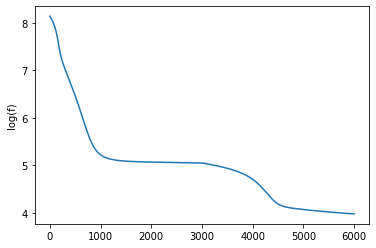

INFO:tensorflow:Assets written to: ./models/model_Canada_365\assets
9
374


[I 2021-04-08 22:07:06,638] A new study created in memory with name: no-name-c097c5c8-c5e8-4d1f-b693-2542620ebbcc
[I 2021-04-08 22:07:06,646] Trial 0 finished with value: 327249240.8744044 and parameters: {'beta': 0.48098914486730493, 'gamma': 0.8411515079247722, 'mu': 0.9606610007588813}. Best is trial 0 with value: 327249240.8744044.
[I 2021-04-08 22:07:06,648] Trial 1 finished with value: 327189231.07196665 and parameters: {'beta': 0.26163693959164525, 'gamma': 0.20167286327018252, 'mu': 0.45343166466764717}. Best is trial 1 with value: 327189231.07196665.
[I 2021-04-08 22:07:06,649] Trial 2 finished with value: 327085007.318023 and parameters: {'beta': 0.7484000246739135, 'gamma': 0.2188286492765278, 'mu': 0.9716603491818896}. Best is trial 2 with value: 327085007.318023.
[I 2021-04-08 22:07:06,651] Trial 3 finished with value: 327198746.78526056 and parameters: {'beta': 0.9213253573394783, 'gamma': 0.9045351178556998, 'mu': 0.25478086490051743}. Best is trial 2 with value: 3270850

[I 2021-04-08 22:07:06,870] Trial 34 finished with value: 327020865.3317235 and parameters: {'beta': 0.9436406349144066, 'gamma': 0.30682127574073365, 'mu': 0.8217644939663032}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:06,878] Trial 35 finished with value: 327047229.42501277 and parameters: {'beta': 0.9473654065211182, 'gamma': 0.32117131733508864, 'mu': 0.9692562337692339}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:06,886] Trial 36 finished with value: 327066431.35787064 and parameters: {'beta': 0.8952330778048094, 'gamma': 0.24439093410444307, 'mu': 0.7880486701662596}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:06,893] Trial 37 finished with value: 327037771.95450735 and parameters: {'beta': 0.9972945956481954, 'gamma': 0.3237966494985068, 'mu': 0.9980198363448719}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:06,901] Trial 38 finished with value: 329519572.2586579 and parameters

[I 2021-04-08 22:07:07,177] Trial 69 finished with value: 327200755.7659423 and parameters: {'beta': 0.7497981435956935, 'gamma': 0.6929834047146046, 'mu': 0.853915068849398}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,184] Trial 70 finished with value: 327255357.0922392 and parameters: {'beta': 0.08894074101378213, 'gamma': 0.4439642486311495, 'mu': 0.7762123280761504}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,192] Trial 71 finished with value: 327020214.9194749 and parameters: {'beta': 0.7825542344109142, 'gamma': 0.1963734207948033, 'mu': 0.8139516986761556}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,200] Trial 72 finished with value: 327019431.0295018 and parameters: {'beta': 0.6952518375450761, 'gamma': 0.11903042850450596, 'mu': 0.7993023375183469}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,209] Trial 73 finished with value: 327016771.84564954 and parameters: {'

[I 2021-04-08 22:07:07,626] Trial 104 finished with value: 326992791.6141167 and parameters: {'beta': 0.6453090518429251, 'gamma': 0.28118343046788397, 'mu': 0.49630258540366795}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,653] Trial 105 finished with value: 327011147.02086353 and parameters: {'beta': 0.5987312092038377, 'gamma': 0.25891133955924556, 'mu': 0.4908820830243441}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,678] Trial 106 finished with value: 327007998.8329661 and parameters: {'beta': 0.5915557511171022, 'gamma': 0.2654187647809002, 'mu': 0.46944314546312854}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,699] Trial 107 finished with value: 327037234.797538 and parameters: {'beta': 0.5866704213936824, 'gamma': 0.27639478142428864, 'mu': 0.48648257067387835}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:07,720] Trial 108 finished with value: 327088441.6053565 and param

[I 2021-04-08 22:07:08,173] Trial 139 finished with value: 327074450.3694769 and parameters: {'beta': 0.553109670136791, 'gamma': 0.3876408997594454, 'mu': 0.3082153003848097}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,184] Trial 140 finished with value: 326949857.9275724 and parameters: {'beta': 0.5736988672506655, 'gamma': 0.3117894153836309, 'mu': 0.34624650740657353}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,195] Trial 141 finished with value: 326939491.6576741 and parameters: {'beta': 0.5744609305924766, 'gamma': 0.3215114180667744, 'mu': 0.33122945200611514}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,206] Trial 142 finished with value: 327095325.32421273 and parameters: {'beta': 0.5022007801105284, 'gamma': 0.33800354361635787, 'mu': 0.33531420341171475}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,216] Trial 143 finished with value: 326955453.01036286 and parame

[I 2021-04-08 22:07:08,523] Trial 173 finished with value: 327207004.8871406 and parameters: {'beta': 0.3809556193224998, 'gamma': 0.3822165876378665, 'mu': 0.10820975172920892}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,538] Trial 174 finished with value: 327043136.38471425 and parameters: {'beta': 0.43540959387724565, 'gamma': 0.3550154834672432, 'mu': 0.14449731281474634}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,551] Trial 175 finished with value: 326727744.3393491 and parameters: {'beta': 0.5165509019306102, 'gamma': 0.3345347413347547, 'mu': 0.21033444806686302}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,564] Trial 176 finished with value: 327139353.6043012 and parameters: {'beta': 0.5130273561987512, 'gamma': 0.43665246844597727, 'mu': 0.22254615391808316}. Best is trial 15 with value: 325754524.55121493.
[I 2021-04-08 22:07:08,575] Trial 177 finished with value: 327147502.7080028 and para

[I 2021-04-08 22:07:08,948] Trial 207 finished with value: 326121893.16637087 and parameters: {'beta': 0.4662671404515465, 'gamma': 0.42945493729290946, 'mu': 0.01672891967701591}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:08,961] Trial 208 finished with value: 323714447.35881263 and parameters: {'beta': 0.46781140102371316, 'gamma': 0.4237249012883865, 'mu': 0.0015550145871635708}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:08,972] Trial 209 finished with value: 327299951.1200475 and parameters: {'beta': 0.45578457632069497, 'gamma': 0.4814928970573235, 'mu': 0.01065856460997847}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:08,983] Trial 210 finished with value: 327250712.6649312 and parameters: {'beta': 0.41297820556145853, 'gamma': 0.4279398161313313, 'mu': 0.023578602601192322}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:08,994] Trial 211 finished with value: 325483441.485074

[I 2021-04-08 22:07:09,401] Trial 241 finished with value: 325838355.6013449 and parameters: {'beta': 0.4509336092576985, 'gamma': 0.3924101764818882, 'mu': 0.03986047946203159}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:09,412] Trial 242 finished with value: 321714310.27990264 and parameters: {'beta': 0.4769043512853706, 'gamma': 0.38867636027776176, 'mu': 0.04298567119427751}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:09,424] Trial 243 finished with value: 325822035.1253327 and parameters: {'beta': 0.4486001815163914, 'gamma': 0.38977500039795676, 'mu': 0.03995787787698264}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:09,436] Trial 244 finished with value: 323904832.9105604 and parameters: {'beta': 0.47360963209003465, 'gamma': 0.384699309264859, 'mu': 0.05431198677447214}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:09,447] Trial 245 finished with value: 326744017.3844774 and 

[I 2021-04-08 22:07:09,816] Trial 275 finished with value: 224700620.23910704 and parameters: {'beta': 0.49286741859695576, 'gamma': 0.3929678029391817, 'mu': 0.0008743776200328124}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:09,827] Trial 276 finished with value: 247885368.27563784 and parameters: {'beta': 0.49013716367964827, 'gamma': 0.39337967626457365, 'mu': 0.0026047044279345778}. Best is trial 199 with value: 130273216.40042627.
[I 2021-04-08 22:07:09,838] Trial 277 finished with value: 13722584.576850168 and parameters: {'beta': 0.5143428242285705, 'gamma': 0.3869078640339606, 'mu': 0.0012301154275132422}. Best is trial 277 with value: 13722584.576850168.
[I 2021-04-08 22:07:09,850] Trial 278 finished with value: 10761685.97931276 and parameters: {'beta': 0.5281843355601952, 'gamma': 0.3994265289306195, 'mu': 0.0001585421501516457}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:09,861] Trial 279 finished with value: 74172290.967

[I 2021-04-08 22:07:10,231] Trial 309 finished with value: 183866815.95585856 and parameters: {'beta': 0.5574736878257943, 'gamma': 0.4503807465772378, 'mu': 0.0017498000988433581}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,244] Trial 310 finished with value: 315982523.60865307 and parameters: {'beta': 0.559646611311307, 'gamma': 0.4968621039689065, 'mu': 0.0016955327037194755}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,256] Trial 311 finished with value: 181407887.30362236 and parameters: {'beta': 0.5572613502562848, 'gamma': 0.44900915515005396, 'mu': 0.0026176147588172867}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,269] Trial 312 finished with value: 287149771.971498 and parameters: {'beta': 0.5649072683962416, 'gamma': 0.48007689524445935, 'mu': 0.002675095428123787}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,283] Trial 313 finished with value: 315251101.1755936 a

[I 2021-04-08 22:07:10,850] Trial 343 finished with value: 56502102.85840844 and parameters: {'beta': 0.535160565516535, 'gamma': 0.41471086041355365, 'mu': 0.0002542424037644997}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,862] Trial 344 finished with value: 293950423.03312767 and parameters: {'beta': 0.5200039786200704, 'gamma': 0.42063064039502196, 'mu': 0.02015294770154649}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,879] Trial 345 finished with value: 46603077.364849776 and parameters: {'beta': 0.5338083277221254, 'gamma': 0.41194164881661033, 'mu': 0.0005982396629685529}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,895] Trial 346 finished with value: 309935314.5415339 and parameters: {'beta': 0.5302970959676867, 'gamma': 0.4024002263656753, 'mu': 0.0394870550237863}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:10,908] Trial 347 finished with value: 9999813378.36643 and p

[I 2021-04-08 22:07:11,473] Trial 377 finished with value: 280858392.6495597 and parameters: {'beta': 0.5353797197571564, 'gamma': 0.42686979649280504, 'mu': 0.021764573207142788}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:11,489] Trial 378 finished with value: 112980036.9745413 and parameters: {'beta': 0.5710295437814686, 'gamma': 0.4564887365394634, 'mu': 0.0005313736620579414}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:11,543] Trial 379 finished with value: 319337244.04823375 and parameters: {'beta': 0.5789770837289067, 'gamma': 0.47467703305285813, 'mu': 0.05034247603568381}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:11,578] Trial 380 finished with value: 7454065354.355665 and parameters: {'beta': 0.616890937295081, 'gamma': 0.45722320805264505, 'mu': 0.0006453772261655367}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:11,615] Trial 381 finished with value: 273636091.28017104 an

[I 2021-04-08 22:07:12,296] Trial 411 finished with value: 6792745835.399273 and parameters: {'beta': 0.5696698666325317, 'gamma': 0.40185355514375537, 'mu': 0.01966270281741131}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:12,315] Trial 412 finished with value: 5990995001.571979 and parameters: {'beta': 0.5911482740141547, 'gamma': 0.4333850083168403, 'mu': 0.0003136099824819631}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:12,337] Trial 413 finished with value: 323897208.2589242 and parameters: {'beta': 0.5648071780447894, 'gamma': 0.4790643421790337, 'mu': 0.05100846591601766}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:12,363] Trial 414 finished with value: 320576358.6267171 and parameters: {'beta': 0.5079286182872553, 'gamma': 0.4547831071301881, 'mu': 0.00020369791801643031}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:12,399] Trial 415 finished with value: 74580783.68559615 and p

[I 2021-04-08 22:07:13,084] Trial 445 finished with value: 327356306.3010776 and parameters: {'beta': 0.5235904555061618, 'gamma': 0.8772951736931075, 'mu': 0.03324741032129608}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,101] Trial 446 finished with value: 222490020.43144888 and parameters: {'beta': 0.49923954385891217, 'gamma': 0.3685562114881349, 'mu': 0.017704743471976113}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,119] Trial 447 finished with value: 331137788.35750353 and parameters: {'beta': 0.5356041820049117, 'gamma': 0.3954385797332622, 'mu': 0.06415053839005543}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,137] Trial 448 finished with value: 255039148.88727787 and parameters: {'beta': 0.5180528747837716, 'gamma': 0.40337621711691424, 'mu': 0.01887056878484474}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,153] Trial 449 finished with value: 841607534.5958922 and p

[I 2021-04-08 22:07:13,750] Trial 479 finished with value: 315575446.24964833 and parameters: {'beta': 0.5386428839874462, 'gamma': 0.3977503581365954, 'mu': 0.0007104693678612918}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,770] Trial 480 finished with value: 263696656.2375575 and parameters: {'beta': 0.5168470098319814, 'gamma': 0.4254500006008105, 'mu': 0.0010265076117499787}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,788] Trial 481 finished with value: 31424223.96763671 and parameters: {'beta': 0.54967557312498, 'gamma': 0.417339308441961, 'mu': 6.438340150832626e-05}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,808] Trial 482 finished with value: 647519515.7380829 and parameters: {'beta': 0.5418620713129622, 'gamma': 0.3927785667829294, 'mu': 0.0330115378460208}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:13,829] Trial 483 finished with value: 319732704.8749777 and para

[I 2021-04-08 22:07:14,361] Trial 513 finished with value: 324454081.63888174 and parameters: {'beta': 0.5105254183325251, 'gamma': 0.44051064034630394, 'mu': 0.03796558358583691}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:14,378] Trial 514 finished with value: 248007955.3258371 and parameters: {'beta': 0.5293429773078786, 'gamma': 0.410833933174443, 'mu': 0.01944202329379127}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:14,397] Trial 515 finished with value: 277652301.24762964 and parameters: {'beta': 0.5506348406061676, 'gamma': 0.46355151579220377, 'mu': 0.0010460553642765884}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:14,415] Trial 516 finished with value: 84332055170.21495 and parameters: {'beta': 0.5843805004811257, 'gamma': 0.36721331978138644, 'mu': 0.06632028083781613}. Best is trial 278 with value: 10761685.97931276.
[I 2021-04-08 22:07:14,432] Trial 517 finished with value: 41002331.41451939 and p

[I 2021-04-08 22:07:14,941] Trial 547 finished with value: 5152362190.905161 and parameters: {'beta': 0.5630886971443163, 'gamma': 0.40612841890504303, 'mu': 0.0005875723818509526}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:14,954] Trial 548 finished with value: 368414140.88839066 and parameters: {'beta': 0.5310022823823142, 'gamma': 0.3896102841189669, 'mu': 0.04600955886778964}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:14,969] Trial 549 finished with value: 326529162.03816783 and parameters: {'beta': 0.5088157912688009, 'gamma': 0.4207038137742628, 'mu': 0.09357297778763998}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:14,996] Trial 550 finished with value: 311823832.5887807 and parameters: {'beta': 0.5470512932850193, 'gamma': 0.4488416731488585, 'mu': 0.03250656596057816}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:15,020] Trial 551 finished with value: 273804193.46801 and para

[I 2021-04-08 22:07:15,577] Trial 581 finished with value: 1621490600.925752 and parameters: {'beta': 0.5511951324227381, 'gamma': 0.3954694720998213, 'mu': 0.019969235329512794}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:15,593] Trial 582 finished with value: 14629972323.656528 and parameters: {'beta': 0.6019932909864087, 'gamma': 0.4281087805153956, 'mu': 0.018075810470103322}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:15,613] Trial 583 finished with value: 326412715.1635936 and parameters: {'beta': 0.5127633820228384, 'gamma': 0.4906555809672821, 'mu': 0.0009200515969871623}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:15,630] Trial 584 finished with value: 459453250.2800683 and parameters: {'beta': 0.5362739864990019, 'gamma': 0.38548957084655544, 'mu': 0.05239594434413244}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:15,648] Trial 585 finished with value: 2766360111.4856634 and 

[I 2021-04-08 22:07:16,212] Trial 615 finished with value: 364863989.4951216 and parameters: {'beta': 0.48385773894274525, 'gamma': 0.34120674060238476, 'mu': 0.0019936610118856477}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:16,243] Trial 616 finished with value: 324227960.54728246 and parameters: {'beta': 0.5201480446358734, 'gamma': 0.37888672821077957, 'mu': 0.0009731481688575099}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:16,271] Trial 617 finished with value: 3138604183.140523 and parameters: {'beta': 0.48853705323066754, 'gamma': 0.3214583867892349, 'mu': 0.03626046349598157}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:16,295] Trial 618 finished with value: 1063783532.3214842 and parameters: {'beta': 0.5198555008449095, 'gamma': 0.3734137721577274, 'mu': 0.0001359663220855041}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:16,316] Trial 619 finished with value: 41968188.81789124

[I 2021-04-08 22:07:17,014] Trial 649 finished with value: 464038310.5262464 and parameters: {'beta': 0.4960583764815591, 'gamma': 0.3512990483092654, 'mu': 0.01586194776797376}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,035] Trial 650 finished with value: 976332915.3806525 and parameters: {'beta': 0.5390617203824473, 'gamma': 0.38034176270491565, 'mu': 0.04429755939743625}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,060] Trial 651 finished with value: 252162748.40233618 and parameters: {'beta': 0.5299924902181198, 'gamma': 0.39544849883214256, 'mu': 0.01865650808491011}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,085] Trial 652 finished with value: 325085136.19253707 and parameters: {'beta': 0.48831223935417095, 'gamma': 0.4014556290655609, 'mu': 0.06209517730199556}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,110] Trial 653 finished with value: 110969552649.88008 and p

[I 2021-04-08 22:07:17,794] Trial 683 finished with value: 327318188.6791295 and parameters: {'beta': 0.5511774083328076, 'gamma': 0.7052215803186092, 'mu': 0.06531069009861691}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,814] Trial 684 finished with value: 2574065217358.164 and parameters: {'beta': 0.6518641275993313, 'gamma': 0.4310428929235096, 'mu': 0.017790169984683427}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,840] Trial 685 finished with value: 26165737.420462187 and parameters: {'beta': 0.5266956211078646, 'gamma': 0.40180464727066506, 'mu': 0.0009979551251334054}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,862] Trial 686 finished with value: 320081266.9481742 and parameters: {'beta': 0.4514328394006156, 'gamma': 0.35774785298393774, 'mu': 0.04302826028966293}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:17,882] Trial 687 finished with value: 393025403.49256927 and 

[I 2021-04-08 22:07:18,593] Trial 717 finished with value: 251850375.93952635 and parameters: {'beta': 0.5429100794255027, 'gamma': 0.42998208331769533, 'mu': 0.017199332441269765}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:18,617] Trial 718 finished with value: 324842018.22914815 and parameters: {'beta': 0.5154812825310207, 'gamma': 0.4490382911124592, 'mu': 0.03714187239260432}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:18,640] Trial 719 finished with value: 69458732308.64532 and parameters: {'beta': 0.5910100852376357, 'gamma': 0.4037373541666161, 'mu': 0.01732890113962522}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:18,666] Trial 720 finished with value: 439892453.6987522 and parameters: {'beta': 0.5279678224603115, 'gamma': 0.3843164915139353, 'mu': 0.018314640988941023}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:18,687] Trial 721 finished with value: 47378761499.08529 and pa

[I 2021-04-08 22:07:19,441] Trial 751 finished with value: 234409343.0972183 and parameters: {'beta': 0.5621127273525254, 'gamma': 0.43915208434015435, 'mu': 0.018861535555034156}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:19,472] Trial 752 finished with value: 324255250.0886476 and parameters: {'beta': 0.5430494043008759, 'gamma': 0.4023240792827063, 'mu': 0.08763461865949973}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:19,501] Trial 753 finished with value: 87198256.70958894 and parameters: {'beta': 0.6054527383333188, 'gamma': 0.46915874783035616, 'mu': 0.0009837643263961898}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:19,535] Trial 754 finished with value: 315122175.7545548 and parameters: {'beta': 0.5320822351285118, 'gamma': 0.42561727481848544, 'mu': 0.043501500614682324}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:19,559] Trial 755 finished with value: 95163171992.6202 and p

[I 2021-04-08 22:07:20,307] Trial 785 finished with value: 299343396.7285453 and parameters: {'beta': 0.5333579812437396, 'gamma': 0.4095709194280897, 'mu': 0.034885510664715784}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:20,328] Trial 786 finished with value: 32768247609.193615 and parameters: {'beta': 0.5555662342408892, 'gamma': 0.3757194739798983, 'mu': 0.015367631711317347}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:20,350] Trial 787 finished with value: 1328983264.304235 and parameters: {'beta': 0.6038270308161847, 'gamma': 0.4351590541274798, 'mu': 0.05567211453425702}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:20,370] Trial 788 finished with value: 126408165141155.81 and parameters: {'beta': 0.6380776562721051, 'gamma': 0.38963488145789393, 'mu': 0.0014302950442240797}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:20,392] Trial 789 finished with value: 276240373.5925432 and 

[I 2021-04-08 22:07:21,067] Trial 819 finished with value: 318286307.3061467 and parameters: {'beta': 0.5313647806870497, 'gamma': 0.4029784649734607, 'mu': 0.05377092901774085}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:21,090] Trial 820 finished with value: 2675553893.255477 and parameters: {'beta': 0.5321924265472395, 'gamma': 0.3793031774970022, 'mu': 0.0009767929003246308}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:21,115] Trial 821 finished with value: 392212546.8255891 and parameters: {'beta': 0.5062719974961395, 'gamma': 0.36554061895578266, 'mu': 0.03419396045065025}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:21,139] Trial 822 finished with value: 247072342.11869356 and parameters: {'beta': 0.5404267143918102, 'gamma': 0.4052437944468524, 'mu': 0.01771653770422008}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:21,166] Trial 823 finished with value: 239931804.9859828 and par

[I 2021-04-08 22:07:21,917] Trial 853 finished with value: 43879149.01160546 and parameters: {'beta': 0.577534177188552, 'gamma': 0.4441830928472757, 'mu': 0.00014220226077949372}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:21,940] Trial 854 finished with value: 372195700.30663484 and parameters: {'beta': 0.5073546139331687, 'gamma': 0.366638505687657, 'mu': 0.021378530059322092}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:21,963] Trial 855 finished with value: 364223673.1482396 and parameters: {'beta': 0.5483781020231494, 'gamma': 0.4065169234220194, 'mu': 0.017180644103938447}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:21,985] Trial 856 finished with value: 1792467337.6429753 and parameters: {'beta': 0.5347564293870107, 'gamma': 0.38446901109964093, 'mu': 0.0009068220282510923}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:22,005] Trial 857 finished with value: 2719192461.0579915 an

[I 2021-04-08 22:07:22,708] Trial 887 finished with value: 327216161.00602335 and parameters: {'beta': 0.49985802821768915, 'gamma': 0.3513296588321038, 'mu': 0.08968505754739348}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:22,727] Trial 888 finished with value: 327349720.58206385 and parameters: {'beta': 0.13815705522333205, 'gamma': 0.3679018974262047, 'mu': 0.031804167934084054}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:22,749] Trial 889 finished with value: 327180477.0323648 and parameters: {'beta': 0.47107487555507416, 'gamma': 0.3820371549651058, 'mu': 0.4901367157380824}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:22,773] Trial 890 finished with value: 326128362.02915144 and parameters: {'beta': 0.3935320808787266, 'gamma': 0.35356872301381953, 'mu': 0.02126916700318266}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:22,800] Trial 891 finished with value: 326090182.2855098 and 

[I 2021-04-08 22:07:23,515] Trial 921 finished with value: 327202484.2629987 and parameters: {'beta': 0.4294984780710746, 'gamma': 0.39800359518649897, 'mu': 0.6009156156712333}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:23,541] Trial 922 finished with value: 322489851.10911417 and parameters: {'beta': 0.5630665783508677, 'gamma': 0.48449236337873697, 'mu': 0.03619131175703618}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:23,572] Trial 923 finished with value: 293430198.343304 and parameters: {'beta': 0.534837742559086, 'gamma': 0.4390250139749126, 'mu': 0.016787010219445155}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:23,599] Trial 924 finished with value: 299685109.2394235 and parameters: {'beta': 0.4947653390692401, 'gamma': 0.4171643815126767, 'mu': 0.0016791110395000322}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:23,621] Trial 925 finished with value: 234289946.05041063 and par

[I 2021-04-08 22:07:24,323] Trial 955 finished with value: 1155844972842.8625 and parameters: {'beta': 0.5536122469116781, 'gamma': 0.34198636604224875, 'mu': 0.014761150643924418}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:24,344] Trial 956 finished with value: 314010997.3150589 and parameters: {'beta': 0.5969443356832043, 'gamma': 0.5152725838959008, 'mu': 0.019766641451607902}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:24,368] Trial 957 finished with value: 324982805.5466269 and parameters: {'beta': 0.4920985119939674, 'gamma': 0.41966599236090457, 'mu': 0.045268919351326674}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:24,390] Trial 958 finished with value: 324907294.30505764 and parameters: {'beta': 0.5356551485675767, 'gamma': 0.3889022966642544, 'mu': 0.10831280265429195}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:24,412] Trial 959 finished with value: 1478745659.8225753 and

[I 2021-04-08 22:07:25,121] Trial 989 finished with value: 417889458.35874254 and parameters: {'beta': 0.5421508882175231, 'gamma': 0.3997266852576721, 'mu': 0.03549004129251684}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:25,142] Trial 990 finished with value: 1351667193349.6743 and parameters: {'beta': 0.5788387466390521, 'gamma': 0.3763243096890391, 'mu': 3.321471539707247e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:25,171] Trial 991 finished with value: 311765330.40978986 and parameters: {'beta': 0.516792929808929, 'gamma': 0.42081148556987885, 'mu': 0.030523297379128546}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:25,201] Trial 992 finished with value: 264723359761.7813 and parameters: {'beta': 0.5416984725195424, 'gamma': 0.3423097885695708, 'mu': 0.017408771492981676}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:25,232] Trial 993 finished with value: 9685553238.683416 and 

[I 2021-04-08 22:07:26,123] Trial 1023 finished with value: 314034770.9415476 and parameters: {'beta': 0.4965644917794178, 'gamma': 0.37401006973593276, 'mu': 0.048729584442003}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:26,153] Trial 1024 finished with value: 2725717559.150977 and parameters: {'beta': 0.5591354081323086, 'gamma': 0.39565988836689264, 'mu': 0.030913716889036144}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:26,179] Trial 1025 finished with value: 113386191.01671804 and parameters: {'beta': 0.5336518894123138, 'gamma': 0.4194373896996226, 'mu': 0.00018965300850181202}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:26,202] Trial 1026 finished with value: 315707157.3504508 and parameters: {'beta': 0.5085692231256799, 'gamma': 0.4462541504167716, 'mu': 0.0006155636884987499}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:26,223] Trial 1027 finished with value: 1174249616838.881

[I 2021-04-08 22:07:26,994] Trial 1057 finished with value: 100996728915.79062 and parameters: {'beta': 0.5661026229327938, 'gamma': 0.3599884662548435, 'mu': 0.047283152079018086}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,020] Trial 1058 finished with value: 256786533.11570638 and parameters: {'beta': 0.5102706025097097, 'gamma': 0.3956521787599827, 'mu': 0.01919681075014385}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,045] Trial 1059 finished with value: 13086377878936.361 and parameters: {'beta': 0.5343959869140443, 'gamma': 0.3109918773950117, 'mu': 1.4660675935823588e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,068] Trial 1060 finished with value: 310703249.6376617 and parameters: {'beta': 0.4956598260074122, 'gamma': 0.42788599845063685, 'mu': 6.253951218763927e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,091] Trial 1061 finished with value: 322079274.2414

[I 2021-04-08 22:07:27,883] Trial 1091 finished with value: 1004581691.6540518 and parameters: {'beta': 0.6021485678740504, 'gamma': 0.44767897790128014, 'mu': 0.0334744412976956}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,908] Trial 1092 finished with value: 327189419.94953614 and parameters: {'beta': 0.6191875389413735, 'gamma': 0.51097915305696, 'mu': 0.7928420264159999}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,935] Trial 1093 finished with value: 508917251.6433891 and parameters: {'beta': 0.5882097945099755, 'gamma': 0.44566649859990803, 'mu': 0.0001378698333533203}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,961] Trial 1094 finished with value: 141337861.65255535 and parameters: {'beta': 0.5743160475060688, 'gamma': 0.46335637065127366, 'mu': 4.6356650930783777e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:27,988] Trial 1095 finished with value: 896196880.813992 

[I 2021-04-08 22:07:28,790] Trial 1125 finished with value: 1151529302.998705 and parameters: {'beta': 0.5264905191958545, 'gamma': 0.3794838652729372, 'mu': 0.0002450694638592832}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:28,815] Trial 1126 finished with value: 148945628166.78827 and parameters: {'beta': 0.5891873177521363, 'gamma': 0.33835867409716663, 'mu': 0.10289194882582911}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:28,843] Trial 1127 finished with value: 385883103.33167493 and parameters: {'beta': 0.5506171050534112, 'gamma': 0.4093499905980931, 'mu': 0.02133889234904839}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:28,882] Trial 1128 finished with value: 352135112.8961876 and parameters: {'beta': 0.5086139408861295, 'gamma': 0.36819284377920247, 'mu': 0.0496740782022924}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:28,921] Trial 1129 finished with value: 289315682.22417027 

[I 2021-04-08 22:07:29,796] Trial 1159 finished with value: 308338039.96366525 and parameters: {'beta': 0.5411980517054888, 'gamma': 0.45319877648236695, 'mu': 0.01960808443003641}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:29,822] Trial 1160 finished with value: 327176711.26733166 and parameters: {'beta': 0.49930845587632233, 'gamma': 0.41427022622260834, 'mu': 0.42651064745725736}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:29,849] Trial 1161 finished with value: 3929517578.008398 and parameters: {'beta': 0.563322349381565, 'gamma': 0.38905131870276216, 'mu': 0.04596390369847639}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:29,876] Trial 1162 finished with value: 251308695.01357037 and parameters: {'beta': 0.47245729192542774, 'gamma': 0.358344349696233, 'mu': 0.017809297590934373}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:29,903] Trial 1163 finished with value: 297602147.8086281

[I 2021-04-08 22:07:30,699] Trial 1193 finished with value: 2849308762.3486114 and parameters: {'beta': 0.5196086041907508, 'gamma': 0.36685188304576144, 'mu': 0.0004130110570895099}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:30,727] Trial 1194 finished with value: 326662318.7750748 and parameters: {'beta': 0.4915533693848395, 'gamma': 0.47458804944652766, 'mu': 0.00028103514010738317}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:30,758] Trial 1195 finished with value: 1708849997.005539 and parameters: {'beta': 0.5515432330948236, 'gamma': 0.3922223749206378, 'mu': 0.03172426023676989}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:30,787] Trial 1196 finished with value: 277492432.57273525 and parameters: {'beta': 0.5300225468896845, 'gamma': 0.4234367853463199, 'mu': 0.019295388170870283}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:30,815] Trial 1197 finished with value: 442633260.9431

[I 2021-04-08 22:07:31,652] Trial 1227 finished with value: 297178804.03573567 and parameters: {'beta': 0.45291426866793544, 'gamma': 0.3278228624657619, 'mu': 0.03341479667315783}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:31,680] Trial 1228 finished with value: 100924211.07102682 and parameters: {'beta': 0.41869268457924186, 'gamma': 0.3027291488669179, 'mu': 0.0006767183759451582}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:31,709] Trial 1229 finished with value: 30575923136.57669 and parameters: {'beta': 0.4889020267115077, 'gamma': 0.31878542679449917, 'mu': 0.00027225803716085365}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:31,737] Trial 1230 finished with value: 331906054.3358728 and parameters: {'beta': 0.46018592657831764, 'gamma': 0.31978532840143287, 'mu': 0.06382054908549882}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:31,762] Trial 1231 finished with value: 213924696864

[I 2021-04-08 22:07:32,552] Trial 1261 finished with value: 7717297868.529613 and parameters: {'beta': 0.4828204327561523, 'gamma': 0.30818056710308867, 'mu': 0.03436837831090916}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:32,579] Trial 1262 finished with value: 149338005.24729577 and parameters: {'beta': 0.4696714332945875, 'gamma': 0.359039732035075, 'mu': 0.0007794112847880758}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:32,606] Trial 1263 finished with value: 882089708.1643867 and parameters: {'beta': 0.479414442483143, 'gamma': 0.326905097546534, 'mu': 0.031895249994306984}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:32,634] Trial 1264 finished with value: 289565388.03167385 and parameters: {'beta': 0.4980509814591934, 'gamma': 0.3578934828166246, 'mu': 0.0003575786125056998}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:32,663] Trial 1265 finished with value: 326801853.4431676 a

[I 2021-04-08 22:07:33,548] Trial 1295 finished with value: 327218570.7125981 and parameters: {'beta': 0.4725040699256106, 'gamma': 0.4811028718493787, 'mu': 0.07694089558968718}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:33,575] Trial 1296 finished with value: 327218398.5070259 and parameters: {'beta': 0.5435305143958352, 'gamma': 0.5508398744265505, 'mu': 0.05026826431107511}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:33,605] Trial 1297 finished with value: 1064335937.6780386 and parameters: {'beta': 0.5240119760230991, 'gamma': 0.37211714902565235, 'mu': 0.017832591256588613}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:33,637] Trial 1298 finished with value: 327230704.342105 and parameters: {'beta': 0.406893274688065, 'gamma': 0.41729801463454747, 'mu': 0.03275534074230593}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:33,666] Trial 1299 finished with value: 327166809.7577107 and 

[I 2021-04-08 22:07:34,426] Trial 1329 finished with value: 324892515.24725276 and parameters: {'beta': 0.45868217114055915, 'gamma': 0.3252495257887935, 'mu': 0.04674501834043413}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:34,456] Trial 1330 finished with value: 304131012.13984597 and parameters: {'beta': 0.4321629045246912, 'gamma': 0.3418853965800227, 'mu': 0.01824070325018004}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:34,485] Trial 1331 finished with value: 319697630.2213507 and parameters: {'beta': 0.4659503653796264, 'gamma': 0.3247117113628796, 'mu': 0.001019669871054773}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:34,512] Trial 1332 finished with value: 353493611735.33636 and parameters: {'beta': 0.4663412000826705, 'gamma': 0.2757035143503765, 'mu': 0.0001834028229283092}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:34,538] Trial 1333 finished with value: 324232834.0510563

[I 2021-04-08 22:07:35,323] Trial 1363 finished with value: 327164217.35948944 and parameters: {'beta': 0.4086252351816928, 'gamma': 0.3660463222984393, 'mu': 0.17842870486188384}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:35,350] Trial 1364 finished with value: 465211393264.9875 and parameters: {'beta': 0.49228259530059726, 'gamma': 0.2990072204757216, 'mu': 0.0003983495019262238}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:35,374] Trial 1365 finished with value: 17672973.278364122 and parameters: {'beta': 0.47687307796861894, 'gamma': 0.34613888177275504, 'mu': 4.3864797562636606e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:35,397] Trial 1366 finished with value: 599491348.0798588 and parameters: {'beta': 0.46030710464964136, 'gamma': 0.3123441916821067, 'mu': 0.03271065669263467}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:35,427] Trial 1367 finished with value: 40157112815.3

[I 2021-04-08 22:07:36,232] Trial 1397 finished with value: 304870532.29600483 and parameters: {'beta': 0.5007080555951052, 'gamma': 0.3844062226995136, 'mu': 0.037773317266339895}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:36,257] Trial 1398 finished with value: 37012263712.05536 and parameters: {'beta': 0.5350776335234377, 'gamma': 0.3631508085764676, 'mu': 0.0005338346272759181}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:36,284] Trial 1399 finished with value: 259563140.82987112 and parameters: {'beta': 0.4417977010157771, 'gamma': 0.32792321615831244, 'mu': 0.01936913947209724}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:36,308] Trial 1400 finished with value: 118418461.2146843 and parameters: {'beta': 0.5121172957943348, 'gamma': 0.3976574584581779, 'mu': 0.0011232362999714536}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:36,333] Trial 1401 finished with value: 220078983.622614

[I 2021-04-08 22:07:37,156] Trial 1431 finished with value: 311965104.24513996 and parameters: {'beta': 0.49336413858998035, 'gamma': 0.3928376759057115, 'mu': 0.03459530469455096}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:37,180] Trial 1432 finished with value: 270788642.0725408 and parameters: {'beta': 0.5247735671116167, 'gamma': 0.41802226186139396, 'mu': 0.01741405144422251}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:37,207] Trial 1433 finished with value: 76406676533.47575 and parameters: {'beta': 0.5413148399727247, 'gamma': 0.36380314187644086, 'mu': 0.0001378588719477196}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:37,234] Trial 1434 finished with value: 266819119927.61682 and parameters: {'beta': 0.5870817543812965, 'gamma': 0.3746978392038754, 'mu': 0.04230283712733208}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:37,259] Trial 1435 finished with value: 299089077.5507378

[I 2021-04-08 22:07:38,077] Trial 1465 finished with value: 11369567.565556783 and parameters: {'beta': 0.5135719555171213, 'gamma': 0.38586105613692606, 'mu': 0.00021062650865066987}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:38,105] Trial 1466 finished with value: 304660765.74591655 and parameters: {'beta': 0.47165452516792905, 'gamma': 0.35377664591250435, 'mu': 0.03810784266514664}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:38,132] Trial 1467 finished with value: 298391796.1802309 and parameters: {'beta': 0.4573715146694448, 'gamma': 0.3420218879706806, 'mu': 0.033131460895393025}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:38,160] Trial 1468 finished with value: 215514025.86357677 and parameters: {'beta': 0.49653955249531523, 'gamma': 0.36861318623031925, 'mu': 0.017317715412404417}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:38,187] Trial 1469 finished with value: 322132851.8

[I 2021-04-08 22:07:39,020] Trial 1499 finished with value: 291609464.89876986 and parameters: {'beta': 0.43578764402483033, 'gamma': 0.33800719201657026, 'mu': 0.017645433444764547}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:39,045] Trial 1500 finished with value: 9902873232.893822 and parameters: {'beta': 0.5206051230931973, 'gamma': 0.35904673985122004, 'mu': 0.0004550165399537323}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:39,075] Trial 1501 finished with value: 327100323.54439 and parameters: {'beta': 0.559002972097876, 'gamma': 0.36531435555557823, 'mu': 0.4016976647567367}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:39,105] Trial 1502 finished with value: 74575136265642.1 and parameters: {'beta': 0.6319210762742925, 'gamma': 0.38976029284628144, 'mu': 0.0008994614974453059}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:39,134] Trial 1503 finished with value: 331010063.72823054

[I 2021-04-08 22:07:39,996] Trial 1533 finished with value: 122460804724496.34 and parameters: {'beta': 0.5840446314763981, 'gamma': 0.32478162640990116, 'mu': 0.018880611765601962}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:40,021] Trial 1534 finished with value: 277954926.29643476 and parameters: {'beta': 0.493129663927519, 'gamma': 0.388604177607148, 'mu': 0.017884780011361637}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:40,048] Trial 1535 finished with value: 327202735.41084296 and parameters: {'beta': 0.5193193087827147, 'gamma': 0.5225044338351232, 'mu': 0.03210772426381731}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:40,073] Trial 1536 finished with value: 33258371379.13416 and parameters: {'beta': 0.5380182684133975, 'gamma': 0.36721496792469066, 'mu': 0.0002692265842259864}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:40,099] Trial 1537 finished with value: 7500829572.946402

[I 2021-04-08 22:07:40,984] Trial 1567 finished with value: 149880734.52785558 and parameters: {'beta': 0.512455864924213, 'gamma': 0.4024342523550319, 'mu': 0.00013225755526817434}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:41,016] Trial 1568 finished with value: 52378159204.94635 and parameters: {'beta': 0.550304467078911, 'gamma': 0.37578897611463274, 'mu': 0.0002742749718809373}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:41,046] Trial 1569 finished with value: 326934994.49539286 and parameters: {'beta': 0.45281511578546557, 'gamma': 0.43472081531414797, 'mu': 0.019347768219985344}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:41,076] Trial 1570 finished with value: 319879130.526796 and parameters: {'beta': 0.4847389113386532, 'gamma': 0.3870764059911696, 'mu': 0.046103412845405166}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:41,105] Trial 1571 finished with value: 208245356581.75

[I 2021-04-08 22:07:41,997] Trial 1601 finished with value: 20080675282.827026 and parameters: {'beta': 0.5429587188079791, 'gamma': 0.35687898826668185, 'mu': 0.0392714163945778}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:42,028] Trial 1602 finished with value: 326982476.407117 and parameters: {'beta': 0.4994739793541347, 'gamma': 0.4844811272573971, 'mu': 0.0179476276312621}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:42,060] Trial 1603 finished with value: 287403537.29811037 and parameters: {'beta': 0.527688895748447, 'gamma': 0.42848977796028015, 'mu': 0.017003750685834026}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:42,085] Trial 1604 finished with value: 326615942.5972222 and parameters: {'beta': 0.4251842438361789, 'gamma': 0.3760944049336472, 'mu': 0.04830487149489002}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:42,111] Trial 1605 finished with value: 59338724222115.26 and p

[I 2021-04-08 22:07:43,067] Trial 1635 finished with value: 3401161375.733755 and parameters: {'beta': 0.5916638384946811, 'gamma': 0.42950860501668486, 'mu': 0.020498154045653357}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:43,101] Trial 1636 finished with value: 91629123.96700332 and parameters: {'beta': 0.5268495570083214, 'gamma': 0.40958129882272126, 'mu': 0.0010287177967704098}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:43,129] Trial 1637 finished with value: 260433748.51974338 and parameters: {'beta': 0.49351182074700206, 'gamma': 0.38213486087660414, 'mu': 0.018034690039982787}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:43,158] Trial 1638 finished with value: 3189069739.301706 and parameters: {'beta': 0.509985168790272, 'gamma': 0.3567536017312022, 'mu': 0.00014529317433279506}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:43,191] Trial 1639 finished with value: 157578047.149

[I 2021-04-08 22:07:44,156] Trial 1669 finished with value: 326581369.51353115 and parameters: {'beta': 0.44120384528779844, 'gamma': 0.4123771594724932, 'mu': 0.01751856431206978}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:44,189] Trial 1670 finished with value: 1.7800627018376714e+17 and parameters: {'beta': 0.7656566670263012, 'gamma': 0.35507287478531296, 'mu': 0.050310702501127125}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:44,219] Trial 1671 finished with value: 509348786.84971106 and parameters: {'beta': 0.527353982089087, 'gamma': 0.38223510933912586, 'mu': 0.01882156020742537}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:44,250] Trial 1672 finished with value: 2490628942864.296 and parameters: {'beta': 0.5519394096230864, 'gamma': 0.324350565861697, 'mu': 0.03144494172345111}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:44,284] Trial 1673 finished with value: 317763841.60552

[I 2021-04-08 22:07:45,296] Trial 1703 finished with value: 2228660471.507082 and parameters: {'beta': 0.5070907533598008, 'gamma': 0.34898457237869923, 'mu': 0.018278828910311382}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:45,327] Trial 1704 finished with value: 73486783.13009927 and parameters: {'beta': 0.5263127869978566, 'gamma': 0.4076515548320123, 'mu': 0.00037455623236812795}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:45,364] Trial 1705 finished with value: 28653016.02205006 and parameters: {'beta': 0.49840286806489664, 'gamma': 0.3745581087126492, 'mu': 5.3992072129415987e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:45,407] Trial 1706 finished with value: 327274980.4576849 and parameters: {'beta': 0.44573817050643644, 'gamma': 0.48177655304886724, 'mu': 0.042400655576172265}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:45,446] Trial 1707 finished with value: 383326813.95

[I 2021-04-08 22:07:46,535] Trial 1737 finished with value: 316958543.57089347 and parameters: {'beta': 0.4581218074411176, 'gamma': 0.3823623309144711, 'mu': 0.018273459378375195}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:46,569] Trial 1738 finished with value: 133981188.40439947 and parameters: {'beta': 0.5023513590257985, 'gamma': 0.3905248963121113, 'mu': 7.287856499923855e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:46,607] Trial 1739 finished with value: 324090677.1495448 and parameters: {'beta': 0.5511883694413452, 'gamma': 0.47039406539921297, 'mu': 0.04710798489460865}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:46,645] Trial 1740 finished with value: 302049976.11343485 and parameters: {'beta': 0.48593772439765365, 'gamma': 0.3457269634959188, 'mu': 0.00023413851165357224}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:46,679] Trial 1741 finished with value: 307997679.004

[I 2021-04-08 22:07:47,784] Trial 1771 finished with value: 677199373.2326162 and parameters: {'beta': 0.5511954993498037, 'gamma': 0.403178875410554, 'mu': 0.01687607366587745}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:47,817] Trial 1772 finished with value: 274804297.2825801 and parameters: {'beta': 0.4525452375514165, 'gamma': 0.3459583059616357, 'mu': 0.018461580411511105}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:47,850] Trial 1773 finished with value: 321577578.64036155 and parameters: {'beta': 0.5015664080419702, 'gamma': 0.4194991706933517, 'mu': 0.03629844419909934}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:47,883] Trial 1774 finished with value: 1979955159929.644 and parameters: {'beta': 0.5673129950641645, 'gamma': 0.36076288057621053, 'mu': 0.0006314025197375374}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:47,918] Trial 1775 finished with value: 327360416.71799165 a

[I 2021-04-08 22:07:48,934] Trial 1805 finished with value: 29290248254.459084 and parameters: {'beta': 0.5355608760334347, 'gamma': 0.3559954864347042, 'mu': 0.017160123263925887}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:48,968] Trial 1806 finished with value: 312729733.453936 and parameters: {'beta': 0.4829258002415349, 'gamma': 0.4166706094119476, 'mu': 0.0008458309471838538}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:49,001] Trial 1807 finished with value: 298264342.8998277 and parameters: {'beta': 0.4484891839883571, 'gamma': 0.37117511682812626, 'mu': 0.0003220224661922333}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:49,030] Trial 1808 finished with value: 288904850027.89124 and parameters: {'beta': 0.5881894771460597, 'gamma': 0.3993730698524564, 'mu': 3.8435226308078255e-05}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:49,061] Trial 1809 finished with value: 61577661450.66

[I 2021-04-08 22:07:50,053] Trial 1839 finished with value: 384241057.62026685 and parameters: {'beta': 0.4876014207670789, 'gamma': 0.3447687522149442, 'mu': 0.016127424327538088}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:50,087] Trial 1840 finished with value: 327276932.3469791 and parameters: {'beta': 0.4235816125486796, 'gamma': 0.4658512439945054, 'mu': 0.04834538718670726}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:50,120] Trial 1841 finished with value: 294000051.1487623 and parameters: {'beta': 0.5460238271487324, 'gamma': 0.4257597393774203, 'mu': 0.03231913664183128}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:50,155] Trial 1842 finished with value: 714611152135078.9 and parameters: {'beta': 0.5814902848143421, 'gamma': 0.3040454114786011, 'mu': 0.016321037224232327}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:50,194] Trial 1843 finished with value: 324547901.8155684 and

[I 2021-04-08 22:07:51,212] Trial 1873 finished with value: 1965894978.3169956 and parameters: {'beta': 0.5501000395694157, 'gamma': 0.39326474357867863, 'mu': 0.016848562666305175}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:51,250] Trial 1874 finished with value: 319322407.25417626 and parameters: {'beta': 0.5307610476021786, 'gamma': 0.4594007301781546, 'mu': 0.018466405474693758}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:51,287] Trial 1875 finished with value: 315898331.9727666 and parameters: {'beta': 0.5066182838959743, 'gamma': 0.41057452670232936, 'mu': 0.03628423104499708}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:51,324] Trial 1876 finished with value: 1010999931.316844 and parameters: {'beta': 0.5476868494613988, 'gamma': 0.37634138667130324, 'mu': 0.06515268993127853}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:51,355] Trial 1877 finished with value: 383131600660.2979

[I 2021-04-08 22:07:52,382] Trial 1907 finished with value: 42992100.18392353 and parameters: {'beta': 0.5598124601733558, 'gamma': 0.4378111208046162, 'mu': 0.00018908272123614446}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:52,416] Trial 1908 finished with value: 1364665500.3090775 and parameters: {'beta': 0.6015759046151826, 'gamma': 0.44454642859819116, 'mu': 0.03155842438329564}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:52,452] Trial 1909 finished with value: 411653172.94495654 and parameters: {'beta': 0.5721168309108593, 'gamma': 0.4293203493239764, 'mu': 0.018731732951032483}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:52,490] Trial 1910 finished with value: 325954153.2871823 and parameters: {'beta': 0.589882954422046, 'gamma': 0.4848683927658237, 'mu': 0.0946518923266474}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:52,529] Trial 1911 finished with value: 326604683.5946954 a

[I 2021-04-08 22:07:53,562] Trial 1941 finished with value: 767288791.1290221 and parameters: {'beta': 0.582237010444488, 'gamma': 0.41410708859954526, 'mu': 0.06605425359850224}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:53,608] Trial 1942 finished with value: 11242090.110522222 and parameters: {'beta': 0.5420721665276911, 'gamma': 0.41433179266529513, 'mu': 0.0006556469307317563}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:53,641] Trial 1943 finished with value: 157909644054.6406 and parameters: {'beta': 0.6350110752436611, 'gamma': 0.4508196914382383, 'mu': 0.0006222791520870063}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:53,678] Trial 1944 finished with value: 327195333.5500144 and parameters: {'beta': 0.56892583699611, 'gamma': 0.4782468452640874, 'mu': 0.8922721170556192}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:53,721] Trial 1945 finished with value: 6413313772.224731 and

[I 2021-04-08 22:07:54,784] Trial 1975 finished with value: 280762490.3491126 and parameters: {'beta': 0.530225478961491, 'gamma': 0.4289464636998437, 'mu': 0.016212458007457423}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:54,813] Trial 1976 finished with value: 38187285458.143616 and parameters: {'beta': 0.6695501557798942, 'gamma': 0.4787567084538785, 'mu': 0.03679371901321899}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:54,846] Trial 1977 finished with value: 251949558.57949877 and parameters: {'beta': 0.5598154324186383, 'gamma': 0.4455865594848763, 'mu': 0.018000964896234657}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:54,877] Trial 1978 finished with value: 327158692.0919204 and parameters: {'beta': 0.583735478600866, 'gamma': 0.40162604170277016, 'mu': 0.6297875536395425}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:54,909] Trial 1979 finished with value: 203994133.5483487 and 

[I 2021-04-08 22:07:55,968] Trial 2009 finished with value: 57982626.77144407 and parameters: {'beta': 0.560285036792191, 'gamma': 0.4398910698637586, 'mu': 0.00040070292983348306}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:56,001] Trial 2010 finished with value: 385874714.8904065 and parameters: {'beta': 0.5461881844551005, 'gamma': 0.40325295989506493, 'mu': 0.015959193494767033}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:56,034] Trial 2011 finished with value: 326024950.68173957 and parameters: {'beta': 0.5266794988895045, 'gamma': 0.4178039331545061, 'mu': 0.10036030242231837}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:56,073] Trial 2012 finished with value: 397427564.5574318 and parameters: {'beta': 0.6083938534333077, 'gamma': 0.4580355538461776, 'mu': 0.05983067373223359}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:56,117] Trial 2013 finished with value: 62154125945.34158 a

[I 2021-04-08 22:07:57,220] Trial 2043 finished with value: 512466464124.537 and parameters: {'beta': 0.6096093713843106, 'gamma': 0.39075124462615385, 'mu': 0.04263320974007503}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:57,295] Trial 2044 finished with value: 325779814.00621456 and parameters: {'beta': 0.5137525182104485, 'gamma': 0.4324305043746814, 'mu': 0.06549417144950297}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:57,366] Trial 2045 finished with value: 291466158.43788016 and parameters: {'beta': 0.572344824158073, 'gamma': 0.49123783588200004, 'mu': 0.0005986393096278056}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:57,416] Trial 2046 finished with value: 56930047.71461858 and parameters: {'beta': 0.5449255412662407, 'gamma': 0.41074385510824835, 'mu': 0.00021488622788156227}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:57,462] Trial 2047 finished with value: 336733445.402857

[I 2021-04-08 22:07:58,993] Trial 2077 finished with value: 305168831.18126774 and parameters: {'beta': 0.51125605895319, 'gamma': 0.4047659472808456, 'mu': 0.03258409115065442}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:59,043] Trial 2078 finished with value: 232544789.07097057 and parameters: {'beta': 0.5324504998189596, 'gamma': 0.4345831556215807, 'mu': 0.00021357364279407458}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:59,089] Trial 2079 finished with value: 16465997816.04607 and parameters: {'beta': 0.55439757693733, 'gamma': 0.378269344969891, 'mu': 0.021485328893573446}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:59,128] Trial 2080 finished with value: 327045022.5025611 and parameters: {'beta': 0.5093814376818481, 'gamma': 0.4763110812592231, 'mu': 0.06335350440303851}. Best is trial 524 with value: 9591140.128076829.
[I 2021-04-08 22:07:59,172] Trial 2081 finished with value: 208104751.9547069 and p

[I 2021-04-08 22:08:00,510] Trial 2111 finished with value: 326967216.7449826 and parameters: {'beta': 0.5454865899101424, 'gamma': 0.5103828069328039, 'mu': 0.05345785011913279}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:00,554] Trial 2112 finished with value: 272177467.8395972 and parameters: {'beta': 0.5232117642386781, 'gamma': 0.4115295234846168, 'mu': 0.021162268931130032}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:00,598] Trial 2113 finished with value: 324891287.29426295 and parameters: {'beta': 0.5549552142853557, 'gamma': 0.46002830581312903, 'mu': 0.06848632916566283}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:00,650] Trial 2114 finished with value: 216251594893975.7 and parameters: {'beta': 0.6256006571757294, 'gamma': 0.37262906430214393, 'mu': 7.694550076539587e-06}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:00,698] Trial 2115 finished with value: 32509301.61607

[I 2021-04-08 22:08:01,919] Trial 2145 finished with value: 325929932.2689619 and parameters: {'beta': 0.5464179735011043, 'gamma': 0.42060666542661346, 'mu': 0.11533051131116719}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:01,955] Trial 2146 finished with value: 280409874.2933221 and parameters: {'beta': 0.49446977417550625, 'gamma': 0.39027968942425795, 'mu': 0.018447507155902116}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:01,995] Trial 2147 finished with value: 312690077.2233423 and parameters: {'beta': 0.5232979236540432, 'gamma': 0.425511442172572, 'mu': 0.03319561646752449}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:02,031] Trial 2148 finished with value: 694228698618.2756 and parameters: {'beta': 0.5751690227584147, 'gamma': 0.3656965960717815, 'mu': 0.019828842750567174}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:02,066] Trial 2149 finished with value: 313607650.666159

[I 2021-04-08 22:08:03,191] Trial 2179 finished with value: 1905752260453.7195 and parameters: {'beta': 0.5849258233078328, 'gamma': 0.3792599220672762, 'mu': 5.771732402709954e-05}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:03,228] Trial 2180 finished with value: 316854015.43393534 and parameters: {'beta': 0.5512364368320374, 'gamma': 0.4409000593371875, 'mu': 0.0492528541650545}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:03,272] Trial 2181 finished with value: 327199393.0892639 and parameters: {'beta': 0.5133934402436265, 'gamma': 0.498410441498819, 'mu': 0.24532196893755057}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:03,317] Trial 2182 finished with value: 92439808210203.33 and parameters: {'beta': 0.6183804210879661, 'gamma': 0.3623618389827541, 'mu': 0.017864969529900215}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:03,359] Trial 2183 finished with value: 323973740.30362 a

[I 2021-04-08 22:08:04,810] Trial 2213 finished with value: 327213155.33878034 and parameters: {'beta': 0.5104717304422711, 'gamma': 0.5158569946075682, 'mu': 0.06757917541349184}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:04,864] Trial 2214 finished with value: 326686271.7231026 and parameters: {'beta': 0.5470442407272011, 'gamma': 0.41026600751586373, 'mu': 0.1584389922898573}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:04,918] Trial 2215 finished with value: 3053893424.3729205 and parameters: {'beta': 0.5340635972380929, 'gamma': 0.3809372348829143, 'mu': 0.00032343015668478693}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:04,963] Trial 2216 finished with value: 1295891915.9115865 and parameters: {'beta': 0.5760901447661905, 'gamma': 0.4225516603471593, 'mu': 0.01773634750699267}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:05,066] Trial 2217 finished with value: 299189978.4416

[I 2021-04-08 22:08:06,449] Trial 2247 finished with value: 327344826.3103413 and parameters: {'beta': 0.5225365096937069, 'gamma': 0.916584996586341, 'mu': 0.06876075661707474}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:06,493] Trial 2248 finished with value: 319738023.2361458 and parameters: {'beta': 0.49987122262430045, 'gamma': 0.4288863155555, 'mu': 0.019088953924420744}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:06,532] Trial 2249 finished with value: 329267672.0446801 and parameters: {'beta': 0.5434350891870632, 'gamma': 0.4083126776768997, 'mu': 0.032587289260487436}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:06,574] Trial 2250 finished with value: 137961506.05190808 and parameters: {'beta': 0.557518306983985, 'gamma': 0.4456267266441041, 'mu': 0.0006956087150271254}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:06,617] Trial 2251 finished with value: 318701302.7805763 a

[I 2021-04-08 22:08:08,206] Trial 2281 finished with value: 28717826.78068271 and parameters: {'beta': 0.48391785896449296, 'gamma': 0.35097249609164033, 'mu': 0.0007555741036289068}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:08,249] Trial 2282 finished with value: 258121095.6381843 and parameters: {'beta': 0.4794267521420207, 'gamma': 0.3691428560270105, 'mu': 0.016785962716619952}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:08,290] Trial 2283 finished with value: 2.578476161884286e+17 and parameters: {'beta': 0.7838797804812474, 'gamma': 0.3493283421703304, 'mu': 0.05067570024240827}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:08,336] Trial 2284 finished with value: 234929778.91459945 and parameters: {'beta': 0.4996039166137703, 'gamma': 0.3744125762480341, 'mu': 0.019348992669047063}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:08,374] Trial 2285 finished with value: 10272419.

[I 2021-04-08 22:08:09,842] Trial 2315 finished with value: 293801197.5384362 and parameters: {'beta': 0.48997545087249056, 'gamma': 0.3722755414539564, 'mu': 0.03163200917035509}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:09,886] Trial 2316 finished with value: 3208105686.9655714 and parameters: {'beta': 0.504290859237136, 'gamma': 0.3432113187688167, 'mu': 0.01808049078634765}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:09,924] Trial 2317 finished with value: 164398543.15225235 and parameters: {'beta': 0.47554468663335914, 'gamma': 0.36721321630249176, 'mu': 0.00024238956913846316}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:09,957] Trial 2318 finished with value: 21468049.27593682 and parameters: {'beta': 0.4974647609383806, 'gamma': 0.3717644011131882, 'mu': 0.0010634723817968114}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:09,994] Trial 2319 finished with value: 18787960936

[I 2021-04-08 22:08:11,258] Trial 2349 finished with value: 230594477.73280624 and parameters: {'beta': 0.44276337194041077, 'gamma': 0.31548236110993283, 'mu': 0.018938375344148994}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:11,300] Trial 2350 finished with value: 367507714.9671726 and parameters: {'beta': 0.45504069105414136, 'gamma': 0.28336976423367916, 'mu': 0.09913352979456354}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:11,349] Trial 2351 finished with value: 265448313.64901942 and parameters: {'beta': 0.41725486318762856, 'gamma': 0.30744208706082754, 'mu': 0.018188649923344645}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:11,393] Trial 2352 finished with value: 59503056.41431563 and parameters: {'beta': 0.45461214312646764, 'gamma': 0.3201334783621766, 'mu': 0.00036112131823691306}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:11,436] Trial 2353 finished with value: 323577

[I 2021-04-08 22:08:12,749] Trial 2383 finished with value: 232195761.91228455 and parameters: {'beta': 0.5144093641211271, 'gamma': 0.383525951822612, 'mu': 0.018594836873006754}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:12,791] Trial 2384 finished with value: 210021888.25699422 and parameters: {'beta': 0.466612132077932, 'gamma': 0.36453218854794117, 'mu': 0.0004924842197712928}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:12,835] Trial 2385 finished with value: 5798861807971.691 and parameters: {'beta': 0.4890913045282998, 'gamma': 0.2728057761239671, 'mu': 0.000653072837357277}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:12,872] Trial 2386 finished with value: 85740697.82838093 and parameters: {'beta': 0.5021247676496227, 'gamma': 0.38459222948816074, 'mu': 0.0006077002902493318}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:12,907] Trial 2387 finished with value: 331397099.05

[I 2021-04-08 22:08:14,200] Trial 2417 finished with value: 4537024935.021286 and parameters: {'beta': 0.49947323546986233, 'gamma': 0.314855552393786, 'mu': 0.06039085411570681}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:14,248] Trial 2418 finished with value: 288667168.1123829 and parameters: {'beta': 0.4913144694054684, 'gamma': 0.39121543639929207, 'mu': 0.018306232158415005}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:14,295] Trial 2419 finished with value: 323522586.5514931 and parameters: {'beta': 0.4128066175046237, 'gamma': 0.3684784440712293, 'mu': 0.0007503908160086642}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:14,339] Trial 2420 finished with value: 3969985532.902172 and parameters: {'beta': 0.5226996821112737, 'gamma': 0.35380730062329013, 'mu': 0.03535307466279306}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:14,385] Trial 2421 finished with value: 322438761.15557

[I 2021-04-08 22:08:15,840] Trial 2451 finished with value: 11788950928308.52 and parameters: {'beta': 0.5310923695195559, 'gamma': 0.30786667641876, 'mu': 0.0008511715207539255}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:15,883] Trial 2452 finished with value: 317083274.0412219 and parameters: {'beta': 0.5087522152561376, 'gamma': 0.39974408143296636, 'mu': 0.04880033549083538}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:15,928] Trial 2453 finished with value: 727639905.1145703 and parameters: {'beta': 0.4787151909230652, 'gamma': 0.3341230599504359, 'mu': 0.0003628103476050769}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:15,973] Trial 2454 finished with value: 1106171276.4953527 and parameters: {'beta': 0.5302970231943867, 'gamma': 0.3781093341786186, 'mu': 0.017344770182708597}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:16,014] Trial 2455 finished with value: 304781464.22820

[I 2021-04-08 22:08:17,409] Trial 2485 finished with value: 317679607.5474261 and parameters: {'beta': 0.45841092428640823, 'gamma': 0.3851782339755842, 'mu': 0.016921858531353706}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:17,447] Trial 2486 finished with value: 101301424.85586908 and parameters: {'beta': 0.47841756223923393, 'gamma': 0.3419965813481774, 'mu': 0.0006213878265506476}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:17,488] Trial 2487 finished with value: 38812180.6444707 and parameters: {'beta': 0.5341103413966002, 'gamma': 0.41120955679891924, 'mu': 0.0006941543117898307}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:17,538] Trial 2488 finished with value: 343849826.879678 and parameters: {'beta': 0.5133709085102887, 'gamma': 0.36941128500474196, 'mu': 0.06273089335523035}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:17,599] Trial 2489 finished with value: 285766317.10

[I 2021-04-08 22:08:18,996] Trial 2519 finished with value: 575911926.553107 and parameters: {'beta': 0.5496162776339829, 'gamma': 0.39557015623947095, 'mu': 0.04984490290871221}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:19,041] Trial 2520 finished with value: 266238090.06271458 and parameters: {'beta': 0.5104682338322176, 'gamma': 0.42001075994491344, 'mu': 0.0007679797180519556}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:19,085] Trial 2521 finished with value: 289484643.3064095 and parameters: {'beta': 0.4827342607649293, 'gamma': 0.3793660616584541, 'mu': 0.021308352795377596}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:19,132] Trial 2522 finished with value: 124907664362.17477 and parameters: {'beta': 0.5298025343613127, 'gamma': 0.33703365103123534, 'mu': 0.0178741298108276}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:19,216] Trial 2523 finished with value: 345467324632.5

[I 2021-04-08 22:08:20,825] Trial 2553 finished with value: 61448658.58233276 and parameters: {'beta': 0.4570305985105226, 'gamma': 0.33710448094421075, 'mu': 0.0003025799595597339}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:20,880] Trial 2554 finished with value: 2274778355.9987445 and parameters: {'beta': 0.45859296829003493, 'gamma': 0.3003005718703377, 'mu': 0.01837665143462509}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:20,944] Trial 2555 finished with value: 77684567.61120436 and parameters: {'beta': 0.43172637245439627, 'gamma': 0.31377251673171824, 'mu': 4.999053954617204e-05}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:21,001] Trial 2556 finished with value: 327088998.4830491 and parameters: {'beta': 0.46580058165376964, 'gamma': 0.29722475866677595, 'mu': 0.33342066525455194}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:21,052] Trial 2557 finished with value: 324695298

[I 2021-04-08 22:08:22,494] Trial 2587 finished with value: 298402241.2317861 and parameters: {'beta': 0.4674552230650381, 'gamma': 0.3473488587775506, 'mu': 0.034499254621134734}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:22,529] Trial 2588 finished with value: 30515982.367963858 and parameters: {'beta': 0.49240476664295224, 'gamma': 0.35995313825659575, 'mu': 0.0002084310499917851}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:22,570] Trial 2589 finished with value: 275752518.5061713 and parameters: {'beta': 0.42764299950885803, 'gamma': 0.33983463525910074, 'mu': 0.0011325891125506106}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:22,614] Trial 2590 finished with value: 319701157.90148926 and parameters: {'beta': 0.4626734200398893, 'gamma': 0.3641370298210462, 'mu': 0.04640025834354168}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:22,652] Trial 2591 finished with value: 327179794

[I 2021-04-08 22:08:24,088] Trial 2621 finished with value: 194118992.80047488 and parameters: {'beta': 0.4552071130261389, 'gamma': 0.35080825029391766, 'mu': 0.00034750777662583134}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:24,130] Trial 2622 finished with value: 40694933870.248375 and parameters: {'beta': 0.4770440598941608, 'gamma': 0.30391598487493976, 'mu': 0.001001158116679952}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:24,169] Trial 2623 finished with value: 1.4665419906480955e+18 and parameters: {'beta': 0.5064455131597415, 'gamma': 0.07611474977380395, 'mu': 0.04803666450835575}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:24,203] Trial 2624 finished with value: 305541915.3661537 and parameters: {'beta': 0.46602412456479964, 'gamma': 0.3768771308170561, 'mu': 0.018269031190832282}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:24,239] Trial 2625 finished with value: 2969

[I 2021-04-08 22:08:25,717] Trial 2655 finished with value: 6773058178.15968 and parameters: {'beta': 0.4620956817802449, 'gamma': 0.3030609017066306, 'mu': 0.0007354992845227036}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:25,770] Trial 2656 finished with value: 45601802.57309622 and parameters: {'beta': 0.4512346487771835, 'gamma': 0.3170788829627185, 'mu': 0.0007572588818485479}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:25,823] Trial 2657 finished with value: 326035184.8298232 and parameters: {'beta': 0.41407120349044607, 'gamma': 0.34118275615335447, 'mu': 0.0607010375783825}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:25,875] Trial 2658 finished with value: 549730764.0226456 and parameters: {'beta': 0.4738349935413661, 'gamma': 0.32684535805100956, 'mu': 0.03381245416525552}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:25,925] Trial 2659 finished with value: 307766374.25167

[I 2021-04-08 22:08:27,468] Trial 2689 finished with value: 28541012.052674446 and parameters: {'beta': 0.4778650150449947, 'gamma': 0.3537037608924161, 'mu': 0.0005302195194010977}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:27,520] Trial 2690 finished with value: 548130526.385233 and parameters: {'beta': 0.5139147034577641, 'gamma': 0.3671201717034987, 'mu': 0.033196006663500595}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:27,576] Trial 2691 finished with value: 59575403.96892595 and parameters: {'beta': 0.47001572969343713, 'gamma': 0.3352566785296437, 'mu': 0.0006119874049615499}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:27,626] Trial 2692 finished with value: 317627063.7316794 and parameters: {'beta': 0.5159845646540216, 'gamma': 0.3864139407009242, 'mu': 0.04781761050202755}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:27,679] Trial 2693 finished with value: 362403764.5119

[I 2021-04-08 22:08:29,232] Trial 2723 finished with value: 252538906.68245432 and parameters: {'beta': 0.521613939448014, 'gamma': 0.3895931184182309, 'mu': 0.020310665126364393}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:29,280] Trial 2724 finished with value: 411724567.2863782 and parameters: {'beta': 0.47041024247223895, 'gamma': 0.3257290201651247, 'mu': 0.044830333295533764}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:29,322] Trial 2725 finished with value: 2287465426.8744884 and parameters: {'beta': 0.5226677929434765, 'gamma': 0.36426120163162007, 'mu': 0.018718342896965997}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:29,373] Trial 2726 finished with value: 315788789.799746 and parameters: {'beta': 0.488476831829704, 'gamma': 0.3958414202776056, 'mu': 0.03303789085668959}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:29,424] Trial 2727 finished with value: 736709636.484862

[I 2021-04-08 22:08:30,831] Trial 2757 finished with value: 327350835.67211944 and parameters: {'beta': 0.1156564209146348, 'gamma': 0.37919914344983174, 'mu': 0.034432690181934386}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:30,895] Trial 2758 finished with value: 3995719195.796292 and parameters: {'beta': 0.5079497607452776, 'gamma': 0.34472975585200294, 'mu': 0.019342425658615485}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:30,957] Trial 2759 finished with value: 321492367.47689235 and parameters: {'beta': 0.4608948132976601, 'gamma': 0.3959896506419983, 'mu': 0.017450377080683217}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:31,005] Trial 2760 finished with value: 327372257.55713403 and parameters: {'beta': 0.02683218937697135, 'gamma': 0.3635220157600235, 'mu': 0.0002506155470897738}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:31,054] Trial 2761 finished with value: 34965374.

[I 2021-04-08 22:08:32,445] Trial 2791 finished with value: 221288470838.8538 and parameters: {'beta': 0.5103921487976857, 'gamma': 0.32324932496471115, 'mu': 0.0007448513499009444}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:32,492] Trial 2792 finished with value: 319910746.0928452 and parameters: {'beta': 0.4747929542611775, 'gamma': 0.40435572781749357, 'mu': 0.018934009304310342}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:32,543] Trial 2793 finished with value: 274352783.85616434 and parameters: {'beta': 0.4490450415222647, 'gamma': 0.36130139592127486, 'mu': 0.000508124853170795}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:32,595] Trial 2794 finished with value: 79780080.21180713 and parameters: {'beta': 0.49246603661645844, 'gamma': 0.3746879467156936, 'mu': 0.00011524096426272052}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:32,649] Trial 2795 finished with value: 51748544

[I 2021-04-08 22:08:34,155] Trial 2825 finished with value: 302843602.44333494 and parameters: {'beta': 0.5426110242719823, 'gamma': 0.4138736545998567, 'mu': 0.03365336904027897}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:34,205] Trial 2826 finished with value: 259881398.1799799 and parameters: {'beta': 0.5025510978429664, 'gamma': 0.38500703451197965, 'mu': 0.021296434587775755}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:34,256] Trial 2827 finished with value: 302611443.3491713 and parameters: {'beta': 0.4406193246237435, 'gamma': 0.36626274269926196, 'mu': 3.763506192465025e-05}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:34,306] Trial 2828 finished with value: 305661678.15232116 and parameters: {'beta': 0.48260286640854677, 'gamma': 0.3948631104483278, 'mu': 0.01700234428309496}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:34,358] Trial 2829 finished with value: 327344483.86

[I 2021-04-08 22:08:35,775] Trial 2859 finished with value: 319072139.20325875 and parameters: {'beta': 0.49628155009161146, 'gamma': 0.37489914171696687, 'mu': 0.060096028597296645}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:35,825] Trial 2860 finished with value: 44325335815.10467 and parameters: {'beta': 0.5237878317274622, 'gamma': 0.33381867489989203, 'mu': 0.03253066560469494}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:35,878] Trial 2861 finished with value: 324662255.14574665 and parameters: {'beta': 0.45030650714124154, 'gamma': 0.39848326395834044, 'mu': 0.01817541237998629}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:35,928] Trial 2862 finished with value: 119193023349.82393 and parameters: {'beta': 0.5449626655855447, 'gamma': 0.36361996331445484, 'mu': 0.00021846060815934078}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:35,976] Trial 2863 finished with value: 3211301

[I 2021-04-08 22:08:37,445] Trial 2893 finished with value: 313667224.31989956 and parameters: {'beta': 0.4868475194113466, 'gamma': 0.4054576144230218, 'mu': 0.019008100974621203}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:37,500] Trial 2894 finished with value: 3043247241.421753 and parameters: {'beta': 0.5287374902134104, 'gamma': 0.3678624538775795, 'mu': 0.019106960937859754}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:37,549] Trial 2895 finished with value: 323030121.2077299 and parameters: {'beta': 0.46047393921858876, 'gamma': 0.3857959161714873, 'mu': 0.034486433123389434}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:37,605] Trial 2896 finished with value: 321363624.46954364 and parameters: {'beta': 0.38928500516529185, 'gamma': 0.3230665947676026, 'mu': 0.018510711345853696}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:37,664] Trial 2897 finished with value: 326403662.57

[I 2021-04-08 22:08:39,242] Trial 2927 finished with value: 45298264133.07837 and parameters: {'beta': 0.5522812901928758, 'gamma': 0.3685053768935426, 'mu': 0.01809357806152834}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:39,292] Trial 2928 finished with value: 417217702.7985735 and parameters: {'beta': 0.5298441371113068, 'gamma': 0.3880017905026109, 'mu': 0.00038767410754419974}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:39,342] Trial 2929 finished with value: 326850260.2850076 and parameters: {'beta': 0.49843246575781325, 'gamma': 0.42807752450008163, 'mu': 0.0925171930409602}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:39,395] Trial 2930 finished with value: 69973845499.18451 and parameters: {'beta': 0.557292857869131, 'gamma': 0.34305578596259617, 'mu': 0.06474272995484023}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:39,442] Trial 2931 finished with value: 318657859.179027

[I 2021-04-08 22:08:40,940] Trial 2961 finished with value: 319629449.65939045 and parameters: {'beta': 0.496403142486942, 'gamma': 0.4271757292659485, 'mu': 0.016866384209008493}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:41,005] Trial 2962 finished with value: 317199440.18609774 and parameters: {'beta': 0.45277703061443036, 'gamma': 0.3616251411544035, 'mu': 0.03412527831174449}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:41,088] Trial 2963 finished with value: 83499272297.58249 and parameters: {'beta': 0.523934285149342, 'gamma': 0.33473114884670535, 'mu': 0.018024613765796674}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:41,180] Trial 2964 finished with value: 327128801.57219875 and parameters: {'beta': 0.5413495212567004, 'gamma': 0.5411444376738105, 'mu': 0.0008371970762951974}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:41,242] Trial 2965 finished with value: 318430740.050

[I 2021-04-08 22:08:42,828] Trial 2995 finished with value: 326655772.2080868 and parameters: {'beta': 0.4642689437314563, 'gamma': 0.4177047896893151, 'mu': 0.04667790687243791}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:42,878] Trial 2996 finished with value: 13618663115.209618 and parameters: {'beta': 0.5263965526399615, 'gamma': 0.3533361282795081, 'mu': 0.017491886446509508}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:42,929] Trial 2997 finished with value: 726548757790.2031 and parameters: {'beta': 0.5053839721432692, 'gamma': 0.28875147723638317, 'mu': 0.033026751010703105}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:42,978] Trial 2998 finished with value: 302638908.36827594 and parameters: {'beta': 0.48613959139101676, 'gamma': 0.3953293297950753, 'mu': 0.017649658996356378}. Best is trial 2091 with value: 9264432.839126658.
[I 2021-04-08 22:08:43,019] Trial 2999 finished with value: 174403097.016

Epoch 1/3000
1/1 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.38 - 0s 3ms/step - loss: 0.0877 - accuracy: 0.3836
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.75 - 0s 6ms/step - loss: 0.0814 - accuracy: 0.7507
Epoch 3/3000
1/1 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.97 - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9781
Epoch 4/3000
1/1 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 1.00 - 0s 9ms/step - loss: 0.0684 - accuracy: 1.0000
Epoch 5/3000
1/1 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 1.00 - 0s 9ms/step - loss: 0.0618 - accuracy: 1.0000
Epoch 6/3000
1/1 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 1.00 - 0s 7ms/step - loss: 0.0553 - accuracy: 1.0000
Epoch 7/3000
1/1 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 1.00 - 0s 5ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 8/3000
1/1 [==

1/1 [==============================] - ETA: 0s - loss: 5.9558e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 5.9558e-04 - accuracy: 1.0000
Epoch 59/3000
1/1 [==============================] - ETA: 0s - loss: 5.8299e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 5.8299e-04 - accuracy: 1.0000
Epoch 60/3000
1/1 [==============================] - ETA: 0s - loss: 5.7125e-04 - accuracy: 1.00 - 0s 8ms/step - loss: 5.7125e-04 - accuracy: 1.0000
Epoch 61/3000
1/1 [==============================] - ETA: 0s - loss: 5.6022e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 5.6022e-04 - accuracy: 1.0000
Epoch 62/3000
1/1 [==============================] - ETA: 0s - loss: 5.4975e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 5.4975e-04 - accuracy: 1.0000
Epoch 63/3000
1/1 [==============================] - ETA: 0s - loss: 5.3975e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 5.3975e-04 - accuracy: 1.0000
Epoch 64/3000
1/1 [==============================] - ETA: 0s - loss: 5.3013e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 5

Epoch 113/3000
1/1 [==============================] - ETA: 0s - loss: 2.9291e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 2.9291e-04 - accuracy: 1.0000
Epoch 114/3000
1/1 [==============================] - ETA: 0s - loss: 2.9011e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 2.9011e-04 - accuracy: 1.0000
Epoch 115/3000
1/1 [==============================] - ETA: 0s - loss: 2.8736e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8736e-04 - accuracy: 1.0000
Epoch 116/3000
1/1 [==============================] - ETA: 0s - loss: 2.8465e-04 - accuracy: 1.00 - 0s 8ms/step - loss: 2.8465e-04 - accuracy: 1.0000
Epoch 117/3000
1/1 [==============================] - ETA: 0s - loss: 2.8198e-04 - accuracy: 1.00 - 0s 8ms/step - loss: 2.8198e-04 - accuracy: 1.0000
Epoch 118/3000
1/1 [==============================] - ETA: 0s - loss: 2.7934e-04 - accuracy: 1.00 - 0s 6ms/step - loss: 2.7934e-04 - accuracy: 1.0000
Epoch 119/3000
1/1 [==============================] - ETA: 0s - loss: 2.7675e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.8549e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.8549e-04 - accuracy: 1.0000
Epoch 168/3000
1/1 [==============================] - ETA: 0s - loss: 1.8411e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8411e-04 - accuracy: 1.0000
Epoch 169/3000
1/1 [==============================] - ETA: 0s - loss: 1.8274e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8274e-04 - accuracy: 1.0000
Epoch 170/3000
1/1 [==============================] - ETA: 0s - loss: 1.8139e-04 - accuracy: 1.00 - 0s 5ms/step - loss: 1.8139e-04 - accuracy: 1.0000
Epoch 171/3000
1/1 [==============================] - ETA: 0s - loss: 1.8006e-04 - accuracy: 1.00 - 0s 8ms/step - loss: 1.8006e-04 - accuracy: 1.0000
Epoch 172/3000
1/1 [==============================] - ETA: 0s - loss: 1.7874e-04 - accuracy: 1.00 - 0s 8ms/step - loss: 1.7874e-04 - accuracy: 1.0000
Epoch 173/3000
1/1 [==============================] - ETA: 0s - loss: 1.7743e-04 - accuracy: 1.00 - 0s 9ms/step - l

Epoch 222/3000
1/1 [==============================] - ETA: 0s - loss: 1.2797e-04 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2797e-04 - accuracy: 1.0000
Epoch 223/3000
1/1 [==============================] - ETA: 0s - loss: 1.2719e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2719e-04 - accuracy: 1.0000
Epoch 224/3000
1/1 [==============================] - ETA: 0s - loss: 1.2642e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2642e-04 - accuracy: 1.0000
Epoch 225/3000
1/1 [==============================] - ETA: 0s - loss: 1.2566e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2566e-04 - accuracy: 1.0000
Epoch 226/3000
1/1 [==============================] - ETA: 0s - loss: 1.2490e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2490e-04 - accuracy: 1.0000
Epoch 227/3000
1/1 [==============================] - ETA: 0s - loss: 1.2416e-04 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2416e-04 - accuracy: 1.0000
Epoch 228/3000
1/1 [==============================] - ETA: 0s - loss: 1.2342e-04 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 9.4589e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 9.4589e-05 - accuracy: 1.0000
Epoch 277/3000
1/1 [==============================] - ETA: 0s - loss: 9.4106e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 9.4106e-05 - accuracy: 1.0000
Epoch 278/3000
1/1 [==============================] - ETA: 0s - loss: 9.3627e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 9.3627e-05 - accuracy: 1.0000
Epoch 279/3000
1/1 [==============================] - ETA: 0s - loss: 9.3147e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 9.3147e-05 - accuracy: 1.0000
Epoch 280/3000
1/1 [==============================] - ETA: 0s - loss: 9.2670e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 9.2670e-05 - accuracy: 1.0000
Epoch 281/3000
1/1 [==============================] - ETA: 0s - loss: 9.2199e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 9.2199e-05 - accuracy: 1.0000
Epoch 282/3000
1/1 [==============================] - ETA: 0s - loss: 9.1736e-05 - accuracy: 1.00 - 0s 5ms/step - l

Epoch 331/3000
1/1 [==============================] - ETA: 0s - loss: 7.2720e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 7.2720e-05 - accuracy: 1.0000
Epoch 332/3000
1/1 [==============================] - ETA: 0s - loss: 7.2405e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 7.2405e-05 - accuracy: 1.0000
Epoch 333/3000
1/1 [==============================] - ETA: 0s - loss: 7.2082e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 7.2082e-05 - accuracy: 1.0000
Epoch 334/3000
1/1 [==============================] - ETA: 0s - loss: 7.1758e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 7.1758e-05 - accuracy: 1.0000
Epoch 335/3000
1/1 [==============================] - ETA: 0s - loss: 7.1440e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 7.1440e-05 - accuracy: 1.0000
Epoch 336/3000
1/1 [==============================] - ETA: 0s - loss: 7.1128e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 7.1128e-05 - accuracy: 1.0000
Epoch 337/3000
1/1 [==============================] - ETA: 0s - loss: 7.0816e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 5.8053e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 5.8053e-05 - accuracy: 1.0000
Epoch 386/3000
1/1 [==============================] - ETA: 0s - loss: 5.7823e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 5.7823e-05 - accuracy: 1.0000
Epoch 387/3000
1/1 [==============================] - ETA: 0s - loss: 5.7598e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 5.7598e-05 - accuracy: 1.0000
Epoch 388/3000
1/1 [==============================] - ETA: 0s - loss: 5.7367e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 5.7367e-05 - accuracy: 1.0000
Epoch 389/3000
1/1 [==============================] - ETA: 0s - loss: 5.7143e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 5.7143e-05 - accuracy: 1.0000
Epoch 390/3000
1/1 [==============================] - ETA: 0s - loss: 5.6938e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 5.6938e-05 - accuracy: 1.0000
Epoch 391/3000
1/1 [==============================] - ETA: 0s - loss: 5.6726e-05 - accuracy: 1.00 - 0s 8ms/step - l

Epoch 440/3000
1/1 [==============================] - ETA: 0s - loss: 4.7308e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 4.7308e-05 - accuracy: 1.0000
Epoch 441/3000
1/1 [==============================] - ETA: 0s - loss: 4.7141e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 4.7141e-05 - accuracy: 1.0000
Epoch 442/3000
1/1 [==============================] - ETA: 0s - loss: 4.6976e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 4.6976e-05 - accuracy: 1.0000
Epoch 443/3000
1/1 [==============================] - ETA: 0s - loss: 4.6812e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 4.6812e-05 - accuracy: 1.0000
Epoch 444/3000
1/1 [==============================] - ETA: 0s - loss: 4.6648e-05 - accuracy: 1.00 - 0s 10ms/step - loss: 4.6648e-05 - accuracy: 1.0000
Epoch 445/3000
1/1 [==============================] - ETA: 0s - loss: 4.6486e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 4.6486e-05 - accuracy: 1.0000
Epoch 446/3000
1/1 [==============================] - ETA: 0s - loss: 4.6329e-05 - accuracy: 1.00 -

1/1 [==============================] - ETA: 0s - loss: 3.9488e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9488e-05 - accuracy: 1.0000
Epoch 495/3000
1/1 [==============================] - ETA: 0s - loss: 3.9355e-05 - accuracy: 1.00 - 0s 11ms/step - loss: 3.9355e-05 - accuracy: 1.0000
Epoch 496/3000
1/1 [==============================] - ETA: 0s - loss: 3.9225e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 3.9225e-05 - accuracy: 1.0000
Epoch 497/3000
1/1 [==============================] - ETA: 0s - loss: 3.9103e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9103e-05 - accuracy: 1.0000
Epoch 498/3000
1/1 [==============================] - ETA: 0s - loss: 3.8981e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.8981e-05 - accuracy: 1.0000
Epoch 499/3000
1/1 [==============================] - ETA: 0s - loss: 3.8856e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.8856e-05 - accuracy: 1.0000
Epoch 500/3000
1/1 [==============================] - ETA: 0s - loss: 3.8732e-05 - accuracy: 1.00 - 0s 6ms/step - 

Epoch 549/3000
1/1 [==============================] - ETA: 0s - loss: 3.3396e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.3396e-05 - accuracy: 1.0000
Epoch 550/3000
1/1 [==============================] - ETA: 0s - loss: 3.3301e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 3.3301e-05 - accuracy: 1.0000
Epoch 551/3000
1/1 [==============================] - ETA: 0s - loss: 3.3201e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 3.3201e-05 - accuracy: 1.0000
Epoch 552/3000
1/1 [==============================] - ETA: 0s - loss: 3.3099e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 3.3099e-05 - accuracy: 1.0000
Epoch 553/3000
1/1 [==============================] - ETA: 0s - loss: 3.3004e-05 - accuracy: 1.00 - 0s 13ms/step - loss: 3.3004e-05 - accuracy: 1.0000
Epoch 554/3000
1/1 [==============================] - ETA: 0s - loss: 3.2914e-05 - accuracy: 1.00 - 0s 11ms/step - loss: 3.2914e-05 - accuracy: 1.0000
Epoch 555/3000
1/1 [==============================] - ETA: 0s - loss: 3.2817e-05 - accuracy: 1.00 

1/1 [==============================] - ETA: 0s - loss: 2.8673e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8673e-05 - accuracy: 1.0000
Epoch 604/3000
1/1 [==============================] - ETA: 0s - loss: 2.8596e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8596e-05 - accuracy: 1.0000
Epoch 605/3000
1/1 [==============================] - ETA: 0s - loss: 2.8518e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.8518e-05 - accuracy: 1.0000
Epoch 606/3000
1/1 [==============================] - ETA: 0s - loss: 2.8436e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.8436e-05 - accuracy: 1.0000
Epoch 607/3000
1/1 [==============================] - ETA: 0s - loss: 2.8358e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.8358e-05 - accuracy: 1.0000
Epoch 608/3000
1/1 [==============================] - ETA: 0s - loss: 2.8288e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8288e-05 - accuracy: 1.0000
Epoch 609/3000
1/1 [==============================] - ETA: 0s - loss: 2.8220e-05 - accuracy: 1.00 - 0s 7ms/step - l

Epoch 658/3000
1/1 [==============================] - ETA: 0s - loss: 2.4836e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4836e-05 - accuracy: 1.0000
Epoch 659/3000
1/1 [==============================] - ETA: 0s - loss: 2.4773e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4773e-05 - accuracy: 1.0000
Epoch 660/3000
1/1 [==============================] - ETA: 0s - loss: 2.4714e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.4714e-05 - accuracy: 1.0000
Epoch 661/3000
1/1 [==============================] - ETA: 0s - loss: 2.4652e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.4652e-05 - accuracy: 1.0000
Epoch 662/3000
1/1 [==============================] - ETA: 0s - loss: 2.4587e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4587e-05 - accuracy: 1.0000
Epoch 663/3000
1/1 [==============================] - ETA: 0s - loss: 2.4529e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 2.4529e-05 - accuracy: 1.0000
Epoch 664/3000
1/1 [==============================] - ETA: 0s - loss: 2.4473e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 2.1814e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 2.1814e-05 - accuracy: 1.0000
Epoch 713/3000
1/1 [==============================] - ETA: 0s - loss: 2.1747e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.1747e-05 - accuracy: 1.0000
Epoch 714/3000
1/1 [==============================] - ETA: 0s - loss: 2.1686e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.1686e-05 - accuracy: 1.0000
Epoch 715/3000
1/1 [==============================] - ETA: 0s - loss: 2.1642e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 2.1642e-05 - accuracy: 1.0000
Epoch 716/3000
1/1 [==============================] - ETA: 0s - loss: 2.1598e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 2.1598e-05 - accuracy: 1.0000
Epoch 717/3000
1/1 [==============================] - ETA: 0s - loss: 2.1543e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 2.1543e-05 - accuracy: 1.0000
Epoch 718/3000
1/1 [==============================] - ETA: 0s - loss: 2.1487e-05 - accuracy: 1.00 - 0s 8ms/step - l

Epoch 767/3000
1/1 [==============================] - ETA: 0s - loss: 1.9235e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9235e-05 - accuracy: 1.0000
Epoch 768/3000
1/1 [==============================] - ETA: 0s - loss: 1.9171e-05 - accuracy: 1.00 - 0s 17ms/step - loss: 1.9171e-05 - accuracy: 1.0000
Epoch 769/3000
1/1 [==============================] - ETA: 0s - loss: 1.9123e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.9123e-05 - accuracy: 1.0000
Epoch 770/3000
1/1 [==============================] - ETA: 0s - loss: 1.9097e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9097e-05 - accuracy: 1.0000
Epoch 771/3000
1/1 [==============================] - ETA: 0s - loss: 1.9064e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9064e-05 - accuracy: 1.0000
Epoch 772/3000
1/1 [==============================] - ETA: 0s - loss: 1.9005e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9005e-05 - accuracy: 1.0000
Epoch 773/3000
1/1 [==============================] - ETA: 0s - loss: 1.8945e-05 - accuracy: 1.00 -

1/1 [==============================] - ETA: 0s - loss: 1.7091e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7091e-05 - accuracy: 1.0000
Epoch 822/3000
1/1 [==============================] - ETA: 0s - loss: 1.7067e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.7067e-05 - accuracy: 1.0000
Epoch 823/3000
1/1 [==============================] - ETA: 0s - loss: 1.7035e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.7035e-05 - accuracy: 1.0000
Epoch 824/3000
1/1 [==============================] - ETA: 0s - loss: 1.6995e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6995e-05 - accuracy: 1.0000
Epoch 825/3000
1/1 [==============================] - ETA: 0s - loss: 1.6957e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 1.6957e-05 - accuracy: 1.0000
Epoch 826/3000
1/1 [==============================] - ETA: 0s - loss: 1.6924e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6924e-05 - accuracy: 1.0000
Epoch 827/3000
1/1 [==============================] - ETA: 0s - loss: 1.6891e-05 - accuracy: 1.00 - 0s 6ms/step - l

Epoch 876/3000
1/1 [==============================] - ETA: 0s - loss: 1.5283e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5283e-05 - accuracy: 1.0000
Epoch 877/3000
1/1 [==============================] - ETA: 0s - loss: 1.5251e-05 - accuracy: 1.00 - 0s 10ms/step - loss: 1.5251e-05 - accuracy: 1.0000
Epoch 878/3000
1/1 [==============================] - ETA: 0s - loss: 1.5214e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5214e-05 - accuracy: 1.0000
Epoch 879/3000
1/1 [==============================] - ETA: 0s - loss: 1.5180e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.5180e-05 - accuracy: 1.0000
Epoch 880/3000
1/1 [==============================] - ETA: 0s - loss: 1.5151e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 1.5151e-05 - accuracy: 1.0000
Epoch 881/3000
1/1 [==============================] - ETA: 0s - loss: 1.5124e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5124e-05 - accuracy: 1.0000
Epoch 882/3000
1/1 [==============================] - ETA: 0s - loss: 1.5100e-05 - accuracy: 1.00 -

1/1 [==============================] - ETA: 0s - loss: 1.3770e-05 - accuracy: 1.00 - 0s 9ms/step - loss: 1.3770e-05 - accuracy: 1.0000
Epoch 931/3000
1/1 [==============================] - ETA: 0s - loss: 1.3743e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3743e-05 - accuracy: 1.0000
Epoch 932/3000
1/1 [==============================] - ETA: 0s - loss: 1.3716e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3716e-05 - accuracy: 1.0000
Epoch 933/3000
1/1 [==============================] - ETA: 0s - loss: 1.3687e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3687e-05 - accuracy: 1.0000
Epoch 934/3000
1/1 [==============================] - ETA: 0s - loss: 1.3656e-05 - accuracy: 1.00 - 0s 10ms/step - loss: 1.3656e-05 - accuracy: 1.0000
Epoch 935/3000
1/1 [==============================] - ETA: 0s - loss: 1.3631e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3631e-05 - accuracy: 1.0000
Epoch 936/3000
1/1 [==============================] - ETA: 0s - loss: 1.3618e-05 - accuracy: 1.00 - 0s 7ms/step - 

Epoch 985/3000
1/1 [==============================] - ETA: 0s - loss: 1.2439e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2439e-05 - accuracy: 1.0000
Epoch 986/3000
1/1 [==============================] - ETA: 0s - loss: 1.2423e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2423e-05 - accuracy: 1.0000
Epoch 987/3000
1/1 [==============================] - ETA: 0s - loss: 1.2393e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2393e-05 - accuracy: 1.0000
Epoch 988/3000
1/1 [==============================] - ETA: 0s - loss: 1.2352e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2352e-05 - accuracy: 1.0000
Epoch 989/3000
1/1 [==============================] - ETA: 0s - loss: 1.2318e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2318e-05 - accuracy: 1.0000
Epoch 990/3000
1/1 [==============================] - ETA: 0s - loss: 1.2300e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.2300e-05 - accuracy: 1.0000
Epoch 991/3000
1/1 [==============================] - ETA: 0s - loss: 1.2288e-05 - accuracy: 1.00 - 

1/1 [==============================] - ETA: 0s - loss: 1.1292e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1292e-05 - accuracy: 1.0000
Epoch 1040/3000
1/1 [==============================] - ETA: 0s - loss: 1.1260e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1260e-05 - accuracy: 1.0000
Epoch 1041/3000
1/1 [==============================] - ETA: 0s - loss: 1.1232e-05 - accuracy: 1.00 - 0s 5ms/step - loss: 1.1232e-05 - accuracy: 1.0000
Epoch 1042/3000
1/1 [==============================] - ETA: 0s - loss: 1.1218e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1218e-05 - accuracy: 1.0000
Epoch 1043/3000
1/1 [==============================] - ETA: 0s - loss: 1.1204e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.1204e-05 - accuracy: 1.0000
Epoch 1044/3000
1/1 [==============================] - ETA: 0s - loss: 1.1182e-05 - accuracy: 1.00 - 0s 6ms/step - loss: 1.1182e-05 - accuracy: 1.0000
Epoch 1045/3000
1/1 [==============================] - ETA: 0s - loss: 1.1159e-05 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.0326e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0326e-05 - accuracy: 1.0000
Epoch 1094/3000
1/1 [==============================] - ETA: 0s - loss: 1.0301e-05 - accuracy: 1.00 - 0s 8ms/step - loss: 1.0301e-05 - accuracy: 1.0000
Epoch 1095/3000
1/1 [==============================] - ETA: 0s - loss: 1.0275e-05 - accuracy: 1.00 - 0s 10ms/step - loss: 1.0275e-05 - accuracy: 1.0000
Epoch 1096/3000
1/1 [==============================] - ETA: 0s - loss: 1.0256e-05 - accuracy: 1.00 - 0s 11ms/step - loss: 1.0256e-05 - accuracy: 1.0000
Epoch 1097/3000
1/1 [==============================] - ETA: 0s - loss: 1.0238e-05 - accuracy: 1.00 - 0s 7ms/step - loss: 1.0238e-05 - accuracy: 1.0000
Epoch 1098/3000
1/1 [==============================] - ETA: 0s - loss: 1.0218e-05 - accuracy: 1.00 - 0s 10ms/step - loss: 1.0218e-05 - accuracy: 1.0000
Epoch 1099/3000
1/1 [==============================] - ETA: 0s - loss: 1.0199e-05 - accuracy: 1.00 - 0s 7ms

1/1 [==============================] - ETA: 0s - loss: 9.4561e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 9.4561e-06 - accuracy: 1.0000
Epoch 1148/3000
1/1 [==============================] - ETA: 0s - loss: 9.4237e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.4237e-06 - accuracy: 1.0000
Epoch 1149/3000
1/1 [==============================] - ETA: 0s - loss: 9.3927e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.3927e-06 - accuracy: 1.0000
Epoch 1150/3000
1/1 [==============================] - ETA: 0s - loss: 9.3745e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 9.3745e-06 - accuracy: 1.0000
Epoch 1151/3000
1/1 [==============================] - ETA: 0s - loss: 9.3669e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 9.3669e-06 - accuracy: 1.0000
Epoch 1152/3000
1/1 [==============================] - ETA: 0s - loss: 9.3574e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 9.3574e-06 - accuracy: 1.0000
Epoch 1153/3000
1/1 [==============================] - ETA: 0s - loss: 9.3382e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 8.6565e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 8.6565e-06 - accuracy: 1.0000
Epoch 1202/3000
1/1 [==============================] - ETA: 0s - loss: 8.6407e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.6407e-06 - accuracy: 1.0000
Epoch 1203/3000
1/1 [==============================] - ETA: 0s - loss: 8.6349e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 8.6349e-06 - accuracy: 1.0000
Epoch 1204/3000
1/1 [==============================] - ETA: 0s - loss: 8.6285e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.6285e-06 - accuracy: 1.0000
Epoch 1205/3000
1/1 [==============================] - ETA: 0s - loss: 8.6203e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 8.6203e-06 - accuracy: 1.0000
Epoch 1206/3000
1/1 [==============================] - ETA: 0s - loss: 8.6138e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 8.6138e-06 - accuracy: 1.0000
Epoch 1207/3000
1/1 [==============================] - ETA: 0s - loss: 8.6071e-06 - accuracy: 1.00 - 0s 9ms/st

1/1 [==============================] - ETA: 0s - loss: 7.9968e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 7.9968e-06 - accuracy: 1.0000
Epoch 1256/3000
1/1 [==============================] - ETA: 0s - loss: 7.9818e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 7.9818e-06 - accuracy: 1.0000
Epoch 1257/3000
1/1 [==============================] - ETA: 0s - loss: 7.9620e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 7.9620e-06 - accuracy: 1.0000
Epoch 1258/3000
1/1 [==============================] - ETA: 0s - loss: 7.9429e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 7.9429e-06 - accuracy: 1.0000
Epoch 1259/3000
1/1 [==============================] - ETA: 0s - loss: 7.9248e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 7.9248e-06 - accuracy: 1.0000
Epoch 1260/3000
1/1 [==============================] - ETA: 0s - loss: 7.9089e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 7.9089e-06 - accuracy: 1.0000
Epoch 1261/3000
1/1 [==============================] - ETA: 0s - loss: 7.8991e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 7.3678e-06 - accuracy: 1.00 - 0s 10ms/step - loss: 7.3678e-06 - accuracy: 1.0000
Epoch 1310/3000
1/1 [==============================] - ETA: 0s - loss: 7.3568e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 7.3568e-06 - accuracy: 1.0000
Epoch 1311/3000
1/1 [==============================] - ETA: 0s - loss: 7.3410e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 7.3410e-06 - accuracy: 1.0000
Epoch 1312/3000
1/1 [==============================] - ETA: 0s - loss: 7.3307e-06 - accuracy: 1.00 - 0s 10ms/step - loss: 7.3307e-06 - accuracy: 1.0000
Epoch 1313/3000
1/1 [==============================] - ETA: 0s - loss: 7.3279e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 7.3279e-06 - accuracy: 1.0000
Epoch 1314/3000
1/1 [==============================] - ETA: 0s - loss: 7.3223e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 7.3223e-06 - accuracy: 1.0000
Epoch 1315/3000
1/1 [==============================] - ETA: 0s - loss: 7.3060e-06 - accuracy: 1.00 - 0s 7ms/

1/1 [==============================] - ETA: 0s - loss: 6.8007e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.8007e-06 - accuracy: 1.0000
Epoch 1364/3000
1/1 [==============================] - ETA: 0s - loss: 6.7983e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.7983e-06 - accuracy: 1.0000
Epoch 1365/3000
1/1 [==============================] - ETA: 0s - loss: 6.7945e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.7945e-06 - accuracy: 1.0000
Epoch 1366/3000
1/1 [==============================] - ETA: 0s - loss: 6.7913e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 6.7913e-06 - accuracy: 1.0000
Epoch 1367/3000
1/1 [==============================] - ETA: 0s - loss: 6.7852e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.7852e-06 - accuracy: 1.0000
Epoch 1368/3000
1/1 [==============================] - ETA: 0s - loss: 6.7703e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.7703e-06 - accuracy: 1.0000
Epoch 1369/3000
1/1 [==============================] - ETA: 0s - loss: 6.7501e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 6.3128e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 6.3128e-06 - accuracy: 1.0000
Epoch 1418/3000
1/1 [==============================] - ETA: 0s - loss: 6.2861e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.2861e-06 - accuracy: 1.0000
Epoch 1419/3000
1/1 [==============================] - ETA: 0s - loss: 6.2796e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.2796e-06 - accuracy: 1.0000
Epoch 1420/3000
1/1 [==============================] - ETA: 0s - loss: 6.2858e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.2858e-06 - accuracy: 1.0000
Epoch 1421/3000
1/1 [==============================] - ETA: 0s - loss: 6.2854e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.2854e-06 - accuracy: 1.0000
Epoch 1422/3000
1/1 [==============================] - ETA: 0s - loss: 6.2719e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 6.2719e-06 - accuracy: 1.0000
Epoch 1423/3000
1/1 [==============================] - ETA: 0s - loss: 6.2543e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 5.8592e-06 - accuracy: 1.00 - 0s 11ms/step - loss: 5.8592e-06 - accuracy: 1.0000
Epoch 1472/3000
1/1 [==============================] - ETA: 0s - loss: 5.8638e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.8638e-06 - accuracy: 1.0000
Epoch 1473/3000
1/1 [==============================] - ETA: 0s - loss: 5.8610e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.8610e-06 - accuracy: 1.0000
Epoch 1474/3000
1/1 [==============================] - ETA: 0s - loss: 5.8457e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.8457e-06 - accuracy: 1.0000
Epoch 1475/3000
1/1 [==============================] - ETA: 0s - loss: 5.8290e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.8290e-06 - accuracy: 1.0000
Epoch 1476/3000
1/1 [==============================] - ETA: 0s - loss: 5.8212e-06 - accuracy: 1.00 - 0s 10ms/step - loss: 5.8212e-06 - accuracy: 1.0000
Epoch 1477/3000
1/1 [==============================] - ETA: 0s - loss: 5.8189e-06 - accuracy: 1.00 - 0s 7ms/

1/1 [==============================] - ETA: 0s - loss: 5.4839e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 5.4839e-06 - accuracy: 1.0000
Epoch 1526/3000
1/1 [==============================] - ETA: 0s - loss: 5.4801e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.4801e-06 - accuracy: 1.0000
Epoch 1527/3000
1/1 [==============================] - ETA: 0s - loss: 5.4750e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 5.4750e-06 - accuracy: 1.0000
Epoch 1528/3000
1/1 [==============================] - ETA: 0s - loss: 5.4640e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.4640e-06 - accuracy: 1.0000
Epoch 1529/3000
1/1 [==============================] - ETA: 0s - loss: 5.4495e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.4495e-06 - accuracy: 1.0000
Epoch 1530/3000
1/1 [==============================] - ETA: 0s - loss: 5.4430e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.4430e-06 - accuracy: 1.0000
Epoch 1531/3000
1/1 [==============================] - ETA: 0s - loss: 5.4498e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 5.1312e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 5.1312e-06 - accuracy: 1.0000
Epoch 1580/3000
1/1 [==============================] - ETA: 0s - loss: 5.1150e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.1150e-06 - accuracy: 1.0000
Epoch 1581/3000
1/1 [==============================] - ETA: 0s - loss: 5.1018e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.1018e-06 - accuracy: 1.0000
Epoch 1582/3000
1/1 [==============================] - ETA: 0s - loss: 5.0931e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 5.0931e-06 - accuracy: 1.0000
Epoch 1583/3000
1/1 [==============================] - ETA: 0s - loss: 5.0837e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0837e-06 - accuracy: 1.0000
Epoch 1584/3000
1/1 [==============================] - ETA: 0s - loss: 5.0704e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 5.0704e-06 - accuracy: 1.0000
Epoch 1585/3000
1/1 [==============================] - ETA: 0s - loss: 5.0581e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 4.7918e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 4.7918e-06 - accuracy: 1.0000
Epoch 1634/3000
1/1 [==============================] - ETA: 0s - loss: 4.7786e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.7786e-06 - accuracy: 1.0000
Epoch 1635/3000
1/1 [==============================] - ETA: 0s - loss: 4.7610e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.7610e-06 - accuracy: 1.0000
Epoch 1636/3000
1/1 [==============================] - ETA: 0s - loss: 4.7469e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.7469e-06 - accuracy: 1.0000
Epoch 1637/3000
1/1 [==============================] - ETA: 0s - loss: 4.7400e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 4.7400e-06 - accuracy: 1.0000
Epoch 1638/3000
1/1 [==============================] - ETA: 0s - loss: 4.7339e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.7339e-06 - accuracy: 1.0000
Epoch 1639/3000
1/1 [==============================] - ETA: 0s - loss: 4.7227e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 4.4384e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.4384e-06 - accuracy: 1.0000
Epoch 1688/3000
1/1 [==============================] - ETA: 0s - loss: 4.4324e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 4.4324e-06 - accuracy: 1.0000
Epoch 1689/3000
1/1 [==============================] - ETA: 0s - loss: 4.4285e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.4285e-06 - accuracy: 1.0000
Epoch 1690/3000
1/1 [==============================] - ETA: 0s - loss: 4.4325e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 4.4325e-06 - accuracy: 1.0000
Epoch 1691/3000
1/1 [==============================] - ETA: 0s - loss: 4.4393e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.4393e-06 - accuracy: 1.0000
Epoch 1692/3000
1/1 [==============================] - ETA: 0s - loss: 4.4401e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.4401e-06 - accuracy: 1.0000
Epoch 1693/3000
1/1 [==============================] - ETA: 0s - loss: 4.4356e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 4.1778e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.1778e-06 - accuracy: 1.0000
Epoch 1742/3000
1/1 [==============================] - ETA: 0s - loss: 4.1558e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.1558e-06 - accuracy: 1.0000
Epoch 1743/3000
1/1 [==============================] - ETA: 0s - loss: 4.1473e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.1473e-06 - accuracy: 1.0000
Epoch 1744/3000
1/1 [==============================] - ETA: 0s - loss: 4.1611e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.1611e-06 - accuracy: 1.0000
Epoch 1745/3000
1/1 [==============================] - ETA: 0s - loss: 4.1785e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 4.1785e-06 - accuracy: 1.0000
Epoch 1746/3000
1/1 [==============================] - ETA: 0s - loss: 4.1770e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 4.1770e-06 - accuracy: 1.0000
Epoch 1747/3000
1/1 [==============================] - ETA: 0s - loss: 4.1578e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 3.9529e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9529e-06 - accuracy: 1.0000
Epoch 1796/3000
1/1 [==============================] - ETA: 0s - loss: 3.9387e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.9387e-06 - accuracy: 1.0000
Epoch 1797/3000
1/1 [==============================] - ETA: 0s - loss: 3.9279e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9279e-06 - accuracy: 1.0000
Epoch 1798/3000
1/1 [==============================] - ETA: 0s - loss: 3.9248e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9248e-06 - accuracy: 1.0000
Epoch 1799/3000
1/1 [==============================] - ETA: 0s - loss: 3.9212e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9212e-06 - accuracy: 1.0000
Epoch 1800/3000
1/1 [==============================] - ETA: 0s - loss: 3.9080e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.9080e-06 - accuracy: 1.0000
Epoch 1801/3000
1/1 [==============================] - ETA: 0s - loss: 3.8898e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 3.6518e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.6518e-06 - accuracy: 1.0000
Epoch 1850/3000
1/1 [==============================] - ETA: 0s - loss: 3.6538e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.6538e-06 - accuracy: 1.0000
Epoch 1851/3000
1/1 [==============================] - ETA: 0s - loss: 3.6536e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.6536e-06 - accuracy: 1.0000
Epoch 1852/3000
1/1 [==============================] - ETA: 0s - loss: 3.6543e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.6543e-06 - accuracy: 1.0000
Epoch 1853/3000
1/1 [==============================] - ETA: 0s - loss: 3.6599e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.6599e-06 - accuracy: 1.0000
Epoch 1854/3000
1/1 [==============================] - ETA: 0s - loss: 3.6678e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.6678e-06 - accuracy: 1.0000
Epoch 1855/3000
1/1 [==============================] - ETA: 0s - loss: 3.6706e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 3.4930e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.4930e-06 - accuracy: 1.0000
Epoch 1904/3000
1/1 [==============================] - ETA: 0s - loss: 3.4859e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.4859e-06 - accuracy: 1.0000
Epoch 1905/3000
1/1 [==============================] - ETA: 0s - loss: 3.4810e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.4810e-06 - accuracy: 1.0000
Epoch 1906/3000
1/1 [==============================] - ETA: 0s - loss: 3.4810e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.4810e-06 - accuracy: 1.0000
Epoch 1907/3000
1/1 [==============================] - ETA: 0s - loss: 3.4766e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.4766e-06 - accuracy: 1.0000
Epoch 1908/3000
1/1 [==============================] - ETA: 0s - loss: 3.4613e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.4613e-06 - accuracy: 1.0000
Epoch 1909/3000
1/1 [==============================] - ETA: 0s - loss: 3.4426e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 3.2719e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 3.2719e-06 - accuracy: 1.0000
Epoch 1958/3000
1/1 [==============================] - ETA: 0s - loss: 3.2794e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.2794e-06 - accuracy: 1.0000
Epoch 1959/3000
1/1 [==============================] - ETA: 0s - loss: 3.2730e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.2730e-06 - accuracy: 1.0000
Epoch 1960/3000
1/1 [==============================] - ETA: 0s - loss: 3.2600e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.2600e-06 - accuracy: 1.0000
Epoch 1961/3000
1/1 [==============================] - ETA: 0s - loss: 3.2552e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.2552e-06 - accuracy: 1.0000
Epoch 1962/3000
1/1 [==============================] - ETA: 0s - loss: 3.2604e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 3.2604e-06 - accuracy: 1.0000
Epoch 1963/3000
1/1 [==============================] - ETA: 0s - loss: 3.2621e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 3.1555e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1555e-06 - accuracy: 1.0000
Epoch 2012/3000
1/1 [==============================] - ETA: 0s - loss: 3.1517e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1517e-06 - accuracy: 1.0000
Epoch 2013/3000
1/1 [==============================] - ETA: 0s - loss: 3.1339e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1339e-06 - accuracy: 1.0000
Epoch 2014/3000
1/1 [==============================] - ETA: 0s - loss: 3.1165e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.1165e-06 - accuracy: 1.0000
Epoch 2015/3000
1/1 [==============================] - ETA: 0s - loss: 3.1060e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 3.1060e-06 - accuracy: 1.0000
Epoch 2016/3000
1/1 [==============================] - ETA: 0s - loss: 3.0978e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 3.0978e-06 - accuracy: 1.0000
Epoch 2017/3000
1/1 [==============================] - ETA: 0s - loss: 3.0866e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 2.8857e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8857e-06 - accuracy: 1.0000
Epoch 2066/3000
1/1 [==============================] - ETA: 0s - loss: 2.8740e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8740e-06 - accuracy: 1.0000
Epoch 2067/3000
1/1 [==============================] - ETA: 0s - loss: 2.8779e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8779e-06 - accuracy: 1.0000
Epoch 2068/3000
1/1 [==============================] - ETA: 0s - loss: 2.8888e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8888e-06 - accuracy: 1.0000
Epoch 2069/3000
1/1 [==============================] - ETA: 0s - loss: 2.8888e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.8888e-06 - accuracy: 1.0000
Epoch 2070/3000
1/1 [==============================] - ETA: 0s - loss: 2.8739e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.8739e-06 - accuracy: 1.0000
Epoch 2071/3000
1/1 [==============================] - ETA: 0s - loss: 2.8587e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.7431e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.7431e-06 - accuracy: 1.0000
Epoch 2120/3000
1/1 [==============================] - ETA: 0s - loss: 2.7318e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.7318e-06 - accuracy: 1.0000
Epoch 2121/3000
1/1 [==============================] - ETA: 0s - loss: 2.7276e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.7276e-06 - accuracy: 1.0000
Epoch 2122/3000
1/1 [==============================] - ETA: 0s - loss: 2.7300e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.7300e-06 - accuracy: 1.0000
Epoch 2123/3000
1/1 [==============================] - ETA: 0s - loss: 2.7284e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.7284e-06 - accuracy: 1.0000
Epoch 2124/3000
1/1 [==============================] - ETA: 0s - loss: 2.7164e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 2.7164e-06 - accuracy: 1.0000
Epoch 2125/3000
1/1 [==============================] - ETA: 0s - loss: 2.7024e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.6142e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.6142e-06 - accuracy: 1.0000
Epoch 2174/3000
1/1 [==============================] - ETA: 0s - loss: 2.6143e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.6143e-06 - accuracy: 1.0000
Epoch 2175/3000
1/1 [==============================] - ETA: 0s - loss: 2.6135e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.6135e-06 - accuracy: 1.0000
Epoch 2176/3000
1/1 [==============================] - ETA: 0s - loss: 2.6093e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.6093e-06 - accuracy: 1.0000
Epoch 2177/3000
1/1 [==============================] - ETA: 0s - loss: 2.6033e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.6033e-06 - accuracy: 1.0000
Epoch 2178/3000
1/1 [==============================] - ETA: 0s - loss: 2.5966e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.5966e-06 - accuracy: 1.0000
Epoch 2179/3000
1/1 [==============================] - ETA: 0s - loss: 2.5889e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.4613e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4613e-06 - accuracy: 1.0000
Epoch 2228/3000
1/1 [==============================] - ETA: 0s - loss: 2.4711e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.4711e-06 - accuracy: 1.0000
Epoch 2229/3000
1/1 [==============================] - ETA: 0s - loss: 2.4715e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4715e-06 - accuracy: 1.0000
Epoch 2230/3000
1/1 [==============================] - ETA: 0s - loss: 2.4572e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 2.4572e-06 - accuracy: 1.0000
Epoch 2231/3000
1/1 [==============================] - ETA: 0s - loss: 2.4362e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.4362e-06 - accuracy: 1.0000
Epoch 2232/3000
1/1 [==============================] - ETA: 0s - loss: 2.4233e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.4233e-06 - accuracy: 1.0000
Epoch 2233/3000
1/1 [==============================] - ETA: 0s - loss: 2.4248e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 2.3114e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.3114e-06 - accuracy: 1.0000
Epoch 2282/3000
1/1 [==============================] - ETA: 0s - loss: 2.3138e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.3138e-06 - accuracy: 1.0000
Epoch 2283/3000
1/1 [==============================] - ETA: 0s - loss: 2.3271e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.3271e-06 - accuracy: 1.0000
Epoch 2284/3000
1/1 [==============================] - ETA: 0s - loss: 2.3431e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.3431e-06 - accuracy: 1.0000
Epoch 2285/3000
1/1 [==============================] - ETA: 0s - loss: 2.3515e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.3515e-06 - accuracy: 1.0000
Epoch 2286/3000
1/1 [==============================] - ETA: 0s - loss: 2.3479e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.3479e-06 - accuracy: 1.0000
Epoch 2287/3000
1/1 [==============================] - ETA: 0s - loss: 2.3360e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.2180e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.2180e-06 - accuracy: 1.0000
Epoch 2336/3000
1/1 [==============================] - ETA: 0s - loss: 2.2050e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2050e-06 - accuracy: 1.0000
Epoch 2337/3000
1/1 [==============================] - ETA: 0s - loss: 2.2052e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2052e-06 - accuracy: 1.0000
Epoch 2338/3000
1/1 [==============================] - ETA: 0s - loss: 2.2109e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.2109e-06 - accuracy: 1.0000
Epoch 2339/3000
1/1 [==============================] - ETA: 0s - loss: 2.2100e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 2.2100e-06 - accuracy: 1.0000
Epoch 2340/3000
1/1 [==============================] - ETA: 0s - loss: 2.1984e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.1984e-06 - accuracy: 1.0000
Epoch 2341/3000
1/1 [==============================] - ETA: 0s - loss: 2.1851e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.0729e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0729e-06 - accuracy: 1.0000
Epoch 2390/3000
1/1 [==============================] - ETA: 0s - loss: 2.0727e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0727e-06 - accuracy: 1.0000
Epoch 2391/3000
1/1 [==============================] - ETA: 0s - loss: 2.0742e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0742e-06 - accuracy: 1.0000
Epoch 2392/3000
1/1 [==============================] - ETA: 0s - loss: 2.0738e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0738e-06 - accuracy: 1.0000
Epoch 2393/3000
1/1 [==============================] - ETA: 0s - loss: 2.0736e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 2.0736e-06 - accuracy: 1.0000
Epoch 2394/3000
1/1 [==============================] - ETA: 0s - loss: 2.0756e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0756e-06 - accuracy: 1.0000
Epoch 2395/3000
1/1 [==============================] - ETA: 0s - loss: 2.0782e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 2.0190e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 2.0190e-06 - accuracy: 1.0000
Epoch 2444/3000
1/1 [==============================] - ETA: 0s - loss: 2.0040e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 2.0040e-06 - accuracy: 1.0000
Epoch 2445/3000
1/1 [==============================] - ETA: 0s - loss: 1.9912e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9912e-06 - accuracy: 1.0000
Epoch 2446/3000
1/1 [==============================] - ETA: 0s - loss: 1.9857e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9857e-06 - accuracy: 1.0000
Epoch 2447/3000
1/1 [==============================] - ETA: 0s - loss: 1.9842e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.9842e-06 - accuracy: 1.0000
Epoch 2448/3000
1/1 [==============================] - ETA: 0s - loss: 1.9801e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.9801e-06 - accuracy: 1.0000
Epoch 2449/3000
1/1 [==============================] - ETA: 0s - loss: 1.9717e-06 - accuracy: 1.00 - 0s 5ms/st

1/1 [==============================] - ETA: 0s - loss: 1.8975e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.8975e-06 - accuracy: 1.0000
Epoch 2498/3000
1/1 [==============================] - ETA: 0s - loss: 1.8925e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8925e-06 - accuracy: 1.0000
Epoch 2499/3000
1/1 [==============================] - ETA: 0s - loss: 1.8791e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8791e-06 - accuracy: 1.0000
Epoch 2500/3000
1/1 [==============================] - ETA: 0s - loss: 1.8636e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8636e-06 - accuracy: 1.0000
Epoch 2501/3000
1/1 [==============================] - ETA: 0s - loss: 1.8602e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8602e-06 - accuracy: 1.0000
Epoch 2502/3000
1/1 [==============================] - ETA: 0s - loss: 1.8748e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.8748e-06 - accuracy: 1.0000
Epoch 2503/3000
1/1 [==============================] - ETA: 0s - loss: 1.8952e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.7869e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.7869e-06 - accuracy: 1.0000
Epoch 2552/3000
1/1 [==============================] - ETA: 0s - loss: 1.7745e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7745e-06 - accuracy: 1.0000
Epoch 2553/3000
1/1 [==============================] - ETA: 0s - loss: 1.7771e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7771e-06 - accuracy: 1.0000
Epoch 2554/3000
1/1 [==============================] - ETA: 0s - loss: 1.7875e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7875e-06 - accuracy: 1.0000
Epoch 2555/3000
1/1 [==============================] - ETA: 0s - loss: 1.7943e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.7943e-06 - accuracy: 1.0000
Epoch 2556/3000
1/1 [==============================] - ETA: 0s - loss: 1.7922e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7922e-06 - accuracy: 1.0000
Epoch 2557/3000
1/1 [==============================] - ETA: 0s - loss: 1.7845e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 1.6978e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6978e-06 - accuracy: 1.0000
Epoch 2606/3000
1/1 [==============================] - ETA: 0s - loss: 1.6974e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6974e-06 - accuracy: 1.0000
Epoch 2607/3000
1/1 [==============================] - ETA: 0s - loss: 1.7072e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.7072e-06 - accuracy: 1.0000
Epoch 2608/3000
1/1 [==============================] - ETA: 0s - loss: 1.7155e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.7155e-06 - accuracy: 1.0000
Epoch 2609/3000
1/1 [==============================] - ETA: 0s - loss: 1.7175e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.7175e-06 - accuracy: 1.0000
Epoch 2610/3000
1/1 [==============================] - ETA: 0s - loss: 1.7183e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.7183e-06 - accuracy: 1.0000
Epoch 2611/3000
1/1 [==============================] - ETA: 0s - loss: 1.7242e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.6411e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6411e-06 - accuracy: 1.0000
Epoch 2660/3000
1/1 [==============================] - ETA: 0s - loss: 1.6414e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6414e-06 - accuracy: 1.0000
Epoch 2661/3000
1/1 [==============================] - ETA: 0s - loss: 1.6487e-06 - accuracy: 1.00 - 0s 8ms/step - loss: 1.6487e-06 - accuracy: 1.0000
Epoch 2662/3000
1/1 [==============================] - ETA: 0s - loss: 1.6611e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.6611e-06 - accuracy: 1.0000
Epoch 2663/3000
1/1 [==============================] - ETA: 0s - loss: 1.6680e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.6680e-06 - accuracy: 1.0000
Epoch 2664/3000
1/1 [==============================] - ETA: 0s - loss: 1.6612e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.6612e-06 - accuracy: 1.0000
Epoch 2665/3000
1/1 [==============================] - ETA: 0s - loss: 1.6443e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.5743e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5743e-06 - accuracy: 1.0000
Epoch 2714/3000
1/1 [==============================] - ETA: 0s - loss: 1.5795e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5795e-06 - accuracy: 1.0000
Epoch 2715/3000
1/1 [==============================] - ETA: 0s - loss: 1.5775e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.5775e-06 - accuracy: 1.0000
Epoch 2716/3000
1/1 [==============================] - ETA: 0s - loss: 1.5705e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.5705e-06 - accuracy: 1.0000
Epoch 2717/3000
1/1 [==============================] - ETA: 0s - loss: 1.5675e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.5675e-06 - accuracy: 1.0000
Epoch 2718/3000
1/1 [==============================] - ETA: 0s - loss: 1.5745e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.5745e-06 - accuracy: 1.0000
Epoch 2719/3000
1/1 [==============================] - ETA: 0s - loss: 1.5864e-06 - accuracy: 1.00 - 0s 6ms/st

1/1 [==============================] - ETA: 0s - loss: 1.4897e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4897e-06 - accuracy: 1.0000
Epoch 2768/3000
1/1 [==============================] - ETA: 0s - loss: 1.4973e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4973e-06 - accuracy: 1.0000
Epoch 2769/3000
1/1 [==============================] - ETA: 0s - loss: 1.4955e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4955e-06 - accuracy: 1.0000
Epoch 2770/3000
1/1 [==============================] - ETA: 0s - loss: 1.4858e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4858e-06 - accuracy: 1.0000
Epoch 2771/3000
1/1 [==============================] - ETA: 0s - loss: 1.4759e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4759e-06 - accuracy: 1.0000
Epoch 2772/3000
1/1 [==============================] - ETA: 0s - loss: 1.4688e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4688e-06 - accuracy: 1.0000
Epoch 2773/3000
1/1 [==============================] - ETA: 0s - loss: 1.4621e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.3906e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.3906e-06 - accuracy: 1.0000
Epoch 2822/3000
1/1 [==============================] - ETA: 0s - loss: 1.4011e-06 - accuracy: 1.00 - 0s 9ms/step - loss: 1.4011e-06 - accuracy: 1.0000
Epoch 2823/3000
1/1 [==============================] - ETA: 0s - loss: 1.4060e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4060e-06 - accuracy: 1.0000
Epoch 2824/3000
1/1 [==============================] - ETA: 0s - loss: 1.4074e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.4074e-06 - accuracy: 1.0000
Epoch 2825/3000
1/1 [==============================] - ETA: 0s - loss: 1.4104e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4104e-06 - accuracy: 1.0000
Epoch 2826/3000
1/1 [==============================] - ETA: 0s - loss: 1.4130e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.4130e-06 - accuracy: 1.0000
Epoch 2827/3000
1/1 [==============================] - ETA: 0s - loss: 1.4078e-06 - accuracy: 1.00 - 0s 7ms/st

1/1 [==============================] - ETA: 0s - loss: 1.3524e-06 - accuracy: 1.00 - 0s 5ms/step - loss: 1.3524e-06 - accuracy: 1.0000
Epoch 2876/3000
1/1 [==============================] - ETA: 0s - loss: 1.3380e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3380e-06 - accuracy: 1.0000
Epoch 2877/3000
1/1 [==============================] - ETA: 0s - loss: 1.3380e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3380e-06 - accuracy: 1.0000
Epoch 2878/3000
1/1 [==============================] - ETA: 0s - loss: 1.3440e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3440e-06 - accuracy: 1.0000
Epoch 2879/3000
1/1 [==============================] - ETA: 0s - loss: 1.3427e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.3427e-06 - accuracy: 1.0000
Epoch 2880/3000
1/1 [==============================] - ETA: 0s - loss: 1.3312e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.3312e-06 - accuracy: 1.0000
Epoch 2881/3000
1/1 [==============================] - ETA: 0s - loss: 1.3196e-06 - accuracy: 1.00 - 0s 9ms/st

1/1 [==============================] - ETA: 0s - loss: 1.2991e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2991e-06 - accuracy: 1.0000
Epoch 2930/3000
1/1 [==============================] - ETA: 0s - loss: 1.2895e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2895e-06 - accuracy: 1.0000
Epoch 2931/3000
1/1 [==============================] - ETA: 0s - loss: 1.2764e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2764e-06 - accuracy: 1.0000
Epoch 2932/3000
1/1 [==============================] - ETA: 0s - loss: 1.2674e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2674e-06 - accuracy: 1.0000
Epoch 2933/3000
1/1 [==============================] - ETA: 0s - loss: 1.2684e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2684e-06 - accuracy: 1.0000
Epoch 2934/3000
1/1 [==============================] - ETA: 0s - loss: 1.2753e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2753e-06 - accuracy: 1.0000
Epoch 2935/3000
1/1 [==============================] - ETA: 0s - loss: 1.2759e-06 - accuracy: 1.00 - 0s 8ms/st

1/1 [==============================] - ETA: 0s - loss: 1.2455e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2455e-06 - accuracy: 1.0000
Epoch 2984/3000
1/1 [==============================] - ETA: 0s - loss: 1.2433e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2433e-06 - accuracy: 1.0000
Epoch 2985/3000
1/1 [==============================] - ETA: 0s - loss: 1.2495e-06 - accuracy: 1.00 - 0s 7ms/step - loss: 1.2495e-06 - accuracy: 1.0000
Epoch 2986/3000
1/1 [==============================] - ETA: 0s - loss: 1.2694e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2694e-06 - accuracy: 1.0000
Epoch 2987/3000
1/1 [==============================] - ETA: 0s - loss: 1.2917e-06 - accuracy: 1.00 - 0s 6ms/step - loss: 1.2917e-06 - accuracy: 1.0000
Epoch 2988/3000
1/1 [==============================] - ETA: 0s - loss: 1.2977e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.2977e-06 - accuracy: 1.0000
Epoch 2989/3000
1/1 [==============================] - ETA: 0s - loss: 1.2798e-06 - accuracy: 1.00 - 0s 6ms/st

Epoch 294 finished
Epoch 295 finished
Epoch 296 finished
Epoch 297 finished
Epoch 298 finished
Epoch 299 finished
Epoch 300 finished
Epoch 301 finished
Epoch 302 finished
Epoch 303 finished
Epoch 304 finished
Epoch 305 finished
Epoch 306 finished
Epoch 307 finished
Epoch 308 finished
Epoch 309 finished
Epoch 310 finished
Epoch 311 finished
Epoch 312 finished
Epoch 313 finished
Epoch 314 finished
Epoch 315 finished
Epoch 316 finished
Epoch 317 finished
Epoch 318 finished
Epoch 319 finished
Epoch 320 finished
Epoch 321 finished
Epoch 322 finished
Epoch 323 finished
Epoch 324 finished
Epoch 325 finished
Epoch 326 finished
Epoch 327 finished
Epoch 328 finished
Epoch 329 finished
Epoch 330 finished
Epoch 331 finished
Epoch 332 finished
Epoch 333 finished
Epoch 334 finished
Epoch 335 finished
Epoch 336 finished
Epoch 337 finished
Epoch 338 finished
Epoch 339 finished
Epoch 340 finished
Epoch 341 finished
Epoch 342 finished
Epoch 343 finished
Epoch 344 finished
Epoch 345 finished
Epoch 346 fi

Epoch 725 finished
Epoch 726 finished
Epoch 727 finished
Epoch 728 finished
Epoch 729 finished
Epoch 730 finished
Epoch 731 finished
Epoch 732 finished
Epoch 733 finished
Epoch 734 finished
Epoch 735 finished
Epoch 736 finished
Epoch 737 finished
Epoch 738 finished
Epoch 739 finished
Epoch 740 finished
Epoch 741 finished
Epoch 742 finished
Epoch 743 finished
Epoch 744 finished
Epoch 745 finished
Epoch 746 finished
Epoch 747 finished
Epoch 748 finished
Epoch 749 finished
Epoch 750 finished
Epoch 751 finished
Epoch 752 finished
Epoch 753 finished
Epoch 754 finished
Epoch 755 finished
Epoch 756 finished
Epoch 757 finished
Epoch 758 finished
Epoch 759 finished
Epoch 760 finished
Epoch 761 finished
Epoch 762 finished
Epoch 763 finished
Epoch 764 finished
Epoch 765 finished
Epoch 766 finished
Epoch 767 finished
Epoch 768 finished
Epoch 769 finished
Epoch 770 finished
Epoch 771 finished
Epoch 772 finished
Epoch 773 finished
Epoch 774 finished
Epoch 775 finished
Epoch 776 finished
Epoch 777 fi

Epoch 1148 finished
Epoch 1149 finished
Epoch 1150 finished
Epoch 1151 finished
Epoch 1152 finished
Epoch 1153 finished
Epoch 1154 finished
Epoch 1155 finished
Epoch 1156 finished
Epoch 1157 finished
Epoch 1158 finished
Epoch 1159 finished
Epoch 1160 finished
Epoch 1161 finished
Epoch 1162 finished
Epoch 1163 finished
Epoch 1164 finished
Epoch 1165 finished
Epoch 1166 finished
Epoch 1167 finished
Epoch 1168 finished
Epoch 1169 finished
Epoch 1170 finished
Epoch 1171 finished
Epoch 1172 finished
Epoch 1173 finished
Epoch 1174 finished
Epoch 1175 finished
Epoch 1176 finished
Epoch 1177 finished
Epoch 1178 finished
Epoch 1179 finished
Epoch 1180 finished
Epoch 1181 finished
Epoch 1182 finished
Epoch 1183 finished
Epoch 1184 finished
Epoch 1185 finished
Epoch 1186 finished
Epoch 1187 finished
Epoch 1188 finished
Epoch 1189 finished
Epoch 1190 finished
Epoch 1191 finished
Epoch 1192 finished
Epoch 1193 finished
Epoch 1194 finished
Epoch 1195 finished
Epoch 1196 finished
Epoch 1197 finished


Epoch 1557 finished
Epoch 1558 finished
Epoch 1559 finished
Epoch 1560 finished
Epoch 1561 finished
Epoch 1562 finished
Epoch 1563 finished
Epoch 1564 finished
Epoch 1565 finished
Epoch 1566 finished
Epoch 1567 finished
Epoch 1568 finished
Epoch 1569 finished
Epoch 1570 finished
Epoch 1571 finished
Epoch 1572 finished
Epoch 1573 finished
Epoch 1574 finished
Epoch 1575 finished
Epoch 1576 finished
Epoch 1577 finished
Epoch 1578 finished
Epoch 1579 finished
Epoch 1580 finished
Epoch 1581 finished
Epoch 1582 finished
Epoch 1583 finished
Epoch 1584 finished
Epoch 1585 finished
Epoch 1586 finished
Epoch 1587 finished
Epoch 1588 finished
Epoch 1589 finished
Epoch 1590 finished
Epoch 1591 finished
Epoch 1592 finished
Epoch 1593 finished
Epoch 1594 finished
Epoch 1595 finished
Epoch 1596 finished
Epoch 1597 finished
Epoch 1598 finished
Epoch 1599 finished
Epoch 1600 finished
Epoch 1601 finished
Epoch 1602 finished
Epoch 1603 finished
Epoch 1604 finished
Epoch 1605 finished
Epoch 1606 finished


Epoch 1966 finished
Epoch 1967 finished
Epoch 1968 finished
Epoch 1969 finished
Epoch 1970 finished
Epoch 1971 finished
Epoch 1972 finished
Epoch 1973 finished
Epoch 1974 finished
Epoch 1975 finished
Epoch 1976 finished
Epoch 1977 finished
Epoch 1978 finished
Epoch 1979 finished
Epoch 1980 finished
Epoch 1981 finished
Epoch 1982 finished
Epoch 1983 finished
Epoch 1984 finished
Epoch 1985 finished
Epoch 1986 finished
Epoch 1987 finished
Epoch 1988 finished
Epoch 1989 finished
Epoch 1990 finished
Epoch 1991 finished
Epoch 1992 finished
Epoch 1993 finished
Epoch 1994 finished
Epoch 1995 finished
Epoch 1996 finished
Epoch 1997 finished
Epoch 1998 finished
Epoch 1999 finished
Epoch 2000 finished
Epoch 2001 finished
Epoch 2002 finished
Epoch 2003 finished
Epoch 2004 finished
Epoch 2005 finished
Epoch 2006 finished
Epoch 2007 finished
Epoch 2008 finished
Epoch 2009 finished
Epoch 2010 finished
Epoch 2011 finished
Epoch 2012 finished
Epoch 2013 finished
Epoch 2014 finished
Epoch 2015 finished


Epoch 2375 finished
Epoch 2376 finished
Epoch 2377 finished
Epoch 2378 finished
Epoch 2379 finished
Epoch 2380 finished
Epoch 2381 finished
Epoch 2382 finished
Epoch 2383 finished
Epoch 2384 finished
Epoch 2385 finished
Epoch 2386 finished
Epoch 2387 finished
Epoch 2388 finished
Epoch 2389 finished
Epoch 2390 finished
Epoch 2391 finished
Epoch 2392 finished
Epoch 2393 finished
Epoch 2394 finished
Epoch 2395 finished
Epoch 2396 finished
Epoch 2397 finished
Epoch 2398 finished
Epoch 2399 finished
Epoch 2400 finished
Epoch 2401 finished
Epoch 2402 finished
Epoch 2403 finished
Epoch 2404 finished
Epoch 2405 finished
Epoch 2406 finished
Epoch 2407 finished
Epoch 2408 finished
Epoch 2409 finished
Epoch 2410 finished
Epoch 2411 finished
Epoch 2412 finished
Epoch 2413 finished
Epoch 2414 finished
Epoch 2415 finished
Epoch 2416 finished
Epoch 2417 finished
Epoch 2418 finished
Epoch 2419 finished
Epoch 2420 finished
Epoch 2421 finished
Epoch 2422 finished
Epoch 2423 finished
Epoch 2424 finished


Epoch 2784 finished
Epoch 2785 finished
Epoch 2786 finished
Epoch 2787 finished
Epoch 2788 finished
Epoch 2789 finished
Epoch 2790 finished
Epoch 2791 finished
Epoch 2792 finished
Epoch 2793 finished
Epoch 2794 finished
Epoch 2795 finished
Epoch 2796 finished
Epoch 2797 finished
Epoch 2798 finished
Epoch 2799 finished
Epoch 2800 finished
Epoch 2801 finished
Epoch 2802 finished
Epoch 2803 finished
Epoch 2804 finished
Epoch 2805 finished
Epoch 2806 finished
Epoch 2807 finished
Epoch 2808 finished
Epoch 2809 finished
Epoch 2810 finished
Epoch 2811 finished
Epoch 2812 finished
Epoch 2813 finished
Epoch 2814 finished
Epoch 2815 finished
Epoch 2816 finished
Epoch 2817 finished
Epoch 2818 finished
Epoch 2819 finished
Epoch 2820 finished
Epoch 2821 finished
Epoch 2822 finished
Epoch 2823 finished
Epoch 2824 finished
Epoch 2825 finished
Epoch 2826 finished
Epoch 2827 finished
Epoch 2828 finished
Epoch 2829 finished
Epoch 2830 finished
Epoch 2831 finished
Epoch 2832 finished
Epoch 2833 finished


Epoch 209 finished
Epoch 210 finished
Epoch 211 finished
Epoch 212 finished
Epoch 213 finished
Epoch 214 finished
Epoch 215 finished
Epoch 216 finished
Epoch 217 finished
Epoch 218 finished
Epoch 219 finished
Epoch 220 finished
Epoch 221 finished
Epoch 222 finished
Epoch 223 finished
Epoch 224 finished
Epoch 225 finished
Epoch 226 finished
Epoch 227 finished
Epoch 228 finished
Epoch 229 finished
Epoch 230 finished
Epoch 231 finished
Epoch 232 finished
Epoch 233 finished
Epoch 234 finished
Epoch 235 finished
Epoch 236 finished
Epoch 237 finished
Epoch 238 finished
Epoch 239 finished
Epoch 240 finished
Epoch 241 finished
Epoch 242 finished
Epoch 243 finished
Epoch 244 finished
Epoch 245 finished
Epoch 246 finished
Epoch 247 finished
Epoch 248 finished
Epoch 249 finished
Epoch 250 finished
Epoch 251 finished
Epoch 252 finished
Epoch 253 finished
Epoch 254 finished
Epoch 255 finished
Epoch 256 finished
Epoch 257 finished
Epoch 258 finished
Epoch 259 finished
Epoch 260 finished
Epoch 261 fi

Epoch 640 finished
Epoch 641 finished
Epoch 642 finished
Epoch 643 finished
Epoch 644 finished
Epoch 645 finished
Epoch 646 finished
Epoch 647 finished
Epoch 648 finished
Epoch 649 finished
Epoch 650 finished
Epoch 651 finished
Epoch 652 finished
Epoch 653 finished
Epoch 654 finished
Epoch 655 finished
Epoch 656 finished
Epoch 657 finished
Epoch 658 finished
Epoch 659 finished
Epoch 660 finished
Epoch 661 finished
Epoch 662 finished
Epoch 663 finished
Epoch 664 finished
Epoch 665 finished
Epoch 666 finished
Epoch 667 finished
Epoch 668 finished
Epoch 669 finished
Epoch 670 finished
Epoch 671 finished
Epoch 672 finished
Epoch 673 finished
Epoch 674 finished
Epoch 675 finished
Epoch 676 finished
Epoch 677 finished
Epoch 678 finished
Epoch 679 finished
Epoch 680 finished
Epoch 681 finished
Epoch 682 finished
Epoch 683 finished
Epoch 684 finished
Epoch 685 finished
Epoch 686 finished
Epoch 687 finished
Epoch 688 finished
Epoch 689 finished
Epoch 690 finished
Epoch 691 finished
Epoch 692 fi

Epoch 1067 finished
Epoch 1068 finished
Epoch 1069 finished
Epoch 1070 finished
Epoch 1071 finished
Epoch 1072 finished
Epoch 1073 finished
Epoch 1074 finished
Epoch 1075 finished
Epoch 1076 finished
Epoch 1077 finished
Epoch 1078 finished
Epoch 1079 finished
Epoch 1080 finished
Epoch 1081 finished
Epoch 1082 finished
Epoch 1083 finished
Epoch 1084 finished
Epoch 1085 finished
Epoch 1086 finished
Epoch 1087 finished
Epoch 1088 finished
Epoch 1089 finished
Epoch 1090 finished
Epoch 1091 finished
Epoch 1092 finished
Epoch 1093 finished
Epoch 1094 finished
Epoch 1095 finished
Epoch 1096 finished
Epoch 1097 finished
Epoch 1098 finished
Epoch 1099 finished
Epoch 1100 finished
Epoch 1101 finished
Epoch 1102 finished
Epoch 1103 finished
Epoch 1104 finished
Epoch 1105 finished
Epoch 1106 finished
Epoch 1107 finished
Epoch 1108 finished
Epoch 1109 finished
Epoch 1110 finished
Epoch 1111 finished
Epoch 1112 finished
Epoch 1113 finished
Epoch 1114 finished
Epoch 1115 finished
Epoch 1116 finished


Epoch 1476 finished
Epoch 1477 finished
Epoch 1478 finished
Epoch 1479 finished
Epoch 1480 finished
Epoch 1481 finished
Epoch 1482 finished
Epoch 1483 finished
Epoch 1484 finished
Epoch 1485 finished
Epoch 1486 finished
Epoch 1487 finished
Epoch 1488 finished
Epoch 1489 finished
Epoch 1490 finished
Epoch 1491 finished
Epoch 1492 finished
Epoch 1493 finished
Epoch 1494 finished
Epoch 1495 finished
Epoch 1496 finished
Epoch 1497 finished
Epoch 1498 finished
Epoch 1499 finished
Epoch 1500 finished
Epoch 1501 finished
Epoch 1502 finished
Epoch 1503 finished
Epoch 1504 finished
Epoch 1505 finished
Epoch 1506 finished
Epoch 1507 finished
Epoch 1508 finished
Epoch 1509 finished
Epoch 1510 finished
Epoch 1511 finished
Epoch 1512 finished
Epoch 1513 finished
Epoch 1514 finished
Epoch 1515 finished
Epoch 1516 finished
Epoch 1517 finished
Epoch 1518 finished
Epoch 1519 finished
Epoch 1520 finished
Epoch 1521 finished
Epoch 1522 finished
Epoch 1523 finished
Epoch 1524 finished
Epoch 1525 finished


Epoch 1885 finished
Epoch 1886 finished
Epoch 1887 finished
Epoch 1888 finished
Epoch 1889 finished
Epoch 1890 finished
Epoch 1891 finished
Epoch 1892 finished
Epoch 1893 finished
Epoch 1894 finished
Epoch 1895 finished
Epoch 1896 finished
Epoch 1897 finished
Epoch 1898 finished
Epoch 1899 finished
Epoch 1900 finished
Epoch 1901 finished
Epoch 1902 finished
Epoch 1903 finished
Epoch 1904 finished
Epoch 1905 finished
Epoch 1906 finished
Epoch 1907 finished
Epoch 1908 finished
Epoch 1909 finished
Epoch 1910 finished
Epoch 1911 finished
Epoch 1912 finished
Epoch 1913 finished
Epoch 1914 finished
Epoch 1915 finished
Epoch 1916 finished
Epoch 1917 finished
Epoch 1918 finished
Epoch 1919 finished
Epoch 1920 finished
Epoch 1921 finished
Epoch 1922 finished
Epoch 1923 finished
Epoch 1924 finished
Epoch 1925 finished
Epoch 1926 finished
Epoch 1927 finished
Epoch 1928 finished
Epoch 1929 finished
Epoch 1930 finished
Epoch 1931 finished
Epoch 1932 finished
Epoch 1933 finished
Epoch 1934 finished


Epoch 2294 finished
Epoch 2295 finished
Epoch 2296 finished
Epoch 2297 finished
Epoch 2298 finished
Epoch 2299 finished
Epoch 2300 finished
Epoch 2301 finished
Epoch 2302 finished
Epoch 2303 finished
Epoch 2304 finished
Epoch 2305 finished
Epoch 2306 finished
Epoch 2307 finished
Epoch 2308 finished
Epoch 2309 finished
Epoch 2310 finished
Epoch 2311 finished
Epoch 2312 finished
Epoch 2313 finished
Epoch 2314 finished
Epoch 2315 finished
Epoch 2316 finished
Epoch 2317 finished
Epoch 2318 finished
Epoch 2319 finished
Epoch 2320 finished
Epoch 2321 finished
Epoch 2322 finished
Epoch 2323 finished
Epoch 2324 finished
Epoch 2325 finished
Epoch 2326 finished
Epoch 2327 finished
Epoch 2328 finished
Epoch 2329 finished
Epoch 2330 finished
Epoch 2331 finished
Epoch 2332 finished
Epoch 2333 finished
Epoch 2334 finished
Epoch 2335 finished
Epoch 2336 finished
Epoch 2337 finished
Epoch 2338 finished
Epoch 2339 finished
Epoch 2340 finished
Epoch 2341 finished
Epoch 2342 finished
Epoch 2343 finished


Epoch 2703 finished
Epoch 2704 finished
Epoch 2705 finished
Epoch 2706 finished
Epoch 2707 finished
Epoch 2708 finished
Epoch 2709 finished
Epoch 2710 finished
Epoch 2711 finished
Epoch 2712 finished
Epoch 2713 finished
Epoch 2714 finished
Epoch 2715 finished
Epoch 2716 finished
Epoch 2717 finished
Epoch 2718 finished
Epoch 2719 finished
Epoch 2720 finished
Epoch 2721 finished
Epoch 2722 finished
Epoch 2723 finished
Epoch 2724 finished
Epoch 2725 finished
Epoch 2726 finished
Epoch 2727 finished
Epoch 2728 finished
Epoch 2729 finished
Epoch 2730 finished
Epoch 2731 finished
Epoch 2732 finished
Epoch 2733 finished
Epoch 2734 finished
Epoch 2735 finished
Epoch 2736 finished
Epoch 2737 finished
Epoch 2738 finished
Epoch 2739 finished
Epoch 2740 finished
Epoch 2741 finished
Epoch 2742 finished
Epoch 2743 finished
Epoch 2744 finished
Epoch 2745 finished
Epoch 2746 finished
Epoch 2747 finished
Epoch 2748 finished
Epoch 2749 finished
Epoch 2750 finished
Epoch 2751 finished
Epoch 2752 finished


<Figure size 432x288 with 0 Axes>

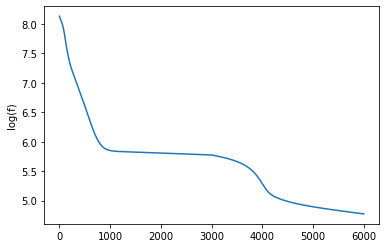

INFO:tensorflow:Assets written to: ./models/model_Russia_365\assets


<Figure size 432x288 with 0 Axes>

In [10]:
countries = ['Germany','India','Canada','Russia']


for country_code in countries:
    infected = df_infected[country_code].values
    deaths = df_deaths[country_code].values
    recovered = df_recovered[country_code].values
    population = df_information[df_information.country==country_code].population.values[0]
    Regr = int(df_information[df_information.country==country_code].Regr.values[0])

    
    
    # find start_time
    start_time = 0
    for i in infected:
        if i!=0:
            break
        start_time = start_time+1
    print(start_time)
    
    #  enter end_time
    num_times  = 365
    end_time  = num_times + start_time 
    print(end_time)
    
    
    
    # %% Set the initial value for model
    i0 = to_float(infected[start_time])
    r0 = 0.
    s0 = to_float(population) - i0
    d0 = to_float(deaths[start_time])
    #num_times = len(deaths)
    # %%
    
    
    infected = infected[start_time:end_time]
    deaths = deaths[start_time:end_time]
    recovered = recovered[start_time:end_time]

    
    #  Set the training data
    x_train = to_float_vec(np.array([infected,deaths]).transpose())
    x_trains = to_float_vec(np.array([x_train]))
    
    
    def objective(trial):
        
    
        beta = trial.suggest_uniform('beta', 0, 1)
        gamma = trial.suggest_uniform('gamma', 0, 1)
        mu = trial.suggest_uniform('mu', 0, 1)

        S = []
        I = []
        R = []
        D = []

        S.append(s0)
        I.append(i0)
        R.append(r0)
        D.append(d0)
        
        
        # approximating S,I,R,D using Eulers method
        
        for i in range(Regr-1):
            Snew = S[i] - beta/population * S[i]*I[i]
            Inew = I[i] + beta/population * S[i]*I[i] - gamma*I[i] - mu*I[i]
            Rnew = R[i] + gamma* I[i]
            Dnew = D[i] + mu*I[i]
            S.append(Snew)
            I.append(Inew)
            R.append(Rnew)
            D.append(Dnew)

        I = np.array(I)
        D = np.array(D)
        

        
        # calculating the loss 
        # squared  difference between original and approximated values(infected and deaths)
        # Regr is the initail exponential growth of the cases 
        return np.sum((x_train[:,0][0:Regr]-I)**2) + 100*np.sum((x_train[:,1][0:Regr]-D)**2)
    
    
    study = optuna.create_study()
    study.optimize(objective, n_trials=3000)
    study.best_params  

    
    # picking the rates which gives minimunof the loss function in 3000 iterations
    beta = study.best_params['beta']
    gamma = study.best_params['gamma']
    mu = study.best_params['mu']

    
    
    # replicating the same rates to whole data
    beta_0 = np.array([beta for i in range(num_times)])
    gamma_0 = np.array([gamma for i in range(num_times)])
    mu_0 = np.array([mu for i in range(num_times)])
    
    
    # now we have Input as well as labels 
    # we can fit it to the neural network
    
    
    
    @tf.function()
    def tf_loss_fn_us(y_true, y_pred):
        beta_t = y_pred[0][:,0]
        gamma_t = y_pred[0][:,1]
        mu_t = y_pred[0][:,2]

        beta_0 = y_true[0][0,0]
        gamma_0 = y_true[0][0,1]
        mu_0 = y_true[0][0,2]

        S = []
        I = []
        R = []
        D = []

        S.append(s0)
        I.append(i0)
        R.append(r0)
        D.append(d0)
        num_times = len(beta_t)

        for i in range(num_times-1):
            Snew = S[i] - beta_t[i]/population * S[i]*I[i]
            Inew = I[i] + beta_t[i]/population * S[i]*I[i] - gamma_t[i]*I[i] - mu_t[i]*I[i]
            Rnew = R[i] + gamma_t[i]* I[i]
            Dnew = D[i] + mu_t[i]* I[i]
            S.append(Snew)
            I.append(Inew)
            R.append(Rnew)
            D.append(Dnew)

        I = tf.stack(I)
        D = tf.stack(D)
        
        
        epsilon = 0.000001
        
        Ed1 = tf.math.reduce_sum((tf.math.log((x_trains[0][:,0]+epsilon))-tf.math.log((I+epsilon)))**2 + (tf.math.log((x_trains[0][:,1]+epsilon))-tf.math.log((D+epsilon)))**2)

        Ed2 = 0.01*tf.math.log(tf.math.reduce_max(x_trains[0][:,0])+epsilon)/(tf.math.reduce_max(x_trains[0][:,0])+epsilon) * tf.math.reduce_sum((x_trains[0][:,0]-I)**2+ (x_trains[0][:,1]-D)**2)

        sumr = 0
        for it in range(num_times-1):
            sumr = sumr + (beta_t[it]-beta_t[it+1])**2 + (gamma_t[it]-gamma_t[it+1])**2 + 100*(mu_t[it]-mu_t[it+1])**2
        Er = 100*tf.math.log(tf.math.reduce_max(x_trains[0][:,0])+epsilon)/tf.math.reduce_max([beta_0,gamma_0,mu_0])*sumr

        E0 = 100*tf.math.log(tf.math.reduce_max(x_trains[0][:,0])+epsilon)/tf.math.reduce_max([beta_0,gamma_0,mu_0])*((beta_t[0]-beta_0)**2+(gamma_t[0]- gamma_0)**2 +100*(mu_t[0]-mu_0)**2)

        return Ed1+Ed2+Er+E0

    # set up y_trues
    y_true = np.zeros((num_times,3))
    y_true[:,0] = beta_0[0:num_times]
    y_true[:,1] = gamma_0[0:num_times]
    y_true[:,2] = mu_0[0:num_times]
    y_trues = np.array([y_true])
    
    
    
    
    
    
    #neural network
     
    
    tf.keras.backend.set_floatx('float64')

    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(len(infected), 2)),
        tf.keras.layers.Dense(32,activation='sigmoid'),
        tf.keras.layers.Dense(16,activation='sigmoid'),
        tf.keras.layers.Dense(8,activation='sigmoid'),
        tf.keras.layers.Dense(len(infected)*3,activation = 'sigmoid'),
        tf.keras.layers.Reshape((len(infected), 3))
    ])

    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.012),
                  loss = 'mean_squared_error',
                  metrics=['accuracy']
                 )

    model.fit(x_trains,y_trues,verbose=1,epochs=3000)
     
    tf.config.experimental_run_functions_eagerly(False)
    
    
    def train_step(x_trains, y_trues):
        with tf.GradientTape() as tape:
            logits = model(x_trains, training=True)

            # Add asserts to check the shape of the output.
            #tf.debugging.assert_equal(logits.shape, (32, 10))

            loss_value = loss_object(y_trues, logits)
            
        loss_history.append(loss_value)
        
        grads = tape.gradient(loss_value, model.trainable_variables)
        #print(grads)
        optimizer.apply_gradients(zip(grads, model.trainable_variables),experimental_aggregate_gradients=True)

    def train(epochs):
        for epoch in range(epochs):
            train_step(x_trains, y_trues)
            print ('Epoch {} finished'.format(epoch))

    loss_history = []
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005)
    loss_object = tf_loss_fn_us
    train(epochs =3000)

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
    loss_object = tf_loss_fn_us
    train(epochs =3000)
    
    
    np_loss_history = []
    for loss in loss_history:
        np_loss_history.append(loss.numpy())

    plt.figure()
    #ax = plt.gca()
    plt.plot(np.arange(0,len(np_loss_history),1),np.log10(np_loss_history))

    #ax.get_yaxis().get_major_formatter().set_useOffset(False)
    #ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.ylabel('log(f)')
    plt.show()
    plt.savefig('loss_fn_'+country_code+'_'+str(num_times))

    #  Save the model
    
    
   
    model.save('./models/model_'+country_code+'_'+str(num_times))


    

# Extrapolation Function mx+c


In [13]:

from scipy.optimize import curve_fit
def extrapolate(y):
    def linear_fit(x,m,c):
            return m*x+c
    if __name__ =="__main__":        
        #y=model.predict(x_trains)[0][:,0][num_times-50:num_times]
        x=np.arange(num_times)[num_times-50:num_times]
        fitting_params,covariance = curve_fit(linear_fit,x,y)
        m,c=fitting_params
        next_x=np.arange(num_times+1,num_times+40)
        next_y=linear_fit(next_x,m,c)
    return next_y

C:\Users\sivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\sivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\sivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

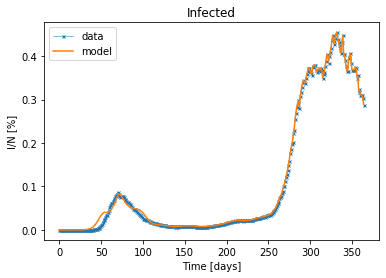

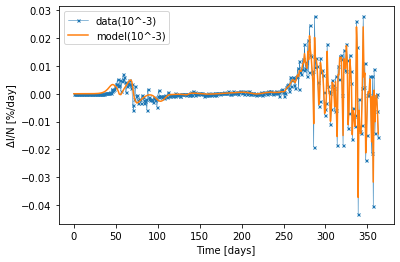

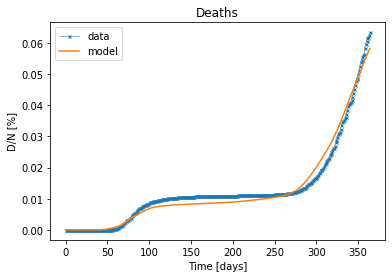

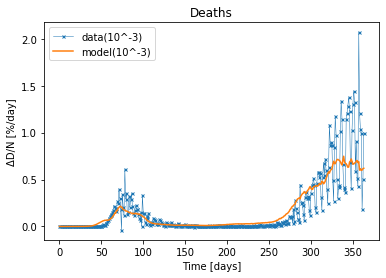

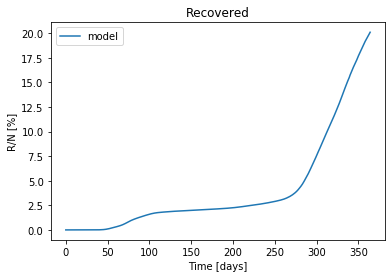

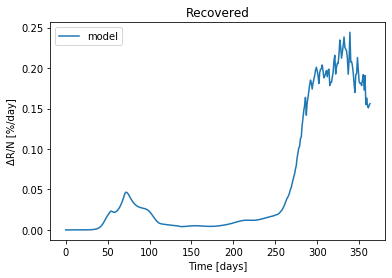

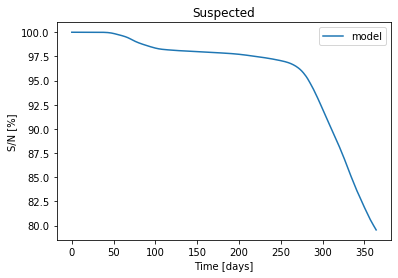

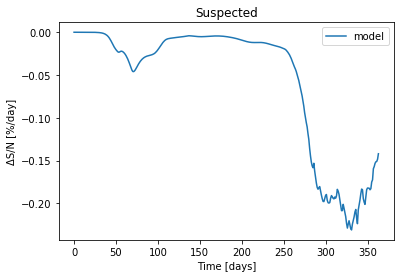

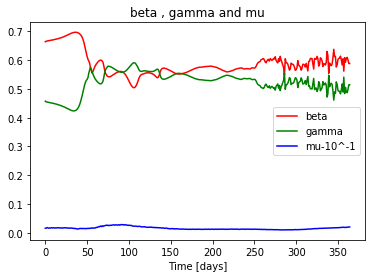

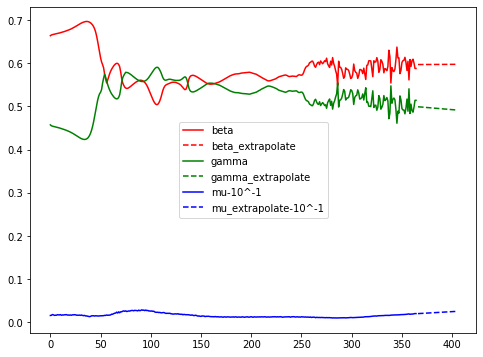

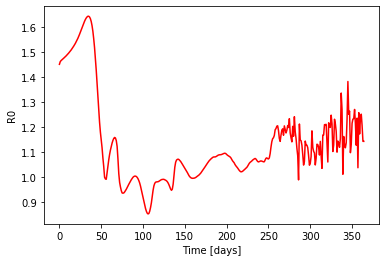

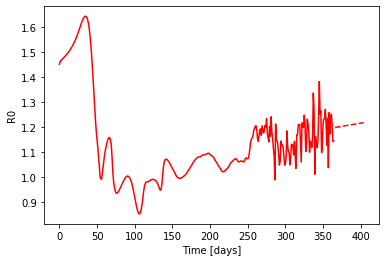

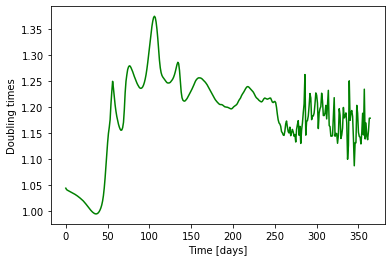

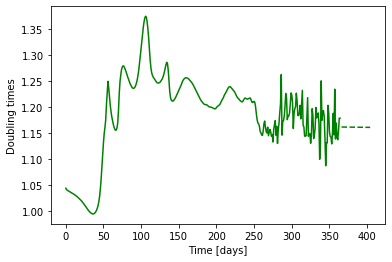

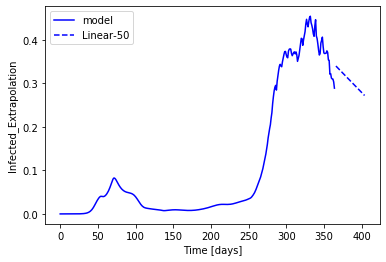

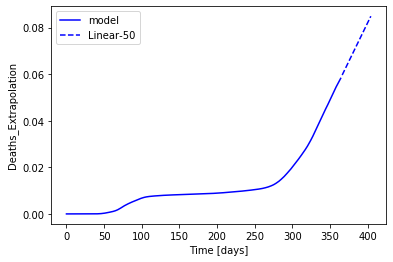

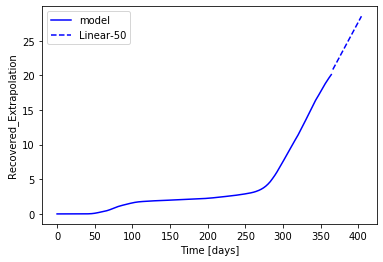

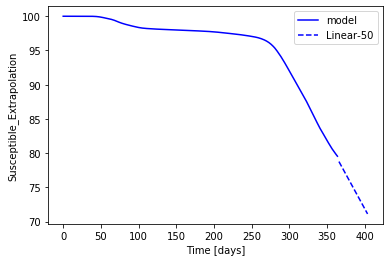

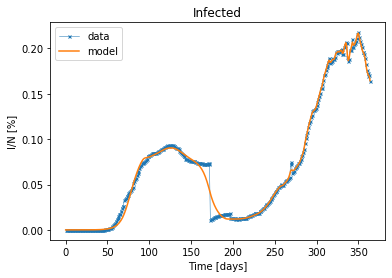

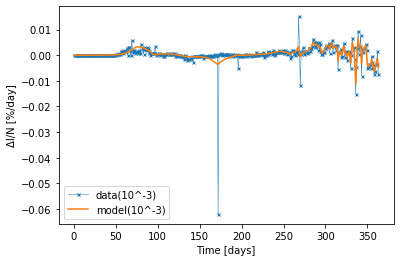

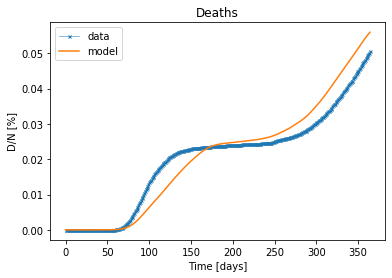

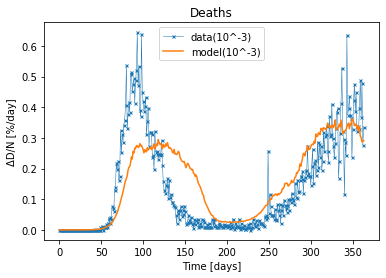

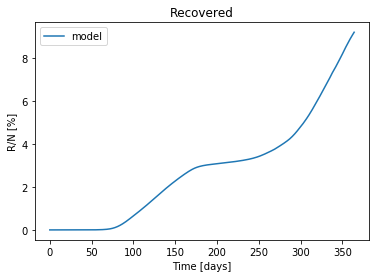

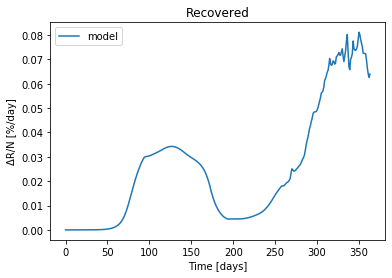

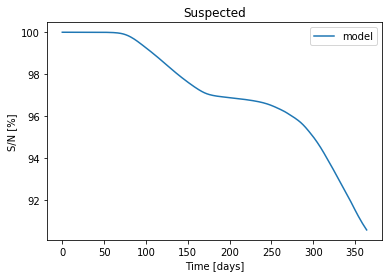

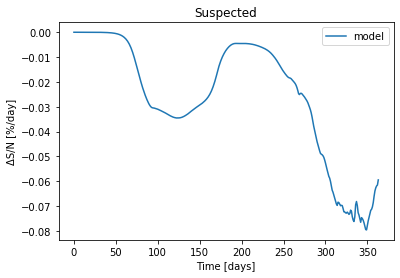

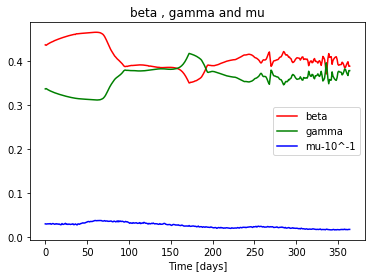

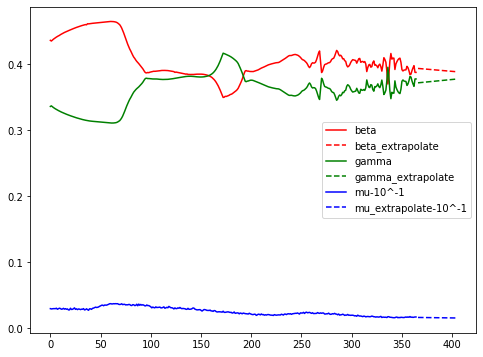

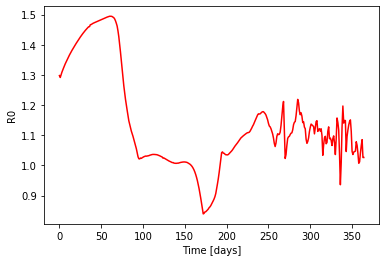

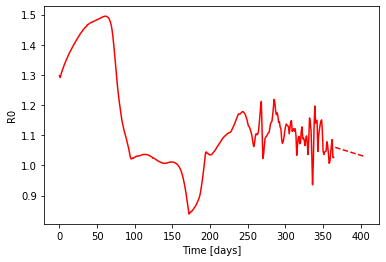

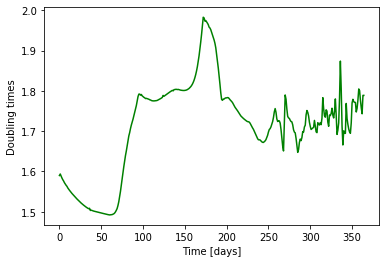

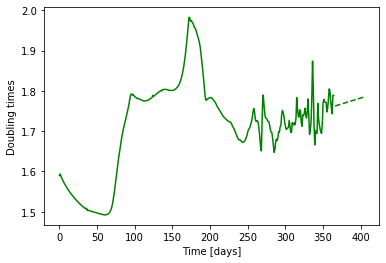

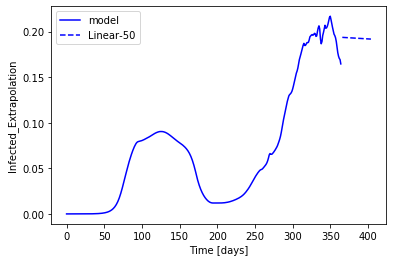

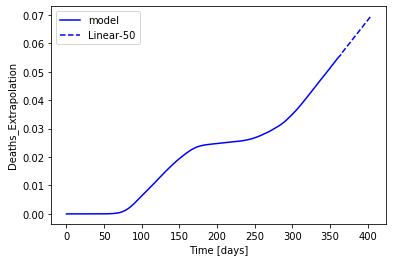

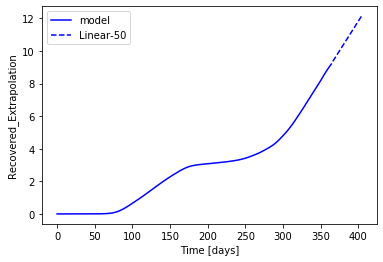

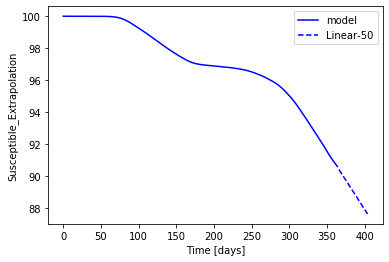

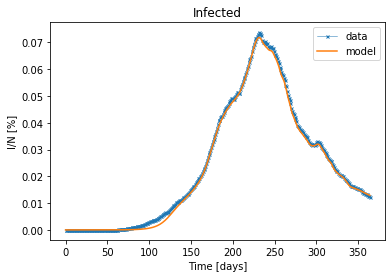

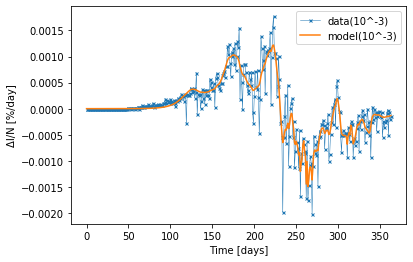

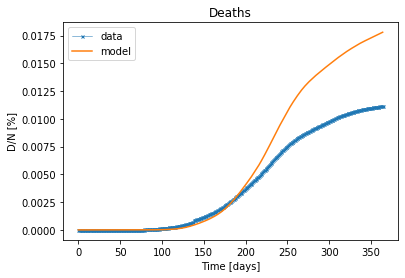

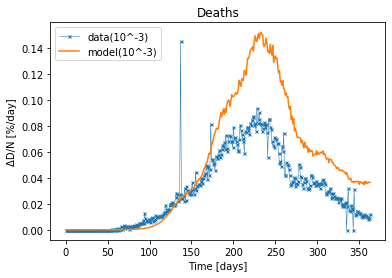

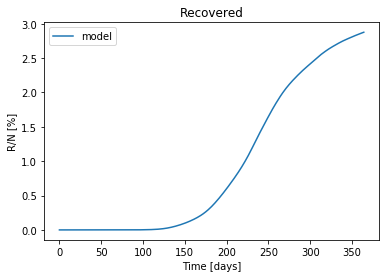

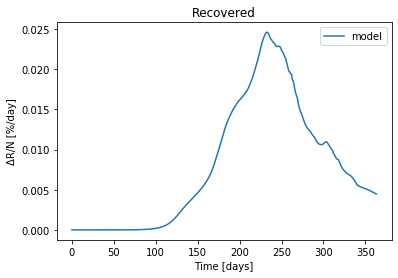

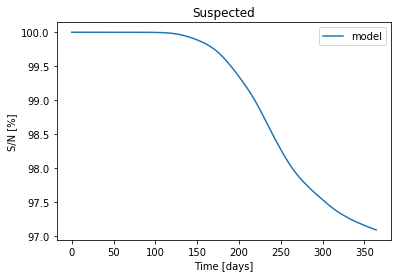

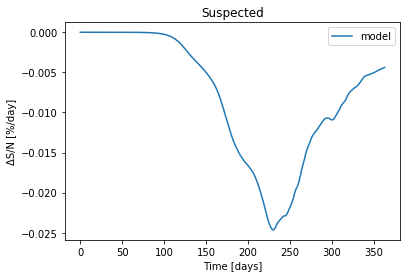

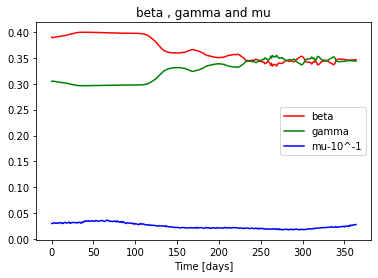

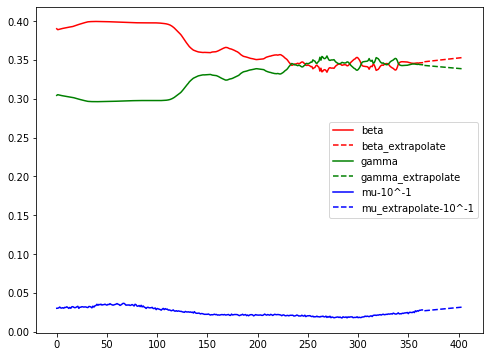

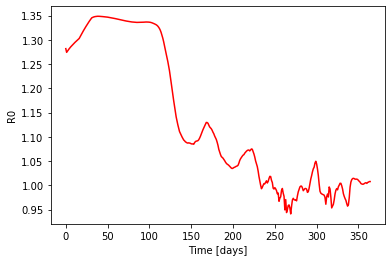

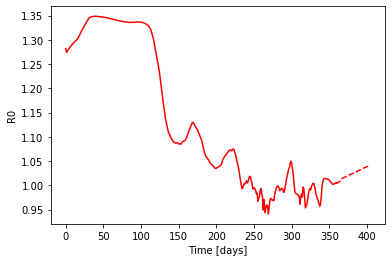

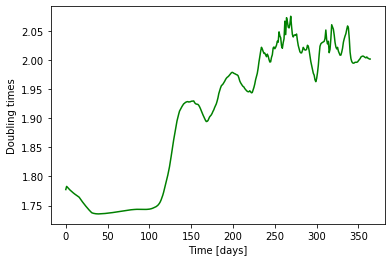

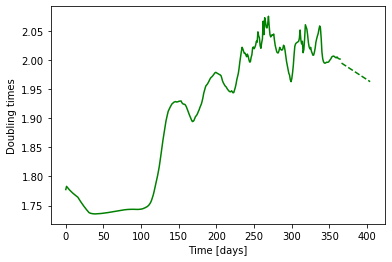

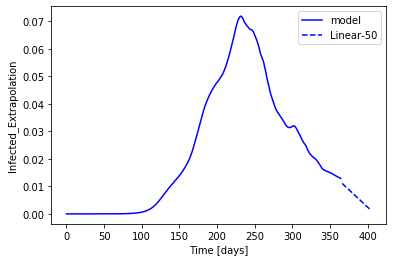

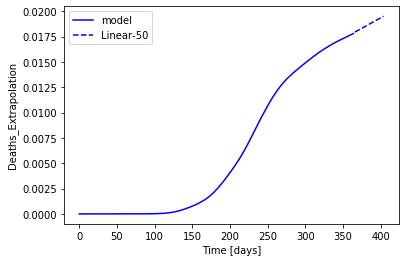

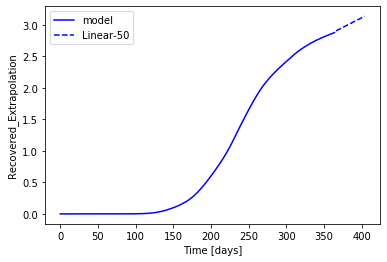

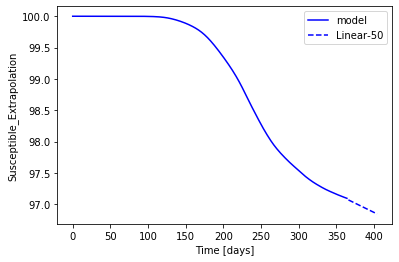

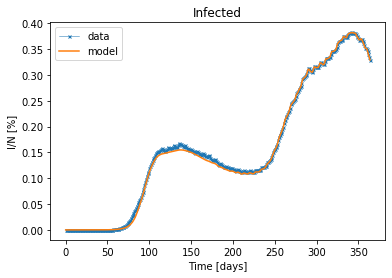

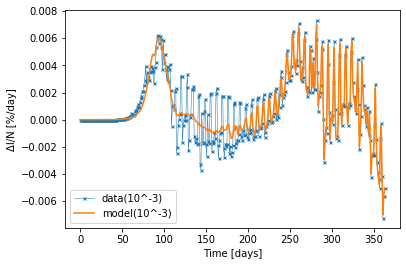

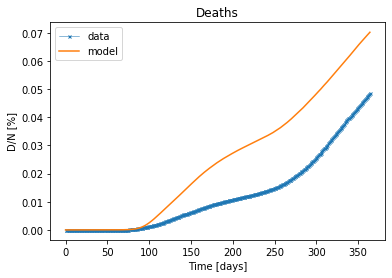

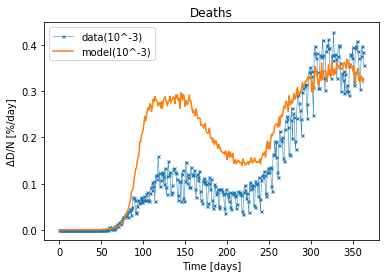

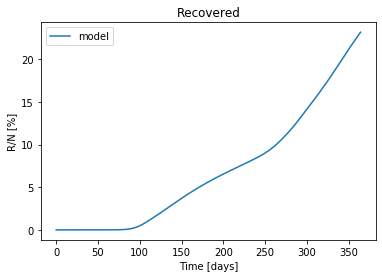

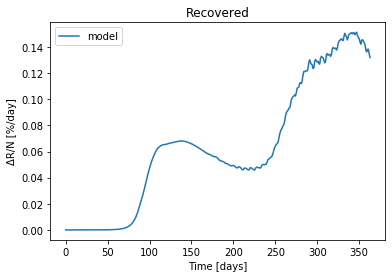

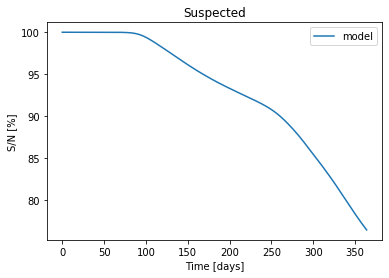

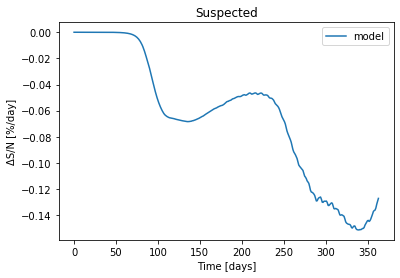

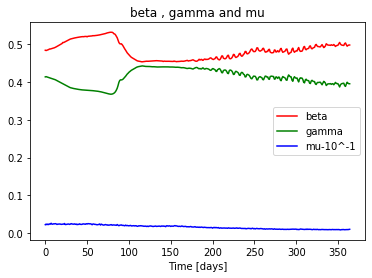

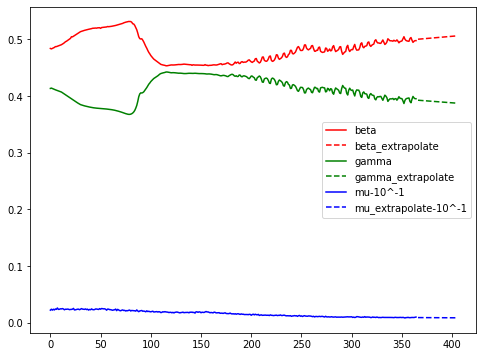

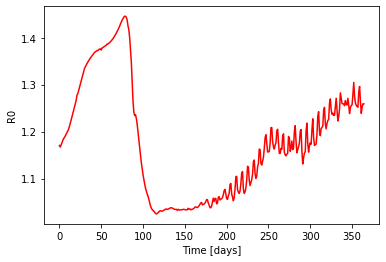

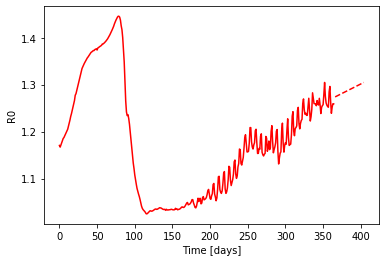

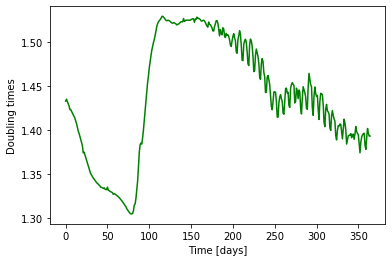

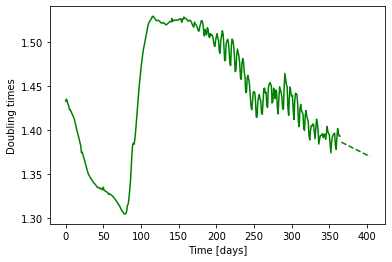

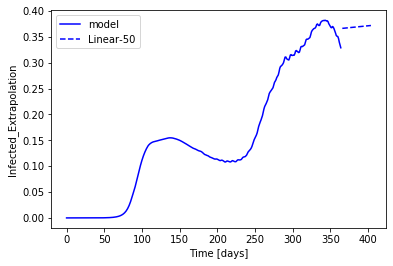

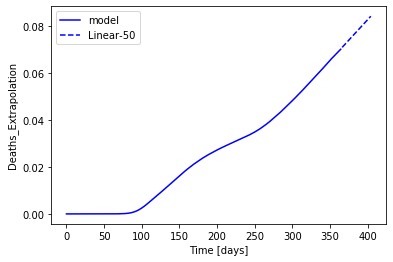

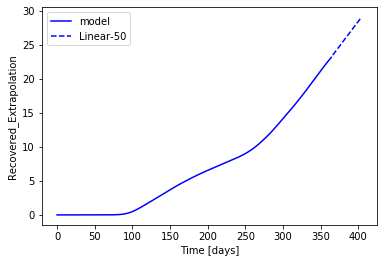

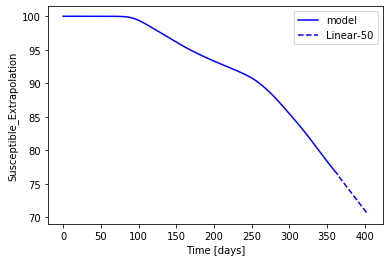

In [14]:
mypath = 'C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/Covid-19'
subpath = ""
the_path = os.path.join(mypath,subpath)
[df_infected,df_confirmed,df_recovered,df_deaths] = load(the_path)
#%% create df of needed information for each country
#from information import df_information
#print(df_information)
# %% user input the country to train
countries = ['Germany','Canada','India','Russia']
for country_code in countries:
    infected = df_infected[country_code].values
    deaths = df_deaths[country_code].values
    recovered = df_recovered[country_code].values
    population = df_information[df_information.country==country_code].population.values[0]
    Regr = int(df_information[df_information.country==country_code].Regr.values[0])
    
    #%% find start_time
    start_time = 0
    for i in infected:
        if i!=0:
            break
        start_time = start_time+1

        
    # %% Set the initial value for model
    i0 = to_float(infected[start_time])
    r0 = 0.
    s0 = to_float(population) - i0
    d0 = to_float(deaths[start_time])
    #num_times = len(deaths)
    # %% load the trained model
    mypath = './models/model_' + country_code + '_365'
    model= tf.keras.models.load_model(mypath)
    #%% make dir
    
    if os.name != 'nt':
        if not os.path.exists(r'./img/' + mypath):
            os.makedirs(r'./img/' + mypath)
    elif not os.path.exists(r'.\\img\\' + mypath):
        os.makedirs(r'.\\img\\' + mypath)
        
    # %% find the model num_times
    
    layer = model.layers[-1]
    num_times = layer.output_shape[1]
    end_time = start_time+num_times
    
    
    # Set the training data
    
    x_train = to_float_vec(np.array([infected[start_time:end_time],deaths[start_time:end_time]]).transpose())
    x_trains = to_float_vec(np.array([x_train]))
    
    
    
    #  define the SIRD solver
    
    
    def solve_SIRD_discrete(num_times,beta_t,gamma_t,mu_t,s0,i0,r0,d0):
        
        
        
        S = []
        I = []
        R = []
        D = []
        

        S.append(s0)
        I.append(i0)
        R.append(r0)
        D.append(d0)
        
        
        num_times = len(beta_t)

        for i in range(num_times-1):
            
            
            Snew = S[i] - beta_t[i]/population * S[i]*I[i]
            Inew = I[i] + beta_t[i]/population * S[i]*I[i] - gamma_t[i]*I[i] - mu_t[i]*I[i]
            Rnew = R[i] + gamma_t[i]* I[i]
            Dnew = D[i] + mu_t[i]* I[i]
            
            
            S.append(Snew)
            I.append(Inew)
            R.append(Rnew)
            D.append(Dnew)
            
        return [S,I,R,D]

    #  solve sird with trained model
    
    [Sr,Ir,Rr,Dr]= solve_SIRD_discrete(num_times,model.predict(x_trains)[0][:,0],model.predict(x_trains)[0][:,1],model.predict(x_trains)[0][:,2],s0,i0,r0,d0)
    
    
    # infected figure
    plt.figure()
    plt.plot(np.arange(num_times),(infected[start_time:end_time]/population)*100,marker = 'x',markersize = '3',linewidth = 0.5,label='data')
    plt.plot(np.arange(num_times),(Ir/population)*100, label = 'model')
    plt.legend()
    plt.xlabel('Time [days]')
    plt.ylabel('I/N [%]')
    plt.title('Infected')
    plt.savefig(r'./img/' + mypath +'/infected.png')

    
    
    #  draw infected difference figure 
    # daily infected cases
    plt.figure()
    plt.plot(np.arange(num_times-1),(np.diff(infected[start_time:end_time])/population)*100,marker = 'x',markersize = '3',linewidth = 0.5,label='data(10^-3)')
    plt.plot(np.arange(num_times-1),(np.diff(Ir)/population)*100, label = 'model(10^-3)')
    plt.legend()
    plt.xlabel('Time [days]')
    plt.ylabel('ΔI/N [%/day]')
    plt.savefig(r'./img/' + mypath +'/infected_diff.png')
    
    

    # %% deaths figure
    plt.figure()
    plt.plot(np.arange(num_times),(deaths[start_time:end_time]/population)*100,marker = 'x',markersize = '3',linewidth = 0.5,label='data')
    plt.plot(np.arange(num_times),(Dr/population)*100, label = 'model')
    plt.legend()
    plt.xlabel('Time [days]')
    plt.ylabel('D/N [%]')
    plt.title('Deaths')
    plt.savefig(r'./img/' + mypath +'/deaths.png')
    
    


    #  draw deaths difference figure 
    #  daily death cases
    plt.figure()
    plt.plot(np.arange(num_times-1),((np.diff(deaths[start_time:end_time])/population)*100)*1000,marker = 'x',markersize = '3',linewidth = 0.5,label='data(10^-3)')
    plt.plot(np.arange(num_times-1),((np.diff(Dr)/population)*100)*1000, label = 'model(10^-3)')
    plt.legend()
    plt.xlabel('Time [days]')
    plt.ylabel('ΔD/N [%/day]')
    plt.title('Deaths')
    plt.savefig(r'./img/' + mypath +'/deaths_diff.png')
    
    


    # %% recovery figure
    plt.figure()
    ###ax = fig.add_subplot(111)
    #plt.plot(np.arange(num_times),recovered/population,marker = 'x',markersize = '3',linewidth = 0.5,label='data')
    plt.plot(np.arange(num_times),(Rr/population)*100, label = 'model')
    plt.legend()
    #plt.yscale('log')
    plt.xlabel('Time [days]')
    plt.ylabel('R/N [%]')
    plt.title('Recovered')
    #fig.add_axes(ax)
    plt.savefig(r'./img/' + mypath +'/recovered.png')
    
    
    

    # %% draw recovered difference figure 
    plt.figure()
    ###ax = fig.add_subplot(111)
    #plt.plot(np.arange(num_times-1),np.diff(recovered)/population,marker = 'x',markersize = '3',linewidth = 0.5,label='data')
    plt.plot(np.arange(num_times-1),(np.diff(Rr)/population)*100, label = 'model')
    plt.legend()
    #plt.yscale('log')
    plt.xlabel('Time [days]')
    plt.ylabel('ΔR/N [%/day]')
    plt.title('Recovered')
    #fig.add_axes(ax)
    plt.savefig(r'./img/' + mypath +'/recovered_diff.png')
    
    


    # %% Suspected figure
    plt.figure()
    ###ax = fig.add_subplot(111)
    #plt.plot(np.arange(num_times),recovered/population,marker = 'x',markersize = '3',linewidth = 0.5,label='data')
    plt.plot(np.arange(num_times),(Sr/population)*100, label = 'model')
    plt.legend()
    #plt.yscale('log')
    plt.xlabel('Time [days]')
    plt.ylabel('S/N [%]')
    plt.title('Suspected')
    #fig.add_axes(ax)
    plt.savefig(r'./img/' + mypath +'/suspected.png')
    
    
    
    


    # %% draw suspected difference figure 
    plt.figure()
    ###ax = fig.add_subplot(111)
    #plt.plot(np.arange(num_times-1),np.diff(recovered)/population,marker = 'x',markersize = '3',linewidth = 0.5,label='data')
    plt.plot(np.arange(num_times-1),(np.diff(Sr)/population)*100, label = 'model')
    plt.legend()
    #plt.yscale('log')
    plt.xlabel('Time [days]')
    plt.ylabel('ΔS/N [%/day]')
    plt.title('Suspected')
    #fig.add_axes(ax)
    plt.savefig(r'./img/' + mypath +'/suspected_diff.png')
    
    
    

    # %% draw beta gamma mu
    plt.figure()
    ###ax = fig.add_subplot(111)
    plt.plot(np.arange(num_times),model.predict(x_trains)[0][:,0],'r',label = 'beta')
    plt.plot(np.arange(num_times),model.predict(x_trains)[0][:,1],'g',label = 'gamma')
    plt.plot(np.arange(num_times),(model.predict(x_trains)[0][:,2])*10,'b',label = 'mu-10^-1')
    plt.legend()
    plt.title('beta , gamma and mu')
    plt.xlabel('Time [days]')
    plt.savefig(r'./img/' + mypath +'/beta_and_gamma.png')
    
    
    
    
    
    
         
    # %% draw beta gamma mu extrapolation
    
    yb=model.predict(x_trains)[0][:,0]
    yg=model.predict(x_trains)[0][:,1]
    ym=model.predict(x_trains)[0][:,2]
    next_x=np.arange(num_times+1,num_times+40)
    
    
    plt.figure(figsize=(8,6))
    
    plt.plot(np.arange(num_times),yb,'r',label='beta')
    plt.plot(next_x,extrapolate(yb[num_times-50:num_times]),'r--',label='beta_extrapolate')
    
    
    plt.plot(np.arange(num_times),yg,'g',label='gamma')
    plt.plot(next_x,extrapolate(yg[num_times-50:num_times]),'g--',label='gamma_extrapolate')
    
    
    plt.plot(np.arange(num_times),(ym)*10,'b',label='mu-10^-1')
    plt.plot(next_x,(extrapolate(ym[num_times-50:num_times]))*10,'b--',label='mu_extrapolate-10^-1')
    plt.legend()
    
    plt.savefig(r'./img/' + mypath +'/beta_gamma_mu_extrapolate.png')
    
    #plt.figure()
    ###ax = fig.add_subplot(111)
    #plt.plot(np.arange(num_times),model.predict(x_trains)[0][:,2],label = 'mu')
    #plt.plot(np.arange(num_times),model.predict(x_trains)[0][:,1],label = 'gamma')
    #plt.legend()
    #plt.title('mu')
    #plt.xlabel('Time [days]')
    #plt.savefig(r'./img/' + mypath +'/mu.png')
    
    # %% draw reproduction rate
    
    plt.figure()
    plt.plot(np.arange(num_times),model.predict(x_trains)[0][:,0]/model.predict(x_trains)[0][:,1],'r')
    plt.xlabel('Time [days]')
    plt.ylabel('R0')
    plt.savefig(r'./img/' + mypath +'/Reproduction.png')
    
    
    
    #%% draw reproduction extrapolation
    
    plt.figure()
    plt.plot(np.arange(num_times),model.predict(x_trains)[0][:,0]/model.predict(x_trains)[0][:,1],'r')
    plt.plot(next_x,extrapolate((model.predict(x_trains)[0][:,0]/model.predict(x_trains)[0][:,1])[num_times-50:num_times]),'r--')
    plt.xlabel('Time [days]')
    plt.ylabel('R0')
    plt.savefig(r'./img/' + mypath +'/Reproduction_extrapolation.png')
    
    
    
    # %% draw doubling time 
    plt.figure()
    plt.plot(np.arange(num_times),np.log(2)/model.predict(x_trains)[0][:,0],'g')
    plt.xlabel('Time [days]')
    plt.ylabel('Doubling times')
    plt.savefig(r'./img/' + mypath +'/Doubling time.png')
    
    
     # %% draw doubling time extrapolation
    plt.figure()
    plt.plot(np.arange(num_times),np.log(2)/model.predict(x_trains)[0][:,0],'g')
    plt.plot(next_x,extrapolate((np.log(2)/model.predict(x_trains)[0][:,0])[num_times-50:num_times]),'g--')
    plt.xlabel('Time [days]')
    plt.ylabel('Doubling times')
    plt.savefig(r'./img/' + mypath +'/Doubling time_extrapolation.png')
    
    
    
    # %% infected extrapolation
    plt.figure()
    plt.plot(np.arange(num_times),(Ir/population)*100,'b',label='model')
    plt.plot(next_x,extrapolate(((Ir/population)*100)[num_times-50:num_times]),'b--',label='Linear-50')
    plt.xlabel('Time [days]')
    plt.ylabel('Infected_Extrapolation')
    plt.legend()
    plt.savefig(r'./img/' + mypath +'/Infected_extrapolation.png')
    
    
    
    # %% Deaths extrapolation
    plt.figure()
    plt.plot(np.arange(num_times),(Dr/population)*100,'b',label='model')
    plt.plot(next_x,extrapolate(((Dr/population)*100)[num_times-50:num_times]),'b--',label='Linear-50')
    plt.xlabel('Time [days]')
    plt.ylabel('Deaths_Extrapolation')
    plt.legend()
    plt.savefig(r'./img/' + mypath +'/Deaths_extrapolation.png')
    
    
    
    # %%  Recovered extrapolation
    plt.figure()
    plt.plot(np.arange(num_times),(Rr/population)*100,'b',label='model')
    plt.plot(next_x,extrapolate(((Rr/population)*100)[num_times-50:num_times]),'b--',label='Linear-50')
    plt.xlabel('Time [days]')
    plt.ylabel('Recovered_Extrapolation')
    plt.legend()
    plt.savefig(r'./img/' + mypath +'/Recovered_extrapolation.png')
    
    
    
    
    # %%  Susceptible extrapolation
    plt.figure()
    plt.plot(np.arange(num_times),(Sr/population)*100,'b',label='model')
    plt.plot(next_x,extrapolate(((Sr/population)*100)[num_times-50:num_times]),'b--',label='Linear-50')
    plt.xlabel('Time [days]')
    plt.ylabel('Susceptible_Extrapolation')
    plt.legend()
    plt.savefig(r'./img/' + mypath +'/Susceptible_extrapolation.png')
    
    


# Comparing different countries

In [35]:


[df_infected,df_confirmed,df_recovered,df_deaths] = load(the_path)



betas = dict()
gammas = dict()
mus = dict()
countries = ['Germany','India','Russia','Canada']
for country_code in countries:
    mypath = './models/model_' + country_code + '_365'
    model= tf.keras.models.load_model(mypath)

    infected = df_infected[country_code].values
    deaths = df_deaths[country_code].values
    recovered = df_recovered[country_code].values
    population = df_information[df_information.country==country_code].population.values[0]
    Regr = int(df_information[df_information.country==country_code].Regr.values[0])

    #%% find start_time
    start_time = 0
    for i in infected:
        if i!=0:
            break
        start_time = start_time+1

    # %% Set the initial value for model
    i0 = to_float(infected[start_time])
    r0 = 0.
    s0 = to_float(population) - i0
    d0 = to_float(deaths[start_time])

    # %% find the model num_times
    layer = model.layers[-1]
    num_times = layer.output_shape[1]
    end_time = start_time+num_times
    
    #%% Set the training data
    x_train = to_float_vec(np.array([infected[start_time:end_time],deaths[start_time:end_time]]).transpose())
    x_trains = to_float_vec(np.array([x_train]))

    #%% save betas gammas
    beta = model.predict(x_trains)[0][:,0]
    gamma = model.predict(x_trains)[0][:,1]
    mu = model.predict(x_trains)[0][:,2]
    betas[country_code] = beta
    gammas[country_code] = gamma
    mus[country_code] = mu
# %% beta_gamma plotly

import plotly.graph_objects as go

fig = go.Figure()

# Add traces

fig.add_trace(go.Scatter(x=betas['India'], y=gammas['India'], mode='markers',name='India'))
fig.add_trace(go.Scatter(x=betas['Germany'], y=gammas['Germany'], mode='markers',name='Germany'))
fig.add_trace(go.Scatter(x=betas['Canada'], y=gammas['Canada'], mode='markers',name='Canada'))
fig.add_trace(go.Scatter(x=betas['Russia'], y=gammas['Russia'], mode='markers',name='Russia'))


fig.update_layout(
    #title="Plot Title",
    xaxis_title="beta",
    yaxis_title="gamma",
)

fig.write_html('C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/beta_gamma_compare.html', auto_open=True)

#fig.write_html('./html/beta_gamma_compare.html', auto_open=True)


# %% beta plotly
# Add traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['India'], mode='lines+markers',name='India'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['Germany'], mode='lines+markers',name='Germany'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['Canada'], mode='lines+markers',name='Canada'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['Russia'], mode='lines+markers',name='Russia'))

fig.update_layout(
    #title="Plot Title",
    yaxis_title="beta",
    xaxis_title="Time [days]",
)

fig.write_html('C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/beta_compare.html', auto_open=True)

# %% gamma plotly
# Add traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(num_times), y=gammas['India'], mode='lines+markers',name='India'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=gammas['Germany'], mode='lines+markers',name='Germany'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=gammas['Canada'], mode='lines+markers',name='Canada'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=gammas['Russia'], mode='lines+markers',name='Russia'))

fig.update_layout(
    #title="Plot Title",
    yaxis_title="gamma",
    xaxis_title="Time [days]",
)

fig.write_html('C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/gamma_compare.html', auto_open=True)

# %% mu plotly
# Add traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(num_times), y=mus['India'], mode='lines+markers',name='India'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=mus['Germany'], mode='lines+markers',name='Germany'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=mus['Canada'], mode='lines+markers',name='Canada'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=mus['Russia'], mode='lines+markers',name='Russia'))


fig.update_layout(
    #title="Plot Title",
    yaxis_title="mu",
    xaxis_title="Time [days]",
)

fig.write_html('C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/mu_compare.html', auto_open=True)

#%% mu_beta plotly
fig = go.Figure()

# Add traces

fig.add_trace(go.Scatter(x=mus['India'], y=betas['India'], mode='markers',name='India'))
fig.add_trace(go.Scatter(x=mus['Germany'], y=betas['Germany'], mode='markers',name='Germany'))
fig.add_trace(go.Scatter(x=mus['Canada'], y=betas['Canada'], mode='markers',name='Canada'))
fig.add_trace(go.Scatter(x=mus['Russia'], y=betas['Russia'], mode='markers',name='Russia'))


fig.update_layout(
    #title="Plot Title",
    xaxis_title="mu",
    yaxis_title="beta",
)

fig.write_html('C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/mu_beta.html', auto_open=True)

#%% mu+gamma plotly
fig = go.Figure()

# Add traces

fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['India']+gammas['India'], mode='lines+markers',name='India'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['Germany']+gammas['Germany'], mode='lines+markers',name='Germany'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['Canada']+gammas['Canada'], mode='lines+markers',name='Canada'))
fig.add_trace(go.Scatter(x=np.arange(num_times), y=betas['Russia']+gammas['Russia'], mode='lines+markers',name='Russia'))


fig.update_layout(
    #title="Plot Title",
    xaxis_title="Time [days]",
    yaxis_title="beta+gamma",
)

fig.write_html('C:/Users/sivan/Desktop/ML Projects/Research CaseStudy/beta+gamma.html', auto_open=True)
